In [1]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.interpolate import make_interp_spline
from sklearn.preprocessing import MinMaxScaler

In [4]:
df1 = pd.read_csv("Delhi Election/BJP_cleaned.csv")
df1.drop(columns=['Unnamed: 0.1.1','Unnamed: 0','Unnamed: 0.1'], inplace=True)
df1.head(10)

D:\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


created_at                                              tweet  \
0  2020-10-15 00:00:01  @smitabarooah @ModiOnceMore This video show ho...   
1  2020-10-15 00:00:18  RT @NandiniOza: A day after his sister n fathe...   
2  2020-10-15 00:00:20  RT @dpradhanbjp: Glimpses of the massive gathe...   
3  2020-10-15 00:00:21  RT @JhaSanjay: Dear @ArvindKejriwal Ji: Let’s ...   
4  2020-10-15 00:00:22  @kavitavkhanna @VinodKhanna @BJP4India @PMOInd...   
5  2020-10-15 00:00:23  RT @drshamamohd: Why has EC not taken action a...   
6  2020-10-15 00:00:25  RT @satishacharya: Vote for! Cartoon for @Amar...   
7  2020-10-15 00:00:31  RT @sachinsingh1010: 75 year old Govindraj kil...   
8  2020-10-15 00:00:36  #Modi got made 14000 houses for #SriLanka's Ta...   
9  2020-10-15 00:00:41  RT @Raksha_Kumar: Quick question: if #Demoneti...   

       user_id                                         clean_text  sent  
0  3.60667e+08  smitabarooah ModiOnceMore This video show Modi...     1  
1  8.09904e+08  RT NandiniOza A day sister n father joined Con...     0  
2  3.49418e+09  RT dpradhanbjp Glimpses massive gathering supp...     0  
3   8.2426e+17  RT JhaSanjay Dear ArvindKejriwal Ji Let ’ clea...     0  
4  1.03281e+18  kavitavkhanna VinodKhanna BJP4India PMOIndia n...     0  
5  3.05728e+08  RT drshamamohd Why EC taken action PM Modi amp...     0  
6  1.99403e+07  RT satishacharya Vote Cartoon AmarUjalaNews 20...     0  
7  1.03083e+08  RT sachinsingh1010 75 year old Govindraj kille...     1  
8  1.27257e+18  Modi got made 14000 houses SriLanka 's Tamil p...     0  
9  1.27566e+18  RT Raksha_Kumar Quick question Demonetisation ...     1

In [5]:
df2 = pd.read_csv("Delhi Election/AAP_cleaned.csv")
df2.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)
df2.head(10)

D:\Anaconda\envs\tf-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


created_at                                              tweet  \
0  2020-10-31 00:00:01  @INCMaharashtra President Rahul Gandhi address...   
1  2020-10-31 00:00:09  RT @VakilBharati: @Ra_Bies New verb is introdu...   
2  2020-10-31 00:00:10  @akhileshsharma1 @ModiBharosa #RahulGandhi thi...   
3  2020-10-31 00:00:11  @ShobitArya @vinay1011 @ShashiTharoor and how ...   
4  2020-10-31 00:00:12  #Jayaprada been abused by #AzamKhan. Pseudo se...   
5  2020-10-31 00:00:18  @JM_Scindia @RajBabbarMP @RahulGandhi @priyank...   
6  2020-10-31 00:00:23  RT @chitraSD: Jogging #RahulGandhi’s memory ab...   
7  2020-10-31 00:00:26  Public’s hard-earned money goes into campaigni...   
8  2020-10-31 00:00:32  #BharatBoleModiFirSe \r\n\r\nWhy #RahulGandhi ...   
9  2020-10-31 00:00:35  RT @pennewstweet: Manufacturing court order is...   

                  user_id                                         clean_text  \
0  1.0845187840045425e+18  INCMaharashtra President Rahul Gandhi addresse...   
1   1.050819843782394e+18  RT VakilBharati Ra_Bies New verb introduced En...   
2            2555646577.0  akhileshsharma1 ModiBharosa RahulGandhi thinks...   
3             254705573.0  ShobitArya vinay1011 ShashiTharoor forget Rahu...   
4   7.446099791732408e+17  Jayaprada abused AzamKhan Pseudo secular leade...   
5            3352535234.0  JM_Scindia RajBabbarMP RahulGandhi priyankagan...   
6              16725512.0  RT chitraSD Jogging RahulGandhi ’ memory famil...   
7             407465636.0  Public ’ hard-earned money goes campaigning PM...   
8              25947313.0  BharatBoleModiFirSe Why RahulGandhi often rais...   
9  1.3186614745716244e+18  RT pennewstweet Manufacturing court order new ...   

   sent  
0     0  
1     1  
2     0  
3     1  
4     1  
5     0  
6     1  
7     1  
8     1  
9     0

In [6]:
df = pd.concat([df1,df2])
df.head()

created_at                                              tweet  \
0  2020-10-15 00:00:01  @smitabarooah @ModiOnceMore This video show ho...   
1  2020-10-15 00:00:18  RT @NandiniOza: A day after his sister n fathe...   
2  2020-10-15 00:00:20  RT @dpradhanbjp: Glimpses of the massive gathe...   
3  2020-10-15 00:00:21  RT @JhaSanjay: Dear @ArvindKejriwal Ji: Let’s ...   
4  2020-10-15 00:00:22  @kavitavkhanna @VinodKhanna @BJP4India @PMOInd...   

       user_id                                         clean_text  sent  
0  3.60667e+08  smitabarooah ModiOnceMore This video show Modi...     1  
1  8.09904e+08  RT NandiniOza A day sister n father joined Con...     0  
2  3.49418e+09  RT dpradhanbjp Glimpses massive gathering supp...     0  
3   8.2426e+17  RT JhaSanjay Dear ArvindKejriwal Ji Let ’ clea...     0  
4  1.03281e+18  kavitavkhanna VinodKhanna BJP4India PMOIndia n...     0

In [3]:
corpus = list(df['clean_text'].astype(str))

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

In [5]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, max_df=0.5, max_features=200, ngram_range = (1,2))
CV = CountVectorizer(max_features=100)
Xtrain = tfIdfVectorizer.fit_transform(corpus)

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(Xtrain)
kmeans.labels_

array([2, 0, 1, ..., 2, 2, 2])

In [8]:
df[kmeans.labels_==0]['clean_text'].shape, df[kmeans.labels_==1]['clean_text'].shape, df[kmeans.labels_==2]['clean_text'].shape, df[kmeans.labels_==3]['clean_text'].shape

((56871,), (58372,), (409003,), (88313,))

In [9]:
df['labels'] = kmeans.labels_
df

created_at  \
0       2020-10-15 00:00:01   
1       2020-10-15 00:00:18   
2       2020-10-15 00:00:20   
3       2020-10-15 00:00:21   
4       2020-10-15 00:00:22   
...                     ...   
612554  2020-10-29 17:27:41   
612555  2020-10-29 17:27:43   
612556  2020-10-29 17:28:10   
612557  2020-10-29 17:28:21   
612558  2020-10-29 17:28:23   

                                                    tweet  \
0       #Elecciones2020 | En #Florida: #JoeBiden dice ...   
1       #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   
2       @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   
3       @chrislongview Watching and setting dvr. Let’s...   
4       #censorship #HunterBiden #Biden #BidenEmails #...   
...                                                   ...   
612554  As a child, I wanted to hire someone like "#Do...   
612555  ...mientras tanto .#Trump.!!\n.@m_ebrard .@lop...   
612556  A 5 dÃ­as d las #elecciones en #EstadosUnidos,...   
612557  @realtrumpweathr whatâs the chance of a shar...   
612558  @atrupar @thekjohnston How do you spell #paran...   

                       user_id  \
0                  3.60667e+08   
1                  8.09904e+08   
2                  3.49418e+09   
3                   8.2426e+17   
4                  1.03281e+18   
...                        ...   
612554  1.2553773820784026e+18   
612555             284320032.0   
612556            3941152575.0   
612557              17019400.0   
612558             209019722.0   

                                               clean_text  labels  
0       elecciones2020 en florida joebiden dice que do...       2  
1       hunterbiden hunterbidenemails joebiden joebide...       0  
2       this biden make trumpisnotamerica http //t.co/...       1  
3       watching set dvr let ’ give bonus rating joebiden       0  
4       censorship hunterbiden biden bidenemails biden...       3  
...                                                   ...     ...  
612554  as child i want hire someone like `` donaldtru...       2  
612555  ... mientras tanto trump. m_ebrard lopezobrado...       2  
612556  a 5 dã­as las elecciones en estadosunidos el p...       2  
612557  whatâs chance sharpie intervention next 24 h...       2  
612558  how spell paranoia every trump except mary nut...       2  

[612559 rows x 5 columns]

In [10]:
x = df.groupby('user_id')
for key,value in x.groups.items():
    category = [df.iloc[val]['labels'] for val in value]
    print(key," : ", category)

4977.0  :  [2]
56903.0  :  [3]
68093.0  :  [3, 3]
69243.0  :  [3, 3]
69583.0  :  [3]
99663.0  :  [2]
411893.0  :  [2]
623033.0  :  [0, 0, 0]
647253.0  :  [2]
654203.0  :  [0, 1, 1]
658173.0  :  [3]
683523.0  :  [1]
697933.0  :  [2, 0]
710543.0  :  [1, 1]
723353.0  :  [2]
729003.0  :  [2]
755772.0  :  [0]
758056.0  :  [3]
776411.0  :  [2, 2, 2]
782076.0  :  [0]
787719.0  :  [3]
801852.0  :  [2]
809885.0  :  [2]
819439.0  :  [3]
839361.0  :  [3]
1001971.0  :  [0]
1004471.0  :  [3]
1101791.0  :  [3]
1165631.0  :  [2]
1241361.0  :  [0]
1336811.0  :  [2]
1350661.0  :  [0]
1383481.0  :  [0]
1533631.0  :  [2]
1543011.0  :  [1]
1796221.0  :  [1]
1815971.0  :  [0, 0]
1885461.0  :  [3, 2]
1914301.0  :  [3]
1958451.0  :  [2]
1981091.0  :  [3]
2026431.0  :  [0, 2, 2, 2, 2]
2145041.0  :  [0, 0, 3]
2235041.0  :  [3]
2308211.0  :  [0]
2323131.0  :  [0]
2332681.0  :  [0, 2, 2, 0, 2]
2450291.0  :  [2, 2]
2520031.0  :  [0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 3, 3, 3, 3, 2, 0, 3]
2650981.0  :  [

14782504.0  :  [3]
14784838.0  :  [3]
14790356.0  :  [2]
14792455.0  :  [1]
14793532.0  :  [2]
14794069.0  :  [3]
14797687.0  :  [2]
14798790.0  :  [3]
14801515.0  :  [3, 3, 3]
14802013.0  :  [2]
14803951.0  :  [3]
14811218.0  :  [3, 2, 3, 2]
14813135.0  :  [2]
14815803.0  :  [3]
14817097.0  :  [3]
14817786.0  :  [2, 2, 2]
14818663.0  :  [0]
14820620.0  :  [2]
14824456.0  :  [3]
14827161.0  :  [3, 3]
14827780.0  :  [3]
14828103.0  :  [2]
14828612.0  :  [1]
14828860.0  :  [1, 1, 2, 1, 1, 2, 2, 1, 3, 2, 2, 3, 2, 1]
14829547.0  :  [3]
14835922.0  :  [2]
14836467.0  :  [3]
14838410.0  :  [2, 2, 2, 2, 2, 2]
14846703.0  :  [0]
14850540.0  :  [0]
14851523.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2]
14854462.0  :  [1]
14860380.0  :  [0]
14861444.0  :  [0]
14869306.0  :  [2]
14869420.0  :  [0]
14873073.0  :  [0, 0, 2]
14877483.0  :  [2]
14881989.0  :  [2, 2]
14885194.0  :  [1, 3, 3, 2, 2]
14885258.0  :  [2]
14887126.0  :  [3, 3]
14891903.0  :  [0]
14902100.0  :  [0]
14907

16609407.0  :  [1]
16613815.0  :  [0]
16615594.0  :  [2]
16621072.0  :  [2, 2, 0]
16626478.0  :  [3]
16630362.0  :  [0, 3, 3, 3, 3, 3, 3, 2]
16635969.0  :  [2, 2]
16636189.0  :  [0]
16640490.0  :  [0, 0]
16641365.0  :  [3]
16641585.0  :  [2, 3, 2]
16641869.0  :  [0, 0]
16642376.0  :  [3]
16642888.0  :  [2]
16643919.0  :  [2]
16644495.0  :  [0]
16645396.0  :  [2]
16645833.0  :  [2]
16652563.0  :  [2, 3]
16653237.0  :  [0]
16653786.0  :  [2, 2, 2, 2, 0, 0]
16654292.0  :  [2]
16654638.0  :  [0]
16655192.0  :  [2]
16657726.0  :  [0, 3, 3, 2, 2, 2, 2]
16659153.0  :  [3]
16664309.0  :  [2]
16668526.0  :  [2]
16669512.0  :  [2]
16670959.0  :  [2]
16672909.0  :  [2, 3, 2]
16677911.0  :  [2, 2]
16680073.0  :  [0]
16680180.0  :  [2]
16681172.0  :  [0]
16685045.0  :  [0]
16688619.0  :  [3]
16691663.0  :  [2]
16696943.0  :  [1]
16699569.0  :  [3]
16700116.0  :  [0, 2]
16700555.0  :  [2]
16700785.0  :  [3, 3]
16702966.0  :  [2, 0, 2, 0, 2, 0]
16704290.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1670935

17602514.0  :  [0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0]
17607954.0  :  [3]
17609316.0  :  [3, 0, 2]
17619484.0  :  [3]
17630893.0  :  [0, 0, 2, 0]
17633792.0  :  [3]
17639409.0  :  [2]
17641427.0  :  [3]
17642448.0  :  [0]
17644000.0  :  [3]
17651152.0  :  [3]
17652358.0  :  [2]
17653776.0  :  [3]
17654763.0  :  [1]
17656966.0  :  [2]
17657782.0  :  [0]
17662888.0  :  [2]
17666233.0  :  [3]
17668906.0  :  [0]
17669954.0  :  [2]
17673635.0  :  [1, 2, 1]
17674244.0  :  [0, 3]
17678303.0  :  [2]
17679623.0  :  [2]
17680607.0  :  [2, 3, 3, 3, 2]
17685815.0  :  [0]
17685870.0  :  [0]
17687363.0  :  [3]
17687621.0  :  [2, 2, 2, 2]
17688714.0  :  [0]
17689564.0  :  [2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2]
17692377.0  :  [2]
17695485.0  :  [2]
17698300.0  :  [0]
17702529.0  :  [2]
17710740.0  :  [1, 1, 1, 1, 1, 1]
17714854.0  :  [2]
17715104.0  :  [2, 2, 2, 2, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,

19319302.0  :  [1, 3, 3, 0]
19326092.0  :  [2]
19333088.0  :  [0]
19334615.0  :  [1, 1]
19338297.0  :  [2]
19339030.0  :  [3, 0]
19339560.0  :  [0]
19342363.0  :  [2]
19343597.0  :  [0]
19345985.0  :  [2]
19346383.0  :  [2, 3]
19346679.0  :  [3, 2, 3]
19350271.0  :  [2]
19351514.0  :  [2, 2, 3, 2]
19355636.0  :  [1, 1, 2]
19356086.0  :  [2, 0, 0, 0]
19360517.0  :  [2]
19364487.0  :  [1, 1, 3, 2, 3, 3, 2, 1, 3, 3]
19367215.0  :  [3, 3]
19368133.0  :  [2, 3, 2]
19368491.0  :  [0]
19375423.0  :  [3]
19377194.0  :  [2]
19377400.0  :  [3, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2]
19377726.0  :  [3]
19378770.0  :  [3]
19382291.0  :  [2]
19387464.0  :  [2]
19394818.0  :  [2]
19395051.0  :  [2]
19396625.0  :  [2]
19399188.0  :  [2, 3, 3, 3]
19400404.0  :  [0]
19401778.0  :  [2]
19403567.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
19408573.0  :  [2]
19413171.0  :  [3, 2]
19413395.0  :  [3]
19416562.0  :  [1, 2]
19424542.0  :  [

20449601.0  :  [0]
20454711.0  :  [3, 2]
20466993.0  :  [3]
20474567.0  :  [2, 3, 3]
20479405.0  :  [1, 2, 1, 3, 3, 3, 3, 3, 2]
20480549.0  :  [3, 3, 2]
20480704.0  :  [2, 0]
20481648.0  :  [3]
20482638.0  :  [0]
20484064.0  :  [0, 2, 3, 2, 0, 3, 3, 3]
20487617.0  :  [2, 1, 1]
20496966.0  :  [3, 2]
20498615.0  :  [2]
20513764.0  :  [2]
20516403.0  :  [3]
20529031.0  :  [1]
20530145.0  :  [3]
20534088.0  :  [2, 3]
20538295.0  :  [3, 3, 3, 3, 3, 2, 3, 3, 2]
20541150.0  :  [0]
20542013.0  :  [2, 0]
20543271.0  :  [3]
20553208.0  :  [0]
20555774.0  :  [2, 0]
20558712.0  :  [1]
20558757.0  :  [3]
20559080.0  :  [3, 2]
20560432.0  :  [3]
20561657.0  :  [3, 3, 3, 3, 3, 2]
20561849.0  :  [2]
20562684.0  :  [3]
20565176.0  :  [2, 2]
20565828.0  :  [1]
20567972.0  :  [3]
20570420.0  :  [2]
20576156.0  :  [0]
20578408.0  :  [2, 0, 2, 2, 1]
20581412.0  :  [3]
20583149.0  :  [2, 3, 3]
20595487.0  :  [0, 2, 0]
20601138.0  :  [2]
20604612.0  :  [3]
20606171.0  :  [3, 2]
20607039.0  :  [2]
20608677.0 

22377800.0  :  [3]
22383382.0  :  [2]
22386126.0  :  [0]
22387753.0  :  [3]
22388599.0  :  [0]
22391532.0  :  [0]
22401834.0  :  [2]
22402352.0  :  [0]
22416043.0  :  [1, 2]
22421936.0  :  [3, 3, 0]
22425795.0  :  [2]
22445435.0  :  [0]
22445710.0  :  [2, 0, 0, 0, 3]
22450794.0  :  [3]
22452197.0  :  [2]
22454130.0  :  [2]
22463719.0  :  [1, 3, 2, 3, 3, 2, 1]
22468101.0  :  [2]
22492370.0  :  [0]
22492795.0  :  [2]
22494086.0  :  [2]
22497299.0  :  [0]
22503529.0  :  [3]
22504990.0  :  [2]
22507996.0  :  [2]
22509236.0  :  [3]
22511472.0  :  [2, 2, 2, 2]
22512462.0  :  [2, 2, 2, 2]
22514438.0  :  [1, 1, 1, 2, 1, 3, 1, 1, 1]
22515063.0  :  [3]
22517156.0  :  [3]
22528376.0  :  [0]
22528701.0  :  [0]
22547450.0  :  [3]
22547666.0  :  [3, 3, 2]
22548128.0  :  [0]
22558532.0  :  [2, 2]
22559004.0  :  [3]
22568877.0  :  [0]
22570433.0  :  [2]
22577820.0  :  [0]
22582967.0  :  [2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
22591578.0  :  [3]
225

23731664.0  :  [0]
23733554.0  :  [2]
23738478.0  :  [0]
23738652.0  :  [2]
23749520.0  :  [2]
23761492.0  :  [0, 2]
23763190.0  :  [0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2]
23763665.0  :  [3]
23765120.0  :  [3, 2]
23769113.0  :  [2]
23787157.0  :  [0]
23787166.0  :  [2]
23793596.0  :  [0]
23798646.0  :  [3]
23799004.0  :  [2]
23806509.0  :  [3, 0]
23808281.0  :  [2, 2, 0, 3, 3, 0, 2]
23808717.0  :  [3]
23817095.0  :  [1]
23817494.0  :  [3, 3, 0, 0]
23828676.0  :  [0]
23838065.0  :  [3, 2]
23842476.0  :  [2, 3]
23842694.0  :  [3]
23847023.0  :  [0]
23848187.0  :  [3]
23849201.0  :  [2]
23854117.0  :  [0, 3]
23858242.0  :  [2]
23863828.0  :  [2]
23876281.0  :  [2]
23885172.0  :  [2]
23890962.0  :  [2]
23894420.0  :  [2, 2, 2, 2, 2, 2]
23906099.0  :  [2]
23906617.0  :  [1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0]
23906801.0  :  [0]
23906829.0  :  [2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2]
23910312.0  :  [3]
23911062.0  :  [1, 3]
23915016.0  :  [3, 3, 3, 3]
23915136.0  :  [0]
23922833.0  :  [2]
239297

26443646.0  :  [2]
26451505.0  :  [0]
26454475.0  :  [3]
26466566.0  :  [0]
26481436.0  :  [2]
26487398.0  :  [0, 0]
26494917.0  :  [1]
26495940.0  :  [2]
26502685.0  :  [3]
26507794.0  :  [0]
26513255.0  :  [1, 1]
26515139.0  :  [2]
26516098.0  :  [3, 3, 2]
26516307.0  :  [2]
26519792.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
26523823.0  :  [2]
26532943.0  :  [2]
26538660.0  :  [0]
26539482.0  :  [3, 2, 2, 2, 2, 2]
26546985.0  :  [0, 0, 0, 0, 0, 2, 0, 1]
26548547.0  :  [2, 2, 2, 2]
26558503.0  :  [3, 3, 2, 3, 2]
26566064.0  :  [0]
26586532.0  :  [2, 2]
26591584.0  :  [2, 3]
26603208.0  :  [2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2]
26610068.0  :  [2]
26616813.0  :  [2]
26617743.0  :  [3]
26624128.0  :  [3, 3, 3, 3]
26632157.0  :  [3]
26632764.0  :  [0]
26637474.0  :  [2]
26638858.0  :  [2]
26638968.0  :  [2]
26643566.0  :  [2]
26644114.0  :  [2]
26645945.0  :  [2]
26650168.0  :  [3]
26669839.0  :  [3]
267

28497500.0  :  [2, 2, 0]
28501328.0  :  [2]
28503826.0  :  [3]
28506530.0  :  [3]
28541261.0  :  [1]
28546847.0  :  [2, 2, 2, 2]
28553297.0  :  [2]
28557869.0  :  [2, 2, 3]
28558234.0  :  [2]
28559583.0  :  [2]
28568999.0  :  [2, 3]
28570424.0  :  [2]
28578817.0  :  [2]
28587768.0  :  [3]
28587919.0  :  [2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0]
28589141.0  :  [3]
28592113.0  :  [2, 2, 2, 2]
28594165.0  :  [2, 2]
28597397.0  :  [3, 2, 2]
28601666.0  :  [3]
28621387.0  :  [3]
28626894.0  :  [2, 2]
28633302.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
28649001.0  :  [0]
28654519.0  :  [2]
28657611.0  :  [3, 2, 3, 0, 0, 2, 3, 0, 2, 2, 0]
28665188.0  :  [0]
28685107.0  :  [3]
28691861.0  :  [1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
28692125.0  :  [2]
28701713.0  :  [0]
28703779.0  :  [2, 3, 2, 2, 2, 1, 3]
28711097.0  :  [2]
28711102.0  :  [3, 2]
28714452.0  :  [3]
28716276.0  :  [3]
28722393.0  :  [2]
28723653.0  :  [2]
28725161.0  :  [2]
28725923.0  :  [3]
28729362.0  :  [2]
28732

32666166.0  :  [2]
32669239.0  :  [0, 0]
32671517.0  :  [2]
32671662.0  :  [2]
32672892.0  :  [2]
32682544.0  :  [3]
32683581.0  :  [2, 0, 2, 2, 2, 2, 2, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2]
32693586.0  :  [2]
32694704.0  :  [2, 0]
32709344.0  :  [0]
32713428.0  :  [2, 2, 2]
32719517.0  :  [0]
32728800.0  :  [2]
32730509.0  :  [3, 0]
32732090.0  :  [3]
32732803.0  :  [2, 0, 0, 0]
32734043.0  :  [3]
32734867.0  :  [2, 2]
32739253.0  :  [3]
32741750.0  :  [3, 3]
32767710.0  :  [2]
32768851.0  :  [0]
32771279.0  :  [3]
32772630.0  :  [3]
32776896.0  :  [0]
32782826.0  :  [3]
32790505.0  :  [3]
32792541.0  :  [0, 0]
32797677.0  :  [3]
32802782.0  :  [0, 2, 0, 0, 0]
32807200.0  :  [3, 2, 3]
32808121.0  :  [2, 2]
32813236.0  :  [0]
32821226.0  :  [0, 0]
32824198.0  :  [0, 0, 0, 0, 0, 0, 0, 3, 0, 3]
32826520.0  :  [0]
32831923.0  :  [3]
32833995.0  :  [0]
32843491.0  :  [2, 0, 2]
32844319.0  :  [3]
32850100.0  :  [3]
32850576.0  :  [2]
32856548.0  :  [3]
32861321.0  

36959033.0  :  [1]
36969470.0  :  [2, 3, 3]
36975591.0  :  [0]
36980565.0  :  [2]
36984221.0  :  [3, 2]
36997056.0  :  [3]
36998869.0  :  [0, 0, 0, 0, 0]
37006406.0  :  [0]
37008984.0  :  [0]
37015960.0  :  [2]
37020200.0  :  [2]
37030445.0  :  [2]
37046582.0  :  [2, 0, 0, 0, 0, 2, 2, 2, 0, 3, 1, 0, 2, 1]
37055912.0  :  [2]
37064358.0  :  [1]
37093316.0  :  [2]
37102843.0  :  [2]
37107884.0  :  [2]
37123909.0  :  [2]
37132909.0  :  [1, 1]
37135596.0  :  [0]
37137386.0  :  [0]
37143992.0  :  [2]
37169245.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
37172892.0  :  [3]
37182357.0  :  [2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0]
37182421.0  :  [2]
37184570.0  :  [3]
37185226.0  :  [2, 2]
37186507.0  :  [3]
37199162.0  :  [2, 3]
37208269.0  :  [2]
37215082.0  :  [2]
37222728.0  :  [2, 2, 2, 2]
37228186.0  :  [2, 3, 2, 3]
37230372.0  :  [1]
37234036.0  :  [0]
37234315.0  :  [0, 0, 0, 0, 2, 0, 0, 0]
37249295.0  :  [3]
37253518.0  :  [0]
37260559.0  :  [2]
37268878.0  :  [3, 1, 1, 2, 3, 3, 2, 3]
3727

39852144.0  :  [0]
39856233.0  :  [2]
39859832.0  :  [3, 2]
39866757.0  :  [3]
39867254.0  :  [2, 2]
39889904.0  :  [2]
39895050.0  :  [3]
39896355.0  :  [2]
39916052.0  :  [1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1]
39923128.0  :  [2]
39930604.0  :  [3, 3, 3, 3]
39931252.0  :  [1, 2]
39931512.0  :  [2]
39935834.0  :  [3, 3, 3, 2, 2, 3, 3, 2, 3, 3]
39938116.0  :  [2]
39951332.0  :  [2]
39974194.0  :  [3]
39981010.0  :  [2]
39983398.0  :  [3]
39996015.0  :  [2]
40004349.0  :  [0, 0, 2, 2]
40020957.0  :  [1]
40021379.0  :  [3]
40025098.0  :  [3]
40027702.0  :  [3]
40031962.0  :  [0]
40032301.0  :  [2]
40040782.0  :  [3, 2]
40051702.0  :  [2, 2, 2]
40074633.0  :  [0]
40079194.0  :  [2]
40086282.0  :  [2]
40087938.0  :  [2, 0]
40089945.0  :  [0, 2]
40090736.0  :  [1]
40091104.0  :  [3]
40093078.0  :  [2]
40094447.0  :  [3]
40097992.0  :  [0, 0, 0]
40117100.0  :  [2, 2, 2, 2, 0, 2]
40117582.0  :  [3, 1, 0, 2, 0, 0]
40119130.0  :  [3]
40128579.0  :  [3]
40134414.0  :  [2]
40137169.0  :  [3]
4013763

46721978.0  :  [2, 3, 3, 2, 0, 2, 0, 2, 2]
46722219.0  :  [3]
46726877.0  :  [3, 2, 2]
46743975.0  :  [3]
46748165.0  :  [2, 3, 3, 2, 0]
46756474.0  :  [3, 2, 3]
46769717.0  :  [0, 2]
46770076.0  :  [2]
46772154.0  :  [0]
46774328.0  :  [2, 3, 3, 2, 2, 0, 0, 0, 0, 2]
46774514.0  :  [2]
46806111.0  :  [0, 1]
46815559.0  :  [3]
46831232.0  :  [2, 3, 0]
46831734.0  :  [0]
46836979.0  :  [3]
46861175.0  :  [2, 2]
46868918.0  :  [0]
46871600.0  :  [0, 0, 0]
46877478.0  :  [1]
46886690.0  :  [2]
46901675.0  :  [3]
46902592.0  :  [3]
46903536.0  :  [0]
46903864.0  :  [0]
46915158.0  :  [2]
46933148.0  :  [3, 2, 2, 2]
46936000.0  :  [2]
46969550.0  :  [3]
46997278.0  :  [2, 2, 2, 3]
47023251.0  :  [1]
47028100.0  :  [2]
47029100.0  :  [2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2]
47046449.0  :  [2]
47059800.0  :  [2]
47064079.0  :  [2]
47070156.0  :  [3, 3, 3, 0, 3, 3, 3, 3]
47083884.0  :  [0, 0, 0, 2]
47101019.0  :  [3]
47107118.0  :  [2, 3, 3, 2, 2, 2, 2, 2]
47109950.0  :  [0, 0, 0]
47112047.0 

53573541.0  :  [3]
53573820.0  :  [2]
53581428.0  :  [2]
53587764.0  :  [0]
53591286.0  :  [1]
53672896.0  :  [3]
53681182.0  :  [3]
53697202.0  :  [0]
53705969.0  :  [1, 1, 0, 1, 1, 0]
53707662.0  :  [0, 0, 3, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3]
53709138.0  :  [1]
53710490.0  :  [3, 2]
53717691.0  :  [2]
53719963.0  :  [0]
53729524.0  :  [2]
53733347.0  :  [0]
53741443.0  :  [2]
53746618.0  :  [2, 2]
53762268.0  :  [3]
53777743.0  :  [0, 0, 2]
53823932.0  :  [2, 3]
53833995.0  :  [1]
53843337.0  :  [3, 2, 3, 3]
53864125.0  :  [2]
53868814.0  :  [1, 1]
53894146.0  :  [2, 3]
53897231.0  :  [3]
53910169.0  :  [3, 1, 0]
53939141.0  :  [3]
53946718.0  :  [1]
53953757.0  :  [0]
53956334.0  :  [3, 3]
53975161.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
53976230.0  :  [3]
53979193.0  :  [3]
53996135.0  :  [3]
54001505.0  :  [2]
54005096.0  :  [2]
54053033.0  :  [2, 2, 2, 2, 1, 3, 2, 3, 2, 1]
54057782.0  :  [2]
54061081.0  :  [0, 2]
54063579.0  :  [2, 3]
54077506.0  :  [1]
54098036.0  :  [3]
54111

62096167.0  :  [3, 0]
62103160.0  :  [3]
62104974.0  :  [1]
62105392.0  :  [1, 1]
62125538.0  :  [2, 0, 3, 3]
62148329.0  :  [2]
62154268.0  :  [3, 0, 3]
62165659.0  :  [3]
62173478.0  :  [2]
62213574.0  :  [2]
62221208.0  :  [2]
62253169.0  :  [0]
62255415.0  :  [2, 2, 3, 3]
62258029.0  :  [2]
62267616.0  :  [0]
62295413.0  :  [3, 2, 2, 2, 2, 2]
62318049.0  :  [1]
62322286.0  :  [3]
62327220.0  :  [0, 0, 0]
62338676.0  :  [2]
62339452.0  :  [3]
62342655.0  :  [2, 2, 0]
62350579.0  :  [0, 0]
62360875.0  :  [3]
62361827.0  :  [2, 0, 3, 3, 3, 3, 3, 3, 3]
62374483.0  :  [3, 2, 2, 2, 3]
62381655.0  :  [2]
62393928.0  :  [3]
62404274.0  :  [2, 2, 2]
62408499.0  :  [3]
62409474.0  :  [0, 0, 0]
62418497.0  :  [3]
62427859.0  :  [2]
62428732.0  :  [2, 2]
62458253.0  :  [3]
62470779.0  :  [3]
62502710.0  :  [2]
62551664.0  :  [2]
62552800.0  :  [2]
62582456.0  :  [2]
62617586.0  :  [2]
62625287.0  :  [3]
62645216.0  :  [1, 1, 2, 2]
62657173.0  :  [3, 0, 2, 0, 3]
62685397.0  :  [0]
62694955.0  :

73717764.0  :  [2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3]
73731123.0  :  [0]
73740217.0  :  [2]
73741871.0  :  [2]
73751907.0  :  [0, 0]
73760208.0  :  [3, 2]
73791423.0  :  [3]
73801347.0  :  [2, 2, 2]
73810651.0  :  [0]
73826119.0  :  [0]
73828787.0  :  [2]
73915832.0  :  [0, 0]
73946146.0  :  [2]
73981267.0  :  [2]
73991400.0  :  [2, 3]
74009166.0  :  [0]
74013759.0  :  [3]
74037057.0  :  [0]
74037714.0  :  [3]
74071367.0  :  [2]
74072417.0  :  [3]
74073681.0  :  [3, 3]
74076264.0  :  [0]
74082296.0  :  [2, 3, 2, 2, 2, 2]
74157050.0  :  [0, 0]
74165734.0  :  [3]
74231698.0  :  [2]
74267119.0  :  [2]
74268619.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,

83214810.0  :  [2]
83231997.0  :  [3]
83236734.0  :  [0]
83238656.0  :  [0, 0, 2]
83248902.0  :  [2]
83251966.0  :  [2]
83289615.0  :  [1]
83301095.0  :  [2, 2]
83306927.0  :  [0, 1, 3]
83317915.0  :  [2]
83326299.0  :  [3]
83327796.0  :  [0]
83350376.0  :  [2]
83362740.0  :  [0]
83406619.0  :  [2]
83408928.0  :  [3, 3, 3, 3, 3, 3, 3, 3]
83410481.0  :  [2, 2, 2, 2, 3, 2, 3, 2]
83430998.0  :  [2]
83448633.0  :  [3, 2]
83452298.0  :  [2, 3]
83459914.0  :  [2]
83460880.0  :  [2]
83478009.0  :  [3, 3]
83600197.0  :  [2, 2, 2]
83610564.0  :  [2]
83614322.0  :  [2]
83622195.0  :  [0]
83657811.0  :  [3, 3, 1, 1, 3, 1, 1, 1, 1]
83739756.0  :  [2]
83744939.0  :  [2]
83749982.0  :  [0]
83779463.0  :  [2]
83810350.0  :  [0]
83860751.0  :  [3]
83874451.0  :  [0]
83876267.0  :  [2]
83877981.0  :  [3]
83882369.0  :  [0]
83894346.0  :  [2]
83904292.0  :  [3]
83926894.0  :  [2]
83931169.0  :  [2]
83960345.0  :  [2, 1]
83969065.0  :  [3, 3, 2]
83979860.0  :  [0]
83993037.0  :  [0]
83994904.0  :  [3]
84

98641634.0  :  [0]
98667396.0  :  [2]
98670246.0  :  [2]
98687810.0  :  [2]
98697235.0  :  [2]
98761296.0  :  [2]
98770568.0  :  [1]
98801999.0  :  [0]
98825417.0  :  [2]
98878512.0  :  [0, 2]
98903097.0  :  [2, 3]
98920388.0  :  [2]
98923740.0  :  [0, 2, 2, 2, 2, 2, 0, 3, 0]
98937906.0  :  [0, 0, 0]
98943536.0  :  [0]
98946119.0  :  [3]
98952651.0  :  [0]
98993077.0  :  [3, 3, 3, 2, 2, 0, 2, 3, 3]
98998917.0  :  [3]
99046868.0  :  [3]
99061123.0  :  [3, 0, 2]
99132251.0  :  [0]
99135533.0  :  [2]
99170887.0  :  [0, 2, 0, 0, 2]
99188075.0  :  [2, 2]
99196764.0  :  [2]
99197604.0  :  [2, 0]
99215654.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
99354180.0  :  [1]
99396746.0  :  [2, 2]
99404472.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
99428246.0  :  [3]
99434323.0  :  [0]
9944

116810805.0  :  [2]
116816841.0  :  [2]
116826366.0  :  [3]
116853542.0  :  [3]
116855072.0  :  [2]
116856427.0  :  [2]
116864243.0  :  [3]
116893103.0  :  [1, 1]
116929774.0  :  [2]
116948690.0  :  [0]
116972863.0  :  [2]
117025244.0  :  [0]
117113992.0  :  [0]
117154008.0  :  [2]
117184726.0  :  [2, 3]
117211793.0  :  [3]
117218119.0  :  [2]
117223131.0  :  [2]
117264320.0  :  [0, 2]
117327100.0  :  [2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2]
117335337.0  :  [3, 3]
117376183.0  :  [2, 0, 2, 2, 2, 3, 2, 2, 2]
117406007.0  :  [2]
117407713.0  :  [3, 1]
117412541.0  :  [1, 1, 1, 1, 1, 2, 2, 1, 1]
117434362.0  :  [0]
117436389.0  :  [2]
117447981.0  :  [3]
117477516.0  :  [3]
117506314.0  :  [0]
117579289.0  :  [0]
117579332.0  :  [2]
117598679.0  :  [2]
117615499.0  :  [3, 3, 2, 3, 3, 3, 0, 0, 0, 3, 0, 3]
117632715.0  :  [0, 2, 2]
117639375.0  :  [2]
117641634.0  :  [2]
117652275.0  :  [2]
117664324.0  :  [2]
117684293.0  :  [2]
117810351.0  :  [1]
117855759.0  :  [2, 2, 2, 2, 2, 2]
1

126313550.0  :  [0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2]
126327405.0  :  [0, 1, 0, 0, 0, 2, 0, 2, 1]
126333419.0  :  [0, 0, 0, 0]
126363857.0  :  [3]
126377504.0  :  [2, 3]
126408151.0  :  [2]
126441379.0  :  [1]
126519825.0  :  [3]
126592080.0  :  [3]
126676003.0  :  [2]
126681958.0  :  [3, 3, 3]
126682713.0  :  [3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
126689232.0  :  [2]
126695366.0  :  [2]
126722843.0  :  [2]
126724232.0  :  [3]
126757990.0  :  [0]
126763191.0  :  [3]
126804710.0  :  [2]
126867690.0  :  [3, 2]
126925103.0  :  [2]
126967694.0  :  [2]
127033577.0  :  [3]
127079074.0  :  [3]
127102688.0  :  [3]
127173268.0  :  [3, 2, 2, 3, 3, 3]
127176250.0  :  [3, 3]
127218459.0  :  [2, 2, 3, 2, 2]
127234774.0  :  [2]
127239217.0  :  [3]
127243866.0  :  [2]
127287970.0  :  [2]
127391601.0  :  [0, 2, 1, 1]
127404413.0  :  [0, 2, 0]
127411150.0  :  [2]
127447428.0  :  [0]
127590629.0  :  [1]
127597134.0  :  [2, 2]
127624572.0  :  [3]
127631871.0  :  [0]
127666387.0  :  [3]
127

138948133.0  :  [2]
138963515.0  :  [2, 3]
139018390.0  :  [3, 3]
139067681.0  :  [0]
139188013.0  :  [3]
139217302.0  :  [3, 2, 2]
139220638.0  :  [0]
139230624.0  :  [3, 0]
139238737.0  :  [1, 3, 2, 2, 3, 3, 3]
139352339.0  :  [2, 2, 2]
139379097.0  :  [2, 3, 1, 1, 1, 2, 3, 2, 2]
139411645.0  :  [0]
139530568.0  :  [2]
139557636.0  :  [2]
139593918.0  :  [2]
139613298.0  :  [3, 3, 0]
139616979.0  :  [2]
139629276.0  :  [0]
139630272.0  :  [1]
139740095.0  :  [2]
139751415.0  :  [0]
139790778.0  :  [0]
139807957.0  :  [2]
139823781.0  :  [2, 2, 2, 2, 2]
139842191.0  :  [0, 2, 3, 3, 3]
139871257.0  :  [2, 3, 2]
139909871.0  :  [3]
139925143.0  :  [3]
139987662.0  :  [3, 2, 2]
139995114.0  :  [3]
140026048.0  :  [2, 2]
140029768.0  :  [2]
140031726.0  :  [0, 2]
140034770.0  :  [2]
140074335.0  :  [1]
140078045.0  :  [3]
140126879.0  :  [3]
140158720.0  :  [3]
140178476.0  :  [3]
140222700.0  :  [2]
140233495.0  :  [1, 3, 1, 2, 1, 3]
140403272.0  :  [0, 2, 0, 0, 0, 0, 0, 2]
140418713.0  

160158170.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
160203159.0  :  [2]
160206760.0  :  [2]
160254548.0  :  [2]
160279987.0  :  [3, 1]
160290554.0  :  [0]
160329451.0  :  [2]
160418575.0  :  [2]
160436252.0  :  [3]
160465964.0  :  [3]
160479649.0  :  [2, 2, 3, 3]
160582379.0  :  [0, 0, 2, 2]
160588319.0  :  [2]
160625456.0  :  [2]
160634155.0  :  [2, 0, 2]
160643684.0  :  [3]
160654894.0  :  [3]
160722672.0  :  [0]
160726975.0  :  [2]
160755650.0  :  [3]
160818304.0  :  [2]
160989023.0  :  [3]
161011970.0  :  [2]
161119056.0  :  [3]
161121424.0  :  [3]
161151263.0  :  [0, 2, 0, 0, 0, 3, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
161197094.0  :  [3, 3]
161227295.

174777460.0  :  [1, 2, 1, 2, 2, 3, 1, 2]
174809732.0  :  [2]
174820404.0  :  [0]
174842119.0  :  [2]
174849213.0  :  [2]
174910916.0  :  [3]
174917307.0  :  [3]
174956966.0  :  [2]
175074049.0  :  [2]
175111392.0  :  [0]
175114206.0  :  [3]
175192927.0  :  [3]
175198947.0  :  [2]
175211132.0  :  [3]
175339579.0  :  [3, 3, 2]
175491952.0  :  [0, 2, 0, 2]
175525841.0  :  [0, 3]
175541298.0  :  [3]
175550003.0  :  [0]
175609790.0  :  [2]
175660302.0  :  [1, 2, 3, 3, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 3]
175711368.0  :  [0, 0, 0, 2]
175870200.0  :  [1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1]
175918323.0  :  [2]
175979108.0  :  [3]
175981142.0  :  [1]
176089815.0  :  [3]
176122013.0  :  [3]
176140281.0  :  [2, 3]
176147970.0  :  [2]
176218191.0  :  [2, 2]
176246122.0  :  [3]
176402181.0  :  [3]
176418153.0  :  [0]
176548558.0  :  [0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 0]
176548840.0  :  [2, 2]
176663072.0  :  [0]
176668867.0  :  [2]
176743194.0  :  [2]
176780764.0  :  [3]

188963103.0  :  [0]
189031887.0  :  [2]
189034478.0  :  [3]
189057083.0  :  [3, 3, 3]
189059744.0  :  [3]
189062225.0  :  [2]
189188915.0  :  [0]
189189465.0  :  [3, 2]
189287395.0  :  [3]
189315742.0  :  [2]
189401362.0  :  [2]
189404173.0  :  [3, 0, 0]
189529992.0  :  [3]
189608873.0  :  [3]
189618718.0  :  [0]
189694752.0  :  [3]
189806241.0  :  [2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2]
189846332.0  :  [0]
189869909.0  :  [2, 2]
189903390.0  :  [0]
189903862.0  :  [3]
189942678.0  :  [0]
190012147.0  :  [3]
190026832.0  :  [3]
190031545.0  :  [1, 0]
190052015.0  :  [2, 2, 2, 2, 3, 2]
190073033.0  :  [3]
190081003.0  :  [2]
190089336.0  :  [0]
190090021.0  :  [3]
190099423.0  :  [2, 2, 2]
190161230.0  :  [3, 2]
190208584.0  :  [0, 2, 2, 2, 0, 2, 2, 2, 2]
190224295.0  :  [2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 0, 3, 0, 3, 3, 3]
190269258.0  :  [2, 2]
190292132.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2

204265568.0  :  [2, 0]
204277634.0  :  [3]
204297356.0  :  [2, 2, 2, 2, 2, 2, 2, 0]
204397099.0  :  [3]
204444000.0  :  [1]
204452501.0  :  [2]
204463295.0  :  [2]
204471363.0  :  [2]
204477027.0  :  [2, 0]
204512733.0  :  [2]
204529842.0  :  [3]
204581475.0  :  [0]
204588418.0  :  [0]
204631769.0  :  [2]
204712759.0  :  [2, 2]
204814358.0  :  [2]
204822577.0  :  [1]
204926178.0  :  [0]
204927678.0  :  [3]
205007553.0  :  [1]
205023768.0  :  [3]
205037657.0  :  [0]
205131984.0  :  [2]
205276406.0  :  [3]
205291109.0  :  [3, 2]
205291349.0  :  [3, 2]
205328001.0  :  [0]
205339246.0  :  [0]
205372647.0  :  [3]
205386413.0  :  [3]
205388325.0  :  [0]
205398186.0  :  [2]
205402649.0  :  [2, 2, 1, 3]
205414077.0  :  [2]
205428474.0  :  [2, 1, 1, 3, 2]
205536782.0  :  [0]
205547830.0  :  [2]
205598923.0  :  [2]
205723026.0  :  [3]
205752286.0  :  [1, 2, 0, 2, 2]
205789731.0  :  [2]
205838596.0  :  [2]
205935485.0  :  [0]
205960176.0  :  [0, 0, 0]
205964010.0  :  [0]
206009307.0  :  [0]
20628

219366645.0  :  [2]
219389088.0  :  [0]
219390752.0  :  [2, 2]
219437135.0  :  [0]
219481266.0  :  [0]
219662926.0  :  [2, 2]
219713733.0  :  [2, 3]
219837508.0  :  [0]
219849055.0  :  [3]
219854133.0  :  [2, 2]
219975987.0  :  [2]
219997184.0  :  [0]
220002897.0  :  [3, 2, 2]
220042027.0  :  [2]
220113920.0  :  [0]
220160052.0  :  [2]
220171131.0  :  [3]
220208804.0  :  [1]
220223450.0  :  [3]
220223561.0  :  [0]
220365524.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
220387693.0  :  [3]
220450406.0  :  [2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2]
220475244.0  :  [0]
220490113.0  :  [2]
220513634.0  :  [3]
220543970.0  :  [0, 0, 0, 0, 2, 0, 0]
220553423.0  :  [2]
220556120.0  :  [3]
220584725.0  :  [3]
220671841.0  :  [3]
220708938.0  :  [3]
220742208.0  :  [1, 1, 1, 1]
220759895.0  :  [2]
220807999.0  :  [0]
220829961.0  :  [1, 3, 0]
220830598.0  :  [3]
220837264.0  :  [2]
220880605.0  :  [3, 3, 0, 3]
220882562.0  :  [0]
221139557.0  :  [0]
221164831.0  :  [3]
2

242592617.0  :  [2]
242595221.0  :  [3]
242596297.0  :  [2]
242613963.0  :  [0]
242641381.0  :  [2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2]
242667419.0  :  [0]
242742017.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
242751911.0  :  [1, 1, 2, 1, 1, 1]
242835780.0  :  [2, 0, 2]
242880404.0  :  [2, 2, 3, 2]
242901363.0  :  [2]
242922458.0  :  [2]
242948678.0  :  [3]
242957292.0  :  [2]
242964180.0  :  [1]
242986917.0  :  [2]
243012259.0  :  [0, 0]
243017222.0  :  [3]
243035365.0  :  [0]
243035880.0  :  [2]
243058371.0  :  [2]
243067771.0  :  [2, 0]
243170250.0  :  [0, 3]
243221625.0  :  [2]
243341737.0  :  [0, 3]
243358101.0  :  [2]
243384346.0  :  [0, 2]
243560290.0  :  [2]
243622768.0  :  [2]
243666972.0  :  [0]
243667106.0  :  [2]
243687702.0  :  [1]
243696198.0  :  [2, 2]
243750303.0  :  [3]
243878865.0  :  [2]
243963233.0  :  [0, 0]
243968833.0  :  [2]
243989346.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
244046619.0  :  [2]
244125575.0  :  [3]
244127826.0  :  [2, 2]
244159410.0  :  [3]
244164890.0  :  

255319397.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3]
255369151.0  :  [3]
255413870.0  :  [1]
255485287.0  :  [2]
255689339.0  :  [2]
255690491.0  :  [2, 2, 3]
255742233.0  :  [2, 3]
255765991.0  :  [0]
255767191.0  :  [1]
255768440.0  :  [0]
255769039.0  :  [3]
255799723.0  :  [2]
255917806.0  :  [2]
255922737.0  :  [2]
256030065.0  :  [3]
256063655.0  :  [2]
256090192.0  :  [0]
256091618.0  :  [0, 0]
256093166.0  :  [1]
256100221.0  :  [3]
256119166.0  :  [3]
256164218.0  :  [0, 0]
256169077.0  :  [0, 0, 0, 3, 3, 3]
256188355.0  :  [1]
256196659.0  :  [2]
256278957.0  :  [3, 3]
256303339.0  :  [3, 2]
256322163.0  :  [2]
256382022.0  :  [2, 3, 3]
256393123.0  :  [0]
256451488.0  :  [2]
256464096.0  :  [3]
256495314.0  :  [0, 1, 2, 0, 1, 1, 1, 0, 1, 2]
256495807.0  :  [2]
256499753.0  :  [2]
256574988.0  :  [0]
256632428.0  :  [3]
256650910.0  :  [2, 2]
256665400.0  :  [3]
256703118.0  :  [3, 2]
256794394.0  :  [3, 3]
256795048.0  :  [1]
256812610.0  :  [2]
256874053.0  :  [2, 

264954642.0  :  [2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 0, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 2, 2, 3, 3, 3]
264986816.0  :  [3, 2]
265027963.0  :  [3, 1]
265110044.0  :  [3, 0, 0]
265135659.0  :  [0]
265146912.0  :  [3]
265199852.0  :  [2]
265213242.0  :  [0, 2, 0, 2, 0, 2, 3]
265248682.0  :  [3]
265304497.0  :  [2]
265315603.0  :  [2]
265358841.0  :  [2]
265461288.0  :  [0]
265552715.0  :  [3, 3]
265586909.0  :  [3]
265588101.0  :  [3]
265613996.0  :  [2]
265624641.0  :  [2]
265667524.0  :  [2]
265684228.0  :  [2]
265735456.0  :  [0, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3]
265752992.0  :  [2, 2, 2]
265775733.0  :  [3]
265784289.0  :  [3]
265985401.0  :  [0]
266040643.0  :  [2]
266063083.0  :  [0]
266077703.0  :  [3]
266087222.0  :  [2]
266097864.0  :  [2, 3, 2, 3, 2]
266120053.0  :  [2, 2, 2, 0]
266129623.0  :  [2]
266136548.0  :  [0]
266152130.0  :  [1, 1]

277109105.0  :  [0]
277119636.0  :  [0, 3, 2, 3, 2, 2, 3, 3, 3]
277153887.0  :  [2, 2, 2]
277166697.0  :  [3]
277168365.0  :  [2]
277172131.0  :  [2]
277196806.0  :  [1]
277237457.0  :  [0]
277245931.0  :  [0, 0, 0, 0, 0, 0]
277261435.0  :  [2]
277280410.0  :  [3]
277300206.0  :  [3, 3]
277386148.0  :  [0]
277435997.0  :  [2, 2, 3, 2, 3, 3, 3]
277489977.0  :  [2]
277595363.0  :  [2, 1, 1]
277603295.0  :  [2]
277635879.0  :  [0]
277687786.0  :  [2]
277694125.0  :  [3]
277740321.0  :  [2]
277784142.0  :  [3]
277792122.0  :  [1]
277798660.0  :  [3]
277803075.0  :  [0]
277833613.0  :  [2, 2]
277920538.0  :  [0, 0]
278070278.0  :  [2, 3, 2]
278080156.0  :  [2]
278085501.0  :  [0]
278110166.0  :  [2]
278115412.0  :  [3]
278157124.0  :  [2]
278177293.0  :  [2]
278214197.0  :  [2, 3, 2, 2, 3, 3, 2, 2, 3]
278251504.0  :  [2]
278252994.0  :  [3]
278289478.0  :  [3]
278315859.0  :  [0]
278469423.0  :  [3]
278513531.0  :  [2]
278552085.0  :  [3, 2, 2, 2, 2]
278603601.0  :  [3, 2, 2, 2, 2, 2]
27871

295409869.0  :  [0, 3, 3, 0, 3]
295427081.0  :  [3, 2, 2, 3, 3, 3]
295449107.0  :  [0]
295458393.0  :  [3]
295458737.0  :  [0, 0, 2, 0, 0, 2, 0, 2, 0]
295485160.0  :  [0]
295524279.0  :  [0]
295550991.0  :  [3, 3, 0]
295593714.0  :  [0]
295710814.0  :  [0, 0, 2, 2, 2, 0, 2, 0, 0]
295743200.0  :  [2, 2]
295806997.0  :  [3]
295845903.0  :  [2]
295863392.0  :  [3]
295988417.0  :  [2, 3, 2, 2, 2, 3, 3, 3, 3]
296005306.0  :  [2]
296016832.0  :  [3]
296239551.0  :  [2]
296291303.0  :  [3]
296305721.0  :  [2, 2]
296329130.0  :  [3]
296346467.0  :  [3]
296388860.0  :  [3, 3]
296502121.0  :  [0]
296514785.0  :  [3]
296521801.0  :  [3]
296528124.0  :  [2]
296532519.0  :  [2]
296550635.0  :  [3]
296555067.0  :  [0, 0]
296567612.0  :  [2]
296575904.0  :  [0]
296584125.0  :  [3]
296608118.0  :  [2, 2, 3, 2, 2]
296615628.0  :  [3]
296627383.0  :  [3, 2]
296752737.0  :  [3, 3, 2, 2]
296778555.0  :  [2, 2, 2]
296784979.0  :  [2]
296818308.0  :  [2]
296831568.0  :  [2]
296855929.0  :  [2, 2]
296867794.

309441568.0  :  [2, 0, 0, 3, 2, 3, 3]
309471667.0  :  [2]
309483282.0  :  [3, 3, 3]
309491103.0  :  [0, 0]
309558781.0  :  [0]
309681155.0  :  [2]
309716623.0  :  [2]
309791538.0  :  [0]
309827330.0  :  [1]
309852351.0  :  [2]
309857627.0  :  [3]
309866611.0  :  [2]
309908096.0  :  [2]
309963878.0  :  [2]
309969961.0  :  [0]
309971588.0  :  [2]
310033671.0  :  [2, 2]
310044382.0  :  [1]
310057464.0  :  [0]
310263075.0  :  [3]
310282801.0  :  [3, 3, 2, 2, 3, 2]
310314468.0  :  [3, 3, 2, 3, 2]
310362666.0  :  [3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
310377192.0  :  [2]
310438756.0  :  [3]
310483039.0  :  [3, 3]
310551782.0  :  [2]
310628262.0  :  [0]
310642014.0  :  [3]
310650954.0  :  [3]
310695384.0  :  [3]
310870318.0  :  [2, 1, 2]
310888741.0  :  [1, 2, 2]
310932497.0  :  [1]
311023224.0  :  [0]
311054755.0  :  [3]
311056063.0  :  [3]
311111844.0  :  [3, 1, 1]
311140880.0  :  [2, 2, 2, 0]
311193489.0  :  [2, 2, 2]
311205000.0  :  [3, 2, 2]
311226972.0  :  [2]
311271073.0  :  [1, 2]

327450886.0  :  [2]
327476806.0  :  [2, 0]
327496863.0  :  [3, 2]
327497919.0  :  [3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3]
327536379.0  :  [3]
327565939.0  :  [2]
327584816.0  :  [2, 0]
327605665.0  :  [2, 2, 2, 2]
327639194.0  :  [0, 2]
327640434.0  :  [0]
327650688.0  :  [0]
327691792.0  :  [0]
327714005.0  :  [2]
327749348.0  :  [0]
327789443.0  :  [0]
327797204.0  :  [0]
327838234.0  :  [3, 0, 2, 3, 1, 2, 3, 1, 2, 0, 2, 2, 2, 3, 3, 2, 0, 0, 0, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0]
327867907.0  :  [3]
327994546.0  :  [0]
328051021.0  :  [3]
328116887.0  :  [2]
328298954.0  :  [0]
328409426.0  :  [3]
328414096.0  :  [3, 2]
328461258.0  :  [3]
328697241.0  :  [3, 3]
328713084.0  :  [3]
328741299.0  :  [2]
328756439.0  :  [1, 1, 0, 1, 0, 0, 2]
328757565.0  :  [3]
328789496.0  :  [0]
328792635.0  :  [2, 3]
328824793.0  :  [2]
328854888.0  :  [3]
328858459.0  :  [2]
329054491.0  :  [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 3, 0, 3, 2, 2, 0, 2, 2, 2

345805766.0  :  [1, 1, 1, 2, 2, 1, 1, 2, 1, 1]
345830399.0  :  [1]
345840402.0  :  [1]
345933589.0  :  [2]
345948378.0  :  [3, 2, 3]
346046232.0  :  [2]
346062376.0  :  [2]
346109837.0  :  [2]
346120847.0  :  [0, 2, 0]
346157093.0  :  [0]
346171723.0  :  [2, 3]
346173354.0  :  [3]
346198211.0  :  [3]
346350341.0  :  [0]
346357911.0  :  [0]
346389438.0  :  [3]
346406417.0  :  [0]
346415182.0  :  [2]
346520762.0  :  [2, 3]
346541497.0  :  [3]
346616374.0  :  [3]
346669504.0  :  [0]
346703796.0  :  [3]
346704890.0  :  [3]
346708623.0  :  [3, 2, 2, 3]
346915700.0  :  [3]
346953062.0  :  [2, 0]
347069708.0  :  [3, 3]
347225664.0  :  [0]
347313246.0  :  [0]
347317552.0  :  [2]
347332266.0  :  [2, 2]
347480603.0  :  [2]
347507710.0  :  [2]
347572897.0  :  [2]
347576155.0  :  [0]
347613960.0  :  [3]
347632692.0  :  [2]
347647708.0  :  [1]
347652568.0  :  [2, 2, 2, 2, 3, 3]
347659843.0  :  [0]
347740501.0  :  [3, 2, 3, 3, 3, 2, 3, 3]
347816903.0  :  [3]
347842941.0  :  [2]
347843602.0  :  [2]
3

368646871.0  :  [0]
368670658.0  :  [0]
368756299.0  :  [2]
368889720.0  :  [2]
368920797.0  :  [3]
368930841.0  :  [0]
368961414.0  :  [0]
369028649.0  :  [2]
369066673.0  :  [0]
369069947.0  :  [0]
369157880.0  :  [3]
369162851.0  :  [3]
369177886.0  :  [0]
369233630.0  :  [3, 3]
369238671.0  :  [2]
369355107.0  :  [0]
369439650.0  :  [0]
369651724.0  :  [0]
369710946.0  :  [2]
369742480.0  :  [1]
369757874.0  :  [3, 2]
369763395.0  :  [3]
369797792.0  :  [2]
369799067.0  :  [0]
369805904.0  :  [2, 2]
369838638.0  :  [2]
370142687.0  :  [3, 2]
370159694.0  :  [2]
370273527.0  :  [2]
370365011.0  :  [0, 0]
370392777.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
370395683.0  :  [0]
370419869.0  :  [2, 3]
370430216.0  :  [3]
370445842.0  :  [2]
370556266.0  :  [2, 3, 2]
370703226.0  :  [2]
370721128.0  :  [2]
370729020.0  :  [2, 3]
370778459.0  :  [1, 2, 3]
370785946.0  :  [2, 3]
370965085.0  :  [0]
371008722.0  :  [2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0]
371015094.0  :  [2, 2]
371041946.0  :  [2]
3710

386074708.0  :  [3, 3, 3]
386143790.0  :  [2]
386163662.0  :  [0]
386201962.0  :  [2]
386227792.0  :  [2]
386232029.0  :  [3, 3]
386233213.0  :  [3]
386348318.0  :  [2, 2, 2]
386395062.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

408780450.0  :  [0]
408833181.0  :  [3]
408838817.0  :  [0, 3, 3]
408900753.0  :  [2]
408934861.0  :  [2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3]
408947542.0  :  [0, 2, 0]
408965634.0  :  [3]
408999482.0  :  [1]
409038401.0  :  [3]
409384934.0  :  [0]
409430647.0  :  [2, 2, 2, 2, 2, 0, 2, 3, 2]
409571529.0  :  [1, 1, 0, 0, 0, 2, 2]
409597669.0  :  [3, 3]
409604221.0  :  [2, 2]
409640111.0  :  [2]
409640366.0  :  [2, 2]
409669593.0  :  [3]
409750100.0  :  [2]
409809693.0  :  [0]
409949112.0  :  [2]
409965578.0  :  [2]
410056274.0  :  [2]
410076395.0  :  [3]
410124018.0  :  [1]
410140386.0  :  [3]
410233850.0  :  [0]
410303136.0  :  [2]
410328043.0  :  [2]
410362514.0  :  [0]
410399203.0  :  [2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0]
410408304.0  :  [0, 2]
410417651.0  :  [2]
410500574.0  :  [0]
410535079.0  :  [0]
410847274.0  :  [3, 3]
410920918.0  :  [2]
410926400.0  :  [3]
410941088.0  :  [2, 2, 2]
410954990.0  :  [3]
410972730.0  :  [3]
411008987.0

453841499.0  :  [1, 0, 1, 0]
454030931.0  :  [2]
454100304.0  :  [2]
454250825.0  :  [0]
454270797.0  :  [0]
454278875.0  :  [2]
454309244.0  :  [2]
454323057.0  :  [3, 3]
454363491.0  :  [0]
454478622.0  :  [2, 2, 0, 2, 2, 1, 3, 3, 3, 2, 3, 2, 3]
454558901.0  :  [2, 2, 2, 1, 1, 2, 2]
454570691.0  :  [0]
454600972.0  :  [3]
454828916.0  :  [2]
454995865.0  :  [1, 2]
455057099.0  :  [2, 3, 0, 0]
455102293.0  :  [2, 2]
455124507.0  :  [2]
455163625.0  :  [3]
455178125.0  :  [0]
455323013.0  :  [3, 3, 3, 3]
455334134.0  :  [0]
455346913.0  :  [0]
455347130.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3]
455404488.0  :  [1]
455469485.0  :  [2]
455509868.0  :  [2]
455538773.0  :  [2]
455647258.0  :  [3]
455693936.0  :  [3]
455832298.0  :  [3]
455891112.0  :  [0]
455912515.0  :  [2]
455984746.0  :  [0]
456065153.0  :  [2]
456202115.0  :  [3, 1, 1]
456216348.0  :  [2]
456319384.0  :  [2]
456323677

479097466.0  :  [2]
479170930.0  :  [3]
479220884.0  :  [2]
479366176.0  :  [2]
479398450.0  :  [2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
479545119.0  :  [2, 2, 2]
479579691.0  :  [2]
479708002.0  :  [2]
479789358.0  :  [3]
479794826.0  :  [3]
479803612.0  :  [2]
479820400.0  :  [2]
479912894.0  :  [2, 3, 3]
480050793.0  :  [1]
480061406.0  :  [2, 2, 2]
480067669.0  :  [0]
480104454.0  :  [3]
480280640.0  :  [2, 0]
480386239.0  :  [3]
480481835.0  :  [2]
480544538.0  :  [3, 3, 2, 3, 1, 2, 3, 3, 3, 2]
480587725.0  :  [1]
480599119.0  :  [2]
480631707.0  :  [0]
480668046.0  :  [0]
480721310.0  :  [0]
480766236.0  :  [3, 2]
480781602.0  :  [3]
480794146.0  :  [3, 2, 2, 2, 3]
480914210.0  :  [2]
480985308.0  :  [0]
481092163.0  :  [2]
481241040.0  :  [3]
481295316.0  :  [0, 2, 0, 2, 0, 2, 0, 0, 0]
481352356.0  :  [1]
481400248.0  :  [0]
481440126.0  :  [2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 1, 2, 1, 3]
481461219.0  :  [2]
481503922.0  :  [2]
481543642.0  :  [2]
481575584.0  :  [3, 3, 3, 3, 3, 

534655993.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
534676589.0  :  [0]
534676732.0  :  [2, 2]
534714740.0  :  [2]
534831263.0  :  [3]
534841923.0  :  [2]
534890419.0  :  [0, 0, 2, 3, 2, 3, 3]
534891271.0  :  [2, 3]
535011797.0  :  [0]
535215078.0  :  [0]
535228583.0  :  [2]
535489675.0  :  [3]
535553301.0  :  [2]
535563233.0  :  [2, 1]
535734768.0  :  [2]
535746302.0  :  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 3, 2, 2, 1, 2, 0, 3, 1, 1, 2, 1, 1, 1, 2]
535924539.0  :  [0, 2]
536052211.0  :  [1]
536103426.0  :  [1, 1]
536118501.0  :  [0]
536124573.0  :  [2, 2]
536266015.0  :  [2]
536379376.0  :  [2]
536423461.0  :  [2]
536461992.0  :  [2, 2]
536503190.0

558607835.0  :  [0]
558688976.0  :  [2]
558805047.0  :  [2]
559026650.0  :  [1, 0]
559043902.0  :  [2]
559053403.0  :  [0]
559077789.0  :  [2]
559155822.0  :  [3]
559159992.0  :  [2, 2]
559163253.0  :  [2, 2, 3, 2]
559179760.0  :  [2]
559232134.0  :  [2]
559372637.0  :  [2]
559388934.0  :  [3]
559582383.0  :  [3, 3, 0]
559623797.0  :  [3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3]
559690861.0  :  [3]
559696884.0  :  [3]
559715065.0  :  [0, 0]
559797589.0  :  [3]
559838881.0  :  [2]
559859980.0  :  [3]
559862789.0  :  [3]
559876294.0  :  [2]
559879499.0  :  [3]
559913242.0  :  [2]
560096047.0  :  [1]
560205672.0  :  [1]
560386246.0  :  [2]
560472150.0  :  [0]
560474273.0  :  [0, 2, 2, 0]
560570325.0  :  [3]
560599897.0  :  [3]
560707235.0  :  [2]
560809333.0  :  [0]
560926488.0  :  [2, 2, 2]
561207841.0  :  [2, 0]
561216488.0  :  [1]
561368972.0  :  [3]
561380321.0  :  [3]
561452611.0  :  [0]
561452697.0  :  [2]
561547330.0  :  [0]
561584062.0  :  [3, 2, 2]
561628264.0  :  [2]
561646260.

589449168.0  :  [0]
589496670.0  :  [2, 3]
589686216.0  :  [2]
589699605.0  :  [2]
589993021.0  :  [1]
590114525.0  :  [0]
590263903.0  :  [2, 2]
590360871.0  :  [2, 2, 3]
590618569.0  :  [3]
590686051.0  :  [0]
590788952.0  :  [2]
590934330.0  :  [1]
590978172.0  :  [2]
591023608.0  :  [0]
591092129.0  :  [2]
591171046.0  :  [0]
591305486.0  :  [2, 2]
591441680.0  :  [0, 0, 0, 0, 3]
591462124.0  :  [3]
591505507.0  :  [0, 0]
591645694.0  :  [2]
591696323.0  :  [1]
591840392.0  :  [0]
591937932.0  :  [2]
591954718.0  :  [3]
592123102.0  :  [2]
592254197.0  :  [2, 3]
592269529.0  :  [3]
592396599.0  :  [0]
592415668.0  :  [2, 3]
592476643.0  :  [2]
592778843.0  :  [2]
592968732.0  :  [1]
592968976.0  :  [1, 1, 1, 3]
593202351.0  :  [2]
593325344.0  :  [3]
593394961.0  :  [2]
593407269.0  :  [2]
593650016.0  :  [3]
593659940.0  :  [3]
593828632.0  :  [0]
594014851.0  :  [3]
594059344.0  :  [3, 3]
594100783.0  :  [2, 1, 2]
594154839.0  :  [0]
594197204.0  :  [3]
594265000.0  :  [3]
594490

731520336.0  :  [3]
731534114.0  :  [3]
731795078.0  :  [0, 2, 2]
731889888.0  :  [3, 3]
731916134.0  :  [3]
731973854.0  :  [2]
732067734.0  :  [2, 2, 2]
732477349.0  :  [0]
732590070.0  :  [2]
732656688.0  :  [2]
732669336.0  :  [2, 2, 0]
732746185.0  :  [2]
732900295.0  :  [3]
732915888.0  :  [2]
733248716.0  :  [0]
733516591.0  :  [2, 2]
734033472.0  :  [3]
734044543.0  :  [0]
734307331.0  :  [1]
734425814.0  :  [0, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3]
734695452.0  :  [1]
734949174.0  :  [2]
735165870.0  :  [0, 3, 2, 2, 3, 3, 2, 2]
735224600.0  :  [0]
735287653.0  :  [2]
735470953.0  :  [3]
735487196.0  :  [0]
735677196.0  :  [2, 2]
735698263.0  :  [0]
736095344.0  :  [0, 0, 0, 0, 2]
736624580.0  :  [2]
736946342.0  :  [2]
737027918.0  :  [3]
737090810.0  :  [3, 3, 2, 2]
737186282.0  :  [2, 3, 3, 3, 2, 2]
737450550.0  :  [2, 2]
737484025.0  :  [2]
737577763.0  :  [2, 3]
738350678.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
738589026.0  :  [0]
738882920.0

794317771.0  :  [2]
794370632.0  :  [3, 3, 3]
794412655.0  :  [2, 0]
794481156.0  :  [2]
794758561.0  :  [3]
795153270.0  :  [2, 2, 0, 1, 2]
795216456.0  :  [0]
795241549.0  :  [1, 1, 2]
795242599.0  :  [2, 2]
795699584.0  :  [2, 3, 2, 2, 1]
795810954.0  :  [3, 3, 3]
795837518.0  :  [2]
796604634.0  :  [2]
796795231.0  :  [2]
797069882.0  :  [0]
797176328.0  :  [2]
797202750.0  :  [0]
797225598.0  :  [3]
797369407.0  :  [0]
797602806.0  :  [0]
797663012.0  :  [2]
797692566.0  :  [3]
797856313.0  :  [0]
797861275.0  :  [1, 1]
798272911.0  :  [3, 2, 2, 2]
798314840.0  :  [0]
798592916.0  :  [0]
798639990.0  :  [0]
798691116.0  :  [0]
798879247.0  :  [2]
798957494.0  :  [2, 2, 2]
799025100.0  :  [0]
799324123.0  :  [2, 2]
799324524.0  :  [0]
799400688.0  :  [3, 2]
799406750.0  :  [3, 3, 2, 2, 2, 3]
799426280.0  :  [3, 3]
799454910.0  :  [2]
799496294.0  :  [0, 2, 0]
799617530.0  :  [2]
800153238.0  :  [3]
800198636.0  :  [2]
800311856.0  :  [3, 3]
800652126.0  :  [0]
800763019.0  :  [2, 3

846779868.0  :  [1]
846818312.0  :  [3]
846906860.0  :  [3, 3, 3, 3, 3]
846937712.0  :  [2, 2]
847209259.0  :  [0]
847275210.0  :  [0]
848026718.0  :  [2]
848133872.0  :  [2, 2]
848176448.0  :  [0]
848264124.0  :  [2]
848302741.0  :  [2, 0]
848380554.0  :  [2]
848606161.0  :  [2, 2, 2]
848621233.0  :  [3]
848656963.0  :  [2]
849096072.0  :  [2]
849345176.0  :  [3, 0]
849399206.0  :  [3, 2, 2, 2]
849774074.0  :  [0]
849835616.0  :  [2, 3]
850605757.0  :  [2]
850633633.0  :  [2]
851350201.0  :  [2]
851395788.0  :  [3]
851518182.0  :  [3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 0, 0]
851537041.0  :  [3]
851741858.0  :  [3, 3]
851773332.0  :  [3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 0]
851808528.0  :  [0, 0, 0, 2]
851888498.0  :  [2, 0]
852039295.0  :  [0]
852089941.0  :  [2]
852207218.0  :  [3]
852220903.0  :  [3]
852246289.0  :  [3, 3, 2, 2, 3, 2, 2, 2, 2, 1]
852606396.0  :  [3]
852912026.0  :  [0]
853819742.0  :  [0]
853873322.0  :  [3]
853977926.0  :  [2]
854085349.0  :  [0, 2, 2, 3]
854355054.0  :  [3]
8547

937628665.0  :  [3]
937696388.0  :  [2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3]
937843496.0  :  [2]
938461056.0  :  [2, 0]
938607001.0  :  [0]
938687642.0  :  [3]
939213072.0  :  [1]
939421976.0  :  [3]
939764455.0  :  [2, 2]
939984780.0  :  [0]
940300698.0  :  [3, 2]
940344632.0  :  [3, 2, 2, 2, 0]
941386500.0  :  [3, 3]
941498502.0  :  [3]
941547542.0  :  [3, 3]
941726066.0  :  [2]
941833752.0  :  [3]
942121940.0  :  [2, 2]
942146270.0  :  [3, 2, 3, 3, 3, 3, 3]
942404011.0  :  [2]
942570948.0  :  [2, 0, 2, 0, 0, 0, 0]
942645031.0  :  [0]
942848048.0  :  [0, 2, 3, 3, 2, 0]
943074048.0  :  [3]
943526052.0  :  [2]
943585154.0  :  [2]
944204719.0  :  [2]
944514493.0  :  [3]
944677376.0  :  [3, 2]
945120085.0  :  [3]
945208148.0  :  [2, 2]
945268760.0  :  [2]
946418802.0  :  [3, 2]
946503109.0  :  [0]
946815320.0  :  [0]
946892060.0  :  [3]
946928034.0  :  [2]
947022066.0  :  [2]
947058913.0  :  [3]
947147264.0  :  [0, 2]
947885443.0  :  [3]
948287606.0  :  [2]
948536400.0  :  [2]
94

1099715112.0  :  [2, 2, 0, 0, 3, 2, 2]
1100038242.0  :  [2]
1100093677.0  :  [0]
1100877248.0  :  [2, 1]
1100879690.0  :  [2]
1100927498.0  :  [2, 0, 2, 2, 0, 0, 2]
1101000481.0  :  [0]
1101001052.0  :  [1]
1101167978.0  :  [0]
1101216644.0  :  [3]
1101252860.0  :  [3]
1101354170.0  :  [3, 3, 2, 3, 3, 2, 2, 2, 2, 3]
1101805687.0  :  [0]
1101917780.0  :  [3, 2]
1102046971.0  :  [3]
1102075028.0  :  [0, 2]
1102214094.0  :  [2]
1102400376.0  :  [2]
1102665366.0  :  [2]
1102890558.0  :  [2]
1102980199.0  :  [2, 2]
1103225689.0  :  [2]
1103439487.0  :  [3, 3]
1103622835.0  :  [2, 1, 1, 3]
1104585668.0  :  [0]
1104811968.0  :  [2]
1105021068.0  :  [3, 3]
1105265532.0  :  [2]
1105821734.0  :  [2]
1106458518.0  :  [2]
1106507400.0  :  [2]
1106513077.0  :  [3]
1106672293.0  :  [0, 2]
1107098095.0  :  [2]
1107268454.0  :  [2]
1107335072.0  :  [3, 2, 2, 3]
1107445518.0  :  [2, 3]
1108104595.0  :  [1]
1108243902.0  :  [2]
1108486045.0  :  [3]
1109104424.0  :  [2]
1109223091.0  :  [0, 0, 3]
1109318

1220801460.0  :  [3]
1222066849.0  :  [2]
1222115934.0  :  [2]
1222142198.0  :  [0]
1223004296.0  :  [1, 2]
1223264076.0  :  [2]
1223402400.0  :  [2]
1223420082.0  :  [3]
1223763494.0  :  [2]
1225233846.0  :  [2]
1225422182.0  :  [2]
1226278844.0  :  [3]
1226430804.0  :  [2, 2, 2, 2, 2, 2, 2, 3, 3, 2]
1226617285.0  :  [3]
1226641662.0  :  [3]
1226681844.0  :  [2, 3]
1226775120.0  :  [2, 2, 2]
1227074430.0  :  [0]
1227090054.0  :  [3]
1227144498.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 2]
1227534769.0  :  [2]
1228205593.0  :  [2, 3, 2, 3, 3, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

1416527210.0  :  [0, 0, 3, 3, 3]
1416789643.0  :  [3, 2, 3, 2, 3, 3]
1416983534.0  :  [3]
1417096110.0  :  [2]
1418592895.0  :  [3]
1418598878.0  :  [1, 1]
1418657466.0  :  [2, 2]
1418737928.0  :  [3]
1418868272.0  :  [2]
1419920365.0  :  [3]
1420094742.0  :  [3]
1420213766.0  :  [2]
1420505485.0  :  [3]
1420749134.0  :  [2]
1420890325.0  :  [2]
1421284602.0  :  [3, 1, 3, 1, 3, 1]
1421506032.0  :  [2]
1421526289.0  :  [2]
1421798791.0  :  [0]
1421931894.0  :  [2, 2]
1422157980.0  :  [0]
1422241538.0  :  [3, 3, 2, 0]
1422530706.0  :  [3, 2]
1423026961.0  :  [3]
1423531074.0  :  [1]
1423744171.0  :  [3, 2]
1424010014.0  :  [3]
1424045233.0  :  [2, 0]
1424057120.0  :  [3]
1424280181.0  :  [2, 2]
1424850396.0  :  [0]
1425137954.0  :  [3, 3, 2, 2]
1425408325.0  :  [3]
1425701268.0  :  [3]
1425760778.0  :  [2]
1426174296.0  :  [3]
1426282801.0  :  [0, 2]
1426397881.0  :  [0]
1426539187.0  :  [3]
1427570046.0  :  [0]
1428265878.0  :  [0, 0, 3]
1428404786.0  :  [1]
1428730740.0  :  [0]
1428758

1543754426.0  :  [3]
1543901136.0  :  [2]
1543921220.0  :  [3, 3]
1543985899.0  :  [2]
1544098346.0  :  [0, 2, 2]
1544365303.0  :  [3]
1544948372.0  :  [2]
1545039786.0  :  [3]
1545829590.0  :  [3]
1545928112.0  :  [2]
1546503595.0  :  [2, 3]
1547281304.0  :  [3]
1547357922.0  :  [2]
1547413303.0  :  [3, 3]
1547459167.0  :  [0, 0, 0, 2, 3]
1547544836.0  :  [2, 3, 2, 2, 2, 2, 3, 2]
1548049716.0  :  [2]
1548159259.0  :  [3]
1548729302.0  :  [0, 2]
1548756944.0  :  [1]
1548983544.0  :  [0]
1548994801.0  :  [0]
1549008109.0  :  [2]
1549106856.0  :  [0, 0]
1549189758.0  :  [2]
1549734920.0  :  [2]
1549854176.0  :  [2]
1549916598.0  :  [3]
1549978946.0  :  [3]
1550066587.0  :  [0, 1]
1550227219.0  :  [2]
1550547086.0  :  [0, 0, 0]
1550948341.0  :  [0]
1551034404.0  :  [2]
1551109633.0  :  [3]
1551493814.0  :  [0]
1551647395.0  :  [2, 2]
1551840858.0  :  [1]
1553356248.0  :  [3, 1, 2, 1, 1]
1553514560.0  :  [0]
1553823878.0  :  [0, 3, 2]
1553843870.0  :  [0]
1553913206.0  :  [0, 2, 2, 0, 0]
1

1643891312.0  :  [2]
1644113184.0  :  [2]
1644339668.0  :  [3, 2, 2]
1645255226.0  :  [2]
1646127014.0  :  [2, 0, 2, 0]
1646127673.0  :  [2]
1646183503.0  :  [0]
1646243713.0  :  [0]
1646817217.0  :  [2]
1646979895.0  :  [0]
1647857366.0  :  [2]
1648387146.0  :  [3]
1648505076.0  :  [2]
1648546951.0  :  [2]
1648636837.0  :  [2, 3]
1648653830.0  :  [1]
1648903728.0  :  [2]
1649048718.0  :  [1, 3]
1649051017.0  :  [2, 2, 1, 2, 2, 2, 2, 2]
1649093311.0  :  [3]
1649395076.0  :  [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2]
1649951288.0  :  [2]
1650981198.0  :  [2]
1651206439.0  :  [2, 3]
1651452655.0  :  [3, 3, 0, 0]
1651522832.0  :  [2]
1651557463.0  :  [2]
1651854841.0  :  [2]
1651989012.0  :  [3]
1652701596.0  :  [0]
1652975815.0  :  [3]
1653257790.0  :  [3]
1653550694.0  :  [2]
1653716114.0  :  [2]
1653727837.0  :  [2]
1653965882.0  :  [0]
1654001870.0  :  [2]
1654123153.0  :  [0]
1654125043.0  : 

1907065340.0  :  [2]
1907076468.0  :  [2, 3]
1908397542.0  :  [2]
1908530522.0  :  [3]
1908996650.0  :  [0]
1909087813.0  :  [0]
1909203684.0  :  [2, 2, 2, 2, 2]
1909480032.0  :  [3]
1909730504.0  :  [3]
1909755468.0  :  [2]
1910288479.0  :  [3]
1911043094.0  :  [3, 2]
1911868574.0  :  [0]
1911968485.0  :  [0]
1912265676.0  :  [3]
1912351818.0  :  [2]
1912725888.0  :  [3]
1913391391.0  :  [2, 0]
1913684018.0  :  [3]
1914049399.0  :  [3, 3, 3, 2]
1914067015.0  :  [2]
1914321518.0  :  [0]
1915235287.0  :  [0, 0, 3, 0, 2]
1915456741.0  :  [2]
1915736264.0  :  [3]
1916011621.0  :  [2]
1916348736.0  :  [3, 2]
1916367584.0  :  [1]
1916659826.0  :  [1]
1917092376.0  :  [3]
1917278384.0  :  [0]
1917812846.0  :  [1, 2, 0, 0, 1, 2, 0, 2]
1917905917.0  :  [3]
1917915726.0  :  [0]
1918536458.0  :  [3, 3, 3, 3, 1]
1919373924.0  :  [1]
1919507695.0  :  [3]
1919622842.0  :  [2, 2, 2]
1920326467.0  :  [2]
1920743659.0  :  [2]
1921915056.0  :  [2, 0]
1922015580.0  :  [2]
1922061138.0  :  [3, 3]
1922326

2183716932.0  :  [1, 3, 1, 1]
2184205832.0  :  [0]
2184665196.0  :  [0]
2184725216.0  :  [3, 2]
2185034523.0  :  [3]
2185169834.0  :  [2]
2185554632.0  :  [3]
2185620282.0  :  [1]
2185997036.0  :  [2, 2]
2186378917.0  :  [3]
2186462558.0  :  [0]
2186529158.0  :  [2, 2, 2]
2186713040.0  :  [0, 0]
2186727222.0  :  [0]
2186754882.0  :  [2, 2]
2186988817.0  :  [3, 2, 3]
2187063098.0  :  [2]
2187290328.0  :  [2]
2187326844.0  :  [3, 2]
2187794209.0  :  [3, 3, 3]
2187890709.0  :  [2, 2]
2187961783.0  :  [2]
2188190845.0  :  [0]
2188271483.0  :  [0]
2189614770.0  :  [2, 2, 3, 3, 3, 3, 3, 3]
2189776411.0  :  [0]
2190365004.0  :  [1]
2190451560.0  :  [3, 1]
2190527462.0  :  [3, 3]
2190612645.0  :  [0, 0, 2, 2, 2, 2, 2]
2190788886.0  :  [0]
2190845029.0  :  [3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3]
2190847308.0  :  [3, 2]
2191251702.0  :  [3]
2191322815.0  :  [0]
2191572265.0  :  [3]
2191884285.0  :  [2, 3, 0]
2191991029.0 

2253632145.0  :  [3]
2253845228.0  :  [3]
2253994969.0  :  [2, 3]
2254060116.0  :  [1]
2254240904.0  :  [3]
2254271479.0  :  [2]
2254565539.0  :  [1, 2, 2]
2255059133.0  :  [3]
2255069877.0  :  [0]
2255076314.0  :  [0]
2255238698.0  :  [3]
2255901043.0  :  [0]
2256017386.0  :  [0]
2256146736.0  :  [2, 1, 2, 2, 2, 2, 0]
2256204979.0  :  [0]
2256507744.0  :  [2]
2256790044.0  :  [2]
2256825627.0  :  [1]
2257050977.0  :  [2]
2257180584.0  :  [3]
2257825603.0  :  [1]
2257847142.0  :  [0]
2258076224.0  :  [1, 2]
2258127781.0  :  [3]
2258931420.0  :  [2]
2259102390.0  :  [2, 0, 2, 0]
2259215716.0  :  [3, 3]
2259445375.0  :  [1]
2259766448.0  :  [2, 3]
2259933559.0  :  [1]
2260071236.0  :  [3, 3]
2260128516.0  :  [3]
2260664041.0  :  [3]
2260675556.0  :  [3, 3, 3, 3, 1, 1, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3]
2260771783.0  :  [2, 2, 0, 2, 2, 3, 2, 2]
2260896168.0  :  [2, 2]
2261517673.0  :  [2, 2, 2]
2261897274.0  :  [1]
2261982335.0  :  [2]
2262049850.0  :  [2, 3]
2262096130.0  :  [3

2324357377.0  :  [3, 3]
2324451614.0  :  [2]
2324588594.0  :  [0]
2324594156.0  :  [2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2]
2324634230.0  :  [0]
2324823740.0  :  [0]
2325636510.0  :  [0]
2325638636.0  :  [2, 2]
2325638851.0  :  [3]
2325789620.0  :  [3]
2325991760.0  :  [3]
2326127370.0  :  [3, 2, 2, 2, 2]
2326245320.0  :  [2, 2]
2326336358.0  :  [3]
2326366832.0  :  [3]
2326553067.0  :  [2, 0]
2326755870.0  :  [0, 0, 0]
2326906495.0  :  [0, 0]
2327042083.0  :  [2]
2327114766.0  :  [3]
2327385378.0  :  [0]
2327972168.0  :  [3]
2328427459.0  :  [0, 2]
2328714525.0  :  [2, 2, 2, 3]
2328931070.0  :  [2]
2328956279.0  :  [2, 2]
2328961339.0  :  [3]
2329017217.0  :  [3]
2329037048.0  :  [3]
2329056064.0  :  [3]
2329060981.0  :  [3, 3]
2329200313.0  :  [3]
2329462040.0  :  [0]
2329572372.0  :  [0]
2329839168.0  :  [3]
2330084442.0  :  [2]
2330226890.0  :  [0]
2330388670.0  :  [3, 2]
2330405586.0  :  [0]
2330471694.0  :  [2, 2]
2330587698

2401116050.0  :  [3]
2401790467.0  :  [2]
2401801122.0  :  [3]
2401815836.0  :  [0, 2]
2401973707.0  :  [3]
2402014242.0  :  [3]
2402090216.0  :  [0, 2]
2402141576.0  :  [3, 2]
2402210804.0  :  [3]
2402404166.0  :  [2]
2402502619.0  :  [2]
2402708245.0  :  [0]
2402915880.0  :  [3]
2403029119.0  :  [3]
2403725636.0  :  [2]
2405019848.0  :  [1, 1]
2405027228.0  :  [0]
2405044310.0  :  [2]
2405048384.0  :  [3]
2405267467.0  :  [2]
2406319551.0  :  [3]
2406907879.0  :  [3]
2407288314.0  :  [3]
2407296416.0  :  [2]
2407388516.0  :  [2, 3]
2407400472.0  :  [2]
2407450727.0  :  [1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1]
2407463879.0  :  [2]
2407502291.0  :  [1]
2407575363.0  :  [2, 2, 0, 2, 0, 0, 2, 2, 2]
2407796085.0  :  [3, 2]
2407895701.0  :  [2]
2408044142.0  :  [3]
2408067523.0  :  [2]
2408088840.0  :  [0]
2408924386.0  :  [2]
2409313740.0  :  [3]
2409327216.0  :  [2, 3]
2409731749.0  :  [1, 3, 2, 0, 2, 2]
2410080313.0  :  [3, 3, 3, 0]
2410161801.0  :  [2]
2410379587.0  :  [2]
2410499229.0 

2493013459.0  :  [2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3]
2493031787.0  :  [2]
2493054061.0  :  [3]
2493199104.0  :  [0, 2]
2493251178.0  :  [2]
2493617035.0  :  [0]
2494312387.0  :  [2, 2, 0, 0, 2]
2495420484.0  :  [0]
2495447372.0  :  [3, 2]
2495690973.0  :  [3]
2496720770.0  :  [2]
2496774836.0  :  [2]
2496999588.0  :  [0]
2497245621.0  :  [2, 3]
2497605457.0  :  [3]
2497749290.0  :  [3]
2498760567.0  :  [2, 2]
2499292736.0  :  [3, 0, 0]
2499826191.0  :  [0]
2500180849.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2]
2500310480.0  :  [2]
2500318999.0  :  [0, 0, 0, 0, 0]
2500844650.0  :  [2]
2501232024.0  :  [1, 1, 1, 1]
2501461070.0  :  [2]
2501814259.0  :  [3]
2502288036.0  :  [2]
2502735812.0  :  [3]
2502954064.0  :  [3]
2503068042.0  :  [2]
2503619257.0  :  [2, 2]
2503911750.0  :  [2]
2505131299.0  :  [2]
2505251466.0  :  [1, 2, 2, 3, 1, 3]
2505985190.0  :  [2, 2, 2, 3, 3, 3]
2

2646268232.0  :  [3, 2]
2646752983.0  :  [2]
2646923474.0  :  [2, 2]
2648872043.0  :  [0, 3, 2, 2, 2, 2, 0]
2648959958.0  :  [0]
2650097172.0  :  [2]
2650286422.0  :  [3]
2651644183.0  :  [2]
2651794592.0  :  [0]
2651924069.0  :  [2]
2652530370.0  :  [2]
2652620492.0  :  [0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2]
2652686479.0  :  [3]
2652866209.0  :  [3]
2653010979.0  :  [3]
2653783041.0  :  [2]
2653855551.0  :  [3]
2655124292.0  :  [2]
2655696937.0  :  [2]
2656000544.0  :  [2]
2657287789.0  :  [0]
2657394641.0  :  [2, 2, 2, 2]
2657534412.0  :  [2]
2658319003.0  :  [0, 2, 0]
2658985466.0  :  [2]
2659268635.0  :  [0, 0]
2659486340.0  :  [2]
2659958635.0  :  [2]
2659961354.0  :  [3, 3, 1, 2, 1, 2]
2660188034.0  :  [3]
2660315679.0  :  [2]
2661337298.0  :  [0]
2662351494.0  :  [3]
2663460144.0  :  [2, 3, 2, 0]
2664110894.0  :  [0, 3]
2664402703.0  :  [2, 2, 2]
2664466497.0  :  [2

2765331576.0  :  [2, 3, 3, 3, 3, 2, 1]
2765650140.0  :  [0]
2766589409.0  :  [0, 2, 0, 0, 2]
2766758981.0  :  [3]
2766878392.0  :  [3]
2766968951.0  :  [3, 2]
2767073855.0  :  [2]
2767393900.0  :  [2]
2767843313.0  :  [3]
2768199002.0  :  [3, 3, 3, 3, 3, 3, 3]
2768598151.0  :  [2, 2, 1, 2, 2]
2769073988.0  :  [3]
2769335318.0  :  [3]
2769552791.0  :  [0, 2, 0]
2769578170.0  :  [2]
2769919789.0  :  [2]
2769959778.0  :  [3]
2770020799.0  :  [0, 2, 0, 0, 0, 0, 0, 0, 0]
2770246588.0  :  [3]
2770284181.0  :  [2, 2]
2770365186.0  :  [2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2770758386.0  :  [0]
2770925885.0  :  [2, 2, 0]
2771239542.0  :  [2]
2771453596.0  :  [1]
2771967072.0  :  [2]
2772071287.0  :  [1]
2772096784.0  :  [2]
2773246477.0  :  [2]
2773673031.0  :  [2]
2773842067.0  :  [2, 2, 2, 2, 2, 3, 2, 2]
2773843104.0  :  [2, 0]
2774252191.0  :  [3, 1, 2]
2774302042.0  :  [0, 2, 3]
2774416530.0  :  [0]
2775827844.0  :  [3]
2776325519.0  :  [2]
2777199161.0  :  [2]
2777

2845889480.0  :  [1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 3, 0, 1, 3, 2, 1, 0, 2, 2]
2846330456.0  :  [0]
2846442482.0  :  [3]
2846522488.0  :  [3]
2846680005.0  :  [2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0]
2846959064.0  :  [3]
2847258009.0  :  [3]
2847543172.0  :  [2, 3, 3]
2847586141.0  :  [0, 0]
2848120983.0  :  [3]
2848259559.0  :  [0]
2848353061.0  :  [2]
2848572383.0  :  [2]
2848588517.0  :  [3]
2848599113.0  :  [3]
2848874730.0  :  [0, 0, 0, 0, 0, 0]
2849160598.0  :  [0]
2849324365.0  :  [3]
2849479282.0  :  [1]
2849677813.0  :  [3]
2849855063.0  :  [0]
2850118815.0  :  [1]
2850358605.0  :  [3]
2850525245.0  :  [1]
2850870772.0  :  [0]
2850888565.0  :  [3]
2851175319.0  :  [2]
2851317125.0  :  [2]
2851359505.0  :  [3]
2851412120.0  :  [3]
2851614722.0  :  [2, 3]
2851858063.0  :  [2]
2852014348.0  :  [2]
2852134498.0  :  [2]
2852162818.0  :  [3]
2852272811.0  :  [0]
2853125520.0  :  [2, 0, 2]
2853285508.0  :  [2]
2853320884.0  :  [3]
2853492725.0  :  [2, 2, 2, 2, 2, 2]
2853627874.0  : 

2906869757.0  :  [2]
2906942573.0  :  [3]
2906964305.0  :  [3]
2907468581.0  :  [0]
2907516090.0  :  [3]
2907694092.0  :  [0]
2907975323.0  :  [1, 1]
2908017153.0  :  [0, 2, 2]
2908136291.0  :  [0]
2908467816.0  :  [2]
2908512292.0  :  [2]
2909455204.0  :  [2]
2909520448.0  :  [0]
2909541314.0  :  [2]
2910000526.0  :  [3]
2910023320.0  :  [3]
2910132017.0  :  [1]
2910210059.0  :  [2]
2910267842.0  :  [2, 2, 2, 0, 0, 2, 3, 2, 2]
2910366622.0  :  [0]
2910381951.0  :  [3]
2910414786.0  :  [0, 3, 0, 0, 0]
2910414852.0  :  [3]
2910646383.0  :  [2]
2910853983.0  :  [2]
2910982948.0  :  [2]
2911095286.0  :  [2]
2911288306.0  :  [0, 0]
2911572017.0  :  [2]
2912585302.0  :  [0]
2912926151.0  :  [3]
2913212585.0  :  [0]
2913240009.0  :  [2]
2913678013.0  :  [0, 2, 0, 2, 2, 0, 2, 0, 0]
2913984327.0  :  [3]
2914004159.0  :  [0]
2914005872.0  :  [3, 2]
2914057079.0  :  [2]
2914194664.0  :  [3]
2914251291.0  :  [2]
2914425406.0  :  [2]
2914597730.0  :  [2]
2914838509.0  :  [3]
2914865726.0  :  [2]
2

2990088420.0  :  [3]
2990096279.0  :  [3]
2990106209.0  :  [3, 0]
2990483958.0  :  [2, 2]
2990598194.0  :  [2, 2, 2, 2, 2]
2990624796.0  :  [0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2]
2990876325.0  :  [2]
2991035701.0  :  [2, 0, 0, 2, 2, 0, 0]
2991100108.0  :  [2]
2991472066.0  :  [2]
2991656776.0  :  [2]
2991712950.0  :  [0]
2991742182.0  :  [2, 2]
2991813337.0  :  [3]
2992187212.0  :  [1]
2992276457.0  :  [0, 0]
2992780292.0  :  [0, 2]
2992790803.0  :  [2]
2993377468.0  :  [0, 0, 0, 0, 3]
2993496205.0  :  [0]
2993554834.0  :  [0]
2993601832.0  :  [0, 3]
2994027541.0  :  [2, 2, 2]
2994495089.0  :  [3]
2994515313.0  :  [2]
2994624225.0  :  [3, 3]
2994961849.0  :  [3]
2995708884.0  :  [2]
2995844800.0  :  [0]
2996120026.0  :  [2]
2996141264.0  :  [2, 0]
2996417599.0  :  [2]
2996493122.0  :  [2, 2]
2996640632.0  :  [3]
2996903607.0  :  [0, 0]
2996997009.0  :  [0]
2997019707.0  :  [0]
2997673111.0  :  [3]
2997706094.0  :  [3, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1]
2997756369.0  :  [3]
2997788

3078745632.0  :  [0, 0, 0, 0, 0, 0, 0, 0]
3078941622.0  :  [3]
3079076068.0  :  [0]
3079197865.0  :  [0]
3080608389.0  :  [0]
3081529131.0  :  [1, 1, 1, 1, 2, 1, 1]
3081725823.0  :  [3, 3, 3, 3, 2, 3]
3082970330.0  :  [0]
3084214676.0  :  [0]
3084351479.0  :  [3]
3084370993.0  :  [3, 0, 1, 2, 2, 2]
3084400787.0  :  [3]
3084597701.0  :  [2, 2, 0, 2]
3084842379.0  :  [2]
3085330127.0  :  [0]
3085542666.0  :  [3]
3086482744.0  :  [0]
3087145320.0  :  [3, 3, 2]
3087248994.0  :  [0]
3087717599.0  :  [3]
3087758743.0  :  [3]
3089126030.0  :  [2]
3090493401.0  :  [3]
3090956269.0  :  [0]
3091349857.0  :  [2, 2, 3, 2, 1, 2, 1, 1, 3]
3091676139.0  :  [3]
3091687403.0  :  [3]
3091791987.0  :  [2, 0, 1, 3, 2, 2, 0, 2, 2, 2, 0, 2, 0]
3091841102.0  :  [3]
3091844061.0  :  [2, 2]
3092056130.0  :  [2]
3092110585.0  :  [3]
3092148387.0  :  [1]
3092199142.0  :  [1, 1]
3092210625.0  :  [3, 1, 2, 1, 0]
3092265658.0  :  [1]
3092326132.0  :  [3, 3]
3092405145.0  :  [3, 3, 3]
3093364317.0  :  [2, 2]
3093461

3220309748.0  :  [2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2]
3220334648.0  :  [3, 3, 3, 3, 3]
3220804111.0  :  [2]
3221818159.0  :  [3, 2, 2, 0, 3, 2]
3222306748.0  :  [2]
3222654090.0  :  [0]
3223130652.0  :  [2, 2, 1, 3]
3223270698.0  :  [0, 2]
3223746900.0  :  [2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
3224645841.0  :  [0, 2]
3224750306.0  :  [0]
3225647078.0  :  [2, 0, 0, 0, 0, 2]
3225845412.0  :  [3]
3225851070.0  :  [3]
3226003174.0  :  [3, 2]
3226256309.0  :  [3]
3226341659.0  :  [2]
3226565178.0  :  [0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 3, 2]
3226749793.0  :  [2]
3226784350.0  :  [3]
3226973058.0  :  [1, 1]
3227396232.0  :  [3]
3227435330.0  :  [3, 2]
3227447682.0  :  [2, 3, 2]
3227489354.0  :  [2, 2]
3227510131.0  :  [3, 0, 0, 2, 0, 2, 2]
3227546390.0  :  [2]
3227549408.0  :  [3, 2, 3]
3227663171.0  :  [2]
3227904038.0  :  [1, 1, 2, 2]
3228003266.0  :  [2]
3228417357.0  :  [2, 2, 0]
3229111961.0  :  [2, 2]
3229112157

3307262570.0  :  [2]
3307275921.0  :  [2]
3307312028.0  :  [3, 2, 3, 3, 2]
3307335433.0  :  [3]
3307406219.0  :  [2, 3, 2, 3, 3]
3307517841.0  :  [1]
3307838948.0  :  [0]
3308097525.0  :  [2]
3308197424.0  :  [3, 2, 2, 3, 3, 3, 3]
3308316218.0  :  [1]
3308370380.0  :  [0]
3308488073.0  :  [2, 2, 3, 3, 3, 2, 2, 2]
3308537361.0  :  [2]
3308560736.0  :  [3, 2, 2, 0]
3308650724.0  :  [0, 0, 0, 0, 0, 0]
3308915203.0  :  [3]
3308946410.0  :  [2, 0]
3309219404.0  :  [1]
3309219794.0  :  [2, 2, 2, 2, 2, 2]
3309250499.0  :  [3]
3309506975.0  :  [0]
3309729047.0  :  [2, 3]
3309750788.0  :  [0]
3309843488.0  :  [3]
3309856294.0  :  [3]
3309861996.0  :  [2]
3310007119.0  :  [3, 3, 0]
3310982576.0  :  [1]
3311051987.0  :  [0]
3311241707.0  :  [0, 0]
3311390574.0  :  [2, 2]
3311391161.0  :  [2]
3311476392.0  :  [2]
3311602260.0  :  [2, 0, 0, 0, 0, 0, 2, 0, 0]
3311697876.0  :  [3]
3311722862.0  :  [1]
3311773212.0  :  [3, 1, 3]
3312104865.0  :  [2]
3312662547.0  :  [2]
3312705809.0  :  [2]
3312738828

3760808777.0  :  [0]
3760922897.0  :  [3]
3761847194.0  :  [2, 2]
3764894416.0  :  [2]
3765252381.0  :  [2, 2, 0, 0, 1, 0, 0]
3766705995.0  :  [0, 2, 2]
3768731116.0  :  [2]
3774130992.0  :  [3]
3776913917.0  :  [2]
3777432867.0  :  [2]
3778049172.0  :  [2, 0, 2]
3780915614.0  :  [2, 2, 2]
3783815248.0  :  [2]
3784271352.0  :  [3]
3784587561.0  :  [2]
3785660356.0  :  [2, 3]
3786394152.0  :  [3]
3788307441.0  :  [3]
3790602745.0  :  [2, 2, 3, 3, 3, 1]
3792842479.0  :  [2, 1]
3794563703.0  :  [2, 2, 3]
3795043660.0  :  [2, 2]
3797510788.0  :  [3]
3802000102.0  :  [2, 2, 2, 3, 2, 2]
3804803597.0  :  [0, 2, 0]
3805762943.0  :  [3]
3805836077.0  :  [2]
3806428167.0  :  [2]
3807773535.0  :  [3]
3809144961.0  :  [2]
3810010337.0  :  [0]
3811394299.0  :  [3]
3813467112.0  :  [3]
3817328187.0  :  [3]
3817574614.0  :  [3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1]
3820192618.0  :  [3]
3821227853.0  :  [2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0]
3822233052.0  :  [3, 3, 3]
3826046901.0  :  [3

4204459541.0  :  [0]
4206015973.0  :  [1]
4206176980.0  :  [3]
4206673199.0  :  [3, 2, 2]
4206766341.0  :  [0]
4207358304.0  :  [2, 2, 2]
4208360594.0  :  [2, 2]
4208519774.0  :  [2]
4210711114.0  :  [0]
4210853537.0  :  [2, 0]
4212282492.0  :  [2]
4213371376.0  :  [0, 0, 0, 2, 0]
4214363357.0  :  [3]
4214874850.0  :  [2]
4215955683.0  :  [2]
4216354393.0  :  [0]
4219471936.0  :  [3, 2, 3]
4222327367.0  :  [0]
4226290954.0  :  [2]
4227064815.0  :  [2]
4228288093.0  :  [1]
4228817952.0  :  [3]
4228934712.0  :  [2]
4229746115.0  :  [2]
4229747125.0  :  [3]
4230376213.0  :  [2, 0, 2, 2, 2, 2]
4230700633.0  :  [2]
4234128797.0  :  [2]
4235236360.0  :  [2]
4236871911.0  :  [3]
4237111153.0  :  [2]
4237329201.0  :  [3]
4237933516.0  :  [2]
4239084610.0  :  [3]
4239132473.0  :  [2, 2]
4240023852.0  :  [2]
4240096692.0  :  [3, 3]
4240885694.0  :  [3]
4241156413.0  :  [3]
4241328373.0  :  [0]
4243325931.0  :  [0]
4244189177.0  :  [2]
4244276355.0  :  [0]
4244999398.0  :  [3, 2, 0, 2, 2, 2, 3, 0

4804740649.0  :  [2]
4805934501.0  :  [2]
4805985015.0  :  [3]
4807121057.0  :  [2, 3]
4808289983.0  :  [0, 0]
4808295413.0  :  [0]
4808436978.0  :  [2]
4808572055.0  :  [2]
4809749315.0  :  [1, 1]
4811087653.0  :  [2]
4812804402.0  :  [3, 3, 3]
4813014169.0  :  [0]
4814732601.0  :  [2]
4815866957.0  :  [0, 0]
4818110147.0  :  [2, 2, 3]
4818170735.0  :  [1]
4818502213.0  :  [2]
4818871595.0  :  [3]
4819237882.0  :  [2, 2]
4819377221.0  :  [3]
4819693594.0  :  [0, 0]
4819977609.0  :  [3]
4821206555.0  :  [1, 0]
4823990583.0  :  [2]
4824505295.0  :  [3, 0]
4825645924.0  :  [0]
4826412498.0  :  [2]
4826431744.0  :  [2]
4826623097.0  :  [0]
4826715898.0  :  [2]
4827073614.0  :  [3, 3, 3]
4827089772.0  :  [2]
4827217154.0  :  [3]
4827500146.0  :  [2, 2, 2, 0]
4827597253.0  :  [2, 2]
4827632170.0  :  [0]
4827661680.0  :  [3]
4827710657.0  :  [2]
4827800733.0  :  [2, 0, 1, 2]
4827941268.0  :  [2]
4828008504.0  :  [3]
4828360303.0  :  [3, 3, 3, 2]
4828505806.0  :  [2]
4829316555.0  :  [0]
4829

7.084381414269338e+17  :  [2, 2, 3]
7.085234025088369e+17  :  [3, 3]
7.085525514074685e+17  :  [3, 2, 0, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3]
7.086523060494541e+17  :  [2]
7.086914217594757e+17  :  [1, 2]
7.086999452309299e+17  :  [0]
7.087048997233705e+17  :  [3]
7.087084821830697e+17  :  [3]
7.087439812706099e+17  :  [2]
7.087504894127636e+17  :  [0, 2]
7.087905847738368e+17  :  [0, 3]
7.087995450697073e+17  :  [3]
7.088300200688353e+17  :  [2]
7.08865524751573e+17  :  [0, 0, 0, 2]
7.088952739976315e+17  :  [2]
7.089363828156744e+17  :  [2]
7.090516459136696e+17  :  [1]
7.090539077675254e+17  :  [3]
7.09085756736852e+17  :  [2]
7.091582914027889e+17  :  [3, 3]
7.091827658292388e+17  :  [2]
7.091853449948488e+17  :  [3]
7.091962507642184e+17  :  [2, 2, 2, 2, 2, 3]
7.092089864996864e+17  :  [0]
7.093520110499308e+17  :  [2, 3, 2, 2]
7.095099235502899e+17  :  [3, 3]
7.096595026148803e+17  :  [0, 0, 0]
7.09807229768233e+17  :  [0, 2, 2, 3]
7.098583004945285e+17  :  [0, 0, 3]
7.09905182

7.218661434854687e+17  :  [2, 2]
7.219196693813043e+17  :  [3]
7.220003178820526e+17  :  [1, 1, 1]
7.220385367241564e+17  :  [2]
7.220506849299866e+17  :  [2, 2, 2, 0, 0, 0]
7.22085049806422e+17  :  [0, 3, 2, 2, 2]
7.22104464048595e+17  :  [0]
7.221517982120591e+17  :  [3]
7.221858408860344e+17  :  [2]
7.222074906334413e+17  :  [3]
7.22238302007464e+17  :  [3]
7.222743562235658e+17  :  [2]
7.222868860608225e+17  :  [2, 2]
7.223302891759698e+17  :  [2]
7.223504366578606e+17  :  [3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2]
7.224631854255882e+17  :  [2]
7.224960014336082e+17  :  [2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3]
7.226256830930657e+17  :  [1]
7.226676484132495e+17  :  [3]
7.227004949767578e+17  :  [3]
7.227718279828685e+17  :  [3]
7.228442856456929e+17  :  [2]
7.229555684663951e+17  :  [2]
7.230603331123364e+17  :  [2]
7.23151906093314e+17  :  [1]
7.23158857699074e+17  :  [2, 0, 2, 2]
7.2316943705

7.414181343814164e+17  :  [2, 2]
7.414605278811955e+17  :  [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2]
7.414653309717094e+17  :  [2, 2, 3]
7.417110883418808e+17  :  [3]
7.417182583157105e+17  :  [2]
7.418515561112576e+17  :  [1]
7.418940797310976e+17  :  [2]
7.419052322764104e+17  :  [3, 3, 2]
7.420012971891835e+17  :  [3, 2]
7.42004164994048e+17  :  [3, 2]
7.42015950816301e+17  :  [0]
7.42039055634858e+17  :  [2]
7.420398834310881e+17  :  [2]
7.420948622883226e+17  :  [2]
7.421119538338243e+17  :  [0]
7.421378111391007e+17  :  [0, 2]
7.421728311407084e+17  :  [2, 2, 2, 2]
7.421747454167163e+17  :  [2, 3]
7.421872013337272e+17  :  [1, 2]
7.422023771308933e+17  :  [0, 0]
7.422528240928727e+17  :  [0]
7.422541121384817e+17  :  [2, 1]
7.423113086625751e+17  :  [3]
7.423261513271665e+17  :  [2, 2]
7.423347400412078e+17  :  [3]
7.423375060001423e+17  :  [2]
7.423699035003617e+17  :  [2]
7.423882215484662e+17  :  [2]
7.42391

7.591794088212685e+17  :  [0]
7.591865596481741e+17  :  [0]
7.592023084754616e+17  :  [2]
7.59202405674283e+17  :  [3]
7.59239569460097e+17  :  [3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 0, 0, 3, 2, 2, 0, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
7.594163444922696e+17  :  [2]
7.594883810511749e+17  :  [3]
7.595115616481403e+17  :  [0, 3, 2, 2, 2, 2, 2, 3, 2, 2]
7.595781978014433e+17  :  [2]
7.5958578550

7.772352104756716e+17  :  [0]
7.774573353882337e+17  :  [3]
7.775034244641874e+17  :  [0, 0]
7.77522151654056e+17  :  [3, 3, 3]
7.77524050486698e+17  :  [2]
7.775593290755932e+17  :  [3]
7.776175710464901e+17  :  [0, 0, 0]
7.776257780832993e+17  :  [2]
7.777248911393669e+17  :  [0, 2]
7.77791660721836e+17  :  [2, 3]
7.778024874661683e+17  :  [0, 2]
7.778234360013332e+17  :  [0]
7.77823577282347e+17  :  [3]
7.778257008709591e+17  :  [2, 0]
7.778789047783997e+17  :  [2, 2]
7.779132564678369e+17  :  [2]
7.779272316580045e+17  :  [1]
7.779519731653919e+17  :  [3]
7.779528880521257e+17  :  [2]
7.780187788524462e+17  :  [2]
7.78071252971905e+17  :  [2, 2, 2, 0, 0]
7.780942570349855e+17  :  [3, 3, 3, 3, 2, 3, 3, 3]
7.781237767142195e+17  :  [3, 2, 2, 3, 2]
7.78204587052376e+17  :  [3]
7.782120843666719e+17  :  [0, 2, 2, 3, 2, 0, 0, 2]
7.782322279056753e+17  :  [3]
7.782656602792387e+17  :  [2]
7.783789707733606e+17  :  [2, 3]
7.785669479276216e+17  :  [1]
7.785799106380718e+17  :  [0]
7.78626

7.901610762435994e+17  :  [2, 2, 3, 2, 3, 2, 3]
7.902204470906307e+17  :  [2]
7.902791508378337e+17  :  [1]
7.902792764614861e+17  :  [2]
7.903447180141158e+17  :  [3]
7.903571742791762e+17  :  [3, 1, 0]
7.903653624496374e+17  :  [3]
7.905058395431199e+17  :  [0]
7.905480179758121e+17  :  [3, 3]
7.905533887652905e+17  :  [2]
7.90569094332375e+17  :  [2]
7.905851833091809e+17  :  [0]
7.906182248826266e+17  :  [0]
7.90634647155712e+17  :  [3]
7.906816281798574e+17  :  [1, 2]
7.908325491656212e+17  :  [3]
7.90872545939624e+17  :  [3]
7.908939663339766e+17  :  [0]
7.909500302239457e+17  :  [1, 1]
7.909599356683633e+17  :  [2]
7.909737553255793e+17  :  [1]
7.910357064245821e+17  :  [0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0]
7.910444876277555e+17  :  [0]
7.910621315127091e+17  :  [2]
7.910890111253258e+17  :  [0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0]
7.910899251606282e+17  :  [0]
7.91122661

8.026491762994668e+17  :  [3, 1, 3, 2, 1, 3, 2]
8.027009308147917e+17  :  [1]
8.02770740990931e+17  :  [0, 0, 0, 2, 0, 0, 0]
8.02813232515838e+17  :  [2, 1]
8.028331675519877e+17  :  [2, 1]
8.029109703980442e+17  :  [3]
8.02946200106369e+17  :  [2]
8.029552352704676e+17  :  [0]
8.029595017374638e+17  :  [1]
8.029979750814351e+17  :  [0]
8.030175399030292e+17  :  [1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1]
8.030686638888018e+17  :  [2]
8.030727150579548e+17  :  [0]
8.030780729499976e+17  :  [2]
8.031101014017475e+17  :  [2, 2, 3]
8.031175851308032e+17  :  [1]
8.032020866325873e+17  :  [0, 0, 2]
8.033167947023974e+17  :  [3]
8.03352776977875e+17  :  [3]
8.033906593989468e+17  :  [1, 2, 2]
8.033957340956017e+17  :  [3]
8.033992615849042e+17  :  [0]
8.034466281074483e+17  :  [2]
8.03606701840728e+17  :  [0]
8.036087656269906e+17  :  [2]
8.036228654047273e+17  :  [2, 0]
8.036459670439404e

8.1518546516702e+17  :  [3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2]
8.15284156041044e+17  :  [2, 2, 2]
8.15350219940438e+17  :  [0]
8.154012400120422e+17  :  [3]
8.154207162418422e+17  :  [0]
8.15440882384126e+17  :  [3]
8.154483188682383e+17  :  [2, 3]
8.155229932709683e+17  :  [2]
8.155260249895772e+17  :  [2]
8.155417432862597e+17  :  [0]
8.155796582468813e+17  :  [2]
8.15666724649345e+17  :  [2]
8.156925560550523e+17  :  [0]
8.157456068954112e+17  :  [2]
8.157569300733665e+17  :  [3, 2]
8.157618683419197e+17  :  [2]
8.159252268569395e+17  :  [2]
8.159885452697272e+17  :  [3]
8.159886780656067e+17  :  [2]
8.15993437027795e+17  :  [3]
8.16000464458281e+17  :  [3]
8.160291345896899e+17  :  [0, 2, 0, 0, 2]
8.160369959148216e+17  :  [0, 2]
8.160396891277394e+17  :  [2, 2]
8.160882659462021e+17  :  [0]
8.161150995135242e+17  :  [2]
8.161273410593751e+17  :  [

8.24300725542867e+17  :  [2]
8.243036182537871e+17  :  [3, 3, 3, 0]
8.243078120501412e+17  :  [3]
8.243168435360891e+17  :  [2]
8.243184123189166e+17  :  [2]
8.243185638172303e+17  :  [3]
8.243445194287555e+17  :  [3]
8.243546331161723e+17  :  [3]
8.243618607115182e+17  :  [2]
8.243693800248648e+17  :  [0]
8.243741496445788e+17  :  [2, 2]
8.243801705178112e+17  :  [0]
8.24399565046612e+17  :  [0]
8.244113917800858e+17  :  [3]
8.244123320254587e+17  :  [2, 2, 2, 3, 3]
8.24412551408554e+17  :  [0]
8.244417076642079e+17  :  [3]
8.244432704534651e+17  :  [2]
8.244558271928197e+17  :  [2]
8.244656492715336e+17  :  [3, 3, 2]
8.245104857814467e+17  :  [0, 0, 0]
8.245119719366533e+17  :  [2]
8.24513142059262e+17  :  [3, 3, 3, 2, 0, 2, 2, 0]
8.245318613134623e+17  :  [3, 2]
8.246155677389906e+17  :  [2]
8.246457995188961e+17  :  [2, 2]
8.246581257310904e+17  :  [2]
8.246822837936742e+17  :  [0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1]
8.246924727983841e+17  :  [3, 3, 3, 0]
8.246931669767332e+1

8.315405894978232e+17  :  [3, 3]
8.315879593045729e+17  :  [0]
8.315994680216863e+17  :  [2, 3]
8.316804421096653e+17  :  [2, 2, 2, 3, 3, 3]
8.317317950454088e+17  :  [0, 0]
8.317402269681213e+17  :  [0]
8.318857326503117e+17  :  [2]
8.3193165657122e+17  :  [2, 2]
8.319447877627453e+17  :  [0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2]
8.31947079471743e+17  :  [3, 3, 3]
8.32014919306453e+17  :  [3]
8.321390119551386e+17  :  [0]
8.32145136247255e+17  :  [2]
8.321906148338647e+17  :  [0]
8.322716285832397e+17  :  [2]
8.322787032163983e+17  :  [3]
8.322900701577216e+17  :  [2]
8.323023324151849e+17  :  [3, 3, 3, 0]
8.323259261551944e+17  :  [2]
8.323571417342566e+17  :  [2]
8.32369226631508e+17  :  [0]
8.323776410596803e+17  :  [2, 2, 2, 2, 0]
8.32388252363477e+17  :  [3, 3]
8.323965801289564e+17  :  [3]
8.324100034830295e+17  :  [2, 2, 2]
8.324691968941998e+17  :  [2]
8.325777621499372e+17  :  [2]
8.326219448685158e+17  :  [2, 2]
8.326263347738173e+17  :  [0]
8.326333835617485e+17  :  [3, 3]
8.326928

8.497419966422508e+17  :  [2]
8.49788016122114e+17  :  [2]
8.498154695026033e+17  :  [0]
8.500588074766705e+17  :  [3]
8.502518156563579e+17  :  [3]
8.503135139271025e+17  :  [2]
8.503436747937382e+17  :  [3, 3, 3, 3, 3, 3, 3]
8.504135810571796e+17  :  [0, 2, 2, 0, 2, 3, 0]
8.504234992061727e+17  :  [3]
8.504778164078838e+17  :  [2]
8.505094408308941e+17  :  [2, 2]
8.505781898940785e+17  :  [2, 2]
8.5058040550178e+17  :  [0]
8.505913622695526e+17  :  [3]
8.506946624782336e+17  :  [3]
8.507073075750871e+17  :  [0]
8.50770892745343e+17  :  [3]
8.508674711500472e+17  :  [2, 2]
8.509296082581381e+17  :  [3]
8.509465692811674e+17  :  [2]
8.50988546643157e+17  :  [2]
8.509916374550979e+17  :  [3]
8.510359360497254e+17  :  [3]
8.511095778778399e+17  :  [0]
8.513108093682033e+17  :  [3, 2]
8.51312828468392e+17  :  [2]
8.514416608778281e+17  :  [3]
8.515943425234412e+17  :  [0, 0, 0, 0, 0, 0, 0]
8.517021967061934e+17  :  [3, 2, 2]
8.518346152455291e+17  :  [2]
8.51859704053547e+17  :  [2]
8.518

8.713340309935227e+17  :  [3, 3]
8.713435837098107e+17  :  [0, 2]
8.714161022151926e+17  :  [3]
8.714793163239956e+17  :  [2]
8.715372309716214e+17  :  [2]
8.715858935255941e+17  :  [2]
8.716841302616515e+17  :  [0]
8.717853419335516e+17  :  [3, 0]
8.718861692979282e+17  :  [3]
8.719193969854669e+17  :  [3, 1]
8.720007218933719e+17  :  [2]
8.720119964256707e+17  :  [2]
8.720244414333379e+17  :  [2, 0, 2, 1, 1, 1, 1, 2, 3]
8.720589075098829e+17  :  [2, 2, 3, 2, 2]
8.721374015478456e+17  :  [3, 0]
8.721806105588326e+17  :  [3]
8.7218345472034e+17  :  [3]
8.722495887987343e+17  :  [0]
8.722745700523827e+17  :  [3, 0]
8.722962624768123e+17  :  [0, 2]
8.723002800748216e+17  :  [2]
8.723284239847711e+17  :  [2, 2]
8.723556655446999e+17  :  [2]
8.724610355460465e+17  :  [2, 2, 2, 2]
8.724697223648256e+17  :  [2]
8.724791989837169e+17  :  [3]
8.725096109886259e+17  :  [3]
8.72578169492054e+17  :  [2]
8.726091232962601e+17  :  [2]
8.726789611590369e+17  :  [3]
8.727059301311078e+17  :  [2, 3, 2

8.873544968332616e+17  :  [3]
8.873804737769431e+17  :  [2, 0, 0]
8.874038756696187e+17  :  [2]
8.874491141448991e+17  :  [2]
8.874792777169879e+17  :  [2]
8.876107814073344e+17  :  [0, 0]
8.876829392318996e+17  :  [0]
8.877191907983196e+17  :  [0]
8.877518674883215e+17  :  [2, 2]
8.877579114301358e+17  :  [0]
8.877755888697057e+17  :  [2]
8.877794265990881e+17  :  [2]
8.877903412393124e+17  :  [0]
8.878059450819789e+17  :  [2, 2]
8.878605056158843e+17  :  [0]
8.879339754019717e+17  :  [1]
8.881013077515551e+17  :  [2]
8.881294172972769e+17  :  [3]
8.881641574338929e+17  :  [3]
8.881782203227996e+17  :  [2]
8.882400818652324e+17  :  [3]
8.883851111919002e+17  :  [2, 2, 2]
8.884208540060344e+17  :  [3, 3]
8.88456819273814e+17  :  [2, 2, 2, 0, 0, 3]
8.885345555017605e+17  :  [0]
8.8860492137284e+17  :  [2]
8.887917172809687e+17  :  [1, 1, 1, 3, 2]
8.888136709851054e+17  :  [2, 2, 2, 2, 2, 2]
8.888262503278838e+17  :  [1]
8.888263563933614e+17  :  [2]
8.888522635985224e+17  :  [3]
8.88858

9.048500747060306e+17  :  [0, 0, 0, 2, 1, 3, 3, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0]
9.04866901649752e+17  :  [3, 3]
9.048707512572396e+17  :  [3]
9.049183232337716e+17  :  [1, 1, 1]
9.050036969284568e+17  :  [3]
9.05031076396929e+17  :  [0, 2]
9.051354721455636e+17  :  [2]
9.051548813628292e+17  :  [2]
9.051572796825846e+17  :  [1]
9.051600663488472e+17  :  [0]
9.052134964633846e+17  :  [3]
9.053274781759612e+17  :  [0]
9.054265581937172e+17  :  [2]
9.054451457719951e+17  :  [1, 1]
9.054644388990976e+17  :  [2]
9.055892410691296e+17  :  [3]
9.056194167040532e+17  :  [3]
9.056271347267256e+17  :  [2]
9.056579874521252e+17  :  [2]
9.05874171246379e+17  :  [3]
9.059339309471662e+17  :  [2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3]
9.060316472707236e+17  :  [2, 3]
9.060823983658272e+17  :  [2]
9.061139806823136e+17 

9.243380930496266e+17  :  [3, 0, 0, 0]
9.243662093903912e+17  :  [0, 0, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3]
9.244704351856764e+17  :  [3]
9.246535993046836e+17  :  [0, 1]
9.246537176719648e+17  :  [0]
9.247009952040672e+17  :  [0]
9.247082091930378e+17  :  [2]
9.24776578072154e+17  :  [1]
9.247914580031488e+17  :  [0]
9.248298766365778e+17  :  [0]
9.248459778061066e+17  :  [2]
9.249566480572456e+17  :  [3]
9.249761725842063e+17  :  [0]
9.250516324754104e+17  :  [0, 0]
9.250578661255044e+17  :  [2]
9.25100552257786e+17  :  [3, 3, 2, 3]
9.251144645124628e+17  :  [0, 0, 2]
9.252185594915348e+17  :  [0]
9.252327702085796e+17  :  [2, 3, 3]
9.252343313243588e+17  :  [0]
9.252943246900593e+17  :  [1, 1]
9.253853820695264e+17  :  [2]
9.254211846022472e+17  :  [2, 2, 0, 2]
9.25439492428845e+17  :  [2]
9.254611256590048e+17  :  [2]
9.255922118902866e+17  :  [2, 2]
9.256841109700526e+17  :  [2]
9.257506644578428e+17  :  [3]
9.25891449253712e+17  :  [2, 2]
9.259007875862856e+17  :  [2]
9.259312418195292

9.4126099817404e+17  :  [3]
9.412919643387126e+17  :  [2]
9.412959312275988e+17  :  [3, 3]
9.413220443267768e+17  :  [2]
9.41323991595258e+17  :  [2]
9.413809121382892e+17  :  [2, 0, 0, 3, 3, 3]
9.414120733927014e+17  :  [3]
9.414765236047668e+17  :  [3]
9.417243064254752e+17  :  [2]
9.417330853973074e+17  :  [2]
9.41745695446487e+17  :  [3]
9.418416137892372e+17  :  [3]
9.41947849239081e+17  :  [0]
9.420947308837233e+17  :  [2]
9.421033769758516e+17  :  [0]
9.422725616013024e+17  :  [3, 2, 0, 2, 2, 2, 2, 2, 2, 0, 3]
9.42429571760214e+17  :  [3]
9.424496167333028e+17  :  [2]
9.424917990373172e+17  :  [3]
9.427356893047562e+17  :  [0]
9.428044773582888e+17  :  [2, 1, 2, 3]
9.42849893827334e+17  :  [3]
9.428580233446604e+17  :  [3]
9.429031202243256e+17  :  [2, 3, 2, 1, 1, 3, 1, 2, 2, 3]
9.429558073012796e+17  :  [3]
9.429742342503136e+17  :  [2]
9.42991113689768e+17  :  [3, 2]
9.42992400435368e+17  :  [1, 1]
9.430122420601404e+17  :  [3, 3, 3, 2, 3]
9.430858570656564e+17  :  [2, 2, 0, 0

9.567246593822556e+17  :  [0]
9.567584080733676e+17  :  [2]
9.5678450490291e+17  :  [3]
9.567933740941967e+17  :  [2]
9.5690854152004e+17  :  [2, 2, 3]
9.569542772594728e+17  :  [2]
9.569709870015857e+17  :  [3]
9.570132971271823e+17  :  [3]
9.570188605485138e+17  :  [0]
9.570819720393276e+17  :  [3]
9.570870773503264e+17  :  [1]
9.57103487338406e+17  :  [2]
9.572213940093542e+17  :  [1]
9.572711115903468e+17  :  [3, 3]
9.573191505184196e+17  :  [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3]
9.57322433438126e+17  :  [0]
9.57426875361579e+17  :  [1]
9.574443003206696e+17  :  [2, 2]
9.57481211127124e+17  :  [0, 0]
9.574999035126456e+17  :  [2]
9.575157244440945e+17  :  [3]
9.57599336191406e+17  :  [3, 3]
9.576002807864566e+17  :  [3]
9.576474115345326e+17  :  [2]
9.576690413421036e+17  :  [3, 2, 2, 3, 3]
9.576833783289528e+17  :  [2, 2, 0, 0, 2, 0, 2, 2, 2]
9.57696003641086e+17  :  [3]
9.577103021703044e+17  :  [3, 3, 1, 3, 3, 2, 1, 3]
9.578572396

9.752613932124692e+17  :  [0, 2, 2]
9.753827963602984e+17  :  [3, 2]
9.753987118650204e+17  :  [0]
9.754305132121212e+17  :  [2]
9.755648044034826e+17  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
9.756083644691744e+17  :  [2]
9.756387901767844e+17  :  [2, 3]
9.756562493615636e+17  :  [2, 3, 2, 3, 3, 3, 1, 1, 1]
9.757792403765044e+17  :  [2]
9.758593715184476e+17  :  [0, 0, 3]
9.75931487500587e+17  :  [2]
9.760359215514172e+17  :  [3]
9.760946856252744e+17  :  [0]
9.761503042731296e+17  :  [3]
9.761801408656548e+17  :  [2, 2]
9.761849267259844e+17  :  [2]
9.76185207924523e+17  :  [3]
9.762303255786906e+17  :  [0]
9.763081594669548e+17  :  [3]
9.76333531243688e+17  :  [2]
9.76334662934188e+17  :  [2]
9.763726859986412e+17  :  [2]
9.76432398777938e+17  :  [2]
9.764344179536404e+17  :  [0]
9.765450865939332e+17  :  [2]
9.766138701345464e+17  :  [0]
9.766139921217248e+17  :  [0]
9.766142792050484e+17  :  [0, 2, 0, 2, 0, 0, 0, 0, 0, 

9.923787934311014e+17  :  [2, 2, 3, 2, 2, 2, 1]
9.924567291862344e+17  :  [0]
9.92488274789888e+17  :  [2, 0]
9.924957515938038e+17  :  [2]
9.924960107011768e+17  :  [2, 0, 2]
9.926292206260428e+17  :  [0]
9.927230931048776e+17  :  [2]
9.92781251022082e+17  :  [3, 2]
9.928431063944316e+17  :  [0]
9.928524432507904e+17  :  [2, 0, 2]
9.928545929951232e+17  :  [0, 0, 2]
9.92887307349971e+17  :  [2]
9.929444985303368e+17  :  [2]
9.930065656312463e+17  :  [0]
9.931216451277496e+17  :  [1, 1, 2]
9.931699757528474e+17  :  [0]
9.93176585523024e+17  :  [2]
9.931786216689376e+17  :  [0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0]
9.932017140220476e+17  :  [3]
9.932421275209482e+17  :  [2]
9.932475406224753e+17  :  [0, 0]
9.933097659576444e+17  :  [2]
9.9334817624456e+17  :  [3, 2]
9.93354468937818e+17  :  [2]
9.934683333737103e+17  :  [2, 2, 2]
9.934993675365828e+17  :  [2]
9.93581468118012e+17  :  [2, 2]
9.936175787057684e+17  :  [3]
9.936310794446888e+17  :  [0]
9.93822719895638e+17  :  [3]
9.93908

1.0119529969079624e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.01199614785715e+18  :  [2]
1.0120003937972184e+18  :  [2]
1.012017470469804e+18  :  [0, 0, 0, 3, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
1.0121053536122798e+18  :  [3]
1.0121444545626112e+18  :  [0]
1.0121614917624914e+18  :  [2]
1.0121684102669926e+18  :  [0, 3]
1.012214724463743e+18  :  [1]
1.0122823168387154e+18  :  [3]
1.0123238370594447e+18  :  [3]
1.0124303392921354e+18  :  [3]
1.012527267942228e+18  :  [0]
1.01253247139575e+18  :  [2]
1.0125364153416992e+18  :  [0, 2]
1.0126748295168778e+18  :  [1]
1.0127614767912632e+18  :  [1]
1.0127939941437276e+18  :  [1]
1.0128083978450904e+

1.029021235986948e+18  :  [3, 3, 1, 3, 1, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2]
1.0290555471931556e+18  :  [0]
1.0290693072532768e+18  :  [0, 2]
1.0292560869001708e+18  :  [2]
1.029258727323521e+18  :  [0]
1.0292794159000207e+18  :  [3]
1.0294095316700284e+18  :  [2]
1.0294336565096408e+18  :  [0, 2, 2, 2]
1.0294586613184388e+18  :  [2]
1.0294648479713034e+18  :  [1, 2, 3, 2]
1.029471014898389e+18  :  [1]
1.029473915477926e+18  :  [0, 2, 3]
1.0295075150280416e+18  :  [2]
1.0295828695371448e+18  :  [2, 2]
1.029627730357375e+18  :  [0]
1.0297258669081518e+18  :  [2, 3, 3]
1.0297487279327068e+18  :  [3]
1.0298507808519904e+18  :  [3, 2]
1.0299117631044896e+18  :  [2]
1.0299267448394876e+18  :  [2]
1.0299282889768591e+18  :  [2, 2, 3]
1.029942112844841e+18  :  [3]
1.0299778220210012e+18  :  [2, 2, 2, 2, 0, 2, 2]
1.0301346713619332e+18  :  [2, 3]
1.0301552689638728e+18  :  [3]
1.0301685854596506e+18  :  [2, 2]
1.030262213523718e+18  :  [0, 3]
1.0302623748030382e+18  :  [0]
1.0302766876388762e+18

1.0466874652544082e+18  :  [0, 0, 0]
1.0467046044889743e+18  :  [3]
1.0467339209083168e+18  :  [2]
1.0467551230898052e+18  :  [3]
1.0468235847341425e+18  :  [2]
1.0468847309714186e+18  :  [2]
1.0469027731812392e+18  :  [3]
1.0469247743649996e+18  :  [0]
1.0469765664403988e+18  :  [2]
1.04704916723379e+18  :  [1]
1.047128490573742e+18  :  [0]
1.0471390812039988e+18  :  [1]
1.04715807898078e+18  :  [0]
1.0472200233103892e+18  :  [2, 0]
1.0472211957609636e+18  :  [2]
1.0472339909928305e+18  :  [2]
1.047237712770519e+18  :  [2]
1.0472396492932628e+18  :  [2]
1.0472719237455217e+18  :  [0]
1.0473220363919688e+18  :  [1]
1.0474298180049838e+18  :  [0]
1.047503230991786e+18  :  [1]
1.0475169097915638e+18  :  [2]
1.0475426976770172e+18  :  [2]
1.0475601834074112e+18  :  [1, 1]
1.0475666122058464e+18  :  [1]
1.047604606308688e+18  :  [2, 2, 2, 2]
1.047655728557826e+18  :  [2]
1.047669430162006e+18  :  [0, 2]
1.047679465680122e+18  :  [2, 2, 2, 3, 2]
1.0476999253106156e+18  :  [2]
1.047786157201

1.065901096839852e+18  :  [2]
1.0660047156941046e+18  :  [3]
1.0660373919940896e+18  :  [3]
1.0660421582501642e+18  :  [3, 3, 3, 2, 2, 3, 3, 3]
1.0660676033770168e+18  :  [2]
1.066300678430212e+18  :  [0, 2, 2, 3, 2, 3, 2, 3, 2, 0, 0, 2, 0, 2]
1.0663022605636362e+18  :  [2]
1.0664175079116472e+18  :  [2]
1.0664642089535324e+18  :  [2]
1.0664821704815985e+18  :  [3]
1.0664913740092826e+18  :  [2]
1.0665648948230758e+18  :  [1]
1.0665736641398332e+18  :  [2]
1.0667468682967654e+18  :  [2]
1.0667572161564672e+18  :  [3]
1.066759575666344e+18  :  [3]
1.0667773509756888e+18  :  [0, 0, 0]
1.0668022598986138e+18  :  [2]
1.066818398128984e+18  :  [2]
1.0668723648252888e+18  :  [2]
1.0669279718337988e+18  :  [1]
1.0671273839065498e+18  :  [2]
1.0671498151953448e+18  :  [2, 2, 2]
1.0671931775372698e+18  :  [2, 2, 2, 2, 2, 0]
1.0672053128711004e+18  :  [0]
1.0672189929543108e+18  :  [0]
1.0672214759025868e+18  :  [2]
1.067465534399234e+18  :  [2]
1.067510603324031e+18  :  [3]
1.0675334840742257e+

1.0823464345261466e+18  :  [3]
1.0823603658353746e+18  :  [0, 3, 1]
1.0823865434347808e+18  :  [2]
1.0823961774910012e+18  :  [3]
1.0824670332063375e+18  :  [0, 2]
1.0824693732882308e+18  :  [0]
1.0824718575410012e+18  :  [2, 2, 2]
1.0824829382504776e+18  :  [2]
1.0824970979564996e+18  :  [1]
1.0825185486210868e+18  :  [3]
1.0826584230686556e+18  :  [0]
1.0827518216621876e+18  :  [3]
1.0827790704614688e+18  :  [2]
1.082797512879149e+18  :  [3]
1.082822128993534e+18  :  [3]
1.0828883897858784e+18  :  [0]
1.0829277630472684e+18  :  [2]
1.0830819149599744e+18  :  [3, 3]
1.0831908758810706e+18  :  [2]
1.0832152934329016e+18  :  [1, 1, 1, 1, 1]
1.0832387140572732e+18  :  [2]
1.083331901463638e+18  :  [0]
1.0833474063962767e+18  :  [0]
1.0833649140920689e+18  :  [2, 0]
1.0833700345153167e+18  :  [3, 3]
1.083371441721172e+18  :  [0]
1.083386514816553e+18  :  [0, 3, 3, 3, 1, 1, 0, 0, 3, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.0834419815508214e+1

1.1042719226348626e+18  :  [2, 0, 0, 0, 0, 0, 0]
1.104272413137744e+18  :  [2]
1.1043721578434684e+18  :  [3]
1.1044480942242202e+18  :  [3, 3, 3]
1.1044918804929988e+18  :  [3]
1.104763592077914e+18  :  [0]
1.1048177578565756e+18  :  [3, 2, 3]
1.104875993033044e+18  :  [3, 3]
1.104897373724205e+18  :  [3]
1.1049517099845714e+18  :  [3]
1.1049623449149604e+18  :  [2]
1.105046979426476e+18  :  [3, 3, 3]
1.105108986620248e+18  :  [3]
1.1051215879913636e+18  :  [3, 0]
1.1051445028582524e+18  :  [3]
1.105151497451524e+18  :  [3]
1.10515752712423e+18  :  [1]
1.1052064842946848e+18  :  [0]
1.105266850349355e+18  :  [0]
1.1052671106814607e+18  :  [3]
1.1053027684981636e+18  :  [3]
1.1053402581268849e+18  :  [3]
1.1053413131495178e+18  :  [2]
1.105445767437869e+18  :  [2]
1.1054467902902026e+18  :  [0]
1.1055179374929796e+18  :  [2, 2, 2, 2]
1.1055909973655183e+18  :  [0]
1.1056274430822031e+18  :  [2, 2]
1.105635153425154e+18  :  [3]
1.1056888836463534e+18  :  [2]
1.1058328346426492e+18  :  [

1.119652941550506e+18  :  [2]
1.1197312086975898e+18  :  [2, 2]
1.1197703097567724e+18  :  [3]
1.119806479735767e+18  :  [2]
1.11984202163046e+18  :  [2]
1.1198423875918724e+18  :  [3]
1.1199608534350396e+18  :  [3]
1.119967369521242e+18  :  [1, 2, 0, 1, 2, 2, 0]
1.1200550497602478e+18  :  [2]
1.120058372856791e+18  :  [2]
1.1201875598360372e+18  :  [3]
1.120254295750824e+18  :  [3]
1.1202665087295528e+18  :  [1]
1.1203138700341617e+18  :  [2]
1.1203290426774568e+18  :  [0, 2]
1.1204086179145524e+18  :  [3]
1.1204280036227032e+18  :  [3]
1.1204674011689656e+18  :  [3]
1.1204898847229788e+18  :  [3]
1.1205297402704527e+18  :  [2, 3, 0, 0, 0, 0, 0, 2]
1.1205371182023884e+18  :  [3, 3, 3, 3, 3, 3, 3, 3, 3]
1.1205392038871409e+18  :  [2]
1.1207121315010724e+18  :  [0]
1.1207389950367416e+18  :  [2]
1.1207991713201356e+18  :  [0, 0, 0]
1.120850973549912e+18  :  [3]
1.1208863632667238e+18  :  [1]
1.1208977043373916e+18  :  [1]
1.121030247489712e+18  :  [3]
1.1210474549070848e+18  :  [2, 3, 2

1.1335248518917202e+18  :  [3, 3, 3, 3, 3, 3, 2]
1.133529415122604e+18  :  [2]
1.1335623296087286e+18  :  [2]
1.133580068767142e+18  :  [2]
1.1336403310592369e+18  :  [2]
1.1336518440879473e+18  :  [1]
1.1336883052397444e+18  :  [3]
1.1337155635140732e+18  :  [0]
1.1337403263283814e+18  :  [2]
1.1337641984151224e+18  :  [1]
1.1338294186595697e+18  :  [3]
1.133836926459437e+18  :  [2]
1.1338377274457292e+18  :  [0, 0, 0, 0]
1.1339058324863631e+18  :  [2]
1.1339154466699796e+18  :  [0, 2]
1.1339754027522703e+18  :  [3]
1.1340045458125169e+18  :  [0, 0]
1.1340060418494752e+18  :  [0]
1.1341184949356708e+18  :  [3]
1.1341695569001103e+18  :  [2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3]
1.1341705798740008e+18  :  [2]
1.1341787219449404e+18  :  [2, 3, 2, 2, 2, 2, 2, 2]
1.1342017022388838e+18  :  [2, 2, 3, 0, 2]
1.1342126016159784e+18  :  [1]
1.1342675057387808e+18  :  [0, 0, 0, 0, 3]
1.13426799444233e+18  :  [2, 2, 2]
1.1343544594616608e+18  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
1.1

1.147690107471827e+18  :  [2]
1.1476902592593306e+18  :  [0]
1.1478585619150848e+18  :  [2]
1.147906707500208e+18  :  [3, 1]
1.1479125966342636e+18  :  [2]
1.1479249946446848e+18  :  [3, 3]
1.1479256391750574e+18  :  [3]
1.1479516460491284e+18  :  [0]
1.148032968310612e+18  :  [3]
1.1480534757686354e+18  :  [3]
1.1480766503046964e+18  :  [2, 2]
1.148101082666754e+18  :  [0]
1.1481209938035958e+18  :  [2]
1.1482723187555942e+18  :  [1]
1.1483243495370834e+18  :  [3, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2]
1.1484121256620646e+18  :  [3, 0, 2, 3, 0, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 3, 0, 0, 0, 2, 3, 3, 2, 2, 0, 3, 0, 3, 0, 3, 3, 3, 2, 0, 0, 3, 2, 3, 3, 3, 0, 3, 3, 3, 2, 0, 0, 2, 3, 2, 3, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 3, 0, 0, 2, 3, 3, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 2, 0, 0, 2, 3, 2]
1.1484368140778784e+18  :  [3]
1.148445993521877e+18  :  [2]
1.1484478111

1.1576721019035894e+18  :  [2, 3, 0, 3]
1.1576842580661084e+18  :  [0]
1.1576928308123853e+18  :  [3]
1.1577716113674936e+18  :  [3]
1.157944716685484e+18  :  [3]
1.157958294863929e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 3]
1.1580181168966574e+18  :  [2]
1.15803266562023e+18  :  [0, 2]
1.1580490581008998e+18  :  [2, 2]
1.1580525103907717e+18  :  [1]
1.158066916352594e+18  :  [1, 2]
1.1580691196667986e+18  :  [2]
1.158203778643796e+18  :  [2]
1.15822611815723e+18  :  [3]
1.158350915033809e+18  :  [1]
1.1583585988393943e+18  :  [2]
1.1583746363060142e+18  :  [2]
1.1583779482500915e+18  :  [3, 3, 0, 2, 2, 0, 0, 3, 0, 0]
1.1583803593499402e+18  :  [2]
1.158387648483881e+18  :  [2, 2, 3]
1.1584115841983283e+18  :  [0]
1.1584272499532022e+18  :  [0]
1.1584885333651374e+18  :  [0]
1.1585129160326554e+18  :  [2]
1.1585542102516283e+18  :  [3]
1.1585621770889175e+18  :  [2]
1.1585626361134408e+18  :  [2, 2, 0, 0, 3, 2]
1.15857207132203e+18  :  [2]
1.1586207994666476e+18  :  [2, 2, 2, 2, 3, 2, 2]
1.158

1.1696807572516127e+18  :  [2, 2, 2, 2, 2, 2]
1.1696874333378888e+18  :  [3]
1.169716550254891e+18  :  [3, 3]
1.1697407222931497e+18  :  [0]
1.169753084429574e+18  :  [1, 0]
1.1697786649611387e+18  :  [2, 3]
1.169911124684243e+18  :  [1]
1.1699393571443753e+18  :  [2, 3]
1.1700045602550292e+18  :  [2, 0]
1.1700295719425638e+18  :  [2]
1.1700516623560663e+18  :  [2, 2, 2]
1.1700582659144786e+18  :  [0, 0, 2, 2, 2]
1.1700786837233828e+18  :  [1, 1, 1, 1]
1.1700832724134625e+18  :  [0]
1.170092697690022e+18  :  [2]
1.1701170875090002e+18  :  [1]
1.1701279523710198e+18  :  [3, 3, 2, 3]
1.170130169492906e+18  :  [0]
1.170135654472278e+18  :  [0]
1.1701382126704312e+18  :  [1, 1]
1.1701535476373627e+18  :  [2, 0, 1]
1.1702330708483973e+18  :  [0]
1.1703103600306913e+18  :  [0]
1.1703366667138212e+18  :  [2]
1.1703772177606124e+18  :  [0]
1.1703903741891912e+18  :  [3]
1.1705728330905231e+18  :  [2]
1.170609985664901e+18  :  [3]
1.170698261935657e+18  :  [0, 1, 3, 3, 2]
1.1707371010187387e+18

1.1792853160850432e+18  :  [0]
1.179335753911931e+18  :  [3, 3]
1.179368051197776e+18  :  [2, 3]
1.179376986516607e+18  :  [3, 3, 3, 3]
1.1793770366844764e+18  :  [2]
1.1794288384948716e+18  :  [2]
1.1794367297968947e+18  :  [0]
1.179455208708952e+18  :  [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2]
1.1794649647063736e+18  :  [0]
1.179473710102614e+18  :  [2]
1.1795400221707223e+18  :  [3, 3, 2]
1.1795449555152118e+18  :  [2]
1.179555701896749e+18  :  [3]
1.1795866006672425e+18  :  [2, 2, 2]
1.1796074412705505e+18  :  [2, 3]
1.1796754151259095e+18  :  [3]
1.1797299070243062e+18  :  [2]
1.17974621995187e+18  :  [0]
1.1797614553289687e+18  :  [2, 2, 2, 2]
1.1798153295657738e+18  :  [3]
1.179816680987476e+18  :  [2]
1.1798666877741015e+18  :  [3]
1.1798832529468334e+18  :  [3]
1.1798837185189356e+18  :  [2]
1.1798887524260127e+18  :  [2]
1.1798966770393006e+18  :  [0]
1.1799115987957391e+18  :  [0]
1.1800008864976486e+18  :  [2, 2]
1.1800062398596874e+18  :  [0, 2]
1.180019422024454

1.1865708428152504e+18  :  [3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]
1.1866483719326024e+18  :  [2]
1.186657839500202e+18  :  [2, 2, 2]
1.186660473204167e+18  :  [0]
1.186670024091525e+18  :  [0]
1.1866861159625892e+18  :  [2]
1.1867011676124529e+18  :  [0]
1.1867082820036444e+18  :  [0]
1.186722581027668e+18  :  [3]
1.1867326007919903e+18  :  [2]
1.1867536400082125e+18  :  [2, 3]
1.1867747832471675e+18  :  [2, 3]
1.1867848440109302e+18  :  [1]
1.1868296572719186e+18  :  [0]
1.1868452846192763e+18  :  [2]
1.

1.1978916790863708e+18  :  [2]
1.1978946914396815e+18  :  [0, 0]
1.1978949729404396e+18  :  [2]
1.1978964055300915e+18  :  [2]
1.197912010417156e+18  :  [0]
1.197913707453399e+18  :  [3]
1.197926179350573e+18  :  [0]
1.197926304487805e+18  :  [3]
1.1979570608366346e+18  :  [2, 2]
1.1979587231987507e+18  :  [2]
1.1980203873025188e+18  :  [2]
1.1980210877680026e+18  :  [3]
1.1980548521960612e+18  :  [1, 2]
1.1980712916112343e+18  :  [2]
1.1980895196538962e+18  :  [3]
1.1980997492635443e+18  :  [0]
1.1981007195025367e+18  :  [3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2]
1.1981852437669192e+18  :  [2]
1.198245080294994e+18  :  [1]
1.198259289212752e+18  :  [2]
1.1982685715641016e+18  :  [2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 3, 2, 2, 2]
1.1982689720613435e+18  :  [3]
1.1982693872135537e+18  :  [0]
1.1983159801888315e+18  :  [0]
1.1983414686430904e+18  :  [2]
1.1983521475046113

1.206965583021052e+18  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
1.2069912101470126e+18  :  [1]
1.2070252683276698e+18  :  [0]
1.207027592215384e+18  :  [2, 3, 3, 3, 3, 3, 3, 3, 3, 0]
1.2070488684724634e+18  :  [2]
1.207116463657517e+18  :  [0, 0]
1.20712173929096e+18  :  [2]
1.2071297811473326e+18  :  [1]
1.2071432327460004e+18  :  [1]
1.207240100855173e+18  :  [2, 0]
1.2072902377701745e+18  :  [3]
1.207320707241255e+18  :  [0]
1.2073250207767306e+18  :  [0, 0, 1]
1.2073288015475343e+18  :  [0]
1.2073403542336676e+18  :  [2]
1.2073414890277888e+18  :  [0]
1.2073665822189527e+18  :  [0]
1.2073685277679163e+18  :  [2]
1.2073777046617702e+18  :  [2]
1.2074182052889723e+18  :  [2]
1.2074231253040865e+18  :  [0]
1.2074243587900047e+18  :  [1, 1]
1.207438254175187e+18  :  [3]
1.2074620632929894e+18  :  [2]
1.2074816616397087e+18  :  

1.2147008264443904e+18  :  [2, 2]
1.2147140165110538e+18  :  [2]
1.2147161147537285e+18  :  [0, 0]
1.2147232560218522e+18  :  [2, 2]
1.21472559942144e+18  :  [3]
1.2147275286000148e+18  :  [2, 2]
1.2147357775376302e+18  :  [2]
1.2147393292112325e+18  :  [2]
1.214741558278275e+18  :  [3]
1.214750749177131e+18  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.2147563984893092e+18  :  [1]
1.214862544503894e+18  :  [0]
1.2149102813500785e+18  :  [0]
1.2149107646219305e+18  :  [0]
1.2149121014221087e+18  :  [2]
1.2149142287144305e+18  :  [2]
1.2149249626178028e+18  :  [2, 3, 2, 2, 2]
1.214945516494213e+18  :  [0]
1.2149613970057912e+18  :  [0, 2, 0, 0, 2]
1.214991238891524e+18  :  [2, 2, 2, 2]
1.2149921754922066e+18  :  [2]
1.214992705870336e+18  :  [3]
1.214999268747989e+18  :  [2, 2]
1.2150043752165786e+18  :  [2]
1.2150169447153418e+18  :  [2]
1.2150310926813798e+18  :  

1.221866360285868e+18  :  [2]
1.2218868472547e+18  :  [2]
1.2218995706927432e+18  :  [2]
1.221903301496787e+18  :  [3]
1.2219103999871345e+18  :  [2, 3, 2, 2, 3]
1.2219164334052065e+18  :  [0, 0, 0, 0, 3]
1.2219405666838692e+18  :  [3, 0]
1.221949064188592e+18  :  [3]
1.2219653661857505e+18  :  [2]
1.2219918283057193e+18  :  [2, 2]
1.222011247027196e+18  :  [3]
1.2220833438540472e+18  :  [2]
1.2221091404131205e+18  :  [2]
1.2221462366497423e+18  :  [3, 2, 3]
1.2221911255843185e+18  :  [2, 0, 2]
1.2222017518743634e+18  :  [3]
1.2222048492882862e+18  :  [3]
1.2222111343480218e+18  :  [2]
1.2222227578129408e+18  :  [3]
1.2222288514908078e+18  :  [2, 1, 3, 3, 1, 3, 1, 3]
1.2222547237739274e+18  :  [2]
1.222255914314543e+18  :  [1]
1.2222668710318776e+18  :  [2]
1.2222910163648553e+18  :  [2]
1.2223019464444396e+18  :  [2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2]
1.222303011680199e+18  :  [3]
1.2223162736081551e+18  :  [2]
1.2223295346090844e+18  :  [0]
1.2223523081865585e+18  :  [3, 3, 3]
1.222406

1.2292796353949204e+18  :  [2, 2]
1.2293218285663232e+18  :  [3, 2, 2, 2, 2, 2, 2]
1.229349287106052e+18  :  [0]
1.22937123672107e+18  :  [3]
1.2294592240837345e+18  :  [0]
1.2294878298788045e+18  :  [2]
1.2295056168355594e+18  :  [2]
1.2295394883823002e+18  :  [0]
1.2295563078768927e+18  :  [0]
1.229565347440857e+18  :  [2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 0, 0, 2]
1.229574487563264e+18  :  [0, 0]
1.229594338331648e+18  :  [3]
1.2295967599466168e+18  :  [3]
1.2296021725743557e+18  :  [2]
1.2296102054759834e+18  :  [2]
1.2296243496211784e+18  :  [2]
1.229630276990591e+18  :  [2, 2, 2]
1.2296653940147282e+18  :  [3]
1.229671093507461e+18  :  [0]
1.22968994518025e+18  :  [2]
1.2297100701050388e+18  :  [3]
1.2297110569284608e+18  :  [0, 0]
1.2297685173330125e+18  :  [3]
1.2297755729826284e+18  :  [3]
1.2297822927233802e+18  :  [0]
1.2298043850117407e+18  :  [0]
1.229812888828883e+18  :  [2]
1.2298399371025818e+18  :  [0]
1.2298420015558615e+18  :  [0]
1.2298653816423424e+18  :  [2, 0, 2]
1.2

1.2360346062872005e+18  :  [3]
1.236041448270844e+18  :  [3, 0, 2, 2]
1.2360483759943557e+18  :  [0, 0, 0, 2, 2, 0, 2, 0, 3]
1.2360974916758856e+18  :  [2]
1.236097528229245e+18  :  [2]
1.2361928986279813e+18  :  [2]
1.236239220148142e+18  :  [2]
1.236267398896005e+18  :  [3]
1.236287819460399e+18  :  [3]
1.2363441406877942e+18  :  [3]
1.236346092087685e+18  :  [0]
1.2363474483285074e+18  :  [2, 2, 2, 2, 2, 2, 0, 0, 2, 2]
1.2363547565510738e+18  :  [2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2]
1.2363724616643625e+18  :  [0]
1.2363911918825267e+18  :  [2, 2, 0, 2, 2]
1.2363939464793088e+18  :  [2]
1.2363993946410598e+18  :  [0, 3]
1.2364012660095304e+18  :  [0]
1.2364036844829125e+18  :  [3]
1.2364139322957046e+18  :  [2]
1.2364182442543557e+18  :  [3]
1.236418635956138e+18  :  [3]
1.236440711186301e+18  :  [0]
1.2364491673771377e+18  :  [2, 1]
1.236483950211666e+18  :  [0]
1.2365026707450388e+18  :  [2, 0, 0, 2, 2, 0, 0, 2, 2, 2]
1.2365210144706683e+18  :  [3]
1.2365329994386885e+18  :  [3]
1.2365

1.2409405061058273e+18  :  [3]
1.2409419388004966e+18  :  [0]
1.240949326802645e+18  :  [3]
1.240974460641071e+18  :  [0]
1.2409920019206472e+18  :  [2]
1.2409967221444116e+18  :  [0, 0]
1.2410003586812518e+18  :  [2]
1.2410026838105088e+18  :  [0]
1.2410060980076257e+18  :  [2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2]
1.2410180777452216e+18  :  [1, 1, 1, 1]
1.2410388842570424e+18  :  [2]
1.2410665237725716e+18  :  [2, 2]
1.2410692017811415e+18  :  [1]
1.2410750684380037e+18  :  [3]
1.2410772042111754e+18  :  [0]
1.241085867449389e+18  :  [3]
1.2410877428612465e+18  :  [1]
1.2411009216076022e+18  :  [0]
1.2411180732071936e+18  :  [3]
1.2411433935620915e+18  :  [2, 2, 2]
1.2411599772906004e+18  :  [3, 2]
1.2412122877902193e+18  :  [3, 3]
1.2412155715444122e+18  :  [1, 2, 0, 0, 2, 0]
1.2412613346095882e+18  :  [3]
1.2412792545680794e+18  :  [2, 2]
1.2412981374253466e+18  :  [3, 2, 2, 1]
1.2412988645918228e+18  :  [2, 1]
1.2413403220194468e+18  :  [3]
1.2413646418397553e+18  :  [3]
1.241367

1.2449822077033308e+18  :  [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.2450049094744474e+18  :  [3]
1.2450090339725476e+18  :  [2]
1.245022356633862e+18  :  [2, 0, 2, 2, 1]
1.2450255714128118e+18  :  [0]
1.2450264997549343e+18  :  [3]
1.2450354680660337e+18  :  [2]
1.2450672120100004e+18  :  [0]
1.2450948874664182e+18  :  [3]
1.2451181076199096e+18  :  [2]
1.2451183999922708e+18  :  [2]
1.2451446146

1.2507889016456806e+18  :  [1, 1]
1.2507900010482606e+18  :  [2]
1.2508126357984788e+18  :  [2]
1.250828195139588e+18  :  [2]
1.2508393369012795e+18  :  [3]
1.2508619151040553e+18  :  [2]
1.2508626581374157e+18  :  [3]
1.2508708243132047e+18  :  [3, 3]
1.2508721948773622e+18  :  [3]
1.2508736978099569e+18  :  [0]
1.2508755656132403e+18  :  [0, 0, 0, 0, 0, 2, 2, 0, 0, 0]
1.2508937657887334e+18  :  [2, 2]
1.2509042350693868e+18  :  [0, 0, 0, 0, 3, 0, 2, 2]
1.2509141890839224e+18  :  [0]
1.2509176364075295e+18  :  [2]
1.250956217910014e+18  :  [3]
1.251002441295786e+18  :  [0]
1.2510098580124344e+18  :  [3, 2, 2]
1.2510131316247552e+18  :  [2, 3, 3, 3, 2, 3, 2, 2, 3]
1.2510235137309e+18  :  [0]
1.2510489133957448e+18  :  [3]
1.2511322871875502e+18  :  [3, 2, 2]
1.2511739616915497e+18  :  [2]
1.2511953135216476e+18  :  [2]
1.25119665352627e+18  :  [3]
1.2511984557642097e+18  :  [3, 2, 3]
1.2511988960235233e+18  :  [0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0]
1.2512006200711373e+18  

1.255126199149269e+18  :  [3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]
1.2551480807871898e+18  :  [2, 2, 2]
1.2551822848498074e+18  :  [2, 3]
1.2552227774366802e+18  :  [2]
1.2552267584603013e+18  :  [3]
1.2552315603679027e+18  :  [3, 3]
1.2552373358449009e+18  :  [2, 2, 2]
1.255301476009771e+18  :  [2]
1.2553164826130022e+18  :  [2]
1.2553265334362683e+18  :  [3]
1.2553309675957494e+18  :  [3]
1.2553773820784026e+18  :  [2]
1.255405057547346e+18  :  [1]
1.255459959682347e+18  :  [3]
1.2554731078732513e+18  :  [3]
1.2555020855100416e+18  :  [2]
1.255535128228565e+18  :  [2]
1.2555395432830405e+18  :  [0]
1.255543623468249e+18  :  [3]
1.2555458863457772e+18  :  [3]
1.255548263358509e+18  :  [3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
1.2555624399256822e+18  :  [3, 2]
1.255587054328656e+18  :  [2, 1]
1.255595007790035e+18  :  [3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3]
1.2555998766138532e+18  :  [

1.261138259893031e+18  :  [0]
1.2611605740727173e+18  :  [0]
1.2612019024417628e+18  :  [3]
1.2612210966589604e+18  :  [2]
1.261251996004295e+18  :  [2]
1.2612555559658455e+18  :  [3, 2, 2, 0, 2, 0]
1.2612661122070323e+18  :  [2, 2]
1.2612682437314355e+18  :  [2]
1.2613052110014546e+18  :  [3, 2, 3, 2, 3, 3, 2]
1.2613200851359089e+18  :  [2, 2]
1.2613284927231631e+18  :  [0]
1.261332574993027e+18  :  [2]
1.261333509492351e+18  :  [3, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3]
1.2613402226730353e+18  :  [3]
1.2613525140640236e+18  :  [3]
1.2613548508156027e+18  :  [2]
1.2613640302134843e+18  :  [3]
1.261391326429446e+18  :  [2]
1.2614176881375314e+18  :  [2]
1.2614215603275407e+18  :  [3]
1.261441326903509e+18  :  [3, 2]
1.2614679306105446e+18  :  [3]
1.2614723643085169e+18  :  [3]
1.2615209221771346e+18  :  [0]
1.261542900808237e+18  :  [3]
1.261596260592767e+18  :  [2]
1.2616105576789893e+18  :  [2]
1.2616467051849646e+18  :  [2]
1.2616756862862377e+18  :  [2]
1.26168

1.2661737560677786e+18  :  [2, 3, 3]
1.266175853307859e+18  :  [2]
1.266176728004731e+18  :  [2]
1.266191466659033e+18  :  [0]
1.2661966827960852e+18  :  [0]
1.2662206270080655e+18  :  [2]
1.2662277621901148e+18  :  [0, 0, 3, 2, 0, 0, 0]
1.2662457370183516e+18  :  [3, 2]
1.266265432689832e+18  :  [3]
1.2662737192210104e+18  :  [3]
1.266282378189607e+18  :  [1, 1]
1.2662969802731602e+18  :  [3]
1.266314590536659e+18  :  [2]
1.2663349772534006e+18  :  [2, 2]
1.2663458714882253e+18  :  [0]
1.266355308542247e+18  :  [2]
1.2663578032010486e+18  :  [3]
1.2663651928556708e+18  :  [0]
1.2663736479727534e+18  :  [1]
1.2663799435099218e+18  :  [2, 0]
1.2663841008703488e+18  :  [2, 2]
1.2663910954804838e+18  :  [2]
1.2663924862278697e+18  :  [2, 0, 2]
1.2663942038876324e+18  :  [2]
1.2664006352948677e+18  :  [2]
1.2664040909359923e+18  :  [1, 1, 1, 1, 1]
1.266404219462062e+18  :  [2]
1.266419870402478e+18  :  [0, 0, 2, 2, 2, 2]
1.2664259323544863e+18  :  [2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,

1.2686575614960968e+18  :  [0, 0, 0]
1.2686579401493586e+18  :  [2, 3]
1.2686775250578104e+18  :  [2]
1.2686805891856056e+18  :  [3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2]
1.2686825257796037e+18  :  [2]
1.2686865527727063e+18  :  [2]
1.2686922165680374e+18  :  [0]
1.268694936490111e+18  :  [3]
1.26871737483375e+18  :  [0]
1.2687207901003776e+18  :  [0, 0, 3]
1.2687238279467663e+18  :  [0]
1.268733469795836e+18  :  [2, 2, 2]
1.26875507909342e+18  :  [2]
1.2687565655126876e+18  :  [3]
1.2687568305006346e+18  :  [3]
1.2687608683571036e+18  :  [2, 0, 0, 0]
1.2687614030469857e+18  :  [0, 3, 3]
1.2687712269541458e+18  :  [2]
1.268775662590009e+18  :  [0]
1.2687760357529231e+18  :  [0]
1.2687764137142354e+18  :  [3]
1.2687822806229484e+18  :  [2]
1.2687830791638671e+18  :  [2, 2, 3, 0]
1.2687942348170076e+18  :  [2]
1.2687985973167923e+18  :  [3, 1, 1, 0]
1.268820177917018e+18  :  [0]
1.2688322353330708e+18  :  [2, 3, 3]
1.268875597880623e+18  :  [3]
1.2688773143409172e+18  :  [2]
1.2688822364573204e+

1.2718383906573517e+18  :  [2, 2]
1.2718480635947254e+18  :  [2]
1.2718491803910185e+18  :  [2, 3]
1.2718508496655073e+18  :  [2]
1.2718525533832438e+18  :  [3, 2, 3]
1.271864241943765e+18  :  [3]
1.2718650928255877e+18  :  [2, 2, 2]
1.2718688834109727e+18  :  [2, 3, 3]
1.271882887827243e+18  :  [2]
1.2718898566046351e+18  :  [3, 3, 2, 2]
1.2719034176241336e+18  :  [2, 2, 2, 2]
1.2719560322947154e+18  :  [1]
1.2719919606272737e+18  :  [2]
1.2719955969210163e+18  :  [0]
1.2719995908002447e+18  :  [0]
1.272010464088785e+18  :  [0, 2]
1.2720108258305556e+18  :  [0]
1.2720218796586926e+18  :  [2, 0, 0, 0, 0, 2, 0, 0, 0, 0]
1.2720221383926784e+18  :  [3]
1.2720248674671163e+18  :  [3]
1.2721122771190088e+18  :  [3]
1.272127337241469e+18  :  [3, 2, 2, 2, 3, 0]
1.2721369639325243e+18  :  [3]
1.2721404409307832e+18  :  [2]
1.272155392013992e+18  :  [2, 0, 0, 0, 2]
1.2721567748047094e+18  :  [2]
1.2721877901894492e+18  :  [0, 1, 2, 2]
1.2721882230208266e+18  :  [3]
1.272190526918361e+18  :  [3]

1.275784046220542e+18  :  [2]
1.275804304029315e+18  :  [0]
1.275842398006829e+18  :  [2]
1.2758467472360325e+18  :  [3]
1.275848092042969e+18  :  [0]
1.275856825649451e+18  :  [2, 2]
1.275865738516009e+18  :  [2, 3, 2, 0, 2, 2, 2, 2]
1.2758681814297272e+18  :  [2]
1.275868882293703e+18  :  [3]
1.275870646128513e+18  :  [2]
1.2758787951285617e+18  :  [2]
1.2759123254474547e+18  :  [3, 2]
1.2759240530277048e+18  :  [2, 2]
1.275925425227735e+18  :  [3, 3]
1.2759285518842348e+18  :  [2, 2, 2, 0]
1.2759385909297644e+18  :  [2]
1.2759447063341711e+18  :  [3]
1.2759622592364216e+18  :  [3, 3]
1.2759630349100155e+18  :  [0, 2, 0, 2, 3, 2, 0, 0, 2]
1.2759641770189578e+18  :  [0]
1.2759708414492467e+18  :  [2]
1.276010600070394e+18  :  [2]
1.2760230212627743e+18  :  [3]
1.276044531855745e+18  :  [3, 3, 1]
1.2760463246229094e+18  :  [0]
1.276123466073346e+18  :  [2]
1.2761267580776776e+18  :  [0]
1.276134494395945e+18  :  [2, 3]
1.2761541157735995e+18  :  [2]
1.2761848242907177e+18  :  [3]
1.276

1.280080894317953e+18  :  [0]
1.2801060123856527e+18  :  [2]
1.2801155051232092e+18  :  [2]
1.2801351509747835e+18  :  [2]
1.2801449191019151e+18  :  [2]
1.280145554778067e+18  :  [2]
1.2801560115554263e+18  :  [2]
1.2801591073837916e+18  :  [0]
1.280166787942953e+18  :  [3, 3, 2]
1.2801755012444283e+18  :  [1]
1.2801857182000456e+18  :  [0]
1.2801920770920612e+18  :  [2]
1.280213490398122e+18  :  [0, 0]
1.2802257910501663e+18  :  [3, 3]
1.2802358288332882e+18  :  [1]
1.2802507575650263e+18  :  [3]
1.280266784440873e+18  :  [3]
1.2802671256560968e+18  :  [0, 2, 2]
1.280279997110866e+18  :  [3, 3]
1.2802815112756224e+18  :  [0]
1.2802827273429115e+18  :  [2]
1.2802889260333793e+18  :  [2]
1.2803021715029238e+18  :  [2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 3, 2, 2, 3, 2, 2, 3, 2, 0, 2, 2, 3, 3, 2, 0, 3, 2, 2, 1, 3, 3, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3]
1.280307829291643e+18  :  [2]
1.280316

1.283156197944619e+18  :  [0, 0, 2, 0]
1.2831617336836997e+18  :  [2]
1.2831707067594834e+18  :  [0]
1.2831801775943188e+18  :  [0]
1.283201319159751e+18  :  [2, 2]
1.2832099980053422e+18  :  [2]
1.2832127453542154e+18  :  [1, 2]
1.2832191077526733e+18  :  [0]
1.2832223505912136e+18  :  [0]
1.2832629249461043e+18  :  [0]
1.283273843604423e+18  :  [2]
1.2832819133360497e+18  :  [0]
1.2833856282903183e+18  :  [3]
1.283385792795218e+18  :  [0, 2]
1.2833994342069453e+18  :  [0]
1.2834335532676956e+18  :  [3]
1.2834362086394552e+18  :  [3, 3]
1.2834365490156134e+18  :  [2]
1.283439733243179e+18  :  [2]
1.283441673884758e+18  :  [2]
1.2834501672330445e+18  :  [3, 0, 2, 0]
1.2834524824719852e+18  :  [2]
1.2834604088131994e+18  :  [3]
1.2834644399965184e+18  :  [3]
1.2834689546152182e+18  :  [2]
1.2834946326394184e+18  :  [2]
1.283504527270912e+18  :  [3]
1.2835098793662505e+18  :  [2]
1.283511360433926e+18  :  [2, 2, 2, 2, 0]
1.2835152003569828e+18  :  [2]
1.2835176714016358e+18  :  [3]
1.283

1.28698274830191e+18  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.28702315935121e+18  :  [0]
1.2870240596920934e+18  :  [2]
1.2870415756049572e+18  :  [1]
1.2870440204813558e+18  :  [1]
1.2870982601555067e+18  :  [3]
1.2871017726248878e+18  :  [3, 2, 0]
1.2871065643194e+18  :  [0]
1.2871156369975255e+18  :  [2]
1.287141545846739e+18  :  [2, 2, 2, 2, 2, 2]
1.287143587239596e+18  :  [0, 1]
1.2871747171791954e+18  :  [2, 2, 2]
1.287187411341058e+18  :  [2, 2]
1.287262951863251e+18  :  [0, 3]
1.2872823694607278e+18  :  [2]
1.2873162130522644e+18  :  [2]
1.28737590363111e+18  :  [0]
1.287392544494506e+18  :  [0]
1.287405642215555e+18  :  [3]
1.2874088486309396e+18  :  [0, 2, 1]
1.2874144699419648e+18  :  [3]
1.2874206854181435e+18  :  [2]
1.2874263532775014e+18  :  [0]
1.2874318643163013e+18  :  [3]
1.2874394364190802e+18  :  [2]
1.287446288875819e+18  :  [3]
1.2874656858456023e+18  :  [0]
1.2874694897145364e+18  :  [2, 2, 0, 0]
1.2874723343209185e+18  :  [3, 3, 3]
1.2874740613925396e+18  :  [0, 0]

1.2941573129243443e+18  :  [0]
1.2941770392561787e+18  :  [2]
1.2941986550339092e+18  :  [2, 3, 3, 3, 2, 3, 2]
1.294210472904921e+18  :  [2]
1.2942160102419046e+18  :  [3]
1.2942468239183585e+18  :  [2, 2, 2]
1.2942626086321316e+18  :  [2]
1.2942687284236493e+18  :  [2]
1.2942720203358003e+18  :  [0]
1.2942735267158794e+18  :  [3]
1.2942794168692613e+18  :  [2, 2, 3]
1.294279463753134e+18  :  [2]
1.294280713899053e+18  :  [2]
1.2943026489301975e+18  :  [3, 2, 0]
1.2943121945790136e+18  :  [2, 2, 2, 2]
1.294315973512704e+18  :  [0]
1.294334927547269e+18  :  [2]
1.294336455058178e+18  :  [2]
1.2943432898107187e+18  :  [3]
1.2943653501261292e+18  :  [3]
1.294372373651546e+18  :  [2, 2]
1.2943793521387766e+18  :  [2]
1.294398398683132e+18  :  [3, 3, 3]
1.2944030575356475e+18  :  [0]
1.2944052314139525e+18  :  [2]
1.2944128362826138e+18  :  [2]
1.2944227040666296e+18  :  [2, 2]
1.294422810228654e+18  :  [2, 2, 0]
1.2944296767320228e+18  :  [2, 2, 0]
1.2944455961540076e+18  :  [2]
1.29444725

1.297194129416491e+18  :  [0, 2, 2, 3]
1.2971967524084e+18  :  [2, 2, 2]
1.2972004048584172e+18  :  [3, 3]
1.2972073833288417e+18  :  [3]
1.2972247804253716e+18  :  [2]
1.2972318336213563e+18  :  [3]
1.2972422543404892e+18  :  [0, 0]
1.2972448374275564e+18  :  [2]
1.297252209587974e+18  :  [0]
1.297269477336322e+18  :  [3]
1.297275481990062e+18  :  [0]
1.2972755876068598e+18  :  [3]
1.297278610949247e+18  :  [2]
1.2972826226204877e+18  :  [3]
1.2973061432455332e+18  :  [2]
1.297306927123202e+18  :  [0]
1.297316817703252e+18  :  [3]
1.297320755328422e+18  :  [3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2]
1.2973348691697746e+18  :  [0]
1.2973399018645996e+18  :  [0]
1.297363304722182e+18  :  [3]
1.2973713168200745e+18  :  [3, 3, 3]
1.2973917325737738e+18  :  [2, 2]
1.297408083249881e+18  :  [2]
1.297435365654102e+18  :  [2]
1.2974636097741783e+18  :  [2]
1.297483303189123e+18  :  [2, 2]
1.2974845572524687e+18  :  [3]
1.297496752430502e+18  :  [2, 2]
1.2975039098339205e+18  :  

1.2999266637786317e+18  :  [2, 2]
1.2999429078189711e+18  :  [2, 2]
1.2999603837178716e+18  :  [2, 3, 1, 3]
1.2999704021442806e+18  :  [1]
1.300029894424965e+18  :  [0, 0]
1.300037958796419e+18  :  [2]
1.3000390646582477e+18  :  [2, 2, 2, 2]
1.3000468304624026e+18  :  [2]
1.300046915900498e+18  :  [1]
1.300069000244793e+18  :  [0]
1.3000693885703168e+18  :  [2]
1.3000739999810642e+18  :  [0]
1.300078116539433e+18  :  [0]
1.300084396729401e+18  :  [3]
1.3000875115538964e+18  :  [1]
1.300093986397356e+18  :  [2]
1.300096949471916e+18  :  [2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3]
1.3001049229025403e+18  :  [3]
1.300131011267887e+18  :  [3]
1.300141270988288e+18  :  [2]
1.300145309310423e+18  :  [2]
1.3001484296377262e+18  :  [3, 0]
1.300150909075415e+18  :  [0]
1.300156785614041e+18  :  [2, 2, 2, 2]
1.3001579630389453e+18  :  [0]
1.3001673144284447e+18  :  [0]
1.300167920467751e+18  :  [2, 2]
1.300173635756454e+18  :  [2]
1.3001749723511398e+18  :  [2]
1.3001769712599368e+18  :  [2]
1.30018458045

1.3037038410162176e+18  :  [3]
1.3037065175190733e+18  :  [3]
1.3037122236181176e+18  :  [2]
1.303712663965442e+18  :  [0]
1.3037159087041782e+18  :  [3]
1.3037252636125676e+18  :  [3]
1.3037288070697902e+18  :  [3, 2]
1.3037351739310326e+18  :  [3]
1.3037361958480364e+18  :  [2]
1.303750138373038e+18  :  [0]
1.303750983797715e+18  :  [2, 2, 2]
1.3037635164621128e+18  :  [2]
1.303767531539366e+18  :  [3]
1.3037693108427612e+18  :  [3]
1.303771147729863e+18  :  [3]
1.3037735089091174e+18  :  [2, 0, 2]
1.3037806512927007e+18  :  [3]
1.3037812374385336e+18  :  [1]
1.303810828349526e+18  :  [3]
1.3038169992779817e+18  :  [3]
1.3038271834046792e+18  :  [0, 2]
1.3038280593684234e+18  :  [3]
1.303840208291418e+18  :  [0]
1.3038405725793812e+18  :  [3]
1.3038441100134687e+18  :  [3]
1.3038523373379584e+18  :  [2, 0, 2, 0, 2, 0, 0, 0]
1.3038592477178634e+18  :  [3]
1.3038882983188152e+18  :  [1]
1.303927363256955e+18  :  [2]
1.303932265957712e+18  :  [3]
1.3039727652553646e+18  :  [0]
1.3039949

1.3064451879256965e+18  :  [0, 0, 0]
1.3064607900991857e+18  :  [1]
1.3064609918073938e+18  :  [3, 3]
1.3064642131040952e+18  :  [2]
1.3064669255103816e+18  :  [2, 2]
1.3064864461827973e+18  :  [2]
1.306534074840998e+18  :  [3, 3]
1.306534111486632e+18  :  [0]
1.3065412879869256e+18  :  [0]
1.3065587608868987e+18  :  [3, 2]
1.3065640478239334e+18  :  [3]
1.3065828710927196e+18  :  [2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0]
1.3065839773823386e+18  :  [2]
1.3065881528119992e+18  :  [3]
1.3066054012370575e+18  :  [3]
1.3066054035649208e+18  :  [1]
1.3066120618337567e+18  :  [0]
1.3066127313118044e+18  :  [1, 1]
1.306627175597056e+18  :  [2]
1.3066356227660554e+18  :  [0, 0, 0]
1.3066380660444324e+18  :  [2]
1.306641179732312e+18  :  [3]
1.306641609308729e+18  :  [3]
1.3066581132782838e+18  :  [2, 0, 0]
1.3066670390509445e+18  :  [3]
1.3066695656743158e+18  :  [3]
1.3066697753896264e+18  :  [0]
1.306684365200646e+18  :  [1, 2, 1]
1.3066884989514793e+18  :  [2]
1.3066900545557586e+18  :  [2]
1.30

1.309530934824391e+18  :  [2, 2]
1.3095317047894098e+18  :  [3]
1.3095325486834975e+18  :  [3]
1.3095445960205025e+18  :  [2]
1.3095668016892846e+18  :  [3, 3]
1.309587984887558e+18  :  [0, 0, 0, 0]
1.309602879452459e+18  :  [0, 0]
1.3096055830840402e+18  :  [3]
1.3096081902632264e+18  :  [2]
1.309614037408379e+18  :  [2, 2, 1, 1, 1, 2, 2]
1.3096150954215096e+18  :  [2]
1.3096179837240607e+18  :  [0]
1.3096317249938145e+18  :  [2, 2]
1.309635282682155e+18  :  [3]
1.3096467318738412e+18  :  [3, 2]
1.3096670283164344e+18  :  [2]
1.3096762193618903e+18  :  [3]
1.3096780216291533e+18  :  [3, 2]
1.309696031253291e+18  :  [3]
1.3096973492713925e+18  :  [2]
1.3097234462979318e+18  :  [0]
1.3097683894606643e+18  :  [2]
1.3097797240680612e+18  :  [3]
1.3097918384050913e+18  :  [2]
1.3097944851702088e+18  :  [3]
1.309807713044566e+18  :  [0]
1.3098135395703562e+18  :  [0, 2, 0]
1.3098356433973002e+18  :  [2, 2, 0]
1.3098378741504942e+18  :  [2]
1.3098611154726216e+18  :  [2]
1.3098679010804367e+

1.3114214252328632e+18  :  [0, 2]
1.3114224374652273e+18  :  [2]
1.3114364516163543e+18  :  [2, 1, 2, 0, 2, 0, 2, 2, 0]
1.3114365719089357e+18  :  [0, 1, 2, 2, 0, 1, 1, 3, 0, 0, 1, 2, 2, 0]
1.3114406707882148e+18  :  [2]
1.3114508069531484e+18  :  [2]
1.311477753506562e+18  :  [0, 0, 0, 0, 0]
1.3114853472519373e+18  :  [3]
1.311487968234926e+18  :  [3]
1.31150451764557e+18  :  [2]
1.3115059171463987e+18  :  [3]
1.3115173940162724e+18  :  [3, 3]
1.3115246465509376e+18  :  [0]
1.3115410893844398e+18  :  [2, 2, 2, 2, 0, 2, 3]
1.3115614064713032e+18  :  [3, 3, 3, 3]
1.3115779198363484e+18  :  [3, 3]
1.311608436921049e+18  :  [3]
1.31161525343275e+18  :  [2]
1.3116221928961065e+18  :  [2]
1.3116226935743775e+18  :  [2]
1.3116261318885048e+18  :  [2]
1.311639885078573e+18  :  [2, 2, 3]
1.311649824299782e+18  :  [0]
1.3116533363330253e+18  :  [0]
1.311672358881702e+18  :  [2]
1.311679182766846e+18  :  [2, 2, 2, 3, 2]
1.3116829345382113e+18  :  [1]
1.3116920713890898e+18  :  [0]
1.311692812530

1.3138915106020065e+18  :  [3]
1.313892818688127e+18  :  [2]
1.3138997756333548e+18  :  [2, 2]
1.3139025545610854e+18  :  [1, 3]
1.31390541604105e+18  :  [0]
1.313922832490025e+18  :  [2, 2]
1.3139259646283612e+18  :  [0]
1.313927128283525e+18  :  [0, 2]
1.3139442354528911e+18  :  [2]
1.3139471277568696e+18  :  [0]
1.313948463227437e+18  :  [1]
1.313957992631591e+18  :  [0, 2, 0]
1.3139638044353864e+18  :  [0]
1.3139703185711145e+18  :  [0]
1.3139745120320225e+18  :  [2, 2, 3]
1.3139778479047025e+18  :  [2]
1.3139790569002437e+18  :  [3, 0]
1.3139863913705925e+18  :  [0]
1.313988736741507e+18  :  [0, 0, 0, 0, 2]
1.3139953524170834e+18  :  [3]
1.3139992402264556e+18  :  [3]
1.3140003901663764e+18  :  [0]
1.314000854098219e+18  :  [3]
1.3140030399598182e+18  :  [2, 3]
1.314003555569873e+18  :  [3]
1.3140039428550164e+18  :  [0]
1.3140083115457044e+18  :  [0]
1.3140089622331802e+18  :  [3]
1.31401359263155e+18  :  [0]
1.3140151603240305e+18  :  [3]
1.314015359217873e+18  :  [0, 0, 0, 2]
1

1.3160157335627735e+18  :  [2]
1.3160199216088678e+18  :  [3]
1.3160218545999626e+18  :  [0]
1.3160303625694618e+18  :  [2]
1.3160323945589432e+18  :  [3]
1.316041606307418e+18  :  [2]
1.3160482253470024e+18  :  [2, 2, 3, 2]
1.316052827060437e+18  :  [2, 2]
1.3160579897370583e+18  :  [3]
1.316058742945874e+18  :  [0]
1.3160587667778396e+18  :  [2]
1.316060121865257e+18  :  [0]
1.316065430323245e+18  :  [0, 0]
1.316065598292537e+18  :  [0]
1.3160685230728763e+18  :  [3, 3, 3, 3, 3, 3]
1.316072603396776e+18  :  [2, 2]
1.316073519877423e+18  :  [0]
1.3160739372734628e+18  :  [3]
1.316078251090096e+18  :  [3, 2]
1.3160832745365832e+18  :  [0]
1.3160843010716344e+18  :  [2]
1.3160845141547418e+18  :  [2]
1.316084791599534e+18  :  [0, 2]
1.316088234217218e+18  :  [3]
1.3160905394025595e+18  :  [2]
1.316091919907385e+18  :  [3]
1.3160947365543936e+18  :  [0]
1.3160952064800604e+18  :  [0]
1.316096854283686e+18  :  [3]
1.3161034695609876e+18  :  [1, 1, 1]
1.3161057250227896e+18  :  [3]
1.31611

1.3177066577833042e+18  :  [3]
1.3177139432892375e+18  :  [3]
1.317717528156713e+18  :  [0]
1.3177243015299154e+18  :  [1]
1.3177245301570478e+18  :  [2]
1.3177311317693235e+18  :  [0, 0]
1.31773569726933e+18  :  [2, 2, 2, 0, 0, 0, 0]
1.3177608663899054e+18  :  [3]
1.3177698688594289e+18  :  [0]
1.3177834353861304e+18  :  [2, 2]
1.3178092517048525e+18  :  [2]
1.3178138860794102e+18  :  [3, 2]
1.3178143993741558e+18  :  [3, 3]
1.3178219515498043e+18  :  [3, 2, 2, 3, 1, 3, 2, 3]
1.3178256721406566e+18  :  [1]
1.3178331397297562e+18  :  [2]
1.3178414004492657e+18  :  [2]
1.3178424794886513e+18  :  [3, 3]
1.3178521194000548e+18  :  [3]
1.3178589742390927e+18  :  [2]
1.3178595006871183e+18  :  [3]
1.3178650707858555e+18  :  [0, 0]
1.3178697383079404e+18  :  [0, 3]
1.3178720204246917e+18  :  [1, 2, 0, 2, 1]
1.317875413193007e+18  :  [2]
1.3178782539279606e+18  :  [2, 2]
1.3178832521207153e+18  :  [3]
1.317886532376793e+18  :  [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.3178874518184591e+18  : 

1.0020161251131268e+18  :  [2]
1.002044187867398e+18  :  [2]
1.002076528505774e+18  :  [2]
1.0021235430255412e+18  :  [0]
1.002124193574654e+18  :  [2]
1.0021297640171684e+18  :  [2]
1.0021504657260175e+18  :  [2]
1.0021714080285244e+18  :  [1, 0, 2, 3, 0]
1.002179297711403e+18  :  [2]
1.0022021781345976e+18  :  [3, 3, 2, 2, 2, 2, 2, 2, 3, 2]
1.0022032540659508e+18  :  [1]
1.0022042749132596e+18  :  [2]
1.0022297917922918e+18  :  [2, 3]
1.002234483423236e+18  :  [1]
1.0022473017783665e+18  :  [2, 2]
1.002254319448621e+18  :  [0]
1.0022862426948608e+18  :  [0, 0]
1.002298417790505e+18  :  [3, 2, 2, 2]
1.002314276806189e+18  :  [2]
1.0023356292276716e+18  :  [3, 3]
1.0023614831692268e+18  :  [3]
1.0023702076655904e+18  :  [2]
1.0023941890432492e+18  :  [0]
1.0024008034732484e+18  :  [2]
1.0024191373128868e+18  :  [2]
1.00242224682308e+18  :  [1, 1, 1, 2, 2]
1.0024601286444032e+18  :  [2]
1.002555428574761e+18  :  [1, 1, 1, 1, 1]
1.002556645669462e+18  :  [2]
1.0025924502281708e+18  :  [0

1.0070395801665004e+18  :  [2]
1.0070560487280394e+18  :  [3, 2]
1.0070625526546924e+18  :  [2]
1.0070827213808476e+18  :  [2]
1.007093555838554e+18  :  [2]
1.0071153599738308e+18  :  [2]
1.0071585086415094e+18  :  [2]
1.0071839085621862e+18  :  [3]
1.0072170814927052e+18  :  [2]
1.0072354026028196e+18  :  [1, 1, 2]
1.0072548269406208e+18  :  [2]
1.0072748302641848e+18  :  [3, 3, 3, 3, 3]
1.0072768477829816e+18  :  [1, 1, 1, 2, 1]
1.0073105743241912e+18  :  [0, 3, 3, 0, 2, 3, 2, 3, 2, 2, 2, 2, 3]
1.0073126854137732e+18  :  [2]
1.007364485689086e+18  :  [2]
1.0073726213092434e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.0073929805279192e+18  :  [2]
1.0074093542183772e+18  :  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

1.0135020800766648e+18  :  [2]
1.0135026411025572e+18  :  [2]
1.0135068545282703e+18  :  [1, 2, 1, 2, 1]
1.013548391517868e+18  :  [2]
1.0135585226829784e+18  :  [2, 2, 2]
1.0135702882425816e+18  :  [2]
1.0136039306291978e+18  :  [2]
1.0136045747650396e+18  :  [2]
1.0136187704457668e+18  :  [2, 2, 2]
1.0136330722381536e+18  :  [2, 2]
1.013637717039575e+18  :  [3]
1.0137503456069386e+18  :  [0]
1.013805067315622e+18  :  [1, 2]
1.0138138740958084e+18  :  [3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3]
1.013852959082451e+18  :  [0]
1.0138817141821152e+18  :  [2, 2]
1.01388337746697e+18  :  [0, 3, 2]
1.0138976078175928e+18  :  [2]
1.0139068655356314e+18  :  [2]
1.0139273233962024e+18  :  [2, 2, 2, 2]
1.0139449203131924e+18  :  [2, 3, 3, 0, 2]
1.0139937348564788e+18  :  [3]
1.0140033949634848e+18  :  [3]
1.0140208534351258e+18  :  [3]
1.0140398412716728e+18  :  [3]
1.014073880896594e+18  :  [2, 1]
1.0140751842010644e+18  :  [2]
1.0140900244706714e+

1.0189900984347444e+18  :  [2]
1.0189995163416945e+18  :  [2]
1.019006159213097e+18  :  [2, 2, 2, 2, 2, 2]
1.0190111199382364e+18  :  [2]
1.0190300100810056e+18  :  [2]
1.0190375686614468e+18  :  [2]
1.0190472009266545e+18  :  [2, 2]
1.0190552501231206e+18  :  [1]
1.0190589725218447e+18  :  [2, 2, 3]
1.0191100889449348e+18  :  [2]
1.0191872644406886e+18  :  [2]
1.0192042463975096e+18  :  [3, 2]
1.0192433802646364e+18  :  [2, 2, 2, 2]
1.0192487660403343e+18  :  [3]
1.0192549139546972e+18  :  [1, 2, 2, 2, 1]
1.0192835046878084e+18  :  [2]
1.0193115009917912e+18  :  [0, 2, 2]
1.019319153554002e+18  :  [2]
1.019329327345922e+18  :  [2]
1.0193581855791392e+18  :  [2, 2]
1.0193771716164116e+18  :  [2]
1.0193873391629108e+18  :  [2]
1.0193917075053978e+18  :  [1, 3, 1]
1.019458617794224e+18  :  [2, 2]
1.019466790152237e+18  :  [2]
1.0194834523437711e+18  :  [2, 2, 2, 2, 2]
1.0194882215443087e+18  :  [3]
1.0195945600775537e+18  :  [2, 2]
1.0196199045620982e+18  :  [2]
1.019635732267307e+18  : 

1.0248841112346132e+18  :  [2, 2]
1.0248924735864096e+18  :  [2]
1.0250769181342188e+18  :  [0]
1.02508298894046e+18  :  [1, 1]
1.025090288778236e+18  :  [2]
1.0251151757986202e+18  :  [2]
1.0251207053131612e+18  :  [2]
1.0251384363180852e+18  :  [2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.0251414530081956e+18  :  [0]
1.0251526910000416e+18  :  [2]
1.0252093859607798e+18  :  [3]
1.025248290324054e+18  :  [2, 2]
1.0253246008828028e+18  :  [3, 2, 2]
1.025326483475071e+18  :  [2]
1.0253502243934618e+18  :  [3]
1.0253573379121152e+18  :  [2]
1.0253650722841354e+18  :  [2, 2]
1.0253749437420256e+18  :  [3]
1.0253844583991665e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.025400148837458e+18  :  [2]

1.0303962040503336e+18  :  [0]
1.0304143605130036e+18  :  [0, 0]
1.0304190450766848e+18  :  [3]
1.030460319334912e+18  :  [2]
1.0305210897498564e+18  :  [0]
1.0305245893136096e+18  :  [3, 3]
1.030555537149186e+18  :  [2]
1.030556012003115e+18  :  [2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.030559346638377e+18  :  [2, 2, 2]
1.0305600796517172e+18  :  [2, 3, 2, 3]
1.0305675768399708e+18  :  [2]
1.0305785536944332e+18  :  [3]
1.0305793152038788e+18  :  [3, 3]
1.0305819593057034e+18  :  [2]
1.0306033421022004e+18  :  [2]
1.0306312756636384e+18  :  [3]
1.03063340967945e+18  :  [3, 2]
1.0306471648365036e+18  :  [2]
1.0306780363357962e+18  :  [2]
1.0307327732694671e+18  :  [2]
1.0307524038077604e+18  :  [2, 2]
1.0307526187239014e+18  :  [2, 2, 2, 2]
1.0308066681400608e+18  :  [2, 2, 2, 2, 2, 2, 2]

1.0365998711496704e+18  :  [2, 2, 2, 2, 2]
1.0366246647878696e+18  :  [2]
1.0366583179790048e+18  :  [2]
1.0366937585725194e+18  :  [2]
1.0367229759223726e+18  :  [1, 1]
1.036740937064624e+18  :  [3, 0, 2, 2, 2]
1.0367510557264364e+18  :  [2]
1.0367638318195916e+18  :  [2]
1.0367640108242616e+18  :  [0]
1.036770764916052e+18  :  [2, 2, 2]
1.0367957374834892e+18  :  [1]
1.0368230036093542e+18  :  [2]
1.0368252636513444e+18  :  [0]
1.0368276035864945e+18  :  [2]
1.0368342551612252e+18  :  [2]
1.036871666045997e+18  :  [2]
1.0368798575846196e+18  :  [2]
1.0368819909125408e+18  :  [2]
1.0368899972724654e+18  :  [0, 0]
1.0369062614874767e+18  :  [2]
1.0369079728472352e+18  :  [2]
1.0369332027646156e+18  :  [0, 0, 0, 2, 2, 2, 0, 0]
1.0369497803568456e+18  :  [2]
1.0369697842339716e+18  :  [2, 2, 2]
1.03697761323384e+18  :  [2]
1.0369852375894262e+18  :  [3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3]
1.036991707592749e+18  :  [3, 3]
1.0370218541989152e+18  :  [

1.0411332851396036e+18  :  [1, 2, 2, 2, 1]
1.0411548750008074e+18  :  [2]
1.04115906810948e+18  :  [3, 0]
1.0411879294591222e+18  :  [2, 2]
1.0411969165774684e+18  :  [2, 1]
1.0412225357595936e+18  :  [3, 3, 3, 3, 2, 1, 2, 2, 3, 2]
1.0412403616272548e+18  :  [2]
1.041265052542632e+18  :  [2]
1.0412702998644244e+18  :  [2]
1.0412841798061834e+18  :  [2]
1.0412998475071734e+18  :  [3]
1.0413082837120736e+18  :  [2, 2]
1.0413138451956367e+18  :  [2]
1.0413330640795976e+18  :  [0]
1.0413533119311258e+18  :  [3, 2, 2]
1.041354091048235e+18  :  [2]
1.041358292080046e+18  :  [3, 3, 2, 2, 2, 2]
1.0413897984710328e+18  :  [2, 1]
1.041415443406381e+18  :  [3, 2]
1.0414183529109914e+18  :  [2]
1.0414296061237658e+18  :  [2]
1.0414306776427316e+18  :  [2, 2]
1.0414844814068736e+18  :  [2, 2]
1.041485666247422e+18  :  [2]
1.041487267481641e+18  :  [2]
1.0414905357546865e+18  :  [2]
1.0414993249187062e+18  :  [2, 0]
1.0415068907090656e+18  :  [1]
1.0415344152000388e+18  :  [2, 3, 2, 3]
1.04157637274

1.0464069273144975e+18  :  [0, 0, 0, 0, 0, 0, 0, 0]
1.0464351843322225e+18  :  [2]
1.0464754922815036e+18  :  [3, 3, 1, 3]
1.0464757887348612e+18  :  [2, 2, 2]
1.0464900781456508e+18  :  [2, 3, 2, 1, 2]
1.0465173783292682e+18  :  [3, 2, 2]
1.0465186381766e+18  :  [2]
1.046546591606354e+18  :  [0, 0]
1.046589291940307e+18  :  [1]
1.0465944347484324e+18  :  [1, 1]
1.0466674690736538e+18  :  [3]
1.0466761195947828e+18  :  [2]
1.0466783815369646e+18  :  [2]
1.046692837113262e+18  :  [2]
1.0466972673722164e+18  :  [1, 1]
1.0467046044889743e+18  :  [3]
1.0467256684809216e+18  :  [0]
1.0467339209083168e+18  :  [2]
1.046749731182039e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.0467551230898052e+18  :  [3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2]
1.0467623261442744e+18  :  [2]
1.04678305303151e+18  :  [2]
1.0468113471729376e+18  :  [2]
1.0468151020187034e+18  :  [2]
1.0468235847341425e+18  :  [2, 2]
1.046860807223558e+18  :  [3, 3, 3, 3, 3, 3]
1.0468813965459252e+18  :  [3]
1.046881776013054

1.053023243232301e+18  :  [2]
1.0530331559413228e+18  :  [1]
1.0530356618951926e+18  :  [2, 2]
1.0530764697804924e+18  :  [2]
1.0530780595391406e+18  :  [2, 2, 2, 3]
1.053117443437146e+18  :  [2, 2, 2]
1.0531649737095044e+18  :  [1]
1.0532371463147848e+18  :  [1, 1, 1, 1, 2, 1, 1, 1]
1.0532643793015562e+18  :  [2]
1.0533274574896988e+18  :  [2]
1.053330850564268e+18  :  [2]
1.0533546419063153e+18  :  [3, 2, 2]
1.0533716211410698e+18  :  [2]
1.053384025342128e+18  :  [2]
1.0534081363196356e+18  :  [2, 2]
1.0534171105823498e+18  :  [0]
1.0534376243779912e+18  :  [2]
1.0535619699644006e+18  :  [2]
1.0536060291565937e+18  :  [2]
1.0536192014311096e+18  :  [2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.0536380866583512e+18  :  [2]
1.0536393631777996e+18  :  [2]
1.0536988279563182e+18  :  [0, 2]
1.0537234107680358e+18  :  [2, 2, 2, 2]
1.0537353844782326e+18  :  [2, 2, 2]
1.0538017493356832e+18  :  [1]
1.0538301862721988e+18  :  [2]
1.053831421591253e+18  :  [2, 2, 2, 2]
1.053831

1.0605606769833696e+18  :  [2, 2, 2, 2, 2]
1.0605734951957873e+18  :  [2, 2]
1.060575415369003e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2]
1.060595673505108e+18  :  [2]
1.060604984134394e+18  :  [3, 3, 2, 2, 2, 2, 2, 2]
1.060614487374549e+18  :  [2, 3, 2]
1.0606181212817654e+18  :  [1, 1, 1, 1, 1, 1]
1.06061990336179e+18  :  [2]
1.0606368527288074e+18  :  [3, 3]
1.0606374518810092e+18  :  [1, 1, 1, 1]
1.0606428368975584e+18  :  [2, 2]
1.060655999516926e+18  :  [3, 2, 2]
1.0606600048339476e+18  :  [2, 2]
1.0606808762820772e+18  :  [3, 2, 2, 2, 2, 2, 2, 2]
1.0606892973413294e+18  :  [2]
1.0606936267984608e+18  :  [2]
1.060694753316991e+18  :  [3, 3, 2]
1.0607067231645492e+18  :  [2, 3, 3, 2, 2, 2, 2, 3]
1.0607076152048928e+18  :  [2]
1.0607161317013996e+18  :  [1, 1, 1, 1, 1, 1, 1, 1]
1.0607206182519153e+18  :  [2]
1.0607242924117852e+18  :  [1, 1]
1.0607486021279908e+18  :  [1]
1.0607548031968666e+18  :  [2]
1.0607569843019284e+18  :  [0]
1.060768

1.0659315346942648e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.0659636874108356e+18  :  [2]
1.0660146338180548e+18  :  [2, 2, 2, 2]
1.0660202870980484e+18  :  [2]
1.0660373919940896e+18  :  [3, 3]
1.0660421582501642e+18  :  [2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3]
1.0660647802916988e+18  :  [2]
1.0660676033770168e+18  :  [2]
1.0660928356807311e+18  :  [2]
1.0661511496260568e+18  :  [3]
1.0661544846556364e+18  :  [2]
1.0662236647341056e+18  :  [2]
1.066231315073196e+18  :  [2]
1.0662367816774204e+18  :  [2]
1.066243332341461e+18  :  [2]
1.0662556756286833e+18  :  [2]
1.0662737038419272e+18  :  [2]
1.0662882241573928e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.0662884913304536e+18  :  [2]
1.0662920237564928e+18  :  [2, 2]
1.0662964159394284e+18  :  [2]
1.066300678430212e+18  :  [2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
1.06631461685735e+18  :  [2, 2]
1.0663175180700548e+18  :  [2]
1.0663574028560548e+18  

1.072546386527187e+18  :  [2]
1.0725623231838044e+18  :  [3]
1.0725728813542646e+18  :  [3, 0, 0, 0, 0, 0, 2, 3]
1.072602648858239e+18  :  [2]
1.0726246166972868e+18  :  [2]
1.072629348296024e+18  :  [0, 0, 0, 0, 0]
1.072631828522111e+18  :  [2]
1.0726542540645868e+18  :  [1, 1]
1.0726713537177764e+18  :  [3]
1.072738935908909e+18  :  [2, 0]
1.072744792780628e+18  :  [2]
1.072748290335232e+18  :  [2]
1.0727838132841103e+18  :  [2]
1.0727848081520476e+18  :  [2]
1.072818426563969e+18  :  [2]
1.0728252710892748e+18  :  [2]
1.0728422559401164e+18  :  [2]
1.0728432389297724e+18  :  [2]
1.0728607516797706e+18  :  [3]
1.0728759611112038e+18  :  [0]
1.07289888073864e+18  :  [1]
1.0729056044049204e+18  :  [1, 1]
1.0729739934418166e+18  :  [2, 2]
1.0729821108965786e+18  :  [2, 2]
1.0730104128561972e+18  :  [0]
1.0730159447909252e+18  :  [2]
1.073026500973224e+18  :  [2]
1.0730707064334212e+18  :  [2, 2]
1.0730719985181572e+18  :  [3, 2]
1.0730816598331802e+18  :  [2, 3]
1.0731169899656438e+18  

1.0783440849836114e+18  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.0783821990644818e+18  :  [2]
1.0784563951695832e+18  :  [0]
1.078464815910273e+18  :  [2]
1.0784831113636454e+18  :  [3]
1.0785313670073262e+18  :  [2, 2, 2]
1.0785349271157964e+18  :  [3]
1.0785721703835812e+18  :  [2]
1.0786354791747092e+18  :  [3]
1.0786478274405664e+18  :  [2]
1.0786499134524785e+18  :  [2]
1.0786507744296796e+18  :  [2]
1.0786541299904472e+18  :  [2, 1]
1.0786598112633732e+18  :  [2]
1.078664664622551e+18  :  [2]
1.0786662997719695e+18  :  [2]
1.0786803217957684e+18  :  [2, 2, 2, 2]
1.0787076925108552e+18  :  [2, 2]
1.0787097983534244e+18  :  [2]
1.0787365789719264e+18  :  [2]
1.0787533321167626e+18  :  [1]
1.0787535486099538e+18  :  [2]
1.07880328871834e+18  :  [2]
1.0788424001628774e+18  :  [2]
1.0788702995658342e+18  :  [1]
1.0788756625830994e+18  :  [3]
1.0788

1.083865331720958e+18  :  [2, 1]
1.083869956490625e+18  :  [0]
1.0838780091348952e+18  :  [2, 2]
1.083894919406805e+18  :  [3]
1.0838990261630936e+18  :  [0]
1.0839104017068564e+18  :  [2, 2]
1.083915898413568e+18  :  [2]
1.0839338879218812e+18  :  [3, 3]
1.083950845455024e+18  :  [0]
1.0839588160966164e+18  :  [2]
1.0839661145419284e+18  :  [3, 2, 3]
1.0839949600877076e+18  :  [2]
1.0839985833875087e+18  :  [2]
1.0840097100539208e+18  :  [0]
1.084016906749862e+18  :  [0]
1.0840248427461592e+18  :  [2, 1, 1, 1]
1.0840321448617288e+18  :  [2, 3, 2, 3]
1.0840668183005388e+18  :  [2]
1.0840753216436716e+18  :  [3, 2, 2, 2, 3]
1.084077573745926e+18  :  [2]
1.0841560289026172e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.0841786732117238e+18  :  [2, 2]
1.0841795029582972e+18  :  [1]
1.0841822244954358e+18  :  [2]
1.0841915649419304e+18  :  [2]
1.0842009033249588e+18  :  [2]
1.084206983446778e+18  :  [2, 0]
1.0842089261350748e+18  :  [2]
1.0842148085039022e+18  :  [3, 2, 2, 2, 3]
1.0842159124109352e

1.091106767306662e+18  :  [3]
1.0911184758319636e+18  :  [2]
1.0911238406573016e+18  :  [3, 3]
1.0911314219791729e+18  :  [1, 2]
1.0911443429269668e+18  :  [1, 1, 1]
1.0911652672651224e+18  :  [2]
1.091167174625018e+18  :  [2, 2]
1.0911737729906606e+18  :  [2]
1.0911747335199498e+18  :  [2]
1.0911835342559478e+18  :  [1, 1]
1.0911930978604768e+18  :  [0, 2]
1.091197846215381e+18  :  [2, 2]
1.0912122852284416e+18  :  [3]
1.0912289098556252e+18  :  [3]
1.0912603767573668e+18  :  [2]
1.0913121354503864e+18  :  [1]
1.0913185944100412e+18  :  [2, 2]
1.0913270320327434e+18  :  [2]
1.0913431315875594e+18  :  [2]
1.0913572080702464e+18  :  [1]
1.0913637484665692e+18  :  [2]
1.0913637864166688e+18  :  [2]
1.0913978639035432e+18  :  [2]
1.0914067309808148e+18  :  [2]
1.091418823885054e+18  :  [2]
1.0914346746967e+18  :  [1]
1.0914512627577938e+18  :  [0, 2, 2]
1.091453519536812e+18  :  [0]
1.0914620731990056e+18  :  [2]
1.0914793036977192e+18  :  [2, 3]
1.0915047350672998e+18  :  [3]
1.091524270

1.0960313746899886e+18  :  [1]
1.0960480468178452e+18  :  [2, 2, 2]
1.0960494211864904e+18  :  [3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1]
1.0960502579248988e+18  :  [1, 2]
1.0960603491560776e+18  :  [2]
1.0960701372775424e+18  :  [2]
1.0960968754116896e+18  :  [2, 1]
1.0961108827975108e+18  :  [2]
1.0961121670179594e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.0961246973712056e+18  :  [1]
1.0961273091474884e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2]
1.0961580209444332e+18  :  [0]
1.09616297801617e+18  :  [2]
1.0961923180576604e+18  :  [2]
1.0961955101705176e+18  :  [2, 2]
1.0962166635176714e+18  :  [2]
1.09622266091955e+18  :  [1, 1, 1]
1.0962319419327488e+18  :  [0, 0, 0]
1.0962356345057156e+18  :  [2]
1.0962507450982892e+18  :  [3, 3]
1.096258166524969e+18  :  [2, 2, 2, 2, 2]
1.0963013214

1.1000056232263844e+18  :  [2, 2]
1.1000088563259474e+18  :  [0, 3, 3, 2, 2, 2, 2]
1.1000229073156342e+18  :  [1]
1.1000261244851732e+18  :  [3]
1.1000866310785228e+18  :  [0]
1.1000917662865696e+18  :  [3]
1.1001257243321713e+18  :  [2, 3]
1.1001522469548072e+18  :  [3]
1.1001673135407676e+18  :  [2, 2]
1.100170848227324e+18  :  [2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
1.100174784451756e+18  :  [2]
1.1001782858776945e+18  :  [2]
1.1001866036439e+18  :  [0]
1.1001882544170394e+18  :  [2]
1.1001906291901644e+18  :  [2]
1.100198063358894e+18  :  [2]
1.1002053991297106e+18  :  [0]
1.1002058108550964e+18  :  [3, 2]
1.1002631716365148e+18  :  [3]
1.1002676272037068e+18  :  [3, 0, 1, 2, 3]
1.1002762273305312e+18  :  [2]
1.1002775479532584e+18  :  [2]
1.100277753864106e+18  :  [2]
1.1002892140533391e+18  :  [2]
1.100386908507644e+18  :  [1, 2, 2, 1]
1.1003928278156288e+18  :  [2]
1.100411146811646e+18  :  [2]
1.1004361867226358e+18  :  [2]
1.100442458587054e+18  :  [2, 2]
1.1004623527497728e+18  

1.1031535562515292e+18  :  [3, 2, 2]
1.1031930360983962e+18  :  [2, 2]
1.103213547423744e+18  :  [1, 1]
1.1032151559141622e+18  :  [1]
1.1032227815363215e+18  :  [2, 2, 2, 2]
1.103239199166128e+18  :  [0, 0, 1, 0, 0, 0]
1.103317963074138e+18  :  [2]
1.1033569442602188e+18  :  [3]
1.103364644494807e+18  :  [2]
1.1033700852033946e+18  :  [0, 0, 0, 0, 0, 0, 0, 3]
1.1033944776438866e+18  :  [1, 2, 2]
1.103398745771782e+18  :  [2]
1.1034368433144872e+18  :  [2, 2]
1.103445750489338e+18  :  [2, 2, 2, 2]
1.1034807198237778e+18  :  [2]
1.1035110487898644e+18  :  [3]
1.1035249623782112e+18  :  [3, 0]
1.1036051971867444e+18  :  [2]
1.1036330259743704e+18  :  [1]
1.1036337818214604e+18  :  [2]
1.1036652976497418e+18  :  [3]
1.1036934872062156e+18  :  [3]
1.1036955303608238e+18  :  [3, 3]
1.103701606728532e+18  :  [2, 2]
1.1037021480203468e+18  :  [2]
1.103722422887428e+18  :  [3, 3, 3]
1.1037359873421352e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1037402175367988

1.1083251804498124e+18  :  [2]
1.1083403920914884e+18  :  [2]
1.1083423558647684e+18  :  [2]
1.1083545373609329e+18  :  [3, 3]
1.1083571428960952e+18  :  [2]
1.1083760799228028e+18  :  [3]
1.1083854059284356e+18  :  [2]
1.1083883016465448e+18  :  [1]
1.1084084247091324e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.1084200405907908e+18  :  [2]
1.108422676517929e+18  :  [1]
1.1084249312876748e+18  :  [2, 2, 2]
1.108436838874792e+18  :  [2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1084375496457748e+18  :  [3]
1.1084401767732676e+18  :  [2]
1.1084406742091694e+18  :  [2]
1.108442050981036e+18  :  [0, 2]
1.108453279082664e+18  :  [2]
1.1084634518425724e+18  :  [3, 2, 2]
1.108464567007568e+18  :  [3, 3]
1.108484548227199e+18  :  [1, 1]
1.108512212593922e+18  :  [2]
1.1085243185631478e+18  :  [1]
1.108524807635628e+18  :  [3]
1.108525409128407e+18  :  [2]
1.1085315259252e+18  :  [3, 2, 2, 2, 2]
1.108534769896358e+18  :  [3]
1.108561951

1.113575265634898e+18  :  [0, 2]
1.1135784247470776e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.1135887120578396e+18  :  [3]
1.1136028253999596e+18  :  [0]
1.1136113315408568e+18  :  [2]
1.1136760552633344e+18  :  [3]
1.1136870000019866e+18  :  [2, 2]
1.11368814048358e+18  :  [2]
1.11369876195448e+18  :  [2]
1.1137348501613814e+18  :  [2]
1.1137471960993996e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1137770971667332e+18  :  [2]
1.1137777234560164e+18  :  [1]
1.113783309413376e+18  :  [2]
1.1137929608759584e+18  :  [2, 2]
1.1138673920214836e+18  :  [2]
1.1138706489530614e+18  :  [2]
1.1138988593720852e+18  :  [2]
1.113907981450662e+18  :  [2]
1.113908712903725e+18  :  [2]
1.1139184461091144e+18  :  [1]
1.1139187283396936e+18  :  [2]
1.1140060088992236e+18  :  [2, 2]
1.1140063564266784e+18  :  [2]
1.1140215084798362e+18  :  [2]
1.1140246441540977e+18  :  [3]
1.114038253177512e+18  :  [3, 0, 2, 2, 2, 2, 2]
1.1140525519413124e+18  :  [2, 2, 2]
1.114075972326908e+18  :  [2]
1.1140829797002528e+18  :  [1,

1.1190758926747116e+18  :  [2]
1.1190804180143144e+18  :  [2, 2]
1.1190941556474348e+18  :  [3, 1, 2, 3, 1]
1.1191078447064516e+18  :  [2, 2]
1.1191531413147566e+18  :  [1]
1.1191701088181658e+18  :  [0]
1.1191943080438456e+18  :  [2, 2]
1.119205767842816e+18  :  [1, 1, 1, 1, 1]
1.1192226865956004e+18  :  [0, 3, 0, 2]
1.1192635141059215e+18  :  [2]
1.1192837688655052e+18  :  [2]
1.1192885195857551e+18  :  [2, 2]
1.1193080407197492e+18  :  [2]
1.1193199886559068e+18  :  [1, 2, 2, 2]
1.1193217392704224e+18  :  [2]
1.1193231928736932e+18  :  [3, 1, 0, 3, 3, 3]
1.1193356680423588e+18  :  [2]
1.1193443334702776e+18  :  [2]
1.1193594696436572e+18  :  [0, 2]
1.1193609880614994e+18  :  [0]
1.1193620045720986e+18  :  [1]
1.1193642323222118e+18  :  [2]
1.119366870430298e+18  :  [2]
1.1193762474554532e+18  :  [2, 2, 2, 2]
1.1193976111259976e+18  :  [3, 2]
1.1194255948972524e+18  :  [2, 2]
1.1194647533180436e+18  :  [2]
1.11947087023641e+18  :  [2]
1.119512599744471e+18  :  [2]
1.1195275967676047e

1.1263435916834528e+18  :  [2, 2, 2, 2, 2]
1.126364121690194e+18  :  [2]
1.1263682969142476e+18  :  [2, 1, 2]
1.126395346781864e+18  :  [2]
1.1264375933427098e+18  :  [2]
1.126445178246574e+18  :  [2]
1.1264726307882148e+18  :  [0]
1.1264779092486226e+18  :  [0, 2, 2, 0, 2, 2, 2]
1.1264891379623076e+18  :  [3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2]
1.1264951614947246e+18  :  [2]
1.1265114489794929e+18  :  [3]
1.1265175673367348e+18  :  [2]
1.1265286559566193e+18  :  [2]
1.1265335477188484e+18  :  [3]
1.1265372342811648e+18  :  [3, 3]
1.1265428276499456e+18  :  [1]
1.1265706871566296e+18  :  [2]
1.1265893783425516e+18  :  [0, 2, 1, 2, 2]
1.126592681776382e+18  :  [2]
1.1266284804924292e+18  :  [1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1]
1.1266434810012344e+18  :  [2]
1.1266508816116367e+18  :  [2, 2]
1.1266585632235602e+18  :  [2]
1.1266729312185754e+18  :  [2, 3, 2, 3]
1.1267474680901018e+18  :  [2, 2, 2, 2]
1.1267674631425476e+18  :  [1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 

1.130124808056918e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1301314131923272e+18  :  [3]
1.1301368248133672e+18  :  [2]
1.1301544926647172e+18  :  [2]
1.1301761522517156e+18  :  [2, 0, 2]
1.1301902347701862e+18  :  [3, 3, 3]
1.1301931598945198e+18  :  [3, 3, 3]
1.1302194122026968e+18  :  [2]
1.1302332079813508e+18  :  [2]
1.1302349754316924e+18  :  [2]
1.1302438528230892e+18  :  [1, 1, 2]
1.1302536783787254e+18  :  [2]
1.130262706240594e+18  :  [2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2]
1.1302893563866072e+18  :  [2, 2]
1.1303317318679142e+18  :  [2]
1.1303518888077844e+18  :  [2]
1.1303892225091544e+18  :  [2]
1.1304210929155236e+18  :  [2]
1.1304621658973224e+18  :  [2, 2]
1.1304693098793248e+18  :  [2]
1.1304853470146642e+18  :  [2]
1.1304968249037088e+18  :  [3, 3, 3, 3,

1.1367299776410624e+18  :  [2, 2, 2, 2, 2, 0]
1.1367367077291377e+18  :  [2]
1.1367444925041624e+18  :  [2, 2, 2, 2]
1.1367641626868e+18  :  [2]
1.136816066208981e+18  :  [2]
1.1368532409878282e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]
1.136856346370822e+18  :  [2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2]
1.136906054158168e+18  :  [2]
1.1369172319657902e+18  :  [2]
1.1369206229431336e+18  :  [1, 2]
1.1369439362561106e+18  :  [2]
1.1369469476030136e+18  :  [3, 3, 2, 2, 2, 2, 2, 2, 2]
1.136974808703492e+18  :  [2]
1.1369839986878464e+18  :  [2]
1.136997917816791e+18  :  [0, 2]
1.1370144270631364e+18  :  [3]
1.1371082043227914e+18  :  [3]
1.1371328976668508e+18  :  [2]
1.1371356591714222e+18  :  [2]
1.13714181645158e+18  :  [2, 2, 2]
1.1371580129745756e+18  :  [2]
1.13716477582823e+18  :  [0, 2, 2, 

1.1415668538834289e+18  :  [3, 3, 3, 2]
1.1416043907526738e+18  :  [2]
1.1416215972975044e+18  :  [2, 2, 2]
1.141648033672831e+18  :  [0]
1.1417047230761329e+18  :  [2]
1.1417250583118316e+18  :  [2]
1.141728458818687e+18  :  [2]
1.1417466068045455e+18  :  [2]
1.141754515663622e+18  :  [3, 2]
1.141773230988038e+18  :  [2, 2]
1.1417839363280608e+18  :  [2, 2]
1.1417919624978678e+18  :  [2, 2]
1.1418391964511684e+18  :  [3]
1.1418393433441362e+18  :  [2, 2]
1.1418439519992136e+18  :  [2]
1.1418497960823194e+18  :  [2]
1.1418765703254958e+18  :  [2]
1.1418785872193332e+18  :  [1]
1.1418853041205002e+18  :  [0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1419021373682196e+18  :  [2, 0]
1.141940263885185e+18  :  [3, 3]
1.1419606078156145e+18  :  [2, 2, 2, 2]
1.1419761879436042e+18  :  [2, 2, 2]
1.1420522884979302e+18  :  [2]
1.1420828609056358e+18  :  [3, 1, 1]
1.1420901141364982e+

1.1457172274690703e+18  :  [2, 2, 2, 2]
1.145718559718486e+18  :  [2]
1.1457337612141772e+18  :  [0]
1.1457436283394703e+18  :  [2]
1.1457588686744248e+18  :  [2]
1.1457612783313716e+18  :  [2]
1.1457853770028072e+18  :  [2]
1.1457921587813828e+18  :  [1, 1]
1.145793027182596e+18  :  [1]
1.1458049420803808e+18  :  [2]
1.145812822963753e+18  :  [3, 3, 3, 3, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1]
1.1458400626781266e+18  :  [2]
1.1458519722489816e+18  :  [3]
1.1458707866721894e+18  :  [2]
1.1458761388850258e+18  :  [2]
1.1458885680968212e+18  :  [2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1458962623585935e+18  :  [0, 0, 0, 2]
1.145926650279936e+18  :  [3, 3, 2, 3, 2]
1.1459656059477074e+18  :  [2]
1.1460009957654076e+18  :  [3]
1.1460049651329148e+18  :  [2, 0]
1.1460102417015356e+18  :  [0, 3, 2, 3]
1.1460111266453668e+18  :  [3, 3, 3, 2, 3, 3]
1.14602125512593e+18  :  [2]
1.1460213180826092e+18  :  [2, 1, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1]
1.1460358379870986e+1

1.1494802155020328e+18  :  [2, 2]
1.1494849009087488e+18  :  [2]
1.1495013496056792e+18  :  [3]
1.149506909923238e+18  :  [2, 2]
1.1495344630863217e+18  :  [3]
1.1495389518598513e+18  :  [0, 1, 2]
1.1495502073502474e+18  :  [2]
1.149572823184302e+18  :  [2, 0]
1.1495867684018586e+18  :  [2, 2, 2]
1.1496523474187428e+18  :  [2]
1.1496589217638564e+18  :  [2]
1.1496680660637244e+18  :  [2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1496960837502034e+18  :  [2, 2, 2]
1.149703322078552e+18  :  [2]
1.1497180072640308e+18  :  [2, 2]
1.1497295457773444e+18  :  [2, 2, 2, 2]
1.1497363854752072e+18  :  [2]
1.1497405846655836e+18  :  [2]
1.1497485802001244e+18  :  [2]
1.149765431781208e+18  :  [2]
1.1497712294501252e+18  :  [3, 2, 2, 2]
1.1497772851944572e+18  :  [0, 3]
1.1497811524519772e+18  :  [2]
1.1497993041791264e+18  :  [1]
1.1498237429877105e+18  :  [2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2]
1.149841974146601e+18  :  [3, 2, 3, 2]
1.1498676383881216e+18  :  [3]
1.1

1.1517993281654988e+18  :  [2]
1.1518527990026528e+18  :  [2, 2]
1.1518546219184864e+18  :  [3]
1.1518566018899844e+18  :  [0]
1.1518582840238408e+18  :  [3]
1.1518716948832296e+18  :  [2, 2]
1.1518811075682428e+18  :  [3, 3, 3, 3, 3]
1.1518971925186232e+18  :  [3, 2, 2, 2, 2, 2, 2]
1.1518977015854776e+18  :  [3]
1.151898693026689e+18  :  [3]
1.1519112975183954e+18  :  [2]
1.1519137821777796e+18  :  [2]
1.1519300352609116e+18  :  [2, 2, 2]
1.1519320536272444e+18  :  [3, 3]
1.1519824985466266e+18  :  [2, 2]
1.151987328694362e+18  :  [2]
1.1519960406456975e+18  :  [2, 2]
1.1519998195162644e+18  :  [2]
1.1520139357064316e+18  :  [2]
1.1520211851668152e+18  :  [2, 2]
1.152045044783866e+18  :  [2, 2]
1.1520709259672207e+18  :  [2, 2]
1.1520750277448212e+18  :  [1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1]
1.1520808677345404e+18  :  [2]
1.1520880746267524e+18  :  [0, 0]
1.1521246277216544e+18  :  [1]
1.1521875101995992e+18  :  [3]
1.1521882875341948e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 

1.1549521668152812e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

1.158393958504026e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1584062857396142e+18  :  [2]
1.1584065613011722e+18  :  [2, 2]
1.1584189694030193e+18  :  [2]
1.158426197992149e+18  :  [2]
1.158435275099562e+18  :  [2]
1.1584459321716613e+18  :  [2]
1.1584491443457188e+18  :  [2]
1.1584557749111603e+18  :  [2]
1.1584625178084923e+18  :  [3]
1.1584671359512945e+18  :  [2]
1.1584885333651374e+18  :  [0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
1.1585140070132818e+18  :  [2]
1.1585151726480712e+18  :  [2]
1.1585205557101568e+18  :  [2]
1.1585513423880438e+18  :  [2]
1.1585530789976392e+18  :  [0]
1.1585542102516283e+18  :  [2, 2, 2, 2, 2, 2]
1.1585617835793367e+18  :  [2]
1.1585626361134408e+18  :  [3, 3, 3, 2, 3, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]
1.15857207132203e+18  :  [2]
1.158572952910291e+18  :  [2]
1.1586071524302395e+18  :  [2]
1.158617335760085e+18  :  [2]
1.158618938630013e+18  :  [2, 2]
1.1586207994666476e+18  :  [0, 2

1.1627880779929395e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]
1.1627884085965455e+18  :  [1]
1.1628013105272955e+18  :  [2, 2]
1.162823617647919e+18  :  [2, 2]
1.162827388696367e+18  :  [1]
1.1628402183885783e+18  :  [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1628964584100168e+18  :  [2]
1.1629275648952074e+18  :  [2]
1.163005327790551e+18  :  [2]
1.163021700449149e+18  :  [2]
1.1630242781550797e+18  :  [3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2]
1.163063099555029e+18  :  [2]
1.163069240380969e+18  :  [3, 3]
1.1630707501752238e+18  :  [2]
1.1630988753658634e+18  :  [0]
1.1631021325742817e+18  :  [0, 0]
1.16314664610193e+18  :  [2]
1.1631470459659018e+18  :  [1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2]
1.1631485161952625e+18  :  [3, 3, 2, 3, 2, 3, 2]
1.1631708918423798e+18  :  [2]
1.1631728495296102e+18  :  [2]
1.1631992023122289e+18  :  [2]
1.163

1.1661410478917468e+18  :  [3, 3, 2, 3, 3, 2, 2, 3, 3]
1.166151250775335e+18  :  [2]
1.1661551541748326e+18  :  [2]
1.166164089716056e+18  :  [2]
1.1661666927219098e+18  :  [2]
1.166168771662422e+18  :  [2]
1.166175765987246e+18  :  [0, 3, 3]
1.166179745622573e+18  :  [3]
1.1661973329179077e+18  :  [2]
1.166226984864813e+18  :  [3]
1.166227121364263e+18  :  [0, 2, 3, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
1.1662575301940756e+18  :  [2]
1.1662915134642504e+18  :  [2]
1.1662933279537684e+18  :  [3, 1, 0]
1.166297987254907e+18  :  [2]
1.1663426222958387e+18  :  [2]
1.1663447720989614e+18  :  [2, 2]
1.1663537872981647e+18  :  [2]
1.1663599573626102e+18  :  [2, 2, 2]
1.1663740330568294e+18  :  [3, 3]
1.1663820280713257e+18  :  [2]
1.1663879728303104e+18  :  [2]
1.1663882423688806e+18  :  [2]
1.1663929212408095e+18  :  [2]
1.1663944649376604e+18  :  [0]
1.1664153963811226e+18  :  [3, 3, 2]
1.1664208462793687e+18  :  [3]
1.166432940856873e+18  :  [2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2]
1.1664

1.168900286452314e+18  :  [2, 1, 2, 1]
1.1689002880335667e+18  :  [2]
1.1689010357605212e+18  :  [2]
1.168912655483994e+18  :  [3]
1.1689189010460303e+18  :  [2]
1.1689296812839813e+18  :  [2]
1.168942553552642e+18  :  [2]
1.1689531718777364e+18  :  [2, 2, 2, 2]
1.1689554455806157e+18  :  [1]
1.1689741023439667e+18  :  [3, 3]
1.1689840461537403e+18  :  [0]
1.168985006259286e+18  :  [2]
1.1689884005794363e+18  :  [2]
1.1689896051038822e+18  :  [1]
1.1689971050269614e+18  :  [2]
1.1689978775758152e+18  :  [2]
1.1690114157488865e+18  :  [0]
1.1690162701692887e+18  :  [2]
1.1690286875152712e+18  :  [3]
1.16903940378146e+18  :  [3, 1, 3]
1.16904692331307e+18  :  [2, 2]
1.1690606658325258e+18  :  [3, 2, 2]
1.169067887786627e+18  :  [2]
1.1690756567575798e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.169078923549741e+18  :  [2]
1.1690819355928535e+18  :  [1, 1, 1]
1.169126963501511e+18  :  [2, 2]
1.169127100093227e+18  :  [2, 3]
1.169159264394502e+18  :  [2]
1.1691593075285893e+1

1.173441089996501e+18  :  [2, 2]
1.1734701973755863e+18  :  [3, 2, 2, 3, 1]
1.1734785001850634e+18  :  [2]
1.1734813361846843e+18  :  [2]
1.1734863079323648e+18  :  [2]
1.1735014703454454e+18  :  [3, 3, 3, 2, 1, 2, 2, 1, 2, 2, 2]
1.173506442491519e+18  :  [2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,

1.1757930802781594e+18  :  [3, 2, 3, 2]
1.1757988479326986e+18  :  [2]
1.1758069299579904e+18  :  [2]
1.175813428751098e+18  :  [2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2]
1.1758158561499914e+18  :  [2]
1.1758259620360724e+18  :  [0, 0]
1.175829848285053e+18  :  [2]
1.1758319400936325e+18  :  [2]
1.1758408278530376e+18  :  [2, 2, 2, 2, 2]
1.1758434921464013e+18  :  [2]
1.1758448836738785e+18  :  [0]
1.1758637898932552e+18  :  [2, 2, 2, 2, 2]
1.1758719245278618e+18  :  [2, 2]
1.1758721009864376e+18  :  [2]
1.1758843126772122e+18  :  [2, 2, 2]
1.175903078823813e+18  :  [0, 2]
1.1759243074631557e+18  :  [0]
1.1759304303962726e+18  :  [2]
1.175935471404241e+18  :  [2]
1.1759630771848763e+18  :  [1]
1.1759788167846216e+18  :  [2]
1.1760181538407506e+18  :  [2, 2]
1.17603175387136e+18  :  [2]
1.1760543072858683e+18  :  [3, 3]
1.17605859742131e+18  :  [3]
1.1760661676073124e+18  :  [2, 0, 2]
1.17607208

1.1810896148590797e+18  :  [2]
1.1811262992361472e+18  :  [2]
1.1811621207816763e+18  :  [2]
1.1811751594635796e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.1811780666195515e+18  :  [2, 2]
1.1811984308504248e+18  :  [2, 2]
1.1812045776992625e+18  :  [0]
1.181209684495274e+18  :  [2]
1.181232202379477e+18  :  [0, 2, 2]
1.181237302690902e+18  :  [3]
1.1812478129541816e+18  :  [0, 3]
1.181248405290586e+18  :  [2]
1.181259839806333e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1812602420316529e+18  :  [2, 2, 2, 2, 2, 2]
1.181260273530876e+18  :  [2]
1.1812604639397356e+18  :  [2]
1.1812715601638646e+18  :  [2]
1.181274053048447e+18  :  [2]
1.1812887124345733e+18  :  [2]
1.1812935195180155e+18  :  [2]
1.1812975774525522e+18  :  [2, 2]
1.1813049062858138e+18  :  [2]
1.1813081524673413e+18  :  [2, 3, 2]
1.181357870132142e+18  :  [3]
1.181360729523458e+18  :  [2, 2, 2, 2]
1.1813712262179963e+18  :  [2]
1.1813880842456187e+18  :  [2, 2]
1.1814020831672115e+18  :  [2]
1.1814161463120077e+18  :  [2]
1.181418515078

1.1842604780606833e+18  :  [0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
1.1842699107691643e+18  :  [2]
1.184274633559806e+18  :  [3, 3]
1.1842790970081116e+18  :  [3]
1.1842890895597855e+18  :  [2]
1.1842900176166584e+18  :  [2]
1.184313337615569e+18  :  [2, 3, 2, 2, 2, 2, 2]
1.1843422591786885e+18  :  [3, 3]
1.1843820625156751e+18  :  [2, 3]
1.1844201061069988e+18  :  [2]
1.184420223702782e+18  :  [2, 2]
1.1844287522117632e+18  :  [2]
1.1844382533882593e+18  :  [2]
1.184448430887846e+18  :  [2]
1.1845060217562276e+18  :  [2, 3]
1.1845128668855583e+18  :  [2]
1.1845566703719342e+18  :  [2]
1.1845822114436096e+18  :  [2, 3, 2]
1.1845862755605463e+18  :  [2]
1.184592935729406e+18  :  [2]
1.1845992384218358e+18  :  [2]
1.184600610374443e+18  :  [0, 0, 2, 2]
1.184623490512634e+18  :  [2]
1.1846385218286592e+18  :  [2, 2]
1.184639

1.1885147798345236e+18  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1885245949882737e+18  :  [3]
1.1885341980737782e+18  :  [3]
1.188536452390572e+18  :  [3, 2]
1.188553246065021e+18  :  [0]
1.1885636241865275e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.1885717705525084e+18  :  [0, 0, 2, 0, 0]
1.1885917622915277e+18  :  [2]
1.1885984237019013e+18  :  [2]
1.188626005340103e+18  :  [2, 2]
1.18863344823321e+18  :  [3, 3]
1.1886427991110203e+18  :  [2]
1.1886822773682913e+18  :  [2]
1.1887271452474982e+18  :  [2]
1.1887382133321157e+18  :  [2]
1.188756880287355e+18  :  [2]
1.1887657793549025e+18  :  [3]
1.1887883215325594e+18  :  [2]
1.1887922251964334e+18  :  [0, 0]
1.1888136162013637e+18  :  [1]
1.188825944179409e+18  :  [2]
1.1888325107357286e+18  :  [2]
1.1888621622418964e+18  :  [3]
1.1888718615994286e+18  :  [2]
1.188881284199846e+18  :  [2]
1.1888867698923192e+18  :  [2]
1.1888872013142303e+18  :  [1]
1.1889051777865196e+18  :  [2]
1.1889250322331976e+18  :  [3]
1.188951789934203e+18 

1.1920965020653115e+18  :  [2, 2, 2]
1.1921029659448033e+18  :  [2]
1.1921152013126203e+18  :  [2]
1.1921164677870633e+18  :  [2]
1.1921209286221128e+18  :  [2]
1.1921247242912604e+18  :  [3]
1.192139908632023e+18  :  [2, 2, 2]
1.1921407355392696e+18  :  [0]
1.192149900470829e+18  :  [2]
1.1921675719082598e+18  :  [2]
1.1921704578747515e+18  :  [2]
1.1921824717958922e+18  :  [2]
1.1921895020701737e+18  :  [2, 2]
1.1921899463978926e+18  :  [2]
1.192191473820848e+18  :  [2]
1.1921929894074368e+18  :  [2, 2]
1.192199183060652e+18  :  [2]
1.1922001710539284e+18  :  [2]
1.1922128447140864e+18  :  [2]
1.1922240666625434e+18  :  [2, 2]
1.1922327381553152e+18  :  [3]
1.1922331405904486e+18  :  [2]
1.1922509665332716e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.192254176035631e+18  :  [1]
1.1922711185367286e+18  :  [3, 3, 2]
1.1922863861094646e+18  :  [3]
1.1923168101353267e+18  :  [2, 1]
1.1923173750576824e+18  :  [2, 2, 2]
1.1923252861565706e+18  :  [0, 2, 0]
1.1923376182116106e+18  :  [0]
1.1923677069

1.1955542984547738e+18  :  [2, 2, 2, 2, 2, 2]
1.1955579762175386e+18  :  [2]
1.1955650081571185e+18  :  [2]
1.1955654396251546e+18  :  [2]
1.195589079791833e+18  :  [1]
1.1955984249318769e+18  :  [3]
1.1955986563233792e+18  :  [2, 2]
1.1955987156182548e+18  :  [2]
1.19560627266773e+18  :  [3, 3, 2, 3]
1.195609071136596e+18  :  [2]
1.1956201644708946e+18  :  [2, 2]
1.1956229193275023e+18  :  [1]
1.195637534564475e+18  :  [1, 3]
1.1956554323559424e+18  :  [2]
1.195657837537452e+18  :  [2]
1.195673195908653e+18  :  [1]
1.1956802137677865e+18  :  [2, 2]
1.1957135853406577e+18  :  [2, 2, 2]
1.1957236118117908e+18  :  [2]
1.1957267033199045e+18  :  [3]
1.1957441590444485e+18  :  [2]
1.1957487024401818e+18  :  [2, 3, 2, 2, 2, 2, 2, 2, 2]
1.195762444364374e+18  :  [2, 2, 2]
1.1957801954851308e+18  :  [1, 3, 2, 3, 2, 2]
1.1957849908035502e+18  :  [2, 2]
1.1957912798728274e+18  :  [2, 2]
1.1957914909514015e+18  :  [2, 1, 2, 2, 2, 2, 2, 2, 2]
1.1958107799219569e+18  :  [1, 1]
1.1958253319130153e+

1.1982685715641016e+18  :  [2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.198272297792131e+18  :  [1, 2]
1.1982755099956716e+18  :  [2]
1.1982780137810207e+18  :  [0]
1.1982783974634496e+18  :  [1]
1.198280548013265e+18  :  [3]
1.1983217944883814e+18  :  [2, 2]
1.198345783528964e+18  :  [2]
1.1983481490368965e+18  :  [2]
1.198355817264812e+18  :  [3]
1.1983638941185843e+18  :  [2]
1.198368075227312e+18  :  [3]
1.198370655881683e+18  :  [2]
1.198372219266773e+18  :  [2]
1.1983785634031657e+18  :  [2, 1, 2, 1, 2, 2, 2, 1]
1.1983861796595016e+18  :  [1]
1.198388456222843e+18  :  [2]
1.1984037418645996e+18  :  [2]
1.1984133671002235e+18  :  [2]
1.1984295782067077e+18  :  [0, 1, 2]
1.198440778168709e+18  :  [2]
1.198445065242169e+18  :  [0, 2]
1.1984743868035482e+18  :  [2]
1.198501953015296e+18  :  [2]
1.1985188149688156e+18  :  [2]
1.198534066829697e+18  :  [2]
1.1985440267414938e+18  : 

1.203925149625602e+18  :  [1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2]
1.2039614530505114e+18  :  [0]
1.20397979590792e+18  :  [2]
1.2039852051465994e+18  :  [2]
1.2039853602813092e+18  :  [0]
1.2039889818531717e+18  :  [2]
1.2039901555787612e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2040173298536202e+18  :  [2]
1.204030124808659e+18  :  [3, 3]
1.204040784066044e+18  :  [2]
1.2040465712366715e+18  :  [2]
1.2040536736611983e+18  :  [2]
1.2040577453742326e+18  :  [2, 2]
1.2040583037870817e+18  :  [2]
1.2040682995684884e+18  :  [2]
1.2040702383646106e+18  :  [2]
1.2040904009291244e+18  :  [2, 2, 2]
1.2040927806053007e+18  :  [3]
1.2041017456572785e+18  :  [1]
1.2041048413891502e+18  :  [2]
1.2041090453109023e+18  :  [2]
1.2041112414610186e+18  :  [2]
1.2041301623438623e+18  :  [2]
1.2041352258963743e+18  :  [3, 2, 3]
1.2041356678544015e+18  :  [2]
1.2041554896317809e+18  :  [2]
1.204168507774124e+18  :  [2]
1.2041849265701317e+18  :  [2, 2]
1.2041873822846034e+18  :  [2, 2]
1.204202284

1.206275879908905e+18  :  [2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2]
1.206278196242604e+18  :  [2]
1.206284644456505e+18  :  [0]
1.2062849355076977e+18  :  [2, 3, 2, 2]
1.206297766328197e+18  :  [2]
1.206303383025402e+18  :  [2]
1.2063374777971302e+18  :  [2]
1.2063469948533064e+18  :  [2, 2]
1.2063565404516966e+18  :  [0]
1.2063715784448246e+18  :  [0]
1.2064273559395615e+18  :  [3, 2, 2]
1.206428362828329e+18  :  [2]
1.206430844887294e+18  :  [2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
1.2064312965845893e+18  :  [2, 2]
1.206435116916134e+18  :  [2]
1.2064476540093686e+18  :  [2]
1.2064490312258232e+18  :  [2, 2]
1.206451618796802e+18  :  [2]
1.2064612404882885e+18  :  [2]
1.206476597617922e+18  :  [2]
1.2064889515671142e+18  :  [2]
1.2064903681094246e+18  :  [1]
1.2065406824348754e+18  :  [1, 1, 1, 1, 1, 1, 1, 1]
1.2065495845724938e+18  :  [2]
1.206551237979603e+18  :  [2]
1.2065606651645665e+18  :  [3, 3, 1, 2, 3]
1.206563938348884e+18  :  [1]
1.2065706501120123e+18  :  [2, 

1.2098468999577805e+18  :  [2]
1.209860676988154e+18  :  [2]
1.209900737779655e+18  :  [2]
1.2099128643386655e+18  :  [2, 2, 2, 2]
1.2099340691878052e+18  :  [2]
1.209936268538323e+18  :  [2]
1.209947399793328e+18  :  [2, 2]
1.209952412338991e+18  :  [2, 2, 2, 2, 2]
1.2099536202396426e+18  :  [3]
1.2099545500287631e+18  :  [2]
1.2099869162062277e+18  :  [2, 2]
1.209995198299824e+18  :  [2]
1.210013233366614e+18  :  [3, 2]
1.2100257065765888e+18  :  [0]
1.2100275644100362e+18  :  [2]
1.2100334396650824e+18  :  [2]
1.2100769699346964e+18  :  [0]
1.2100887656051876e+18  :  [1]
1.2101368755429622e+18  :  [2]
1.210151668131795e+18  :  [2, 2]
1.210185163109544e+18  :  [0]
1.2101927481434235e+18  :  [2]
1.210204414239289e+18  :  [3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2102082246596076e+18  :  [2]
1.2102242359914578e+18  :  [2]
1.210243412450042e+18  :  [2, 1]
1.2102439639800668e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2102503332907377e+18  

1.2133664946224497e+18  :  [2]
1.2133687332483113e+18  :  [2]
1.213374656087855e+18  :  [0, 0, 2, 1]
1.213384366312657e+18  :  [2]
1.213395303413379e+18  :  [2]
1.2134076692868833e+18  :  [1]
1.213417494217515e+18  :  [2]
1.2134511012041236e+18  :  [2, 2, 2, 2]
1.2134788899487744e+18  :  [2, 2]
1.2134789069776118e+18  :  [2]
1.2134872504758682e+18  :  [2, 2]
1.213494809790337e+18  :  [2]
1.213504458417533e+18  :  [2, 2]
1.2135119904522076e+18  :  [2]
1.2135124398467525e+18  :  [2]
1.2135159479373906e+18  :  [0]
1.2135235696504627e+18  :  [2]
1.213533630468784e+18  :  [2, 2]
1.213536622689452e+18  :  [2]
1.2135386531477627e+18  :  [2]
1.213539006232707e+18  :  [2]
1.2135470176092037e+18  :  [3]
1.213558084850745e+18  :  [0]
1.2135581888862822e+18  :  [2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1]
1.213558927922647e+18  :  [0, 0, 2]
1.2135602391627407e+18  :  [2, 2, 2]
1.2135611015535493e+18  :  [2]
1.213561252670128e+18  :  [1, 1, 1]
1.2135660602987889

1.2157663832015872e+18  :  [2, 2]
1.215775629599109e+18  :  [0, 0, 2, 0, 0, 2, 2, 2, 2]
1.2157776620749005e+18  :  [0, 0, 0, 0]
1.2157856505590374e+18  :  [2]
1.215794591179387e+18  :  [2]
1.2158505347139215e+18  :  [3]
1.215867690859975e+18  :  [2]
1.2158681124085883e+18  :  [2]
1.215872123962413e+18  :  [1, 1, 1, 1, 1, 1]
1.2158866349582172e+18  :  [0, 0]
1.2159439266428928e+18  :  [2]
1.2159466434277458e+18  :  [3, 2, 2, 2, 2, 3]
1.215958131412537e+18  :  [3]
1.2159608154608108e+18  :  [2]
1.215972573441413e+18  :  [2]
1.215973999810728e+18  :  [2]
1.2159804100370555e+18  :  [2]
1.2159949400749957e+18  :  [3]
1.2160018488275763e+18  :  [2, 2, 2, 2]
1.216003914337849e+18  :  [2, 2, 2, 2, 2]
1.216005439835558e+18  :  [2, 2]
1.2160117888709345e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.2160260172670566e+18  :  [2]
1.2160316717005537e+18  :  [2, 2, 2]
1.2160368822131548e+18  :  [2]
1.2160507203420078e+18  :  [2]
1.2160523227254538e+18  :  [2]
1.2160543728341934e+18  :  [2, 2]
1.216071165816574e+18

1.218318212418474e+18  :  [1, 1, 1, 1, 1, 1, 0]
1.2183466877622477e+18  :  [2]
1.2183474645472952e+18  :  [2]
1.2183531925151662e+18  :  [2]
1.2183647453817528e+18  :  [0, 2]
1.2183822084587889e+18  :  [2]
1.2183835475784049e+18  :  [3]
1.2183857474319729e+18  :  [2]
1.218386462720299e+18  :  [2, 2]
1.2183915996605317e+18  :  [2]
1.2184367782286172e+18  :  [2]
1.218448470647984e+18  :  [3]
1.2184508641359094e+18  :  [2]
1.218452737559421e+18  :  [2]
1.2184551563349563e+18  :  [3, 2, 2, 2, 2, 2]
1.218480715517563e+18  :  [2]
1.2184886898331935e+18  :  [2]
1.2184913294806794e+18  :  [3]
1.2185005262556242e+18  :  [2, 2]
1.2185018695357809e+18  :  [1, 1]
1.218505469347672e+18  :  [2, 2, 2, 0, 2, 2, 2, 2]
1.2185165315266888e+18  :  [2]
1.2185292784276398e+18  :  [2, 2]
1.2185361663177523e+18  :  [0, 0]
1.2185423446911631e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.218567198513541e+18  :  [2]
1.2185684535206093e+18  :  [3]
1.2185753262652006e+18 

1.2205171699618202e+18  :  [2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

1.2233152841294684e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2233175731205489e+18  :  [2, 2]
1.223327460210512e+18  :  [3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
1.2233281222940017e+18  :  [2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.22333273375932e+18  :  [2]
1.2233329662833254e+18  :  [2]
1.2233364336892846e+18  :  [3]
1.2233387434882212e+18  :  [0, 2, 0, 3, 2, 2, 2]
1.2233514559119442e+18  :  [2, 2, 2]
1.22336070879411e+18  :  [2, 3, 2]
1.2233662029337723e+18  :  [3, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 2]
1.223368353630376e+18  :  [2]
1.2233817895041966e+18  :  [3, 2]
1.223389174339965e+18  :  [2]
1.2233979804908257e+18  :  [2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

1.2256354276562002e+18  :  [3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2]
1.2256360914928845e+18  :  [3]
1.2256516632616878e+18  :  [0]
1.2256699366027346e+18  :  [2]
1.2256760578412954e+18  :  [1, 1]
1.2256828992460513e+18  :  [1]
1.225683886060888e+18  :  [2]
1.225700486101246e+18  :  [2, 1]
1.2257145436341125e+18  :  [2]
1.2257689344623616e+18  :  [2]
1.2257940932902625e+18  :  [2, 2]
1.2257986519954432e+18  :  [3, 2]
1.22579965383433e+18  :  [2, 2]
1.225802380299645e+18  :  [2]
1.2258026179740672e+18  :  [2, 2]
1.225804505884844e+18  :  [2]
1.2258053769579274e+18  :  [3, 3]
1.225812618469945e+18  :  [2]
1.22581951442151e+18  :  [3]
1.225832611630764e+18  :  [3]
1.2258364410680156e+18  :  [2, 2]
1.2258462494394286e+18  :  [3, 2, 3]
1.2258756510408622e+18  :  [2]
1.2258771968052634e+18  :  [2]
1.2258919909503672e+18  :  [0, 3, 3, 3, 3, 3, 3, 2]
1.2258962235021066e+18  :  [3, 3]
1.2258986847658312e+18  :  [2]
1.2259025524930232e+18  :  [0]
1.2259026357667553e+18  :  [2, 2, 2]
1.2259119978894828

1.228347107792298e+18  :  [2, 1]
1.228348028865667e+18  :  [2]
1.228353874005762e+18  :  [2]
1.2283585571936584e+18  :  [2]
1.2283688709074903e+18  :  [3]
1.2283702957461545e+18  :  [1, 2, 2, 2, 2, 2, 1, 2, 1]
1.2283766594029363e+18  :  [2]
1.228377511790293e+18  :  [2]
1.22837925714509e+18  :  [3, 2]
1.2283826018045174e+18  :  [2]
1.22838887409272e+18  :  [2]
1.2283942938465772e+18  :  [3, 2, 2, 2, 2]
1.2283971389310034e+18  :  [2, 3, 2, 2, 3, 3, 2, 2]
1.228413372586234e+18  :  [1]
1.2284135401820283e+18  :  [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2284147463172628e+18  :  [2]
1.2284150025808325e+18  :  [2]
1.2284274659760947e+18  :  [3]
1.2284280687771034e+18  :  [2, 2]
1.2284315887209882e+18  :  [2]
1.22843902031897e+18  :  [2]
1.2284451401315e+18  :  [2]
1.2284674088908431e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2284677799021363e+18  :  [3]
1.2284700922051502e+18  :  [2]
1.228475684

1.2304869912021156e+18  :  [2, 2, 2]
1.230502155246805e+18  :  [2]
1.2305063519541903e+18  :  [3, 3]
1.2305104368456049e+18  :  [1, 1]
1.2305136211819725e+18  :  [1]
1.230514941159002e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2305249838914314e+18  :  [2]
1.230536655049642e+18  :  [2]
1.2305393037401498e+18  :  [2, 2]
1.230541270491312e+18  :  [2]
1.23054629692407e+18  :  [2]
1.2305532354814566e+18  :  [3, 3]
1.2305657118833582e+18  :  [1, 2]
1.2305735559282278e+18  :  [1, 1]
1.2305754471440507e+18  :  [2, 2]
1.2305798696434196e+18  :  [2, 2, 2]
1.230584683965993e+18  :  [2]
1.2305868668497674e+18  :  [3]
1.2305893130223862e+18  :  [2]
1.2305907364978606e+18  :  [0, 0]
1.230594511723692e+18  :  [3, 3, 3, 3, 3, 3, 3, 3, 3]
1.2305990019778929e+18  :  [2]
1.230603389018497e+18  :  [3, 0]
1.2306034689200415e+18  :  [2, 2, 2, 2]
1.2306092981763154e+18  :  [3, 0, 2]
1.2306174607782666e+18  :  [2, 2]
1.230

1.232373301630075e+18  :  [2]
1.2323789867953234e+18  :  [2]
1.2323889152413778e+18  :  [3, 3]
1.232391061986857e+18  :  [1]
1.2324021367906836e+18  :  [2, 2, 2, 3, 2, 2, 2]
1.2324255891324805e+18  :  [2]
1.2324359024938148e+18  :  [2, 0]
1.2324435713384038e+18  :  [2, 2, 2, 2]
1.2324513442433884e+18  :  [2]
1.2324672182873498e+18  :  [3, 1, 1, 3, 1, 1]
1.2324702355647406e+18  :  [2]
1.232471924145578e+18  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.2324727274471014e+18  :  [2]
1.2324813669246444e+18  :  [3]
1.232497848257786e+18  :  [2]
1.2325012845292626e+18  :  [2, 2]
1.2325016754594038e+18  :  [2]
1.232521124489171e+18  :  [2, 2]
1.2325262457678438e+18  :  [2]
1.23252717695352e+18  :  [2]
1.2325444844303565e+18  :  [2]
1.2325663745532232e+18  :  [2]
1.2325887193010545e+18  :  [1, 2]
1.2325918813993943e+18  :  [2, 1, 2, 1]
1.2325958039166853e+18  :  [2]
1.23

1.234974554184917e+18  :  [3, 2, 0, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2349779107145196e+18  :  [2]
1.234986932096004e

1.23754410309888e+18  :  [2]
1.2375467842196398e+18  :  [2, 2, 2, 2]
1.237563550035579e+18  :  [2, 2]
1.2375698356194875e+18  :  [0, 0]
1.2375773210468966e+18  :  [2]
1.2375785969333494e+18  :  [2]
1.237579876191875e+18  :  [2, 2, 2]
1.237582411052888e+18  :  [2]
1.2375857244106424e+18  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2]
1.2376180164701962e+18  :  [1, 2]
1.2376336501259674e+18  :  [2]
1.2376344880767672e+18  :  [2]
1.2376487567928566e+18  :  [1]
1.2376577448673772e+18  :  [2]
1.237666233539068e+18  :  [2]
1.2376894606171832e+18  :  [2]
1.2376969914985513e+18  :  [3, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 2]
1.2377019977275392e+18  :  [2]
1.237712699234095e+18  :  [3]
1.237721824001233e+18  :  [0]
1.237724589893079e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.237724622310736e+18  :  [2]
1.2377274904765563e+18  :  [2, 2, 2]
1.237732761223549e+18  :  [2]
1.237734855573635e+18  :  [2, 2, 2, 2]
1.2377374267028808e+18  :  [3, 3, 3, 3, 3]
1.2377404799633326e+

1.2394617234904517e+18  :  [2]
1.239467798037959e+18  :  [2]
1.239522921405702e+18  :  [2, 2, 2]
1.2395313003835924e+18  :  [2, 2]
1.2395380331726438e+18  :  [2, 2]
1.2395381403620966e+18  :  [2, 2, 2, 2, 2]
1.2395391694724588e+18  :  [2]
1.239540240135737e+18  :  [1, 1]
1.23954072857063e+18  :  [2, 2, 2, 2, 2]
1.239547215812735e+18  :  [3]
1.2395531768875336e+18  :  [0, 3]
1.2395556547481231e+18  :  [2]
1.2395616118425928e+18  :  [2, 2]
1.239573425733206e+18  :  [3, 3]
1.2395747855139717e+18  :  [0]
1.2395781060395827e+18  :  [2, 2, 2, 2]
1.2395855998557594e+18  :  [3, 2, 3, 1, 3]
1.239595365265027e+18  :  [0]
1.2395990388628972e+18  :  [2]
1.2396141888567828e+18  :  [2, 1, 3, 2]
1.2396271185076347e+18  :  [0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2]
1.2396316099151954e+18  :  [0]
1.2396325227719434e+18  :  [0]
1.2396375047955784e+18  :  [2]
1.2396409671054295e+18  :  [2]
1.2396494229187994e+18 

1.2411455379963085e+18  :  [2]
1.2411512726962094e+18  :  [1]
1.2411548130370232e+18  :  [2, 2, 2, 2, 2]
1.2411599772906004e+18  :  [2]
1.2411659301405204e+18  :  [2]
1.2411685110048236e+18  :  [2]
1.2411868983805747e+18  :  [2, 2]
1.2411999122363392e+18  :  [2, 2]
1.2412014897098588e+18  :  [3]
1.2412094533048238e+18  :  [3]
1.2412097090567414e+18  :  [2]
1.2412155715444122e+18  :  [0]
1.2412240766031135e+18  :  [3, 3, 0]
1.2412440145080402e+18  :  [0]
1.2412792545680794e+18  :  [3, 2, 3]
1.2412888949492736e+18  :  [2, 2]
1.2412981374253466e+18  :  [2, 2, 2, 1, 2, 2]
1.2413077336447631e+18  :  [2, 2]
1.2413297581445898e+18  :  [2]
1.2413305840955433e+18  :  [2]
1.2413403220194468e+18  :  [3]
1.2413431263772017e+18  :  [1]
1.241353820275462e+18  :  [2, 2]
1.241354355430867e+18  :  [3, 3, 3, 3, 3]
1.2413554881320428e+18  :  [2, 2]
1.2413566247462543e+18  :  [2]
1.2413615916831212e+18  :  [2]
1.2413624389410363e+18  :  [3, 3]
1.2413646418397553e+18  :  [3]
1.241365477538005e+18  :  [2, 2

1.2431784911322276e+18  :  [2]
1.2431797081095127e+18  :  [2]
1.2431821892374075e+18  :  [2, 3, 2, 3]
1.2431852797725655e+18  :  [2]
1.2431916442262364e+18  :  [2]
1.2431917809060127e+18  :  [2]
1.2432129651737395e+18  :  [2]
1.243216907697873e+18  :  [2]
1.2432208010983014e+18  :  [2]
1.2432240011970642e+18  :  [2]
1.243224236598141e+18  :  [2, 0, 2, 2, 0, 2]
1.2432287620255048e+18  :  [0]
1.243237690461565e+18  :  [2]
1.2432435363650314e+18  :  [3, 3, 0, 3, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2]
1.2432457245460193e+18  :  [2]
1.2432549360094085e+18  :  [0]
1.2432626636034867e+18  :  [2, 2, 2]
1.2432632502691758e+18  :  [1]
1.2432764050324111e+18  :  [3, 3]
1.243280248466215e+18  :  [1]
1.2432804170772972e+18  :  [3]
1.2432987914549043e+18  :  [2]
1.243304001376002e+18  :  [2]
1.2433104166898565e+18  :  [3, 2, 2, 2, 2, 2, 2]
1.2433112025052324e+18  :  [2]
1.243313260956

1.2449822077033308e+18  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


1.2467013055123497e+18  :  [3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
1.2467076643290808e+18  :  [1]
1.2467256233238075e+18  :  [3, 2, 3]
1.246728739389444e+18  :  [1, 1]
1.246741088213381e+18  :  [2, 2]
1.2467424683868488e+18  :  [2]
1.2467439119906202e+18  :  [2, 2]
1.2467557263552922e+18  :  [2]
1.246763830916665e+18  :  [3]
1.2467734869256724e+18  :  [2, 2]
1.246777673189335e+18  :  [3]
1.246787775376044e+18  :  [1]
1.246793447371092e+18  :  [2, 2]
1.246798813307814e+18  :  [2]
1.2468057839097487e+18  :  [2]
1.2468094738318418e+18  :  [1, 1]
1.246810016088236e+18  :  [2]
1.246810093200474e+18  :  [2]
1.2468180909706895e+18  :  [2]
1.246822698564665e+18  :  [0]
1.2468275046244966e+18  :  [2]
1.246830477970899e+18  :  [3, 0, 0, 0, 0, 2]
1.2468310499482255e+18  :  [2]
1.24683302602308e+18  :  [1, 2]
1.2468458084750991e+18  :  [2]
1.2468537197459003e+18  :  [2]
1.2468657655271014e+18  :  [2]
1.2468783122884362e+18  :  [0]
1.246883126913241e+18  :  [1]
1.2468900006727516e+18  :  [2]
1.2468902424031

1.2486834506530816e+18  :  [3]
1.2486888207758008e+18  :  [0, 0]
1.2486902293488394e+18  :  [2]
1.2486937223734764e+18  :  [2, 2, 2]
1.2486943596058092e+18  :  [2]
1.24870835253785e+18  :  [2]
1.248709269882618e+18  :  [2]
1.2487159186220237e+18  :  [2]
1.24871764303872e+18  :  [3, 2]
1.2487223327947694e+18  :  [3]
1.2487237161769206e+18  :  [0]
1.2487415068291643e+18  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.2487481829447885e+18  :  [2]
1.2487525733240668e+18  :  [0, 2, 2, 2, 2, 2, 2, 2, 2]
1.248759306717143e+18  :  [2]
1.2487610618447012e+18  :  [2]
1.2487671654210191e+18  :  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.248769891609477e+18  :  [3, 2]
1.2487714783314944e+18  :  [2]
1.2487848265446523e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.248806084665467e+18  :  [2]
1.2488170831834358e+18  :  [2]
1.2488178908678308e+18  :  [2, 2, 2, 2, 2, 2]
1.24883710124572

1.250024484150616e+18  :  [2, 3, 2, 2, 2, 2]
1.250027145793024e+18  :  [2]
1.250032483841839e+18  :  [3]
1.2500346871851663e+18  :  [2]
1.2500382848326492e+18  :  [2, 2]
1.2500434933026324e+18  :  [2, 0]
1.250046602074624e+18  :  [0, 0]
1.2500471486301637e+18  :  [2]
1.2500495968579543e+18  :  [2]
1.250053283428946e+18  :  [2, 2, 2, 2, 2]
1.2500539444386363e+18  :  [3]
1.2500589190047744e+18  :  [2]
1.2500630031370609e+18  :  [3, 2]
1.250063117016535e+18  :  [2]
1.2500631929586074e+18  :  [2]
1.2500641122620416e+18  :  [2]
1.250068351499604e+18  :  [2]
1.250076269020156e+18  :  [2, 2, 2, 2, 2]
1.2500784004983276e+18  :  [2]
1.2500789100265226e+18  :  [2]
1.2500897863475896e+18  :  [2]
1.250091573192405e+18  :  [2, 2, 2, 3]
1.250092536036823e+18  :  [2]
1.2500995604346511e+18  :  [3, 3]
1.250101751358935e+18  :  [3]
1.250102677645607e+18  :  [2]
1.2501061974551675e+18  :  [2]
1.2501170714904248e+18  :  [2, 2]
1.250120319769047e+18  :  [0]
1.2501224837951816e+18  :  [2, 2]
1.250123199859

1.251771539718103e+18  :  [0, 2]
1.2517750915679887e+18  :  [2]
1.2517926656136645e+18  :  [2]
1.2518000042489528e+18  :  [3, 3]
1.2518116113181614e+18  :  [2, 1, 2, 1, 1, 1]
1.25183139806908e+18  :  [2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2]
1.2518355263757148e+18  :  [2]
1.251839044792746e+18  :  [3, 2, 3]
1.2518531551318958e+18  :  [3]
1.2518584468378624e+18  :  [2, 2, 2, 2]
1.2518776300281938e+18  :  [2, 2]
1.2519043558607012e+18  :  [1]
1.2519052848151634e+18  :  [0]
1.2519149879138304e+18  :  [2, 2, 2]
1.25191803472751e+18  :  [2]
1.2519223253411144e+18  :  [3, 3]
1.2519267034646856e+18  :  [2, 2]
1.251929317749252e+18  :  [1]
1.2519400281100288e+18  :  [0, 2, 2, 2, 0]
1.2519408731155003e+18  :  [2, 2]
1.2519415422370245e+18  :  [2, 2]
1.251948673635963e+18  :  [2]
1.251953298833367e+18  :  [2]
1.2519607288709366e+18  :  [2, 2, 2]
1.2519855064366326e+18  :  [2, 2]
1.2519867256242545e+18  :  [2]
1.2519870883978772e+18  :  [1]
1.251990184205394e+18  :  [0, 0]
1.251997049907708e+

1.253105303870042e+18  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.253108142407377e+18  :  [3, 2, 2]
1.253111177233797e+18  :  [3]
1.2531288464608338e+18  :  [2, 2]
1.2531320139360543e+18  :  [2, 2]
1.253147667846312e+18  :  [2]
1.253147854291399e+18  :  [2]
1.253152088541954e+18  :  [2, 2, 2, 2]
1.2531548884078223e+18  :  [1]
1.2531579210529997e+18  :  [0, 2, 2, 0, 0, 0, 2, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2]
1.2531722731352105e+18  :  [2]
1.2531770183986708e+18  :  [3]
1.253212951571501e+18  :  [2]
1.2532235893415483e+18  :  [2, 2]
1.2532274742441247e+18  :  [3, 3]
1.253234817023398e+18  :  [2, 2]
1.2532438261830574e+18  :  [3]
1.2532583060487332e+18  :  [3, 2, 2, 2, 2, 2, 2, 2, 2]
1.2532688827705303e+18  :  [3]
1.2532762028711977e+18  :  [2]
1.2532844582008504e+18  :  [0, 2]
1.2532871233204795e+18  :  [1, 2, 2, 1, 2, 2]
1.253287

1.2547923554937364e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2548125415675003e+18  :  [2]
1.2548127278911488e+18  :  [1, 2, 2, 2, 2, 1, 2, 2, 2, 2]
1.2548162987663852e+18  :  [2, 2]
1.25481974323789e+18  :  [2]
1.2548201730785812e+18  :  [2, 2]
1.2548206999501906e+18  :  [2]
1.2548258173492716e+18  :  [0]
1.2548354812856238e+18  :  [2]
1.254844067676119e+18  :  [2]
1.254857666842841e+18  :  [2, 0, 1, 1, 1, 1, 1, 1, 2, 1]
1.254859136598147e+18  :  [2, 2]
1.2548654705341768e+18  :  [2]
1.254866378701574e+1

1.257614702932263e+18  :  [3, 3, 3, 3, 2, 2, 2, 2]
1.2576353239679222e+18  :  [3, 3]
1.2576618864825262e+18  :  [2, 1]
1.257676034461307e+18  :  [0]
1.2576931241656197e+18  :  [2, 2, 2]
1.2576992746090455e+18  :  [2]
1.2577000566454108e+18  :  [2]
1.2577031149599252e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2577225681167565e+18  :  [2, 2]
1.2577317439620178e+18  :  [1]
1.257745698461823e+18  :  [2]
1.2577471312737485e+18  :  [2]
1.2577498742605414e+18  :  [2]
1.2577612832539034e+18  :  [1]
1.2577739263625953e+18  :  [2]
1.2577852774031155e+18  :  [1, 1, 1]
1.2577887054667162e+18  :  [3]
1.2577898902820372e+18  :  [0]
1.257792622363652e+18  :  [1]
1.257795440277422e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

1.2597812371468902e+18  :  [2, 2, 2, 3, 2, 2, 2]
1.259783048247165e+18  :  [2, 2, 2, 2, 2, 2]
1.2597865626545684e+18  :  [2, 2]
1.2598027539682427e+18  :  [2]
1.2598209808322765e+18  :  [0]
1.2598364513589985e+18  :  [2]
1.2598365461670584e+18  :  [2]
1.2598401969982382e+18  :  [3, 3, 2, 2, 2]
1.2598427308234752e+18  :  [2, 2]
1.2598430661329265e+18  :  [2]
1.2598501632476242e+18  :  [3]
1.2598680068819558e+18  :  [2]
1.259871704916136e+18  :  [3]
1.2599005104941752e+18  :  [0]
1.2599091777717903e+18  :  [1]
1.2599099075345367e+18  :  [2]
1.2599132205648443e+18  :  [2]
1.2599159865699574e+18  :  [2]
1.2599196988812e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.2599229715038577e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.2599263853820357e+18  :  [2]
1.2599364406135153e+18  :  [2]
1.2599375898569605e+18  :  [2]
1.259948469827113e+18  :  [2]
1.2599500951912325e+18  :  [2]
1.2599503431624827e+18  :  [2]
1.2599513438017413e+18  :  [2, 2, 3, 2, 2, 2, 2]
1.2599527271295386e+18  :  [2]
1.2599795427661947e+18  :  [0,

1.2615590339215647e+18  :  [2, 2]
1.2615708477953188e+18  :  [2]
1.2616186204609372e+18  :  [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
1.261622682057089e+18  :  [2]
1.261627422899921e+18  :  [2, 2]
1.261631275309437e+18  :  [1]
1.2616362806953042e+18  :  [3]
1.2616445127174267e+18  :  [1, 1, 1]
1.2616467051849646e+18  :  [2]
1.261647423333716e+18  :  [2, 2]
1.2616479847454638e+18  :  [2]
1.2616480233330893e+18  :  [1]
1.2616489235397878e+18  :  [0, 0]
1.2616492933012111e+18  :  [0]
1.2616609022873846e+18  :  [2]
1.2616648155478548e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1]
1.261672932398506e+18  :  [2]
1.261678775240188e+18  :  [2, 2]
1.2616835436144026e+18  :  [2]
1.261687068473856e+18  :  [2]
1.2616973330806702e+18  :  [1]
1.2617023348889764e+18  :  [2]
1.2617205272254464e+18  :  [3]
1.2617210190704968e+18  :  [2]
1.2617246611021087e+18  :  [2, 2, 2]
1.2617307342906737e+18  :  [3, 3]
1.2617398839257784e+18  :  [3, 3, 3, 2, 2, 3, 3, 2, 2, 1]
1.2617419232216064e+18  :  [1, 3, 1, 1, 3

1.2631171177983877e+18  :  [1]
1.2631173761382195e+18  :  [2]
1.263123287330173e+18  :  [0]
1.2631248034284175e+18  :  [2]
1.2631251913680732e+18  :  [2]
1.2631260220248228e+18  :  [2]
1.263127404991529e+18  :  [2]
1.2631287943968358e+18  :  [0]
1.2631338324017807e+18  :  [3]
1.263145798302421e+18  :  [2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.26314630712175e+18  :  [2]
1.2631463193354404e+18  :  [0]
1.2631656988991488e+18  :  [2]
1.263170608306819e+18  :  [2]
1.263174869035946e+18  :  [1]
1.2631770310193562e+18  :  [3, 2]
1.263179227085574e+18  :  [2]
1.2631844273976566e+18  :  [0, 0, 0]
1.263200419758715e+18  :  [1, 2]
1.2632004476003574e+18  :  [2]
1.2632047726072955e+18  :  [2]
1.2632177965921772e+18  :  [0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

1.264805853036757e+18  :  [3]
1.2648218504057324e+18  :  [2]
1.2648275837384008e+18  :  [2, 2]
1.2648361388602327e+18  :  [2]
1.264839731377922e+18  :  [1, 1]
1.2648455236070031e+18  :  [3]
1.2648467855808512e+18  :  [2]
1.2648469896253522e+18  :  [2]
1.2648479418162586e+18  :  [2]
1.2648539877292564e+18  :  [2]
1.2648546954383647e+18  :  [1, 2]
1.2648558148183654e+18  :  [2]
1.2648632939755274e+18  :  [2]
1.264864033477464e+18  :  [2]
1.2648671396279542e+18  :  [3]
1.264870166854275e+18  :  [1, 1]
1.2648707077852365e+18  :  [0]
1.2648737595777065e+18  :  [2]
1.2648781804076728e+18  :  [2]
1.2648787340431196e+18  :  [3]
1.2648822425658737e+18  :  [3, 2, 2, 2, 2]
1.2648871221059052e+18  :  [2, 2, 2, 2]
1.2649074933917082e+18  :  [1, 1]
1.2649128399339397e+18  :  [2, 2, 2]
1.2649169791624602e+18  :  [2]
1.2649187506854666e+18  :  [2, 0, 2]
1.2649218542272102e+18  :  [2, 2]
1.264923828842619e+18  :  [2]
1.264931277465178e+18  :  [1, 2]
1.264939684964307e+18  :  [2, 2, 2, 2, 2]
1.264942911

1.2661259646327194e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2]
1.2661262332235205e+18  :  [0]
1.2661266397019095e+18  :  [2]
1.26612732891415

1.2671755491532186e+18  :  [0, 1]
1.26718354174328e+18  :  [2]
1.267185870974714e+18  :  [2]
1.2671898921629573e+18  :  [1, 1, 1]
1.2671907917446922e+18  :  [2, 2]
1.267193811299717e+18  :  [2]
1.2671956123589386e+18  :  [2, 2]
1.2671958974331617e+18  :  [2]
1.2671979519834972e+18  :  [2]
1.2672003457023713e+18  :  [2]
1.2672020576998236e+18  :  [2]
1.267203507309994e+18  :  [2]
1.267204392115155e+18  :  [2, 2, 2]
1.2672052011878932e+18  :  [3]
1.26720597663932e+18  :  [2]
1.2672077863513907e+18  :  [2]
1.2672100388311982e+18  :  [2, 3, 2, 3, 2, 2, 2, 3, 2]
1.2672167275255237e+18  :  [2]
1.2672176373749023e+18  :  [2]
1.267220082155049e+18  :  [2, 2, 2]
1.267221600023335e+18  :  [2, 2, 2, 2, 2, 2]
1.2672216411902405e+18  :  [2]
1.2672272227896156e+18  :  [0]
1.2672275552386826e+18  :  [2, 2]
1.267228400940462e+18  :  [2]
1.267235417755181e+18  :  [2]
1.26723580251127e+18  :  [2, 2]
1.2672365849417318e+18  :  [2]
1.267238985753133e+18  :  [2, 2]
1.2672407145613394e+18  :  [2]
1.26724277

1.268160437507498e+18  :  [0, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2]
1.268162079321723e+18  :  [2, 2]
1.2681722109272842e+18  :  [2]
1.268172303407485e+18  :  [3, 3, 3, 3, 3]
1.2681776976304538e+18  :  [2]
1.2681784543708488e+18  :  [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.2681847496396882e+18  :  [0]
1.2681851377553244e+18  :  [2, 0]
1.268186845029888e+18  :  [1]
1.268189397343748e+18  :  [2]
1.2681895691716155e+18  :  [3]
1.26819340492134e+18  :  [2, 2]
1.2682040971041628e+18  :  [2]
1.268205729535742e+18  :  [3]
1.2682069227439063e+18  :  [2]
1.2682074294326108e+18  :  [0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0]
1.2682108772888453e+18  :  [2, 2, 2]
1.2682112128582124e+18  :  [3]
1.2682112465932e+18  :  [2]
1.26821353461112e+18  :  [1]
1.2682179299061678e+18  :  [2]
1.268219213

1.2696576075155825e+18  :  [2, 2, 2, 2, 2, 2]
1.2696615068845875e+18  :  [2]
1.269663605529514e+18  :  [0]
1.2696706943858483e+18  :  [0]
1.2696765611475927e+18  :  [3]
1.2696790327500513e+18  :  [2]
1.2696830947491553e+18  :  [3]
1.2696946970538312e+18  :  [3, 2]
1.2697086316138783e+18  :  [2, 2]
1.2697148697351168e+18  :  [2]
1.269715214632657e+18  :  [2]
1.2697209679469322e+18  :  [2]
1.2697239704058757e+18  :  [3, 2]
1.269724307367891e+18  :  [3, 1, 2, 3, 1]
1.2697344803374408e+18  :  [2]
1.2697532133406392e+18  :  [2, 2, 2]
1.2697567666293064e+18  :  [2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2]
1.2697604403069747e+18  :  [3, 3, 3, 3]
1.2697606728013947e+18  :  [2, 1]
1.2697641954588754e+18  :  [2]
1.269778540381311e+18  :  [2]
1.2697880522658652e+18  :  [2]
1.2697897247865446e+18  :  [3]
1.2697938456774164e+18  :  [2]
1.269796939320582e+18  :  [2, 1, 1, 1]
1.269797295530193e+18  :  [2]
1.2697978956178186e+18  :  [2, 2]
1.2697999726245683e+18  :  [3, 2, 3, 2]


1.270746410024153e+18  :  [2]
1.2707489516171592e+18  :  [2, 2]
1.2707511401882092e+18  :  [2]
1.2707559921255424e+18  :  [2, 2]
1.270757546719142e+18  :  [3]
1.270765718099964e+18  :  [2]
1.2707681635427615e+18  :  [0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2]
1.270775640384508e+18  :  [2]
1.27078103165465e+18  :  [0, 0]
1.2707961965426483e+18  :  [2]
1.2707962071833887e+18  :  [2, 2, 2, 2]
1.2707987019974574e+18  :  [0, 2, 2, 0]
1.2707994496992993e+18  :  [2]
1.2707998267838833e+18  :  [2, 2]
1.2708011596332278e+18  :  [2]
1.2708026597176443e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]
1.2708050952450662e+18  :  [0, 3, 3, 2, 0, 3, 1, 2, 2, 0, 3, 2, 3, 2]
1.2708051363282657e+18  :  [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2]
1.2708158319543542e+18  :  [2]
1.270817002916057e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.2708249052029788e+18  :  [2]
1.2708295642651402e+18  :  [2, 3]
1.270829823380779e+18  :  [3]
1.2708343114749583e+18  :  [2]
1.2708378271824773e+18  :  [3]

1.271960464109572e+18  :  [3]
1.2719633563547443e+18  :  [3]
1.2719647603728876e+18  :  [2]
1.271965121972224e+18  :  [3]
1.2719667340318433e+18  :  [2]
1.27197587627665e+18  :  [2]
1.2719882729572884e+18  :  [2]
1.2719915742480015e+18  :  [2]
1.2719934535100457e+18  :  [3]
1.2719976989635748e+18  :  [3]
1.272002813141254e+18  :  [2]
1.272010464088785e+18  :  [2, 2]
1.2720218796586926e+18  :  [0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.2720239376025395e+18  :  [2, 2, 2, 2, 2]
1.2720248674671163e+18  :  [2]
1.272027641013588e+18  :  [2]
1.2720309457769964e+18  :  [2, 2, 2, 2]
1.2720426322445844e+18  :  [3, 1, 3]
1.2720436013174252e+18  :  [3]
1.272049287250223e+18  :  [2, 2]
1.2720592635447706e+18  :  [2]
1.2720690835094692e+18  :  [2]
1.272087450941178e+18  :  [1]
1.2720993231954862e+18  :  [1, 0, 3]
1.2721040099402506e+18  :  [3]
1.2721075573358182e+18  :  [3]
1.2721098428077834e+18  :  [2]
1.2721122771190088e+18  :  [3, 2]
1.2721124280300134e+18  :  [2]
1.272127337241469e+18  

1.2737156096254075e+18  :  [2, 3, 0, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2]
1.27371644305877e+18  :  [1]
1.2737176572298772e+18  :  [3]
1.2737193451857224e+18  :  [3]
1.273722214932603e+18  :  [2]
1.2737235340539044e+18  :  [2]
1.2737322188845875e+18  :  [2]
1.2737358818416148e+18  :  [0]
1.2737391280189972e+18  :  [2, 2, 2, 3, 3, 2]
1.273742711028437e+18  :  [2, 2, 2, 2, 2, 2, 1]
1.273745712103084e+18  :  [2, 2, 2, 2]
1.2737521491518792e+18  :  [2]
1.273754371461972e+18  :  [1]
1.2737678061739827e+18  :  [2]
1.2737747503687598e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.2737873197793157e+18  :  [2]
1.2737975177218253e+18  :  [0]
1.2737987487625503e+18  :  [2, 2, 2, 2, 2]
1.273799609408684e+18  :  [3, 3, 2]
1.273800913816359e+18  :  [2, 2, 2]
1.273804481512321e+18  :  [2]
1.273807205683409e+18  :  [2]
1.2738104804783473e+18  :  [2]
1.2738114452691067e+18  :  [0, 2, 2, 2, 0, 2, 2, 2]
1.2738175815525745e+18  :  [2]
1.27382

1.2754642063982387e+18  :  [2]
1.2754681428825006e+18  :  [2]
1.2754722004270203e+18  :  [2, 2]
1.2754753935463424e+18  :  [2, 2]
1.2754761401871032e+18  :  [2, 2, 2, 2]
1.2754801330428314e+18  :  [1, 2, 2, 1]
1.2754889550188298e+18  :  [2]
1.2754897624601723e+18  :  [2]
1.275491873218392e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.2754942654859182e+18  :  [2]
1.2754943454629435e+18  :  [2]
1.2755013888822354e+18  :  [2, 2, 2, 2, 2]
1.2755041099453358e+18  :  [2]
1.2755052512112476e+18  :  [2, 3, 3, 3, 3]
1.2755091528660787e+18  :  [3]
1.2755184179577938e+18  :  [0]
1.2755196347001487e+18  :  [1]
1.27551986323524e+18  :  [2]
1.2755244709046682e+18  :  [2]
1.2755268249452134e+18  :  [2]
1.2755284198334956e+18  :  [2]
1.2755418703958385e+18  :  [2, 2, 2, 2]
1.2755487925704704e+18  :  [3]
1.275551810187604e+18  :  [2]
1.2755520085864202e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2755590936426742e+18  :  [2]
1.2755639585445396e+18  :  [2, 2]
1.2755674959995617e+18  :  [2, 2]
1.27556939971022

1.2767272046055424e+18  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.276728562746192e+18  :  [2, 2]
1.2767407851243766e+18  :  [0, 0]
1.2767430983878287e+18  :  [2, 2]
1.2767674529663795e+18  :  [2]
1.276771317551739e+18  :  [3]
1.276771879521575e+18  :  [3]
1.276772284800385e+18  :  [2]
1.2767779114718208e+18  :  [3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2768098167033324e+18  :  [2, 0, 0, 2, 2, 0]
1.2768157024738058e+18  :  [2]
1.2768172465689354e+18  :  [2]
1.276818643544871e+18  :  [2]
1.276829145721262e+18  :  [1, 1, 1, 1, 1, 1, 1, 1]
1.2768532628100465e+18  :  [2]
1.276856626537017e+18  :  [3, 0, 0, 0, 3, 3, 0, 3, 2]
1.2768582600254218e+18  :  [0, 0, 3, 0, 2, 2, 3, 2]
1.2768661427123446e+18  :  [2]

1.2785060546540503e+18  :  [3, 3, 2, 2, 2, 2, 2]
1.2785072449765908e+18  :  [2]
1.2785074033031578e+18  :  [2, 2]
1.278518499493757e+18  :  [3]
1.2785212937264988e+18  :  [0]
1.2785229349660058e+18  :  [2]
1.2785230769264763e+18  :  [2]
1.2785260269523067e+18  :  [2, 2, 2, 2]
1.278546130075345e+18  :  [2]
1.2785529572656128e+18  :  [2]
1.2785652819844178e+18  :  [3, 2, 3]
1.2785702997772575e+18  :  [2]
1.2785893983057142e+18  :  [2, 0]
1.278603838170202e+18  :  [1]
1.2786182711268923e+18  :  [2]
1.278633147563901e+18  :  [3]
1.2786334820345692e+18  :  [2, 0, 2, 0, 0, 0, 0]
1.2786395308626944e+18  :  [2, 2, 2]
1.2786485214078075e+18  :  [2]
1.2786568401806008e+18  :  [0, 1, 2, 2, 2, 2]
1.2786645842122097e+18  :  [3]
1.278669025036374e+18  :  [0]
1.278675004968878e+18  :  [2, 2, 2]
1.278676632316805e+18  :  [2]
1.2786975869798277e+18  :  [3]
1.2787004238478418e+18  :  [0]
1.2787041958944768e+18  :  [2]
1.2787094970459628e+18  :  [2]
1.2787270075981947e+18  :  [2]
1.2787277434972652e+18  

1.2803021715029238e+18  :  [2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2803047272097833e+18  :  [2]
1.2803086422444485e+18  :  [3]
1.280316659014787e+18  :  [2]
1.2803216772353106e+18  :  [2, 2, 2, 0, 0, 0, 2, 2]
1.280326481328005e+18  :  [2]
1.280334082845692e+18  :  [2, 2]
1.2803348375811525e+18  :  [2]
1.2803396348542566e+18  :  [2]
1.280348566310064e+18  :  [2]
1.2803503428660634e+18  :  [2]
1.2803542951295222e+18  :  [2]
1.2803652790552453e+18  :  [2]
1.2803658767352832e+18  :  [2, 2, 3]
1.280371462344282e+18  :  [2]
1.2803730271133e+18  :  [2]
1.280378674215301e+18  :  [2]
1.2804006057695396e+18  :  [2]
1.280406595638182e+18  :  [2, 2]
1.2804206387007324e+18  :  [2]
1.2804245563944591e+18  :  [2]
1.2804274987618468e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.2804349199158272e+18  :  [2]
1.2804364342190285e+18  :  [2]
1.2804378454846874e+18  :  [2]
1.280439885212549e+18  :  [0]
1.2804424976390715e+18  :  [2]
1.2804513948147384

1.2825020299198792e+18  :  [2, 1, 2, 2]
1.282508754475463e+18  :  [2]
1.2825090636879872e+18  :  [2, 2, 2]
1.2825218812333875e+18  :  [0, 2, 3]
1.2825232697283707e+18  :  [1, 0, 0, 1, 1, 0]
1.2825285997368033e+18  :  [2, 2]
1.28252946515175e+18  :  [2, 2, 2, 2]
1.2825356662832128e+18  :  [2]
1.2825411284584243e+18  :  [2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2]
1.2825550155136737e+18  :  [2]
1.2825575567333048e+18  :  [2, 2, 2]
1.282578622075728e+18  :  [3, 3]
1.2825797447776215e+18  :  [3, 0, 2, 3]
1.2825815824071844e+18  :  [3, 2, 2, 3, 2]
1.28258231440119e+18  :  [1]
1.2825870570853908e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2826013700849418e+18  :  [3, 2, 3]
1.282602563976794e+18  :  [2, 2]
1.2826035760160315e+18  :  [2]
1.2826075211699446e+18  :  [2]
1.2826117913071206e+18  :  [0]
1.2826131277129974e+18  :  [2, 2]
1.2826279665691935e+18  :  [2]


1.2836734564548936e+18  :  [1]
1.2836741547266417e+18  :  [2]
1.2836814412016968e+18  :  [3, 2]
1.283690843610714e+18  :  [3]
1.2837016142521098e+18  :  [0, 2, 2, 2, 2]
1.283726496692134e+18  :  [2, 2]
1.283731810388779e+18  :  [2, 2, 2]
1.2837520523597496e+18  :  [3]
1.2837555351296164e+18  :  [2]
1.2837564120872837e+18  :  [3]
1.2837583026318746e+18  :  [2, 3, 3, 3]
1.2837682779326792e+18  :  [2, 2, 2]
1.283769852713468e+18  :  [2]
1.283774613491716e+18  :  [0, 2, 2, 0]
1.2837766048298762e+18  :  [2]
1.2837790329040814e+18  :  [0, 0, 0]
1.283779710800081e+18  :  [2]
1.283781936339714e+18  :  [1]
1.2837848744244388e+18  :  [2, 2]
1.2837890389531484e+18  :  [2]
1.283790612676989e+18  :  [2]
1.2837923422191944e+18  :  [2]
1.28379602357239e+18  :  [2]
1.2837968159729132e+18  :  [2]
1.2838105322947215e+18  :  [2]
1.2838211582955807e+18  :  [2]
1.283821860757463e+18  :  [2]
1.2838289137776476e+18  :  [2]
1.283830364700582e+18  :  [2]
1.2838326815669248e+18  :  [2, 2]
1.2838330341442806e+18

1.284893459413971e+18  :  [2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0]
1.2849039548921733e+18  :  [2, 2]
1.2849104406744517e+18  :  [2]
1.2849188731296604e+18  :  [2]
1.2849205829166694e+18  :  [2]
1.2849225312968172e+18  :  [3, 2]
1.2849279915046748e+18  :  [2]
1.284938753874768e+18  :  [2]
1.284940657900032e+18  :  [0, 0]
1.2849428092928532e+18  :  [2]
1.2849438693862113e+18  :  [0]
1.2849454826750405e+18  :  [3, 3, 2, 2]
1.284946883463598e+18  :  [3, 3]
1.2849479620162724e+18  :  [1]
1.2849480795070587e+18  :  [2]
1.2849532910388756e+18  :  [2]
1.2849538837525873e+18  :  [2]
1.2849544930844713e+18  :  [2]
1.284957890013528e+18  :  [2]
1.2849701246095565e+18  :  [3, 3, 2, 2, 3, 3, 2]
1.2849701752136622e+18  :  [3, 2, 3, 2, 3, 2, 3]
1.2849723025562296e+18  :  [2]
1.2849740402439414e+18  :  [2]
1.2849787310359757e+18  :  [2]
1.284980981267673e+18  :  [3]
1.284983511380906e+18  :  [3, 2, 2, 2, 3, 2]
1.2849855134940938e+18  :  [2]
1.284990437783220

1.2862369380102676e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2862388930215608e+18  :  [1, 1, 2, 1, 2, 2, 1, 1]
1.2862389953499955e+18  :  [1, 1, 1, 1, 1, 2]
1.2862408611148308e+18  :  [2]
1.2862429453190144e+18  :  [2, 2, 2, 3, 2, 2]
1.2862508643200942e+18  :  [0]
1.2862544700500582e+18  :  [2]
1.286254695812665e+18  :  [3, 3]
1.2862600746257613e+18  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.2862823446771507e+18  :  [2]
1.2862882043631124e+18  :  [2]
1.2862897269624054e+18  :  [1]
1.2863036995018998e+18  :  [2, 2]
1.286314063711142e+18  :  [2]
1.2863187493904384e+18  :  [2]
1.286319989411242e+18  :  [2, 0, 2, 2, 0]
1.286322651527557e+18  :  [3]
1.2863321016131256e+18  :  [2]
1.2863477785333473e+18  :  [2]
1.2863492272332923e+18  :  [2]
1.2863495384255365e+18  :  [2]
1.286356450

1.287927956384383e+18  :  [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2]
1.2879285555825336e+18  :  [2]
1.2879293111195116e+18  :  [3, 3]
1.287948349845287e+18  :  [2, 1]
1.2879491717401805e+18  :  [2]
1.2879492678150715e+18  :  [2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2]
1.287950396405584e+18  :  [2, 2]
1.2879522958172242e+18  :  [2]
1.2879578652322406e+18  :  [2]
1.287961101288616e+18  :  [2]
1.2879665895775803e+18  :  [1]
1.2879687878079283e+18  :  [1]
1.2879807883409285e+18  :  [1]
1.287983338888876e+18  :  [3]
1.287986337224831e+18  :  [2]
1.2879974630649774e+18  :  [2, 2]
1.288009575472304e+18  :  [2]
1.2880105597496852e+18  :  [0, 0, 2]
1.2880417016307835e+18  :  [2]
1.2880422510636237e+18  :  [2]
1.2880460620122565e+18  :  [2]
1.2880582139049452e+18  :  [2]
1.288065968347009e+18  :  [0, 0, 1]
1.2880707100620104e+18  :  [2]
1.2880718593224008e+18  :  [2]
1.2880844789513912e+18  :  [2]
1

1.289307389318103e+18  :  [2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1]
1.2893080254763786e+18  :  [2]
1.289308475953095e+18  :  [0]
1.2893190037233664e+18  :  [3, 2, 3, 3]
1.2893237967642542e+18  :  [2, 2, 2]
1.28932638628121e+18  :  [2]
1.2893296286334976e+18  :  [2, 2, 2]
1.2893309386069524e+18  :  [3]
1.2893314256621158e+18  :  [2]
1.2893660345337487e+18  :  [2]
1.289369777358508e+18  :  [0, 3, 0]
1.289373557814952e+18  :  [0]
1.2893736245924782e+18  :  [2]
1.2893810068946534e+18  :  [2, 2]
1.289396005960659e+18  :  [3]
1.2893978225177231e+18  :  [0]
1.289403365143675e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2894059896288952e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.289411304655065e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2894128419387228e+18  :  [2, 3, 2, 3, 2]
1.2894128701832888e+18  :  [2, 2]
1.289420521491366e+18  :  [0]
1.289430334589698e+18  :  [2

1.2906351101491692e+18  :  [2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2906367798135603e+18  :  [2, 2, 2]
1.290652058014679e+18  :  [2]
1.2906534649519596e+18  :  [2]
1.2906563625952215e+18  :  [3, 3]
1.2906583175813857e+18  :  [2]
1.2906627303289242e+18  :  [2]
1.2906645282298675e+18  :  [2, 2, 2, 2]
1.2906675466398474e+18  :  [2]
1.290674095907111e+18  :  [2, 2]
1.2906767963761992e+18  :  [2, 2, 2]
1.2906857233272463e+18  :  [3, 2]
1.290687584885248e+18  :  [2]
1.2906925383035372e+18  :  [0, 3, 3, 2, 0]
1.2906928506282967e+18  :  [2]
1.2907011486855127e+18  :  [2]
1.2907068958257848e+18  :  [2]
1.2907129301038203e+18  :  [1, 2]
1.2907180689566925e+18  :  [2]
1.2907185148697518e+18  :  [2]
1.2907200605672038e+18  :  [2, 2

1.292733633418031e+18  :  [3, 3, 3, 3, 3, 3, 3, 3]
1.2927413210153943e+18  :  [2, 2, 2, 2]
1.292749016346681e+18  :  [2]
1.2927552838028984e+18  :  [2, 2]
1.292772561617662e+18  :  [3, 3]
1.292776456435585e+18  :  [2, 2]
1.292782091055149e+18  :  [1]
1.2927953714507612e+18  :  [3, 3, 2, 2, 2, 3]
1.2927960280816353e+18  :  [2]
1.2928000302361272e+18  :  [2]
1.292801277445972e+18  :  [2]
1.2928094344277975e+18  :  [2]
1.292820847217062e+18  :  [2]
1.2928239655143014e+18  :  [3, 3]
1.2928281170907218e+18  :  [2]
1.2928287431997276e+18  :  [3, 2, 2, 2, 2]
1.29282951723332e+18  :  [1, 1, 2, 1, 1]
1.2928313179195105e+18  :  [2]
1.2928319626090906e+18  :  [2]
1.2928329867406868e+18  :  [3, 3]
1.2928345651832095e+18  :  [2]
1.292835268756742e+18  :  [2]
1.292856006305874e+18  :  [3, 2, 2]
1.2928596914591212e+18  :  [0, 0, 2]
1.2928695010301952e+18  :  [3]
1.2928737926335693e+18  :  [2]
1.292878370519343e+18  :  [2]
1.2928792532608369e+18  :  [2]
1.2928857885401416e+18  :  [2]
1.292890156312088

1.2941020257649172e+18  :  [2, 2]
1.294103785221116e+18  :  [2]
1.294103857325396e+18  :  [2]
1.29410970260804e+18  :  [2]
1.294118027663831e+18  :  [2]
1.2941183442249073e+18  :  [1, 0, 1]
1.294119860885164e+18  :  [2, 1]
1.2941201643137065e+18  :  [2, 2]
1.294122553095721e+18  :  [3, 2]
1.2941386465938473e+18  :  [0]
1.2941391265146225e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2941452015822807e+18  :  [1]
1.2941543828465664e+18  :  [2]
1.2941606005121352e+18  :  [3, 3]
1.2941646510732083e+18  :  [2]
1.2941770392561787e+18  :  [2, 2, 2, 2, 2, 2, 2, 2]
1.2941774969260237e+18  :  [2]
1.2941852218484326e+18  :  [3, 2]
1.2941921940147323e+18  :  [2, 2]
1.2941986550339092e+18  :  [2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 

1.2958129459522806e+18  :  [2]
1.2958154404810998e+18  :  [1]
1.295818279160705e+18  :  [1]
1.295819096139989e+18  :  [0]
1.2958227360994058e+18  :  [3]
1.2958229229306757e+18  :  [3, 3, 3, 3, 2]
1.295828126363259e+18  :  [2]
1.2958412741263073e+18  :  [2, 2]
1.295844999225987e+18  :  [2]
1.295854228737593e+18  :  [2]
1.2958579234748252e+18  :  [2, 2]
1.2958607540512236e+18  :  [3]
1.295878013607846e+18  :  [2, 3, 2]
1.2958801166445855e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.2958833218938225e+18  :  [2]
1.2958852725430026e+18  :  [3]
1.295890929749037e+18  :  [2]
1.2958970532524196e+18  :  [2, 2]
1.2959006044438282e+18  :  [1]
1.2959024174150164e+18  :  [2]
1.2959035042764964e+18  :  [0]
1.295903652629164e+18  :  [2, 2]
1.2959050287257682e+18  :  [2]
1.2959095827079127e+18  :  [0]
1.2959123254725427e+18  :  [2, 2]
1.2959154347015455e+18  :  [3]
1.2959164761388442e+18  :  [2, 2]
1.2959234948663542e+18  :  [2]
1.2959538374849126e+18  :  [2, 2]
1.2959611267531858e+18  :  [2]
1.2959649812347208e+1

1.2968828355637658e+18  :  [2]
1.2968855666638766e+18  :  [2, 2]
1.2968860549564703e+18  :  [2]
1.2968885170591375e+18  :  [2]
1.296889578876547e+18  :  [2]
1.2968912602513777e+18  :  [2]
1.296893406141178e+18  :  [2, 2]
1.2968943001319096e+18  :  [2]
1.296902039318872e+18  :  [2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2]
1.2969126527368315e+18  :  [2]
1.296914710101713e+18  :  [2]
1.2969161266565325e+18  :  [2, 2, 2, 2, 2]
1.29691837599053e+18  :  [2]
1.2969247985730724e+18  :  [2]
1.296925012624937e+18  :  [0]
1.296927030794236e+18  :  [3, 3]
1.29692818864862e+18  :  [2]
1.2969364045100278e+18  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.296937167097389e+18  :  [1]
1.296951582114816e+18  :  [2]
1.2969592787089367e+18  :  [2]
1.2969605311026995e+18  :  [3, 2]
1.2969641291782226e+18  :  [2]
1.2969782686719468e+18  :  [0, 2, 3, 2, 2, 2, 0]
1.2969811143939525e+18  :  [

1.2982543494668657e+18  :  [3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2982613615840092e+18  :  [2]
1.298264686043906e+18  :  [3]
1.2982899708603187e+18  :  [2, 2]
1.2982905997754245e+18  :  [3, 3]
1.298292463162073e+18  :  [2]
1.2982929967656264e+18  :  [2]
1.2982954583941898e+18  :  [2, 2, 2, 2]
1.2982957358474732e+18  :  [1]
1.2983004716863693e+18  :  [2]
1.298304636139516e+18  :  [2, 2]
1.2983050428612198e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2983050873837773e+18  :  [2]
1.2983056100525875e+18  :  [0]
1.298307636539134e+18  :  [2]
1.2983186372085023e+18  :  [2, 2, 1, 1]
1.298323333956608e+18  :  [3, 2, 3, 2, 3, 2, 3, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

1.2994818692981842e+18  :  [2, 2, 2, 1, 2]
1.2994837450708623e+18  :  [2]
1.299484068682199e+18  :  [2, 2]
1.2994844447184404e+18  :  [2]
1.2994943482501652e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.2994945614131282e+18  :  [2, 2]
1.2995009971657605e+18  :  [2]
1.2995015662575084e+18  :  [2]
1.2995060991173222e+18  :  [2]
1.2995063471556813e+18  :  [0]
1.2995099445641175e+18  :  [2]
1.2995129809339802e+18  :  [2, 2]
1.2995227556966932e+18  :  [2]
1.2995235103736218e+18  :  [1, 1, 1, 1]
1.2995236917689303e+18  :  [2]
1.299523976109187e+18  :  [2]
1.299526223723475e+18  :  [0]
1.2995297724569887e+18  :  [2, 2, 2]
1.299530178683695e+18  :  [0]
1.299531207332438e+18  :  [3]
1.2995333634604974e+18  :  [2, 2, 2, 1, 2, 3, 2, 2]
1.2995420105091113e+18  :  [0]
1.2995457112943452e+18  :  [0]
1.299557359057072e+18  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
1.2995695575066092e+18  :  [1]
1.2995719975888978e+18  :  [2, 2]
1.299572

1.300542919590523e+18  :  [0, 0, 2]
1.3005430708873912e+18  :  [3]
1.3005481937096786e+18  :  [2, 2]
1.300548251318448e+18  :  [2]
1.300555188093227e+18  :  [2, 0, 2, 3, 2]
1.300565400858493e+18  :  [2]
1.3005750399436554e+18  :  [3]
1.3005891739471462e+18  :  [2]
1.3005906284437627e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3005912236027003e+18  :  [0, 0]
1.3005946099831237e+18  :  [0]
1.3005951337511936e+18  :  [2]
1.3005954950986752e+18  :  [2]
1.300596996428841e+18  :  [2]
1.300597273563263e+18  :  [2]
1.300599818197164e+18  :  [1, 1]
1.3005999794933965e+18  :  [2]
1.3006042455157965e+18  :  [2, 2, 2]
1.3006064997402378e+18  :  [0, 2]
1.3006080772097024e+18  :  [2]
1.3006100922331177e+18  :  [2]
1.3006153361699635e+18  :  [0]
1.30061539988156e+18  :  [2, 3]
1.300616390701994e+18  :  [2]
1.3006171660232008e+18  :  [2]
1.3006182619193426e+18  :  [0]
1.300620118221828e+18  :  [2]
1.30062062112734e+18  :  [2]
1.300621817636442e+18  :  [3, 2]
1.3006255363860357e+18  :  [2]
1.3006295915606835

1.301615551463256e+18  :  [2]
1.3016158603276042e+18  :  [2]
1.3016210344545935e+18  :  [0, 2]
1.3016235339787674e+18  :  [2]
1.3016240361039913e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.3016251998430618e+18  :  [2]
1.301631609880195e+18  :  [2]
1.3016336962111078e+18  :  [2, 2, 2, 2, 2, 2]
1.301633892131066e+18  :  [2, 2, 2]
1.3016400770854748e+18  :  [3, 2]
1.301645009574343e+18  :  [2, 2]
1.3016507732778926e+18  :  [2]
1.3016538501563433e+18  :  [2, 2]
1.3016544250527007e+18  :  [3]
1.3016577527801037e+18  :  [2]
1.3016581051939185e+18  :  [2]
1.3016644057893317e+18  :  [2]
1.3016660067927204e+18  :  [3, 0, 3, 2, 2, 2, 3, 3, 2, 3, 2]
1.3016715123747308e+18  :  [2]
1.301677954565628e+18  :  [2, 2]
1.3016830086516283e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.301684601107157e+18  :  [2]
1.3016912872346542e+18  :  [3]
1.3016953360633037e+18  :  [0]
1.301699072244568e+18  :  [3]
1.3016993149060055e+18  :  [2]
1.301699953346003e+18  :  [0]
1.3017054637471826e+18  :  [0]
1.301709838683181e+18  :  

1.302656039712686e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.302656232046637e+18  :  [2]
1.3026684384988815e+18  :  [2]
1.3026691914433946e+18  :  [2]
1.3026694354638438e+18  :  [3, 3, 3, 2]
1.3026701018045317e+18  :  [2]
1.302680105777541e+18  :  [2]
1.3026804617985024e+18  :  [2]
1.302682755327824e+18  :  [2]
1.3026859579303772e+18  :  [2]
1.302692528123261e+18  :  [0]
1.3027000893458924e+18  :  [3]
1.3027012025603604e+18  :  [2, 2, 2, 2]
1.3027044626837545e+18  :  [2]
1.3027064119573012e+18  :  [1]
1.302707712694743e+18  :  [0]
1.3027080940284682e+18  :  [2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1]
1.302

1.3036833242803569e+18  :  [2, 2, 2, 2, 2]
1.3036882800604324e+18  :  [2, 2, 2]
1.3036900263209492e+18  :  [0, 0]
1.303697952620376e+18  :  [1, 2]
1.303700222002987e+18  :  [2]
1.3037026627860234e+18  :  [2]
1.303703272335831e+18  :  [2]
1.3037038410162176e+18  :  [3]
1.303704296010244e+18  :  [2]
1.3037065175190733e+18  :  [3]
1.3037075060830085e+18  :  [3, 2, 2]
1.3037122236181176e+18  :  [2]
1.303712663965442e+18  :  [3]
1.3037187637795553e+18  :  [2]
1.303722695025197e+18  :  [2]
1.3037227205348966e+18  :  [2]
1.3037287773950853e+18  :  [2, 2]
1.3037288070697902e+18  :  [3]
1.3037358367191e+18  :  [1, 1, 1, 1, 1, 1, 1, 1]
1.3037361958480364e+18  :  [2, 2, 2]
1.3037412286689157e+18  :  [2]
1.3037444320601047e+18  :  [1]
1.3037473281767956e+18  :  [2, 2]
1.303750138373038e+18  :  [0, 2]
1.3037546796382577e+18  :  [2]
1.3037604432914473e+18  :  [2]
1.3037657637157233e+18  :  [2, 2]
1.303765937645146e+18  :  [3]
1.303771147729863e+18  :  [3]
1.3037723375698534e+18  :  [2]
1.30377350890

1.30557575623236e+18  :  [2]
1.305578727275782e+18  :  [2, 2]
1.3055920605028352e+18  :  [2, 1]
1.3055927028896358e+18  :  [1]
1.3055970982394388e+18  :  [3, 2, 2, 2, 2, 2, 2, 2, 2]
1.305603789156737e+18  :  [3, 3]
1.3056043912952218e+18  :  [2, 2]
1.3056048865165967e+18  :  [2]
1.3056074871067484e+18  :  [0]
1.305610972955136e+18  :  [0]
1.3056173349718958e+18  :  [0, 0]
1.3056184445079265e+18  :  [1, 1, 2, 1, 2]
1.305623394319098e+18  :  [2, 2]
1.3056269748078756e+18  :  [2, 2, 0, 1, 0]
1.3056300102676316e+18  :  [2]
1.3056316487093576e+18  :  [0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2]
1.3056515013485896e+18  :  [2]
1.3056570584659272e+18  :  [2]
1.3056585957284536e+18  :  [2]
1.3056600967483638e+18  :  [2]
1.305662023565443e+18  :  [2]
1.3056764563667313e+18  :  [3, 3, 3]
1.3056807884705382e+18  :  [0]
1.3056809471327232e+18  :  [0]
1.3056824116075233e+18  :  [2]
1.3056879475099812e+18  :  [3, 3]
1.3056942007809477e+18  :  [2, 2]
1.305696248368902e+18  :  [2]
1.305701094287

1.3066581132782838e+18  :  [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.306661302476198e+18  :  [2, 2, 2, 2, 1]
1.3066670390509445e+18  :  [2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2]
1.3066676791017062e+18  :  [3, 2]
1.3066693175897907e+18  :  [0, 3]
1.3066722953233367e+18  :  [2]
1.3066804284269322e+18  :  [2, 2, 0, 0]
1.3066831672947507e+18  :  [2]
1.306684365200646e+18  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
1.3066868596957184e+18  :  [2]
1.3066873729528422e+18  :  [1, 2]
1.3066884989514793e+18  :  [0, 2, 0]
1.3066893540987126e+18  :  [2, 2, 2]
1.3066897360950067e+18  :  [1]
1.3066952859015332e+18  :  [2]
1.306702441711313e+18  :  [2]
1.3067098357868052e+18  :  [2, 2]
1.3067105162790298e+18  :  [3, 3, 3, 2, 2, 2]
1.306714690572243e+18  :  [2]
1.306718862554157e+18  :  [2]
1.3067303724079964e+18  :  [

1.3079244346619863e+18  :  [1, 3, 1, 3, 3, 3, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3079273489862203e+18  :  [3, 3]
1.3079305077331558e+18  :  [2]
1.30793153358447e+18  :  [1]
1.3079561356018033e+18  :  [2]
1.3079568561119846e+18  :  [2, 3]
1.3079643777027643e+18  :  [2, 2, 3]
1.3079647408120504e+18  :  [2]
1.3079671489002332e+18  :  [2]
1.3079765146426982e+18  :  [2]
1.3079779585655767e+18  :  [2]
1.3079890181734728e+18  :  [3]
1.3079920731449958e+18  :  [2]
1.3079956803933553e+18  :  [2]
1.307996788830466e+18  :  [0]
1.308005301380096e+18  :  [2]
1.3080078300673188e+18  :  [2]
1.3080131529200108e+18  :  [3, 2, 3, 3, 2]
1.3080133164266824e+18  :  [2]
1.3080182214386442e+18  :  [3, 3, 2, 2, 3, 2, 2]
1.3080210213588173e+18  :  [2]
1.3080266993643397e+18  :  [2]
1.3080291831808e+18  :  [2]
1.3080335439441428e+18  :  [2, 2, 2, 3, 2, 2, 2, 2]
1.3080368299674542e+

1.3091809839467438e+18  :  [2]
1.3091937208022262e+18  :  [2]
1.3091955104235397e+18  :  [2, 2]
1.3091964003835412e+18  :  [3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 3, 1, 1, 1, 1, 1, 3, 3, 2]
1.309198822120272e+18  :  [2, 2]
1.309200026116272e+18  :  [2, 2]
1.3092006516589732e+18  :  [2]
1.309202920357978e+18  :  [2]
1.3092034491380244e+18  :  [2]
1.3092126883886326e+18  :  [3, 2, 2]
1.3092213978106225e+18  :  [3, 2, 2, 2, 2, 3, 2, 3, 2, 2]
1.309223001590829e+18  :  [0]
1.309223865437098e+18  :  [2]
1.3092243790757028e+18  :  [2, 2, 2, 2]
1.3092246970836828e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.30922545517892e+18  :  [2]
1.3092272049460795e+18  :  [2, 2, 2]
1.309230692279169e+18  :  [1]
1.3092318539000463e+18  :  [2]
1.3092336067205489e+18  :  [3]
1.309235165143675e+18  :  [2, 3, 2, 2]
1.3092364938405274e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.309236793456255e+18  :  [2, 2]
1.309238670805926e+18  :  [3]
1.3092405758418534e+18  :  [2, 2]
1.3092409181014262e+18  :  [3, 3]
1.3092421341348864e+18

1.3101818071246234e+18  :  [2, 3, 2, 2, 3]
1.310187815548973e+18  :  [2, 2]
1.310188486453072e+18  :  [2, 2]
1.310194308620845e+18  :  [2]
1.3101983853124444e+18  :  [2]
1.3101986116203602e+18  :  [2]
1.3101990026049413e+18  :  [2, 2]
1.3102042870839296e+18  :  [2, 0, 2, 0, 2, 0]
1.3102045710132552e+18  :  [0]
1.3102059312302367e+18  :  [3, 2, 3]
1.3102080774556672e+18  :  [2]
1.3102124916040458e+18  :  [2, 1, 1, 1, 2, 1, 1]
1.3102126017338163e+18  :  [2]
1.3102150151489454e+18  :  [2, 2]
1.310215649835221e+18  :  [2]
1.3102157545629e+18  :  [3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3]
1.310215807146832e+18  :  [2]
1.3102165195032248e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3102170128288315e+18  :  [2]
1.3102179130272236e+18  :  [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2]
1.310221978805166e+18  :  [2]
1.310224439469113e+18  :  [2]
1.310225766299304e+18  :  [2]
1.310229235072512e+18  :  [1, 1]
1.31022945205245

1.3107035259539702e+18  :  [2]
1.3107061365433098e+18  :  [2]
1.31071040783795e+18  :  [2]
1.3107157927455252e+18  :  [2, 2, 2]
1.3107185508862976e+18  :  [2]
1.3107197491023708e+18  :  [3]
1.3107247561870828e+18  :  [3]
1.3107247841838858e+18  :  [2]
1.3107309664707215e+18  :  [2]
1.3107344019664282e+18  :  [1, 1]
1.3107364408762982e+18  :  [2]
1.3107450722673418e+18  :  [2, 2]
1.310748722913968e+18  :  [0, 0, 2, 2, 2, 2, 2, 2, 2]
1.310751870173012e+18  :  [3, 3]
1.310753885577982e+18  :  [2]
1.3107572226038292e+18  :  [2]
1.3107628560031007e+18  :  [1, 3, 1, 3, 1, 3, 1, 3]
1.3107654265116795e+18  :  [2, 2, 2, 2, 2, 2]
1.3107692836480614e+18  :  [2]
1.3107760125449052e+18  :  [2]
1.3107806329817907e+18  :  [2]
1.3107812547957473e+18  :  [2]
1.3107833194962084e+18  :  [2]
1.310787008294396e+18  :  [2]
1.3108010181128356e+18  :  [3]
1.3108027892542874e+18  :  [2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2]
1.310806664681984e+18  :  [0]
1.3108084749520443e+18  :  [2]
1.3108095802434806e+18  :  [2]
1.3

1.311855997669974e+18  :  [2, 2]
1.311861103199228e+18  :  [2, 2]
1.3118688640917463e+18  :  [2, 2, 2]
1.311871106350023e+18  :  [2]
1.3118716287253668e+18  :  [2]
1.3118726476769976e+18  :  [2]
1.311874236097626e+18  :  [2, 2]
1.3118784247475978e+18  :  [0]
1.3118848911858033e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3118875635364372e+18  :  [2]
1.3118881676712182e+18  :  [2]
1.3118905151897969e+18  :  [2]
1.311899022156857e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.311902198410875e+18  :  [2, 2, 2]
1.3119046696110449e+18  :  [2, 2, 2]
1.3119102314131948e+18  :  [2]
1.3119135701169316e+18  :  [3]
1.3119179516170527e+18  :  [0, 2, 3]
1.311919720371757e+18  :  [2]
1.3119250284816507e+18  :  [2]
1.3119254199023002e+18  :  [2]
1.311925690824966e+18  :  [2, 2]
1.311926083852415e+18  :  [0, 0]
1.311926410152489e+18  :  

1.3125551700988027e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3125570458207928e+18  :  [2, 2, 2]
1.3125594932517274e+18  :  [2]
1.3125645298391818e+18  :  [2, 2]
1.3125647778735514e+18  :  [2, 2]
1.312568073023615e+18  :  [2, 2]
1.3125722909583196e+18  :  [3, 3]
1.3125783420511803e+18  :  [3, 3]
1.3125790249259868e+18  :  [2, 2, 2, 2, 2]
1.3125810617764168e+18  :  [2]
1.3125812896024986e+18  :  [2]
1.312582286332719e+18  :  [2, 2]
1.312584190215549e+18  :  [2, 2]
1.312590277752705e+18  :  [2]
1.3125906368817193e+18  :  [2]
1.3125935043930276e+18  :  [2]
1.3125941022744617e+18  :  [2]
1.312599109552005e+18  :  [3]
1.312600191682392e+18  :  [2, 0, 2, 2, 2]
1.31260023795814e+18  :  [2]
1.3126090649716244e+18  :  [0]
1.3126117611583242e+18  :  [2]
1.3126122353536246e+18  :  [2, 0, 0, 2, 2, 2, 2]
1.31261334035993e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.31261487852843e+18  :  [2, 2]
1.312619220702761e+18  :  [0]
1.312621820894421e+18  :  [2]
1.3126246089657797e+18  :  [2]
1.312629959114

1.313226767356715e+18  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3132272290279465e+18  :  [0, 3, 2, 0, 2, 2, 2, 2]
1.3132287299178127e+18  :  [2]
1.3132293359988122e+18  :  [0]
1.3132313638945874e+18  :  [2]
1.3132329505242194e+18  :  [1]
1.3132333422679777e+18  :  [0]
1.3132335608585134e+18  :  [2]
1.3132390660922122e+18  :  [2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]
1.3132420922782188e+18  :  [2, 2]
1.3132434335621448e+18  :  [2]
1.313246575053992e+18  :  [2]
1.3132473018764943e+18  :  [2, 2]
1.3132477422447124e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3132512812893755e+18  :  [3, 3, 3, 3]
1.3132599324861686e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3132613778475295e+18  :  [3, 3]
1.3132628626143685e+18  :  [2]
1.3132629393658348e+18  :  [2, 2, 2]
1.3132658585721528e+18  :  [1]
1.3132675135940854e+18  :  [2]
1.3132

1.31387833446869e+18  :  [3, 3, 1, 1, 3, 3]
1.3138822343703552e+18  :  [2]
1.313882970206466e+18  :  [2]
1.3138833029489377e+18  :  [3]
1.3138837249672806e+18  :  [2]
1.3138846487163986e+18  :  [2, 2]
1.313886881415942e+18  :  [2]
1.3138915106020065e+18  :  [3]
1.3138925222850437e+18  :  [2]
1.3138928466893005e+18  :  [2]
1.3138928529010647e+18  :  [2]
1.3138997756333548e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.313900165082874e+18  :  [2]
1.3139028939557683e+18  :  [2]
1.31390541604105e+18  :  [1]
1.313905558462894e+18  :  [0, 2, 0, 2]
1.3139078879121695e+18  :  [2]
1.3139100524709028e+18  :  [2, 2]
1.313910480809927e+18  :  [2]
1.3139108258082652e+18  :  [2]
1.313913758192984e+18  :  [2, 2]
1.313914776527962e+18  :  [2]
1.3139213120966492e+18  :  [1]
1.313922137665745e+18  :  [0]
1.313922141792825e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.313922832490025e+18  :  [2, 2, 2]
1.3139241920148275e+18  :  [2]
1.313924854614233e+18  :  [2]
1.3139249462430024e+18  :  [3,

1.3143332629788508e+18  :  [3, 2, 2, 3, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3143366032596664e+18  :  [2]
1.3143382178275942e+18  :  [2]
1.314338354356519e+18  :  [2, 2]
1.314341213970092e+18  :  [2]
1.3143418654587494e+18  :  [1]
1.3143447058204303e+18  :  [3]
1.314346613708591e+18  :  [2, 2, 2, 2, 2, 2]
1.3143468161298964e+18  :  [2, 2]
1.3143499700620165e+18  :  [1, 1, 2, 2]
1.3143508780279685e+18  :  [2, 2]
1.3143513486540636e+18  :  [2]
1.3143535937013924e+18  :  [3]
1.3143539405243474e+18  :  [0]
1.3143556271293358e+18  :  [2]
1.3143616515593708e+18  :  [0]
1.3143690672775782e+18  :  [2]
1.314373754793988e+18  :  [0, 2]
1.3143749932039823e+18  :  [2]
1.314376588406841e+18  :  [2]
1.3143806492021514e+18  :  [3]
1.3143811642752614e+18  :  [2]
1.3143846149543567e+18  :  [2]
1.31438531979

1.315360825784189e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3153624811713004e+18  :  [2]
1.3153677121856102e+18  :  [2]
1.315370065915605e+18  :  [2]
1.3153713422131323e+18  :  [0]
1.3153713523298017e+18  :  [1, 1]
1.3153716111728845e+18  :  [2]
1.3153740254896824e+18  :  [3, 2, 3]
1.315374779587756e+18  :  [2, 2, 2]
1.3153766335666954e+18  :  [3]
1.3153776998972006e+18  :  [2]
1.3153781630530724e+18  :  [3]
1.3153812609240924e+18  :  [2]
1.3153827660752896e+18  :  [2]
1.3153837419428864e+18  :  [2]
1.3153860835096412e+18  :  [2]
1.315387113563738e+18  :  [2]
1.3153882254527406e+18  :  [3]
1.315393092510417e+18  :  [3, 3, 2, 2, 2, 3, 2, 3, 3, 2]
1.3153933390349312e+18  :  [1, 1, 1, 1, 1, 1]
1.3153942925134152e+18  :  [2]
1.3153978812983255e+18  :  [2]
1.315400636889006e+18  :  [2, 2]
1.3154027899006484e+18  :  [2, 2]
1.3154070758166364e+18  :  [2]
1.315409471003226e+18  :  [2]
1.315411665400234e+18  :  [2]
1.315419166783033e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3

1.3161440797474734e+18  :  [2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2]
1.3161475042877522e+18  :  [0]
1.316150827141206e+18  :  [3]
1.3161552177175962e+18  :  [2]
1.3161554037434982e+18  :  [2]
1.3161567386017137e+18  :  [2, 2]
1.3161597414759178e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.316160627723833e+18  :  [2]
1.3161616835351552e+18  :  [2, 2]
1.316165473218814e+18  :  [3, 2, 3, 3, 3, 2, 3]
1.316166710186201e+18  :  [2, 2, 2]
1.3161706949971558e+18  :  [2]
1.3161719234459443e+18  :  [2, 2, 2]
1.3161734355722895e+18  :  [2, 2]
1.3161747652504453e+18  :  [2]
1.3161786958920294e+18  :  [2, 2, 2]
1.3161822506737623e+18  :  [2]
1.3161828621321298e+18  :  [2]
1.316183351523451e+18  :  [2]
1.3161898212751155e+18  :  [2]
1.316193543254401e+18  :  [0]
1.3162025778229125e+18  :  [2]
1.316202656298414e+18  :  [2, 3]
1.3162054116415035e+18  :  [2]
1.31620640655138e+18  :

1.3168112125338952e+18  :  [0, 0, 0, 2, 2, 2]
1.3168120792575877e+18  :  [2]
1.3168133386139648e+18  :  [2]
1.3168146118076416e+18  :  [2]
1.3168186045711442e+18  :  [2]
1.3168190391764582e+18  :  [2]
1.316819227312087e+18  :  [2, 2, 2, 2]
1.3168203866679992e+18  :  [2]
1.316821537656275e+18  :  [2]
1.3168215932938158e+18  :  [2]
1.3168276266364846e+18  :  [0, 0, 2, 2]
1.3168283041173217e+18  :  [2, 2]
1.3168286548869366e+18  :  [2]
1.3168302727977083e+18  :  [0, 0]
1.3168304934433382e+18  :  [2]
1.3168318911196488e+18  :  [2]
1.3168326300091963e+18  :  [3]
1.3168351864876155e+18  :  [2]
1.3168369620163338e+18  :  [1, 3, 1]
1.3168375196112325e+18  :  [2]
1.316838783539708e+18  :  [2]
1.3168389185290895e+18  :  [2]
1.3168392129230684e+18  :  [2]
1.3168405944638136e+18  :  [0]
1.3168420741304525e+18  :  [2]
1.3168455839742935e+18  :  [2]
1.3168465538525716e+18  :  [1, 1, 1, 1]
1.3168498897672315e+18  :  [2]
1.3168503441697423e+18  :  [2]
1.316853805040849e+18  :  [3, 3]
1.316855543676403

1.3175265768760238e+18  :  [2]
1.317526973489455e+18  :  [0, 2, 2, 2]
1.3175272117972173e+18  :  [2, 2, 2, 2, 3, 2, 2]
1.317527488579371e+18  :  [2]
1.317528031670489e+18  :  [2, 3, 2, 2]
1.317528935924523e+18  :  [2, 2, 2]
1.3175299373021798e+18  :  [2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2]
1.3175308843844567e+18  :  [2]
1.317533211015082e+18  :  [2]
1.3175353337355428e+18  :  [1]
1.3175355030807183e+18  :  [2]
1.317536277282005e+18  :  [2]
1.3175368997881324e+18  :  [2, 2, 2]
1.3175383827302932e+18  :  [0, 2, 0, 2]
1.3175385568610875e+18  :  [2]
1.3175439115528806e+18  :  [2]
1.3175445429255823e+18  :  [3, 0, 0, 3, 2, 2, 3, 3, 0, 3, 2, 2, 2, 1]
1.3175448229499904e+18  :  [2]
1.3175477435653775e+18  :  [2]
1.3175512818593055e+18  :  [2]
1.3175566181171323e+18  :  [3, 3]
1.3175617127831183e+18  :  [2]
1.317562352942809e+18  :  [2, 0, 3, 3, 3, 3, 3, 2, 2, 0, 3, 2, 2]
1.3175634182583624e+18  :  [2]
1.3175655210389586e+18  :  [2]
1.317565891828134e+18  :  [2]
1.31756729365683e+18  :  

1.318205399561085e+18  :  [0]
1.3182067448629944e+18  :  [2]
1.318207383525593e+18  :  [2]
1.3182075113763103e+18  :  [2]
1.3182080491742044e+18  :  [2]
1.318208920515715e+18  :  [2]
1.318210715325522e+18  :  [2]
1.3182113022846976e+18  :  [3]
1.318212458037719e+18  :  [3]
1.3182140186545234e+18  :  [0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.318215402598654e+18  :  [2]
1.3182167321174876e+18  :  [2]
1.3182198301309297e+18  :  [0, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3182209531015004e+18  :  [2]
1.3182225788010865e+18  :  [2]
1.3182248151787889e+18  :  [3]
1.3182264749949788e+18  :  [2]
1.3182272862781071e+18  :  [2]
1.3182315108692992e+18  :  [2, 2]
1.3182316097164452e+18  :  [2]
1.3182325684922163e+18  :  [2, 2, 2]
1.3182335321420718e+18  :  [2]
1.3182375036195553e+18  :  [3]
1.318238531026813e+18  :  [2]
1.3182386645986714e+18  :  [3]
1.318239357468332e+18  :  [2]
1.318239670929707e+18  :  [0, 0, 0, 0]
1.3182397041694843e+18  :  [2]
1.3182406727601562e+18  :  [2]
1.3182408392698184e+

1.3189452711416545e+18  :  [2]
1.31894761829111e+18  :  [2]
1.3189479384213957e+18  :  [2]
1.3189480770514575e+18  :  [2]
1.3189516601195602e+18  :  [2, 2, 2]
1.3189538857347564e+18  :  [2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2]
1.318954207265706e+18  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
1.3189547379249766e+18  :  [3, 3]
1.3189583053315482e+18  :  [3]
1.318963582009303e+18  :  [2]
1.3189641448010097e+18  :  [2]
1.318966364141486e+18  :  [2]
1.3189683810690212e+18  :  [2, 2]
1.318969329812185e+18  :  [3, 2, 2]
1.3189699990762824e+18  :  [2]
1.3189773889575444e+18  :  [3]
1.3189781065316805e+18  :  [2]
1.3189803332037878e+18  :  [2]
1.3189819160125317e+18  :  [3, 3]
1.318982932443398e+18  :  [2]
1.3189831986390344e+18  :  [0, 1]
1.318985575920173e+18  :  [2]
1.318986144261038e+18  :  [3, 2, 2]
1.318986901647446e+18  :  [2]
1.3189885116604416e+18  :  [2]
1.318991651927335e+18  :  [3]
1.318993255070077e+18  :  [2]
1.3189941812101816e+18  :  [2]
1.3189959165698376e+18  :  

1.3196437969766523e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.3196445044844667e+18  :  [2]
1.319649078171603e+18  :  [0]
1.3196538993099653e+18  :  [2, 2]
1.3196546309644616e+18  :  [3]
1.319654732906967e+18  :  [2, 2]
1.3196556585774162e+18  :  [1, 1]
1.3196585248096133e+18  :  [0]
1.3196594063474074e+18  :  [2]
1.3196613687448084e+18  :  [2]
1.3196627723643904e+18  :  [2]
1.3196648787187343e+18  :  [3]
1.3196673736207237e+18  :  [2, 2]
1.3196697894853386e+18  :  [2]
1.3196716030225818e+18  :  [2]
1.3196735659654185e+18  :  [2]
1.3196747505499382e+18  :  [2]
1.319678042378297e+18  :  [2]
1.31968109374695e+18  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.319681821303603

1.320512496633983e+18  :  [0, 0, 0, 0, 0, 0]
1.320514799034196e+18  :  [0]
1.3205171586617426e+18  :  [2]
1.3205199345737646e+18  :  [3, 1, 3, 1]
1.3205211457880433e+18  :  [2]
1.3205230800123044e+18  :  [1, 1, 1]
1.3205270416539935e+18  :  [2]
1.3205278335932703e+18  :  [2]
1.3205342481939538e+18  :  [2]
1.320539242548912e+18  :  [3]
1.3205393417188434e+18  :  [1]
1.3205394119442473e+18  :  [2, 2]
1.320543583796138e+18  :  [2]
1.3205464606775378e+18  :  [2]
1.3205467248767918e+18  :  [2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2]
1.320551055843799e+18  :  [3, 3]
1.3205625061637816e+18  :  [0]
1.3205640156811835e+18  :  [2]
1.320564244966826e+18  :  [0]
1.320572073341694e+18  :  [2]
1.3205749779937894e+18  :  [3, 3]
1.3205798995228385e+18  :  [1, 1, 1, 1]
1.3205837210204938e+18  :  [2]
1.320592857363669e+18  :  [2]
1.3206025260859064e+18  :  [2]
1.3206033010255094e+18  :  [2, 2]
1.3206060570858578e+18  :  [0, 2]
1.320609495035351e+18  :  [2, 2]
1.320618211029766e+18  :  [2, 2]
1.3206210759658168e+1

1.3215853910325658e+18  :  [2, 2]
1.321595066121683e+18  :  [0]
1.3215977647997338e+18  :  [3]
1.3216021455781478e+18  :  [0]
1.3216066615435018e+18  :  [2]
1.3216076589154386e+18  :  [0, 0, 0, 0, 0, 2, 0, 0, 0, 2]
1.3216086978319729e+18  :  [2]
1.3216177190793748e+18  :  [2, 2]
1.3216237598502175e+18  :  [2, 2]
1.3216252560423895e+18  :  [2, 2, 2, 2, 2, 2, 2]
1.321628075826811e+18  :  [2, 2, 2, 2]
1.321634309619413e+18  :  [0]
1.3216377630751826e+18  :  [1]
1.3216380030145372e+18  :  [3, 3, 2]
1.321638613424071e+18  :  [2, 2]
1.3216437932805448e+18  :  [2]
1.3216501777327145e+18  :  [2]
1.3216505733100708e+18  :  [2]
1.321651176119718e+18  :  [2, 3, 2, 3]
1.3216524508692152e+18  :  [1]
1.3216586763278213e+18  :  [0]
1.3216590969537044e+18  :  [0]
1.3216685563423498e+18  :  [1]
1.3216695750968812e+18  :  [2]
1.321669632680317e+18  :  [3]
1.3216714452909097e+18  :  [2]
1.3216801358426808e+18  :  [2]
1.3216818223932416e+18  :  [2]
1.3216844674849423e+18  :  [2]
1.321684552256e+18  :  [3]

100986964.0  :  [2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2]
1009876298.0  :  [2]
1009911440.0  :  [0, 0]
100993671.0  :  [2]
1009949348.0  :  [2]
1009954819.0  :  [2]
101003223.0  :  [2]
10101742.0  :  [2]
1010180521.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1010242938.0  :  [2, 1, 1, 3]
1010254140.0  :  [2, 0]
1010274662.0  :  [0]
1010326561.0  :  [1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 

1020151992.0  :  [2, 2]
1020225913.0  :  [2, 2]
1020384619.0  :  [2, 2, 2]
1020440918.0  :  [2]
102054301.0  :  [3]
1020564332.0  :  [2]
1020565801.0  :  [2]
1020566310.0  :  [1]
1020607334.0  :  [2]
1020628411.0  :  [1, 1]
1020693991.0  :  [1]
102070078.0  :  [2]
102077711.0  :  [2]
1020777385.0  :  [2]
1020800155.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
102083128.0  :  [2]
1020834163.0  :  [3, 1]
102098902.0  :  [2, 3, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2]
1020998389.0  :  [1, 2]
102103290.0  :  [2]
102106268.0  :  [2]
102106984.0  :  [2, 2]
10211232.0  :  [2]
102123956.0  :  [2, 2, 2]
102128973.0  :  [3, 2]
1021326006.0  :  [2]
10213862.0  :  [0]
102140651.0  :  [2]
1021463498.0  :  [2, 2]
1021570452.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2]
102166435.0  :  [2]
102167379.0  :  [2, 2, 2, 2]
102168505.0  :  [1, 1, 1, 1, 1

105196044.0  :  [2]
105205767.0  :  [2]
105209515.0  :  [2, 2]
105215329.0  :  [3, 3]
105215367.0  :  [3]
105220040.0  :  [2]
105224316.0  :  [2]
105227465.0  :  [2]
105229117.0  :  [3]
1052303484.0  :  [1, 2, 1]
105239410.0  :  [2]
1052418204.0  :  [2]
1052431111.0  :  [3]
105272579.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
105274194.0  :  [2]
105275337.0  :  [2, 2, 2]
105278987.0  :  [2]
1052890357.0  :  [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1052943032.0  :  [2]
1052947153.0  :  [2]
105304569.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1]
105306614.0  :  [2, 3, 2, 3, 2, 2]
1053070286.0  :  [2]
1053077400.0  :  [2]
1053081061.0  :  [2]
1053205705.0  :  [2]
1053225938.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1053288493.0  :  

107780196.0  :  [0]
107787128.0  :  [3, 3]
1077917197.0  :  [1]
107792558.0  :  [3]
1078191404.0  :  [1]
107825193.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1078254445.0  :  [3]
107831300.0  :  [2]
1078316826.0  :  [2]
107836023.0  :  [3, 0]
1078370696.0  :  [0]
107847526.0  :  [2]
107849850.0  :  [2]
1078542258.0  :  [1]
107857058.0  :  [2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1]
107900713.0  :  [2]
107910937.0  :  [3]
107914029.0  :  [2]
107918290.0  :  [2]
1079310252.0  :  [0, 0, 1, 1, 2, 2, 0, 2, 0, 2]
107940053.0  :  [2]
1079485561.0  :  [2]
1079542020.0  :  [0]
1079592241.0  :  [2]
107965844.0  :  [3]
1079692400.0  :  [2]
1079765420.0  :  [2]
107978827.0  :  [2]
10798072.0  :  [0]
108004745.0  :  [0]
108010534.0  :  [2]
108020120.0  :  [0, 0]
1080276696.0  :  [2]
108033441.0  :  [0, 0, 3, 0]
1080342799.0  :  [2]

1094625913.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1094643062.0  :  [2]
1094824915.0  :  [2, 2, 2, 2]
109482960.0  :  [2]
1094902490.0  :  [2]
1094904234.0  :  [2]
109498840.0  :  [2, 3, 2, 2, 2, 2, 2]
1095149150.0  :  [0]
109523248.0  :  [2]
109525069.0  :  [0]
109531787.0  :  [1]
1095391236.0  :  [2]
10954822.0  :  [2, 1, 2, 2, 2]
1095558246.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2]
1095576307.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
109558246.0  :  [2]
1095656208.0  :  [2]
1095661.0  :  [2, 1, 2, 2]
109576218.0  :  [2]
109597422.0  :  [1]
109603131.0  :  [2]
1096075806.0  :  [2]
1096125510.0  :  [2, 2]
1096147944.0  :  [2]
1096153321.0  :  [2, 2, 2, 2, 2]
1096165237.0  :  [2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 

111222049.0  :  [3, 2, 2]
1112306010.0  :  [2, 2]
111230900.0  :  [2]
111244160.0  :  [2]
111251354.0  :  [2, 2]
1112554170.0  :  [3, 3, 3, 3, 2, 3, 3, 2]
1112677261.0  :  [2]
1112689034.0  :  [2]
1112700469.0  :  [3, 3]
111275355.0  :  [2]
1112819682.0  :  [2]
1112852892.0  :  [2]
1112917069.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1112926723.0  :  [2, 2]
1112934882.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
111306317.0  :  [2]
111312612.0  :  [1]
1113147756.0  :  [3]
111316628.0  :  [0]
1113202274.0  :  [2]
111321383.0  :  [1, 2]
1113227006.0  :  [2, 1, 2, 2, 2]
1113389690.0  :  [2, 2]
111348530.0  :  [1]
111354470.0  :  [2]
1113567182.0  :  [2]
11136312.0  :  [3]
1113658038.0  :  [2]
1113720426.0  :  [0]
111381081.0  :  [2]
111385038.0  :  [2, 2, 2]
111386812.0  :  [1, 2]
111389755.0  :  [0, 3, 2]
1113970736.0  :  [2, 2]
111398431.0  :  [0]
111398708.0  :  [2]
1114122756.0  :  [1, 1]
111412750.0  :  [2, 3, 2]
111413571.0  :  [1]
1114201832.0  :  [1, 3, 1]
111448924.0  :  [2]
11146

113978679.0  :  [2]
113981682.0  :  [2]
113985608.0  :  [2]
113991358.0  :  [2]
113994730.0  :  [2]
113994976.0  :  [2]
1139997614.0  :  [2, 1, 2, 2, 0]
1140183523.0  :  [3]
1140206870.0  :  [2, 2]
114030420.0  :  [2]
114033209.0  :  [2]
114036938.0  :  [2, 1]
114036963.0  :  [2, 3]
114039471.0  :  [2, 2]
1140432823.0  :  [1]
1140463478.0  :  [2]
114047849.0  :  [3]
1140493716.0  :  [2, 2, 0, 2]
1140495139.0  :  [1]
1140510668.0  :  [2]
1140662972.0  :  [2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2]
1140698426.0  :  [2]
1140708116.0  :  [2, 2, 2]
114087445.0  :  [2]
1140895448.0  :  [3]
114089753.0  :  [2]
11409092.0  :  [1]
1140943956.0  :  [2]
114098575.0  :  [0, 2, 2, 2, 2, 2, 2, 2]
1141094348.0  :  [0]
1141112628.0  :  [2]
1141130401.0  :  [2, 2, 2, 2, 2]
1141230120.0  :  [2, 2, 2]
1141293889.0  :  [2]
1141333692.0  :  [2]
1141384970.0  :  [3, 3]
1141498926.0  :  [3]
1141505137.0  :  [2]
1141645711.0  :  [2, 2]
11417402.0  :  [2]
114178639.0  :  [2]
114188082.0  :  [2, 1, 2]
1142071

115704184.0  :  [2]
1157073098.0  :  [2]
115708215.0  :  [1]
115709573.0  :  [3]
115730144.0  :  [2]
115730264.0  :  [2, 2, 2]
115730362.0  :  [2]
115757235.0  :  [3]
115765259.0  :  [3, 3]
115774711.0  :  [2]
115778667.0  :  [2]
115782741.0  :  [3]
1157840718.0  :  [2, 1, 2, 2]
1157908364.0  :  [0]
115792759.0  :  [2]
115795938.0  :  [2]
115802970.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1158059408.0  :  [1]
1158073633.0  :  [0, 2, 2]
1158133963.0  :  [2]
115821550.0  :  [2]
1158284078.0  :  [2]
1158314846.0  :  [3]
1158316243.0  :  [2]
115831702.0  :  [0, 2, 0]
1158368282.0  :  [2]
115843983.0  :  [2, 2]
115858838.0  :  [3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2]
115866696.0  :  [2]
115872581.0  :  [2]
1158737119.0  :  [2]
1158818197.0  :  [2]
11589192.0  :  [2]
1158939438.0  :  [2]
115896748.0  :  [2, 2]
11590932.0  :  [2]
115912066.0  :  [2, 2]
11591342.0  :  [2]
115913494.0  :  [2]
115919

118511958.0  :  [2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2]
118513045.0  :  [2]
118516321.0  :  [2]
118525501.0  :  [0, 2]
118528888.0  :  [2]
118538279.0  :  [2]
118546243.0  :  [2]
1185539575.0  :  [2, 2]
118571980.0  :  [2, 2]
118576893.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 1]
118597501.0  :  [3, 2, 2, 2, 3]
118606886.0  :  [2]
118611326.0  :  [2, 2]
11862072.0  :  [2]
118628496.0  :  [2]
11863002.0  :  [2, 2]
118633728.0  :  [1, 1]
1186548805.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

120969408.0  :  [2, 0, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1209731365.0  :  [2, 2]
120975929.0  :  [2, 2, 2, 2, 2, 2]
120976163.0  :  [2]
1209778926.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2]
1209981817.0  :  [2]
1209992354.0  :  [1]
1210134223.0  :  [3]
1210162916.0  :  [2]
1210219058.0  :  [2, 2, 0, 2]
1210295742.0  :  [2, 2]
1210332085.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1210571701.0  :  [3, 2]
121069779.0  :  [2, 2]
121071211.0  :  [3]
121076788.0  :  [3]
121086102.0  :  [1, 2, 1]
121098001.0  :  [2]
1211141132.0  :  [2]
121117242.0  :  [2, 2]
121121594.0  :  [2]
121137827.0  :  [2, 2, 2, 2, 2, 2, 3, 2]
121

1225949540.0  :  [2]
1225966531.0  :  [2]
1225995055.0  :  [0, 2, 2]
1226023742.0  :  [2]
1226055404.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1226058445.0  :  [2]
1226277918.0  :  [0]
1226278844.0  :  [0, 2]
1226300076.0  :  [2]
1226319271.0  :  [0]
122632706.0  :  [2, 2, 2]
1226334560.0  :  [2]
1226364937.0  :  [2]
1226430804.0  :  [2, 2, 2, 2, 2, 2, 2]
122644626.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1226465252.0  :  [2, 2]
1226500387.0  :  [0]
1226545410.0  :  [2]
1226681844.0  :  [2, 2, 2]
1226684522.0  :  [2]
12267102.0  :  [2]
122674117.0  :  [2]
1226775120.0  :  [1, 2]
122689522.0  :  [2, 2]
122694597.0  :  [3]
122703997.0  :  [2, 2]
122705548.0  :  [2]
122706606.0  :  [2]
122710727.0  :  [2]
1227141517.0  :  [2]
1227144498.0  :  [2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 

125873258.0  :  [2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2]
125890711.0  :  [2, 2, 2]
125896734.0  :  [2]
125913513.0  :  [2]
1259161105.0  :  [3, 2, 3]
1259274158.0  :  [2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1]
125937673.0  :  [2, 2, 2, 2, 2, 2]
12594262.0  :  [2]
1259430840.0  :  [3]
1259520181.0  :  [2]
1259748816.0  :  [2]
1259805054.0  :  [2]
125987785.0  :  [2, 2]
1259944440.0  :  [2]
126002903.0  :  [1, 1, 1]
126008382.0  :  [2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0]
1260153174.0  :  [3]
126020691.0  :  [3, 2, 3]
126021082.0  :  [2, 2]
1260247532.0  :  [2, 2, 2, 2]
1260277279.0  :  [3, 2]
126035674.0  :  [2]
1260367944.0  :  

1276667894.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
127677963.0  :  [2, 2, 2]
127680123.0  :  [3, 3, 1, 1, 1, 3, 2]
127680281.0  :  [2]
1277226120.0  :  [2, 2, 2, 2]
127724225.0  :  [2]
127726232.0  :  [3]
1277336408.0  :  [2]
127737997.0  :  [2]
1277390226.0  :  [2]
127739956.0  :  [3]
127741757.0  :  [0]
1277504906.0  :  [0]
1277565972.0  :  [3]
1277570270.0  :  [2]
1277747886.0  :  [2]
127774815.0  :  [2]
12779272.0  :  [2]
1277956056.0  :  [0]
1277994266.0  :  [2, 2]
1278005900.0  :  [2]
1278069584.0  :  [2, 2]
1278106939.0  :  [2]
127820144.0  :  [3]
1278275286.0  :  [0]
1278288708.0  :  [2]
1278333757.0  :  [3, 3]
1278342054.0  :  [2]
127837952.0  :  [2]
1278384530.0  :  [2]
1278399224.0  :  [2]
1278450312.0  :  [2]
1278485659.0  :  [2, 2, 2, 2, 2]
1278503575.0  :  [1, 1]
1278510732.0  :  [2, 2, 1]
1278587388.0  :  [2, 2, 2, 2, 2, 2, 3, 2, 2]
1278621253.0  :  [2]
127865245.0  :

1310982332.0  :  [2]
1310987275.0  :  [2]
1311062670.0  :  [3]
131106830.0  :  [2]
131110289.0  :  [2, 2, 2]
1311148561.0  :  [2]
1311210954.0  :  [0]
131121996.0  :  [2]
1311252912.0  :  [2]
131145855.0  :  [3, 2, 3, 2, 2, 2, 3, 2]
131147752.0  :  [2]
131149162.0  :  [3]
131158545.0  :  [2]
131167451.0  :  [2]
1311696278.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0]
1311733651.0  :  [2]
1311806407.0  :  [2]
1311937578.0  :  [2]
13119612.0  :  [2]
131196643.0  :  [2]
1311971648.0  :  [2, 0]
1311973249.0  :  [2]
1312019858.0  :  [3]
131203727.0  :  [2]
13121172.0  :  [2, 2, 2]
1312136588.0  :  [0, 2, 2]
131

1345740283.0  :  [2]
1345758930.0  :  [1, 1, 1, 3, 2, 2, 2]
134580520.0  :  [2, 2]
134581250.0  :  [2]
134582973.0  :  [2, 2, 2, 2, 2]
1345842997.0  :  [2]
134585592.0  :  [2, 2]
134587656.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
1345877582.0  :  [2, 2]
134592774.0  :  [2]
134596706.0  :  [3, 2, 3]
134608790.0  :  [2, 2]
1346116590.0  :  [1, 1, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2]
134645223.0  :  [2]
1346618593.0  :  [2]
1346764506.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0]
1346769776.0  :  [2]
134677860.0  :  [2, 2]
1346785530.0  :  [2]
134679887.0  :  [0, 2, 2]
1346808668.0  :  [2]
134691540.0  :  [2]
1346950261.0  :  [2]
134704068.0  :  [2]
1347071634.0  :  [2]
1347171314.0  :  [2]
134720338.0  :  [3, 2, 3, 1]
134724364.0  :  [2]
1347468176.0  :  [0, 2, 2, 2, 1, 2, 2, 2, 2, 2]
134751695.0  :  [2]
1347553159.0  :  [2]
1347563684.0  :  [1]
134757238.0  :  [3]
134770555.0  :  [2]
134773255.0  :  [2]
1347749274.0  :  [2, 3, 2]
134787605.0  :  [1, 2]
134790390.0  :  [2]
134790907.0  :  [3]

1373095832.0  :  [2]
1373103984.0  :  [2]
1373183388.0  :  [2]
1373212358.0  :  [1]
1373276930.0  :  [2]
1373397420.0  :  [3, 2, 2]
13733992.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
1373402480.0  :  [2]
1373451.0  :  [2, 2]
1373489461.0  :  [2, 2, 2]
1373508488.0  :  [2]
137350911.0  :  [2]
137354094.0  :  [2]
137354145.0  :  [3]
137358747.0  :  [0, 0]
1373674190.0  :  [1]
137369407.0  :  [2, 1]
137370609.0  :  [2]
137375075.0  :  [2, 2]
137376428.0  :  [2]
137379679.0  :  [3, 2, 2, 2, 2, 2, 2, 3]
137390236.0  :  [2]
137393150.0  :  [2, 2]
1373992022.0  :  [0, 0, 0, 0]
13740382.0  :  [0, 2, 2]
137405785.0  :  [2]
1374223992.0  :  [2]
137437517.0  :  [3]
137438634.0  :  [3, 3]
137455850.0  :  [3, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3]
137457711.0  :  [2, 2]
137464115.0  :  [3]
1374661304.0  :  [1, 1, 1]
1374700524.0  :  [2]
137470074.0  :  [3, 1, 2, 2]
1374736112.0  :  [0, 2, 2]
1374744829.0  :  [2]

1404229998.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
140438171.0  :  [3, 3]
1404528667.0  :  [2, 3, 3]
14045362.0  :  [2, 2]
1404633632.0  :  [0, 0]
140465397.0  :  [3, 3, 3]
140471375.0  :  [2]
140493190.0  :  [2]
140496030.0  :  [2, 2, 2]
14049640.0  :  [2, 2, 2, 2, 2]
1404971276.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2]
140500736.0  :  [2, 2]
14051749.0  :  [3]
140518934.0  :  [2]
1405192800.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2]
14052216.0  :  [2, 2, 2]
14052476.0  :  [2]
140524954.0  :  [3]
1405254056.0  :  [2]
1405277396.0  :  [1]
14052821.0  :  [1]
140531180.0  :  [2]
14053295.0  :  [2, 2, 2, 2]
1405376143.0  :  [0, 0]
140538936.0  :  [2]
14054438.0  :  [2]
14054470.0  :  [2]
14054903.0  :  [2]
140549496.0  :  [2]
1405539205.0  :  [2]
140555781.0  :  [2]
14055855.0  :  [2]
140562570.0  :  [2, 2]


1428265878.0  :  [0]
142835536.0  :  [2]
1428404786.0  :  [2, 2]
142840724.0  :  [0]
142841980.0  :  [2]
1428440616.0  :  [2]
142845670.0  :  [1, 2, 2, 2, 2]
14284593.0  :  [2]
142847511.0  :  [2]
14284905.0  :  [2, 2, 2, 2, 2, 2]
1428721777.0  :  [3, 3, 3]
1428765978.0  :  [0, 2]
14287669.0  :  [2, 2, 2, 2, 2, 2]
14287772.0  :  [2, 1, 2]
14287851.0  :  [2]
142880872.0  :  [2]
14288184.0  :  [3, 2, 3, 2, 3, 2, 2]
142890363.0  :  [2]
1428965708.0  :  [1]
14289826.0  :  [2, 2, 2, 2, 2]
14290240.0  :  [2]
1429122284.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
142915246.0  :  [3, 2]
1429171358.0  :  [3]
1429194847.0  :  [2, 2, 2, 2, 2]
142925430.0  :  [2]
1429299380.0  :  [2]
1429342058.0  :  [2]
1429374979.0  :  [3]
142938133.0  :  [2]
14294071.0  :  [1, 1, 1, 1]
142947354.0  :  [2]
1429539679.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
142957691.0  :  [2]
14296273.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
14298360.0  :  [2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 3, 2, 2, 2, 0, 2, 2,

144246544.0  :  [3, 2]
144252917.0  :  [2]
144256020.0  :  [2]
144256433.0  :  [2]
14426252.0  :  [2, 1, 2]
14426487.0  :  [2]
144271397.0  :  [3, 3, 3, 2, 2, 3, 3, 3, 2]
1442763768.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
14427899.0  :  [2, 2]
1442846960.0  :  [0]
1442892271.0  :  [3]
14429775.0  :  [0]
1442997374.0  :  [2, 2]
144302828.0  :  [2]
144311414.0  :  [2]
144324092.0  :  [2, 2, 2, 2, 2]
14434407.0  :  [2]
144344145.0  :  [0, 0]
14434647.0  :  [2, 2]
144349901.0  :  [2]
144359833.0  :  [2]
144360870.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1443644348.0  :  [2, 1, 2, 2, 1, 2, 2, 2, 2, 1]
144365572.0  :  [2]
144367359.0  :  [2]
1443706704.0  :  [3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2]
14437384.0  :  [2, 2, 2]
144377829.0  :  [2]
14438719.0  :  [2]
1443918637.0  :  [2, 2]
14439437.0  :  [2, 2]
1444016336.0  :  [2]
1444019780.0  :  [2]
144402916.0  :  [2]
1444105315.0  :  [2, 2]
144415059.0  :  [2]
14441994.0  :  [1]
1444255201.

1470978810.0  :  [2]
1471019448.0  :  [2]
1471071151.0  :  [0, 0, 0, 0, 0]
1471098570.0  :  [2]
14711377.0  :  [0, 0, 0, 0, 3, 2, 2, 2, 3, 3, 3, 2, 3, 0, 3, 3, 3]
14711675.0  :  [2]
1471178664.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1]
147125416.0  :  [2, 1]
14712548.0  :  [2]
1471513946.0  :  [2, 2, 2]
147155631.0  :  [2]
147172037.0  :  [3]
147179158.0  :  [2]
147180039.0  :  [2]
1471838215.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1471916594.0  :  [0, 1, 2, 0, 1]
1471938720.0  :  [2]
147196580.0  :  [2]
1472002508.0  :  [3, 3, 3, 3]
1472036809.0  :  [2]
14720577.0  :  [2]
1472077501.0  :  [0]
14721839.0  :  [1, 1]
1472216402.0  :  [2]
14722676.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

1495055863.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1495088653.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
149516743.0  :  [3, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
1495280161.0  :  [3, 2, 2, 2, 2]
149531141.0  :  [2]
1495423124.0  :  [2]
149542688.0  :  [2]
1495431511.0  :  [2]
1495492070.0  :  [2]
1495512589.0  :  [2]
14955462.0  :  [2, 2, 2, 2, 2]
1495580832.0  :  [2]
149563029.0  :  [2]
149568180.0  :  [2, 2, 2]
1495732958.0  :  [2, 2, 2, 2, 2]
149573732.0  :  [2]
1495784947.0  :  [2, 3, 3, 1, 1, 2]
1495898767.0  :  [2]
1495923278.0  :  [0, 0, 0, 0]
1495931383.0  :  [1]
1496057953.0  :  [3, 2, 2]
1496111971.0  :  [1, 1, 2, 2, 1, 2, 1, 1, 1]
14962082.0  :  [1, 1, 1, 1]
14962779.0  :  [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1496297887.0  :  [2]
149637798.0  :  [3]
1496416092.0  :  [2]
149647516.0  :  [1, 2]
149647740.0 

152142811.0  :  [2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2]
15215142.0  :  [0, 1, 1, 1, 0, 1, 1, 1]
1521617220.0  :  [2, 2]
1521682902.0  :  [2]
1521704208.0  :  [2]
1521710550.0  :  [3, 3]
15218479.0  :  [2]
152196703.0  :  [2]
15220124.0  :  [2]
15220357.0  :  [0]
15221331.0  :  [1]
15221391.0  :  [2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

1536832598.0  :  [2, 2, 2, 3, 2]
15368854.0  :  [2, 2, 2]
153698933.0  :  [2, 2]
1536993852.0  :  [2]
153706723.0  :  [0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2]
1537107930.0  :  [2]
1537141189.0  :  [2]
15371639.0  :  [0]
15372136.0  :  [2]
1537280413.0  :  [3, 2]
1537300579.0  :  [2]
1537335114.0  :  [2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1537347092.0  :  [1, 1, 1]
15373692.0  :  [2]
1537381039.0  :  [0]
153747564.0  :  [2, 2, 2, 2]
1537512331.0  :  [2]
1537519507.0  :  [3]
15375335.0  :  [2, 2, 2]
1537558634.0  :  [1]
153758435.0  :  [0]
1537617674.0  :  [2]
1537644018.0  :  [2]
1537683608.0  :  [2]
1537704822.0  :  [2]
153771696.0  :  [2]
153776534.0  :  [1]
15377792.0  :  [3]
1537783368.0  :  [0, 0, 2, 2, 2, 2]
153780554.0  :  [2]
1537872073.0  :  [2, 2, 2, 2]
15378759.0  :  [2]
15378861.0  :  [2]
153790883.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2

156549358.0  :  [2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2]
1565537395.0  :  [0, 2, 2]
15655479.0  :  [2, 2]
15655598.0  :  [2, 2, 2, 2, 2, 2]
156556156.0  :  [2]
156563765.0  :  [2]
15656626.0  :  [2, 2, 2]
15657280.0  :  [2, 2]
156574647.0  :  [2, 3, 2, 3, 3, 2]
15657674.0  :  [2]
15657846.0  :  [2]
15658101.0  :  [3, 2, 2, 2, 2, 3, 2, 2, 2]
1565905770.0  :  [3]
15661294.0  :  [2, 2]
1566172626.0  :  [1]
1566258997.0  :  [1]
1566303536.0  :  [2]
1566329647.0  :  [3, 3, 3, 3]
156633326.0  :  [2]
156634211.0  :  [2]
15663428.0  :  [3, 2, 2, 2, 2, 3, 2, 2, 2]
156636266.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2]
15664534.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1566494670.0  :  [2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2]
15665219.0  :  [2]
15665543.0  :  [2]
15665629.0  :  [0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2]
156662055.0  

159235547.0  :  [1, 0, 0]
15923818.0  :  [0]
15923848.0  :  [2]
15924471.0  :  [1]
1592479225.0  :  [2, 2, 2, 2, 2, 2, 2]
1592489390.0  :  [2]
159249188.0  :  [2]
159257702.0  :  [2]
15925851.0  :  [2]
1592588089.0  :  [2]
15927020.0  :  [2, 2]
1592714304.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1]
159277052.0  :  [2]
159282342.0  :  [2, 2]
159283439.0  :  [1]
159296668.0  :  [2, 2]
159296855.0  :  [2]
159299779.0  :  [2]
1593078650.0  :  [2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2]
1593118261.0  :  [2]
159313714.0  :  [2, 2, 2]
159326457.0  :  [2]
1593295976.0  :  [2]
159331353.0  :  [2]
159333422.0  :  [2, 3, 2, 2, 2]
1593371497.0  :  [3]
1593408122.0  :  [2]
15934407.0  :  [2]
1593454032.0  :  [3]
1593501907.0  :  [2]
159360733.0  :  [2]
15936693.0  :  [3, 2, 2, 2, 2, 2, 2, 2]
159370737.0  :  [0, 2, 3, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
15937499.0  :  [2, 2, 2]
15937535.0  :  [3, 3, 0, 3, 1, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2]
1593761509.0  :  [2]
159376219.0  :  [2]
15937800

16124531.0  :  [3, 2, 3, 2, 0, 1, 2, 2]
1612504999.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
16125054.0  :  [0]
161252363.0  :  [3, 1, 3]
16125790.0  :  [2]
16126275.0  :  [2, 2, 2]
1612671692.0  :  [2]
161269013.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2]
161274233.0  :  [3, 2]
161277327.0  :  [2, 2]
1612833476.0  :  [2]
16128678.0  :  [3]
16128923.0  :  [3]
16130564.0  :  [3, 2]
1613067776.0  :  [3]
16130709.0  :  [3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2]
1613114311.0  :  [2]
16131215.0  :  [2]
1613157182.0  :  [2]
161318053.0  :  [2, 2, 2]
161321848.0  :  [2, 2]
161323259.0  :  [0]
16132453.0  :  [2, 2, 2, 2]
16132612.0  :  [2]
1613261364.0  :  [2]
161332101.0  :  [2]
16133401.0  :  [2, 2]
1613382486.0  :  [2]
16134224.0  :  [2, 2]
16134554.0  :  [2]
16135336.0  :  [2]
1613533842.0  :  [2]
16136065.0  :  [0, 2]
16136211.0  :  [3]
161362244.0  :  [2]
1613646552.0  :  [2]
1613721014.0  :  [3]
161375406.0  :  [0]
16138340.0  :  [2]
16138781.0  :  [0]
1613

163519254.0  :  [2]
16351985.0  :  [2, 2, 2, 2, 2]
1635291026.0  :  [2]
16353100.0  :  [0, 2]
16353391.0  :  [2]
16353664.0  :  [2, 3]
16353703.0  :  [2]
163538563.0  :  [2]
16354038.0  :  [3]
163549137.0  :  [2]
163549945.0  :  [2]
1635500544.0  :  [2]
16355370.0  :  [2]
1635551005.0  :  [1]
163555744.0  :  [2, 2]
16357210.0  :  [0]
163573552.0  :  [2, 2]
1635750084.0  :  [2, 2]
1635791426.0  :  [2, 2]
16358745.0  :  [2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1636058983.0  :  [2, 2]
163609570.0  :  [3]
1636106844.0  :  [2, 2]
1636107444.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2,

16483076.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
16483210.0  :  [2, 2]
1648501322.0  :  [2, 2, 2, 2, 2]
16485255.0  :  [2, 2]
16485430.0  :  [2, 2, 2]
16486626.0  :  [0]
16488038.0  :  [2, 2]
16488269.0  :  [0]
16488626.0  :  [0, 0, 3, 2, 2]
1648866114.0  :  [1]
164890677.0  :  [2]
1648925042.0  :  [3, 2]
1648943900.0  :  [3]
16489831.0  :  [2]
1649051017.0  :  [3, 2, 2, 3, 2, 2, 2, 3, 2, 2]
164905103.0  :  [2, 1, 2, 2]
16490787.0  :  [2]
164908231.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2, 2, 3, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 

1662866756.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1662874987.0  :  [2]
16629251.0  :  [1]
16630039.0  :  [2]
16630362.0  :  [3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
16630895.0  :  [0]
166318003.0  :  [2]
1663187112.0  :  [2]
1663210734.0  :  [2, 2, 2, 2, 2, 2, 2]
1663323588.0  :  [3, 2]
166337739.0  :  [3]
16634065.0  :  [0]
1663454922.0  :  [3]
166348894.0  :  [0, 2, 2]
16635509.0  :  [2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
1663595473.0  :  [2]
16635969.0  :  [2]
1663608926.0  :  [

1677655003.0  :  [0]
16776867.0  :  [2]
1677786098.0  :  [2]
16777899.0  :  [2, 2, 2, 2]
1677814158.0  :  [2]
16781292.0  :  [2, 2]
167814861.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
167836263.0  :  [1, 1]
167855986.0  :  [3]
16787306.0  :  [2]
1678791756.0  :  [2]
167882902.0  :  [2]
167889401.0  :  [2, 3]
167890986.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
16789737.0  :  [2, 2]
16790183.0  :  [2]
167908095.0  :  [2]
16790869.0  :  [3, 2]
16791175.0  :  [2]
167914676.0  :  [0, 2]
167924087.0  :  [2, 2]
16792599.0  :  [0]
1679339612.0  :  [3, 3, 2, 3]
16793409.0  :  [2]
1679341724.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
167935873.0  :  [3, 3, 2, 1, 2]
167941763.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
16794226.0  :  [2]
167942847.0  :  [1, 2, 2, 2, 2, 2, 2]
16794520.0  :  [2, 2, 2, 2]
1679508115.0  :  [2, 2, 2, 2]
16795378.0  :  [2]
1679543246.0  :  [2]
167956442.0  :  [2, 2, 2, 2, 2, 2]
1679585346.0  :  [2, 2]
1

1706347562.0  :  [2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2]
1706539567.0  :  [0, 2]
17066004.0  :  [2, 2, 2]
170665406.0  :  [2, 2, 2, 2, 2]
1706837190.0  :  [2]
170692762.0  :  [2, 0, 2, 0, 0, 2]
17069494.0  :  [2]
17069766.0  :  [2, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
17070613.0  :  [2]
17070745.0  :  [2, 2, 2]
17071742.0  :  [2]
1707212144.0  :  [1]
170723548.0  :  [2]
170723817.0  :  [2]
17072739.0  :  [3]
170735766.0  :  [3, 3]
17073799.0  :  [0, 2]
17074051.0  :  [2, 2, 2]
1707413143.0  :  [1]
17074426.0  :  [2]
17074441.0  :  [2]
1707570848.0  :  [2]
170760960.0  :  [2, 2, 2]
1707662130.0  :  [2]
1707673207.0  :  [0]
17077085.0  :  [2]
17077354.0  :  [2]
170774691.0  :  [3]
17077766.0  :  [2, 1]
1707779162.0  :  [2]
17077953.0  :  [2, 2]
17078665.0  :  [2, 2]
170794340.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

1733755033.0  :  [3, 3]
17337849.0  :  [2]
173383146.0  :  [2]
17340495.0  :  [2]
17340689.0  :  [2]
1734099972.0  :  [2]
173414460.0  :  [2, 2, 2, 1, 3, 2, 2, 2, 1, 2]
173418402.0  :  [0, 3, 3, 2, 3]
173431221.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
17344220.0  :  [2, 2]
1734538873.0  :  [2]
17346047.0  :  [0, 2, 2, 2]
17346120.0  :  [1]
17347261.0  :  [1]
17347668.0  :  [3, 2, 3]
17348209.0  :  [3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3]
1734821654.0  :  [2]
17348274.0  :  [2, 2, 2]
1734953784.0  :  [3]
173499399.0  :  [3]
1735073617.0  :  [2]
1735075950.0  :  [2]
17351604.0  :  [2, 2, 2]
17351656.0  :  [2]
173517116.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
17351969.0  :  [2]
17352229.0  :  [3]
17353407

17696567.0  :  [2]
176979194.0  :  [2, 2, 2, 2]
17698300.0  :  [2]
17698386.0  :  [2]
17703580.0  :  [2, 2, 2]
1770471.0  :  [2]
17705177.0  :  [2]
177052614.0  :  [0, 0, 0, 0]
177054316.0  :  [2, 2]
17705475.0  :  [0]
177061351.0  :  [2]
17707067.0  :  [2]
177080705.0  :  [2]
17710740.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
177108366.0  :  [2]
17713693.0  :  [3, 2, 2, 3]
17714103.0  :  [2]
17714854.0  :  [2]
17715104.0  :  [2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
17717077.0  :  [2]
177173504.0  :  [3, 2, 2, 2, 2, 2]
17717374.0  :  [2, 3, 3, 2, 2, 2]
177175566.0  :  [2]
17717593.0  :  [2, 1]
17717773.0  :  [2, 2]
17719790.0  :  [2]
17720019.0  :  [2]
17721729.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
177218249.0  :  [2, 2, 2, 2]
177219798.0  :  [1]
177220083.0  :  [2]
17722065.0  :  [2, 2]
17722397.0

18046835.0  :  [1, 1, 2, 2]
18047319.0  :  [2]
18047862.0  :  [3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2]
180497735.0  :  [0]
18050260.0  :  [2, 3, 3, 2, 2, 2, 2, 2, 2]
180504512.0  :  [2]
18050502.0  :  [2]
180508005.0  :  [2]
180520244.0  :  [2, 2]
180545209.0  :  [2, 2]
180549377.0  :  [2, 2]
180551735.0  :  [2, 2]
18055330.0  :  [2, 2, 2]
18056206.0  :  [0]
180570262.0  :  [2]
180574606.0  :  [2, 2]
18058085.0  :  [2, 2, 2, 2, 2, 2]
180584230.0  :  [3, 3, 2, 3]
180589118.0  :  [1]
180596658.0  :  [2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
18059717.0  :  [3, 3]
180604914.0  :  [2]
180612088.0  :  [2]
180620818.0  :  [2]
18063266.0  :  [1]
180666208.0  :  [1, 1]
18069578.0  :  [3]
18070169.0  :  [2]
18071358.0  :  [1, 1, 1, 1, 1, 1]
18071459.0  :  [2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

18286812.0  :  [2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 

18448119.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
18448537.0  :  [2]
18449501.0  :  [2]
1845057836.0  :  [3, 2, 2]
1845173006.0  :  [2]
18452059.0  :  [2, 2]
184521574.0  :  [2]
184535347.0  :  [2, 2]
184546540.0  :  [0, 0, 2, 2, 2, 2]
18455693.0  :  [2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2]
184559936.0  :  [0, 0, 2, 0]
184560348.0  :  [3]
184575874.0  :  [2]
184598712.0  :  [0, 0]
184603370.0  :  [0]
18460608.0  :  [1]
184608815.0  :  [2]
184616280.0  :  [2, 2]
18462499.0  :  [2]
184636959.0  :  [2]
184639569.0  :  [2]
18465936.0  :  [2, 2]
18466375.0  :  [0, 1, 0, 2, 2, 2, 2]
18466714.0  :  [2]
18468025.0  :  [2, 2]
18468749.0  :  [0]
184703650.0  :  [2, 2]
18470571.0  :  [3, 2]
18470603.0  :  [2, 2]
18471312.0  :  [2, 2]
184722910.0  :  [2]
184728794.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
184777762.0  :  [2]
1847822384.0  :  [2]
18478514.0  :  [2, 2, 2, 2, 3, 2]
18479692.0  :  [2]
18479889.0  :  [2, 2, 2]
18481470.0  :  [3, 2, 3]
18481550.0  :  [0]
18482389.0  :  [2]

187796215.0  :  [2, 0, 3, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
187797142.0  :  [2, 2]
187804696.0  :  [2]
18780750.0  :  [0]
187815907.0  :  [2]
1878163279.0  :  [2, 2, 2]
18782442.0  :  [0]
187832891.0  :  [3]
187836067.0  :  [2]
18783717.0  :  [0]
18783729.0  :  [2]
18785076.0  :  [2]
18785112.0  :  [2]
18785429.0  :  [2]
18785984.0  :  [1]
18786430.0  :  [2]
1878729366.0  :  [2, 1]
18787369.0  :  [2]
187879085.0  :  [2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
18789893.0  :  [1, 1, 1, 1]
1879085533.0  :  [2]
187918500.0  :  [2]
187924264.0  :  [2, 2, 2, 2, 2]
187936720.0  :  [2, 3, 2, 2, 2, 2, 2]
1879393561.0  :  [2, 3]
187942133.0  :  [3]
187956434.0  :  [2]
187961772.0  :  [2]
18796667.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
18798387.0  :  [1]
18799329.0  :  [2]
1879992894.0  :  [2]
1880162874.0  :  [2, 2, 2]
188017117.0  :  [1]
1880198750.0  :  [2, 0, 2, 2, 2, 2

190292132.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
190295469.0  :  [2]
19030538.0  :  [3, 1, 1, 1, 3, 2]
19031057.0  :  [2]
1903122559.0  :  [2]
19032143.0  :  [2]
19032483.0  :  [2]
1903268089.0  :  [2]
19033498.0  :  [2, 2]
1903382084.0  :  [1, 2, 1]
19033883.0  :  [2]
19034091.0  :  [3]
19034375.0  :  [2, 3, 2]
190348293.0  :  [2]
19034979.0  :  [2, 2]
190351212.0  :  [2]
190366317.0  :  [2]
190369688.0  :  [3, 2, 3, 3]
1903723332.0  :  [0, 2]
190372384.0  :  [2, 3]
190377885.0  :  [2, 2]
190379547.0  :  [0, 0]
190379897.0  :  [0]
1903829448.0  :  [2]
190387541.0  :  [1]
19038768.0  :  [3]
190396337.0  :  [2]
190401265.0  :  [3]
19040573.0  :  [2]
19041282.0  :  [1]
19041288.0  :  [2, 2]
1904173705.0  :  [2, 2]
190419748.0  :  [3, 0]
19042040.0  :  [3, 0, 3, 2]
190422693.0  :  [2, 2]
1904260530.0  :  [3]
19042769

19264136.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
192650238.0  :  [3, 3]
1926539942.0  :  [2, 3, 2, 2, 2, 2, 2]
19266087.0  :  [2, 2]
1926641389.0  :  [2]
19267058.0  :  [3]
192679791.0  :  [0]
192684158.0  :  [2, 2]
192687133.0  :  [2]
19268939.0  :  [2, 2, 2, 2, 2, 2, 2]
192700643.0  :  [2]
192704635.0  :  [2]
192709561.0  :  [2]
19271890.0  :  [2]
19272200.0  :  [0, 0, 0, 2, 2]
19272343.0  :  [3]
1927234339.0  :  [2, 2, 2, 2, 2, 2]
1927269025.0  :  [2, 2]
1927329198.0  :  [2, 2]
19273804.0  :  [1]
19274477.0  :  [2, 2]
19274523.0  :  [2]
19275582.0  :  [3]
192758932.0  :  [1]
19276224.0  :  [1, 1]
192764317.0  :  [2]
1927722288.0  :  [2, 2]
192778990.0  :  [0]
192780007.0  :  [2, 2]
1927827114.0  :  [2]
1927914001.0  :  [2]
19279268.0  :  [3]
1927971781.0  :  [2]
1927980188.0  :  [2]
19280261.0  :  [2]
1928113369.0  :  [3]
19281703.0  :  [2, 2, 2, 2]
19282027.0  :  [2]
19282727.0  :  [3]
192829567.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

1943418931.0  :  [0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2]
19434568.0  :  [2, 2]
194352754.0  :  [2]
194359298.0  :  [2, 2]
194371528.0  :  [2]
19437621.0  :  [3, 3, 3, 3, 3, 3]
19438399.0  :  [2, 0, 2]
194389802.0  :  [1]
194392073.0  :  [2, 2, 2, 2]
19439242.0  :  [2, 2]
19439664.0  :  [2]
194399035.0  :  [1, 2, 1]
194402035.0  :  [2]
19441006.0  :  [2]
19441063.0  :  [3, 3, 0, 2, 2]
19441067.0  :  [0]
194419663.0  :  [2]
194419716.0  :  [2, 2]
1944200136.0  :  [2]
194433696.0  :  [2]
1944338258.0  :  [2, 1]
19443776.0  :  [2, 2, 2]
19444865.0  :  [2]
1944539766.0  :  [2, 2]
1944541326.0  :  [3, 1]
194458160.0  :  [2, 2]
1944618828.0  :  [2]
194463349.0  :  [2]
1944643394.0  :  [3]
1944726612.0  :  [3, 3]
194474998.0  :  [2, 1, 1, 1, 2]
1944823561.0  :  [0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2]
1944842557.0  :  [2, 2, 2, 2, 2, 2]
1944865688.0  :  [3, 3, 3, 3, 3, 2, 2]
1944879210.0  :  [0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1944879601.0  :  [2

1956754434.0  :  [2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
195676931.0  :  [0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
19568231.0  :  [2, 2, 2]
19568898.0  :  [0, 1, 2, 2, 0, 2, 3, 2, 2, 2, 2, 1]
19569412.0  :  [3]
1956965948.0  :  [2]
195702272.0  :  [2]
1957104799.0  :  [2, 2]
19572277.0  :  [2, 2]
19572471.0  :  [1, 3]
19572909.0  :  [2]
195731270.0  :  [2]
19573441.0  :  [2]
1957483753.0  :  [2, 2, 2, 2, 2]
195750233.0  :  [1, 2, 2]
1957536464.0  :  [2]
1957634365.0  :  [2

197031198.0  :  [2, 2, 2, 2, 2, 2, 2]
1970323921.0  :  [2, 1]
19703474.0  :  [3, 2, 2, 2, 2, 2]
1970454499.0  :  [3]
197081552.0  :  [2]
19708227.0  :  [2]
197083089.0  :  [2]
19708421.0  :  [2, 2, 2]
1970899050.0  :  [3]
197093732.0  :  [2, 2]
19709695.0  :  [2]
197099094.0  :  [3, 2, 2]
19710089.0  :  [2, 2, 2]
197111652.0  :  [2]
1971150385.0  :  [2]
19711691.0  :  [3, 2]
197119281.0  :  [2]
19712923.0  :  [0]
197129652.0  :  [0]
19713867.0  :  [3, 0]
1971411733.0  :  [3, 2]
197153120.0  :  [2]
1971533678.0  :  [2, 2]
19718195.0  :  [3, 3, 2]
197185579.0  :  [3, 3, 3, 2, 2, 0, 2, 2, 2, 2]
19718971.0  :  [2]
1972003699.0  :  [2, 1, 2, 2]
19721357.0  :  [2]
1972244736.0  :  [2]
197225129.0  :  [0]
1972299030.0  :  [2, 2, 2, 2, 2]
1972365212.0  :  [2]
19723819.0  :  [0]
1972461397.0  :  [3, 2, 2, 2, 2, 2, 3]
197257014.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
19725756.0  :  [2, 2]
197258849.0  :  [3]
19725952.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

20105634.0  :  [2, 2, 2, 2, 2]
201066140.0  :  [2]
20107140.0  :  [2, 2, 2, 2, 2, 2]
20107438.0  :  [2, 2]
201084798.0  :  [3]
20108779.0  :  [2]
20108959.0  :  [2]
20108993.0  :  [2, 2, 2, 2, 2, 2, 2]
20109359.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
20110886.0  :  [1, 1, 1, 1, 1, 1]
20113113.0  :  [2, 2, 2, 2, 2]
20113290.0  :  [2]
20114214.0  :  [2, 1]
20114647.0  :  [2, 2]
20115368.0  :  [2]
201161752.0  :  [1, 2]
20116209.0  :  [0]
201167905.0  :  [2]
201172082.0  :  [2]
201180372.0  :  [2, 2]
201185778.0  :  [2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2]
20118767.0  :  [0]
201201906.0  :  [2]
20123905.0  :  [2]
201241662.0  :  [3]
201263009.0  :  [0, 0, 0, 0, 0, 0, 0]
20128036.0  :  [2]
20129581.0  :  [2, 2]
20129845.0  :  [2]
201307291.0  :  [2]
20130836.0  :  [2]
201343191.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
20134388.0  :  [2, 2]
20135723.0  :  [3]
201362349.0  :  [2, 2, 2, 2, 2, 2]
20139543.0  :  [2, 2, 2, 2]
201398867.0  :  [2]
201402285.0  :  [3, 3, 2, 2, 3, 3]
201403223.0  :  [2, 2, 2]
201417632

20592212.0  :  [2]
205924848.0  :  [2]
205935485.0  :  [2]
205938930.0  :  [3, 3]
20594726.0  :  [2]
205959901.0  :  [2]
20596957.0  :  [1]
205971284.0  :  [3]
205976571.0  :  [0]
205977548.0  :  [2]
20598121.0  :  [2]
206005605.0  :  [2]
20600612.0  :  [2]
206009307.0  :  [2]
206019764.0  :  [1]
206025806.0  :  [2, 2, 2]
20604323.0  :  [1, 2, 1, 2, 1]
20604612.0  :  [3, 2]
206050206.0  :  [2]
20605323.0  :  [1, 2, 1]
20606633.0  :  [2]
20606997.0  :  [2]
20607434.0  :  [2]
206092539.0  :  [2]
206096674.0  :  [2]
20610074.0  :  [2]
20610385.0  :  [2]
20611079.0  :  [3]
20613466.0  :  [3, 2, 2, 2, 3, 2]
206185184.0  :  [2]
206186360.0  :  [2]
20619882.0  :  [2]
2062041.0  :  [2]
20622477.0  :  [3]
20624036.0  :  [2]
20624855.0  :  [2, 2, 2]
20625253.0  :  [0, 2]
20626920.0  :  [2]
206275695.0  :  [2]
206288714.0  :  [3, 2, 2, 3, 2]
20629218.0  :  [2]
20629957.0  :  [2, 2, 2, 2]
206299865.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

21051455.0  :  [3, 3, 3, 2, 2, 2, 2, 3, 3]
21051727.0  :  [2, 2]
21053150.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
21053553.0  :  [2, 2]
210539352.0  :  [2]
21054113.0  :  [0, 0, 0]
210556794.0  :  [2, 2]
210558279.0  :  [2]
21057163.0  :  [2]
21058523.0  :  [2]
210585342.0  :  [2]
21058721.0  :  [2]
210588692.0  :  [2, 2, 2]
210591672.0  :  [2, 2]
210603495.0  :  [2]
210605591.0  :  [2]
210611183.0  :  [0]
21061649.0  :  [2]
21062250.0  :  [2]
21062481.0  :  [1]
210639319.0  :  [2, 2]
21065560.0  :  [2]
210661852.0  :  [2, 0, 2, 2, 2, 2, 2, 2, 2, 2]
21066778.0  :  [2, 2, 2, 2, 2, 2, 2]
210668317.0  :  [1, 1, 1, 2, 2, 2, 2, 1, 1, 3, 1, 2, 3, 2, 2, 2, 2, 2]
210687921.0  :  [3]
21069000.0  :  [2]
210721217.0  :  [2, 3]
21073539.0  :  [2]
210742477.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
210749911.0  :  [2]
210763591.0  :  [3]
210764062.0  :  [2]
210778605.0  :  [2]
21078035.0  :  [2]
210781070.0  :  [0]
21080299.0  :  [2]
210805737.0  :  [2]
21080743

21287438.0  :  [3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1]
212875861.0  :  [2]
21289706.0  :  [2, 2]
212901473.0  :  [3, 2, 2]
212911893.0  :  [2]
21291339.0  :  [2]
212935585.0  :  [2]
21293662.0  :  [2]
212945962.0  :  [1, 3, 2]
212950623.0  :  [3]
21295859.0  :  [2]
21296365.0  :  [2]
21297105.0  :  [2]
21297268.0  :  [2, 1, 1, 1]
212979601.0  :  [2]
212985092.0  :  [3, 3, 2, 2, 2, 2]
212987460.0  :  [2, 2, 2]
213007996.0  :  [2, 2, 2, 2, 2, 2]
21301186.0  :  [3, 3]
213012926.0  :  [2]
213018335.0  :  [2, 3, 2]
21304690.0  :  [2]
213047624.0  :  [2]
213049483.0  :  [0]
213052592.0  :  [3]
21305448.0  :  [2]
213055184.0  :  [3, 2, 3]
21305846.0  :  [2]
21306064.0  :  [3, 3]
21306404.0  :  [2]
213070680.0  :  [2]
213074743.0  :  [2, 2, 2]
21308092.0  :  [2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2

2162825861.0  :  [2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
21628531.0  :  [1]
2162968831.0  :  [2]
21630146.0  :  [2, 2, 2]
21630507.0  :  [2]
216308857.0  :  [2, 2, 2]
2163099037.0  :  [0]
21631302.0  :  [2, 2]
2163215016.0  :  [1]
2163239875.0  :  [2, 2, 2, 2, 2]
2163279905.0  :  [2]
21633315.0  :  [1, 1, 1, 1]
2163490567.0  :  [2, 2, 2]
2163625190.0  :  [2]
2163651668.0  :  [2]
2163692781.0  :  [0]
21637092.0  :  [2]
21637093.0  :  [3]
2163745834.0  :  [2, 2, 2, 2, 2]
2163770082.0  :  [3, 2, 2]
2163773035.0  :  [2]
216385540.0  :  [2]
2163884275.0  :  [2]
2163951864.0  :  [2]
2163957935.0  :  [2]
2164046546.0  :  [2]
21640643.0  :  [0, 2]
21642162.0  :  [3, 2]
2164251267.0  :  [2]
216426035.0  :  [2, 2, 2]
2164264

2186150750.0  :  [2]
2186236591.0  :  [2]
2186240136.0  :  [2, 2]
218624381.0  :  [3, 3, 3, 3, 2, 2]
2186378917.0  :  [3]
21864071.0  :  [2, 3]
218644430.0  :  [2, 2, 2]
21864461.0  :  [2]
2186453018.0  :  [2, 2]
218647593.0  :  [1]
218661726.0  :  [1]
2186640575.0  :  [3, 3]
218664940.0  :  [2]
218666375.0  :  [3]
2186754882.0  :  [2, 3, 2, 2, 2, 3, 2, 2, 2]
218682074.0  :  [2]
218683326.0  :  [3]
21868440.0  :  [2]
218685538.0  :  [2]
21868620.0  :  [1, 1]
21869025.0  :  [2, 2, 2, 2]
21869632.0  :  [2]
2186988817.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
218699428.0  :  [2]
218700525.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
218701194.0  :  [2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2187063098.0  :  [2]
218709682.0  :  [2, 2]
218726867.0  :  [2, 2]
2187326844.0  :  [3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 

2202013219.0  :  [0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2]
220208804.0  :  [1]
220214070.0  :  [3, 2]
2202166951.0  :  [2]
2202188229.0  :  [2]
22022410.0  :  [2]
2202268730.0  :  [2]
2202273403.0  :  [2]
2202311528.0  :  [2]
2202339288.0  :  [0]
22023812.0  :  [2]
2202388698.0  :  [3, 3]
2202403710.0  :  [2, 2, 2, 2]
220240498.0  :  [2]
2202515737.0  :  [2]
2202660895.0  :  [2]
2202681956.0  :  [1]
220270775.0  :  [2]
22027622.0  :  [3, 2, 2, 3]
22027975.0  :  [2, 2, 2, 2]
220281689.0  :  [0]
220285249.0  :  [2]
22030307.0  :  [2, 2, 2, 2]
2203034054.0  :  [2]
22030446.0  :  [2]
220308131.0  :  [2]
220311287.0  :  [0, 2, 0, 2, 2]
22031595.0  :  [0]
2203172486.0  :  [2]
2203224031.0  :  [3]
22032260.0  :  [2, 2, 2]
2203232041.0  :  [0, 0, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 0, 0, 2, 2, 3, 2, 2, 3]
2203253941.0  :  [2]
220329526.0  :  [2]
2203297622.0  :  [3, 2]
22033028.0  :  [2]
22033362.0  :  [2, 2, 2, 2, 2, 

2217181338.0  :  [0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2]
221718238.0  :  [1, 2, 2, 2]
22173073.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
22173850.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
22174729.0  :  [2]
22175227.0  :  [2]
22175935.0  :  [2, 2]
22176148.0  :  [2, 2]
2217658188.0  :  [2, 3]
221771437.0  :  [3, 2]
221776657.0  :  [2, 2, 3, 2, 2, 2, 2, 2]
221776744.0  :  [0]
22177690.0  :  [2, 1]
221780018.0  :  [2]
2217826765.0  :  [1, 1]
221784078.0  :  [2]
22178432.0  :  [2]
22179014.0  :  [3]
2217

22320842.0  :  [2]
223209500.0  :  [2]
22321472.0  :  [2]
223215480.0  :  [2]
2232170772.0  :  [2, 2, 2, 2, 2, 2]
2232171540.0  :  [2]
223217177.0  :  [2]
2232175393.0  :  [3, 3]
2232179775.0  :  [2]
22322263.0  :  [2, 2, 2, 2, 2, 2, 2]
223222652.0  :  [2, 2]
2232268756.0  :  [2]
2232314554.0  :  [2, 2]
2232317695.0  :  [2, 0]
22323285.0  :  [2, 2, 2, 2, 0, 2]
2232438389.0  :  [2]
2232463302.0  :  [3, 3, 2, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2]
22324704.0  :  [2, 2]
22324853.0  :  [2, 2]
22325110.0  :  [0, 2, 2, 0, 2, 2, 2, 0]
223251486.0  :  [2, 2, 2]
22326504.0  :  [2, 0]
223270809.0  :  [3, 3, 2, 3]
2232723316.0  :  [2, 2, 3, 2, 2]
223282151.0  :  [2]
223283058.0  :  [2]
223291429.0  :  [3]
22329399.0  :  [2]
22330321.0  :  [0, 0, 0]
2233128121.0  :  [2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2]
22331629.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
22331638.0  :  [0]
2233171476.0  :  [2, 2]
2233173307.0  :  [3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2

22564173.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
22564344.0  :  [2]
2256539073.0  :  [2]
22565762.0  :  [0, 0]
2256621806.0  :  [2]
22566521.0  :  [2]
225669436.0  :  [2, 2, 2, 2, 2, 2]
225671103.0  :  [0]
225671444.0  :  [0]
2256774157.0  :  [2, 2]
2256777752.0  :  [2, 2, 2]
225681628.0  :  [2]
2256825627.0  :  [1, 2]
2256884502.0  :  [3, 3]
22568877.0  :  [2, 2, 2, 2, 2, 2]
22570433.0  :  [3, 2, 2]
2257056414.0  :  [2, 2]
22570799.0  :  [2]
225712150.0  :  [2]
225762906.0  :  [2, 2]
22576685.0  :  [2, 2]
2257680324.0  :  [2, 2]
225775547.0  :  [0, 2, 2, 2, 0]
22577820.0  :  [0, 0, 0, 2, 2, 2, 2]
2257819098.0  :  [2]
2257825603.0  :  [1, 2]
22578450.0  :  [2, 2]
2257847142.0  :  [2]
2257880047.0  :  [0, 0, 2]
2257891739.0  :  [2]
2257946803.0  :  [2]
2257951640.0  :  [2]
2257952508.0  :  [2]
2257956852.0  :  [2]
225796875.0  :  [2, 2]
2258037487.0  :  [2]
2258076224.0  :  [2, 2, 2, 2, 2, 2, 1, 2, 2]
2258078118.0  :  [2]
2258127781.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 3, 2]
225813314.0  :  [

2280964647.0  :  [2, 2, 2, 2, 2]
2281014499.0  :  [3, 2, 2]
2281021850.0  :  [3]
2281047289.0  :  [2]
228109448.0  :  [2, 1, 2, 2]
22811021.0  :  [3, 2]
2281127233.0  :  [3]
228117523.0  :  [2]
228118184.0  :  [2, 3, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2]
2281185319.0  :  [2]
22812156.0  :  [3, 2]
2281267975.0  :  [2]
2281288316.0  :  [2]
2281314234.0  :  [2, 3]
228137637.0  :  [2]
2281388934.0  :  [2]
2281389245.0  :  [0]
22813989.0  :  [2]
2281445252.0  :  [2, 2]
228145535.0  :  [2]
2281497024.0  :  [2]
2281506937.0  :  [2]
2281573435.0  :  [2]
22816768.0  :  [2]
2281727857.0  :  [1, 1, 1, 2, 3, 2, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 3, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2]
22817311.0  :  [2]
22817444.0  :  [2]
228179523.0  :  [3, 3, 3]
2281872762.0  :  [2, 2]
2281889474.0  :  [2]
2281981230.0  :  [1]
2282095170.0  :  [2]
2282135871.0  :  [2]
22821563.0  :  [2, 2]
228217688.0  :  [2]
22821953.0  :  [2]
22822037.0  :  [0, 0]
228224421.0  :  [0, 1]


23077099.0  :  [3, 2, 3, 3]
230771652.0  :  [0]
2307742062.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
230791360.0  :  [2, 2, 1, 1, 2, 0, 1, 2]
2307956923.0  :  [0, 2, 2, 0]
230798300.0  :  [2, 2]
23080464.0  :  [3]
2308054499.0  :  [2, 2, 2, 2]
230812945.0  :  [2, 3, 2]
230816917.0  :  [2]
23081980.0  :  [2, 2, 2, 2, 3]
230819862.0  :  [3, 2]
2308202247.0  :  [3]
2308211.0  :  [0]
23082924.0  :  [0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0]
2308334761.0  :  [1]
2308499849.0  :  [0]
2308560897.0  :  [0]
23085695.0  :  [2]
230859523.0  :  [2, 3]
23086545.0  :  [2, 2]
23086574.0  :  [2]
2308738489.0  :  [2]
2308768838.0  :  [3]
2308832024.0  :  [0]
230885211.0  :  [2, 2, 2]
2308900964.0  :  [2]
23089406.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
230897296.0  :  [2]
23089791.0  :  [0]
23090452.0  :  [2]
2309133955.0  :  [2, 2, 2]
23091853.0  :  [2, 2]
2309225029.0  :  [2, 2]
2309267190.0  :  [2, 1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 1, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1,

232086329.0  :  [2, 2]
2320868842.0  :  [2]
2320950714.0  :  [2, 2, 2, 2]
232096556.0  :  [1]
23209928.0  :  [2]
2321018749.0  :  [2, 2, 1, 2, 1, 2, 2, 2]
23210326.0  :  [2]
2321148577.0  :  [2]
23211670.0  :  [2]
2321194534.0  :  [2]
2321235259.0  :  [2]
2321291870.0  :  [1, 2, 2]
23214652.0  :  [2]
2321514541.0  :  [2]
2321625938.0  :  [2]
23216655.0  :  [2]
2321682200.0  :  [2]
23216868.0  :  [2]
23218396.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
23218747.0  :  [2]
2321910524.0  :  [2, 2]
232196780.0  :  [3]
2322014714.0  :  [2]
2322024593.0  :  [2, 2, 2]
23220731.0  :  [2, 0, 2, 2, 2, 2]
23221941.0  :  [2]
23222217.0  :  [1, 2]
23223071.0  :  [2]
23224159.0  :  [2, 2]
2322418585.0  :  [2]
2322424306.0  :  [2, 2, 3, 2, 3, 3, 3, 2, 2]
2322522871.0  :  [3, 3, 3, 3]
2322611162.0  :  [3, 2, 1, 3, 2]
232265713.0  :  [2]
2322670973.0  :  [2, 2, 2]
23226974.0  :  [1, 2, 2]
2322729715.0  :  [2, 2]
2322754656.0  :  [2]
2322771403.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
232279531.0  :  [2]
2322840

2334214980.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
233421757.0  :  [3, 3]
2334281627.0  :  [2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2334290731.0  :  [3, 1]
2334338501.0  :  [2, 2]
2334360439.0  :  [2, 0]
233448052.0  :  [2, 3]
2334486278.0  :  [2]
2334486409.0  :  [2]
233454988.0  :  [2, 2]
233456769.0  :  [2]
2334633194.0  :  [2]
2334670249.0  :  [0, 2, 2, 2, 0]
23348333.0  :  [2, 2]
23348578.0  :  [2, 2]
2334980822.0  :  [2]
2335046787.0  :  [2]
2335085545.0  :  [2, 2]
23356019.0  :  [2, 2]
2335714981.0  :  [2]
2335753501.0  :  [2]
2335772198.0  :  [2, 2]
2335810819.0  :  [2]
2335819832.0  :  [2, 2, 2]
2335854721.0  :  [2]
2335865796.0  :  [2]
23358714.0  :  [3, 2, 2, 2, 2, 2]
2335920103.0  :  [3, 3, 3, 3, 3, 2, 3, 2, 2

23571181.0  :  [3, 3]
235712688.0  :  [2]
2357179208.0  :  [2, 3, 2]
23572102.0  :  [3]
235730725.0  :  [2, 2]
23573248.0  :  [2]
2357343270.0  :  [1, 2, 2]
2357348870.0  :  [2]
23573663.0  :  [1]
23574017.0  :  [0]
2357419686.0  :  [2]
235745375.0  :  [2]
23574910.0  :  [3, 2, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1]
2357498999.0  :  [2]
2357515742.0  :  [2]
2357547115.0  :  [2]
2357570792.0  :  [1, 1]
235761467.0  :  [2]
2357673810.0  :  [2, 2, 2, 2, 2]
2357742690.0  :  [2]
2357773595.0  :  [2]
235778195.0  :  [1]
2357820605.0  :  [2]
235782899.0  :  [0]
2357983112.0  :  [2]
235805024.0  :  [2]
2358057750.0  :  [2, 2, 2, 2, 3]
2358277734.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
2358299761.0  :  [2, 2, 2, 2, 2, 2, 2]
2358304392.0  :  [2, 2, 2, 2, 2]
23583102.0  :  [2]
235840781.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
2358486632.0  :  [2, 2, 2, 2, 2]
2358500454.0  :  [2]
2358546410.0  :  [2]
235858737.0  :  [2, 2]
2358604417.0  :  [2]
2358618762.0  :  [2]
23586466.0  :  [0, 0]
2358659848.0  :  

237600536.0  :  [2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
2376043928.0  :  [0, 0, 2, 3, 2, 2]
23761492.0  :  [0, 2, 2]
2376287323.0  :  [2]
23763190.0  :  [2, 0, 2, 2, 2, 2, 0, 0, 0]
2376323339.0  :  [2]
23763665.0  :  [3, 2, 2, 2, 2, 2]
2376406603.0  :  [0]
2376467084.0  :  [1]
23764901.0  :  [2, 2]
2376523937.0  :  [2]
23765391.0  :  [3]
2376598304.0  :  [2, 2, 2, 2, 2, 2]
2376614088.0  :  [2, 2]
237674306.0  :  [2, 2]
237676279.0  :  [1]
237686935.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2]
23769775.0  :  [3, 3]
2377016443.0  :  [2, 2, 2, 2, 2]
2377143224.0  :  [2]
2377181420.0  :  [3, 2]
237722183.0  :  [3]
237737206.0  :  [2]
237740650.0  :  [2]
23774239.0  :  [0]
2377468480.0  :  [2, 2, 2]
2377519519.0  :  [2]
237754536.0  :  [2]
237755706.0  :

23954327.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

240743561.0  :  [2]
2407450727.0  :  [3, 0, 1, 3]
2407485131.0  :  [2]
2407502291.0  :  [1]
240750765.0  :  [2, 1, 1, 2, 2, 2, 2]
2407510781.0  :  [2]
240755432.0  :  [2]
2407575363.0  :  [0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2]
2407609971.0  :  [2]
2407617920.0  :  [2]
240767992.0  :  [0]
24077092.0  :  [3]
2407745946.0  :  [1, 2, 3, 2, 2, 3]
240777382.0  :  [2]
2407796085.0  :  [2, 2]
240789615.0  :  [0]
24079392.0  :  [2, 2, 3, 0, 0, 0]
2408020351.0  :  [2]
2408044142.0  :  [3, 2]
2408088689.0  :  [2]
24080897.0  :  [2, 2]
2408091264.0  :  [2]
24081172.0  :  [2]
2408193767.0  :  [2]
240820466.0  :  [3]
240823627.0  :  [2]
240823889.0  :  [2]
2408250714.0  :  [1]
240828975.0  :  [2]
2408293793.0  :  [2]
2408303670.0  :  [3]
2408334967.0  :  [2, 2, 1, 1, 1, 2]
2408341075.0  :  [2]
24083729.0  :  [2]
24084016.0  :  [2]
2408447365.0  :  [2, 2, 2, 2, 2, 2, 2]
24084549.0  :  [2]
2408494104.0  :  [2]
240850091.0  :  [2]
240858269.0  :  [3, 2]
24086007.0  :  [2]
2408607074.

24203943.0  :  [3, 2, 2]
24204128.0  :  [2, 2]
24204144.0  :  [2]
24204642.0  :  [2]
24204833.0  :  [3, 3, 2, 2]
2420538914.0  :  [3, 3]
2420554416.0  :  [2]
242059813.0  :  [3]
24206297.0  :  [2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3]
242068985.0  :  [2, 2]
24207503.0  :  [2, 2]
2420750342.0  :  [0]
2420761064.0  :  [2, 3, 3, 2, 2, 3]
24207740.0  :  [2]
242080449.0  :  [2]
2420861756.0  :  [0, 2, 2, 2, 2]
242087493.0  :  [3, 3]
242093329.0  :  [2, 1, 2, 2, 1, 2]
24209585.0  :  [1]
24209675.0  :  [2]
24210446.0  :  [2, 2, 2]
24210507.0  :  [2]
242105195.0  :  [2, 2]
2421070166.0  :  [2]
242113094.0  :  [1]
2421142592.0  :  [2]
242114467.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
242118388.0  :  [2, 2]
2421263736.0  :  [2]
242134553.0  :  [2, 2, 2, 2, 1, 2, 2, 2]
24214113.0  :  [2, 2]
24214759.0  :  [2]
24216002.0  :  [2, 2, 0]
24216394.0  :  [2, 2

244605913.0  :  [3, 3]
244609187.0  :  [3, 2, 2, 2]
2446157689.0  :  [2]
244623355.0  :  [2, 2]
2446235227.0  :  [2]
2446293133.0  :  [2, 2]
244638008.0  :  [2, 0, 2]
24463829.0  :  [2, 2]
2446418336.0  :  [2]
244645262.0  :  [2, 3, 2, 2]
24464668.0  :  [2]
2446575360.0  :  [2]
244658244.0  :  [2, 0, 2, 3]
244661419.0  :  [0, 2, 2, 2, 2]
244674824.0  :  [2]
244676665.0  :  [2, 2]
2446823364.0  :  [3, 3]
24470087.0  :  [2, 2, 2, 2]
24470298.0  :  [3]
2447032891.0  :  [2]
2447038212.0  :  [2, 2, 1, 0, 1, 2, 3, 3, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2]
244704028.0  :  [3]
24471912.0  :  [2, 2, 2]
24471951.0  :  [0]
244720909.0  :  [2]
244727098.0  :  [2]
2447285247.0  :  [2, 3, 2]
2447347574.0  :  [3, 2, 2]
244749771.0  :  [2, 2]
244765031.0  :  [2]
244765712.0  :  [3]
2447696018.0  :  [2]
2447716255.0  :  [2]
244783412.0  :  [0, 3, 0, 2]
2447970944.0  :  [2]
2447984628.0  :  [2, 2, 0, 0, 2]
2447992352.0  :  [1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,

2462544788.0  :  [2, 2, 2, 2, 2, 2]
246260798.0  :  [2]
246266933.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
24627033.0  :  [2]
2462783046.0  :  [2, 2]
2462807462.0  :  [2, 2]
2462818642.0  :  [2, 2]
24628691.0  :  [3]
246291063.0  :  [0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2]
2462952169.0  :  [3, 2]
2462995626.0  :  [2]
2463064971.0  :  [2, 2]
24631288.0  :  [0, 2]
2463153246.0  :  [2]
246315716.0  :  [2, 2]
246316774.0  :  [2]
24633437.0  :  [2, 2]
246336554.0  :  [2]
246344921.0  :  [2, 2, 3, 1, 2]
2463461936.0  :  [2, 2, 2, 2, 2]
246348516.0  :  [2]
2463542496.0  :  [2]
24635796.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2463582956.0  :  [2, 2, 2]
246376174.0  :  [3, 3, 2, 2, 2]
2463787376.0  :  [2]
246379185.0  :  [1]
2463796466.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
2463802245.0  :  [2]
2463812644.0  :  [2]
246386572.0  :  [2]
2463866160.0  :  [2, 2, 2]
2463873786.0  :  [2]
24639297.0  :  [3, 3]
2463975091.0  :  [3, 3]
246401185.0  : 

247853610.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
24785521.0  :  [2, 2]
2478589542.0  :  [2]
2478607666.0  :  [3]
247863643.0  :  [2, 2, 2]
247864706.0  :  [2]
247865851.0  :  [2, 2]
247869690.0  :  [2, 2]
24787367.0  :  [0, 2, 0, 2, 2]
247877036.0  :  [2, 2, 2, 2, 2]
247878466.0  :  [1, 2, 2, 1, 2, 2, 2, 2, 1, 2]
2478816732.0  :  [3]
24788267.0  :  [2, 2, 2]
247884161.0  :  [2]
24789661.0  :  [2, 2, 2, 2, 2, 2, 2]
247916780.0  :  [0, 0, 0]
247928881.0  :  [0, 3, 3, 2]
247929198.0  :  [2]
247930515.0  :  [2]
24793197.0  :  [2]
2479349814.0  :  [2, 2]
2479396118.0  :  [2]
2479423895.0  :  [2]
24794525.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3]
24795298.0  :  [2, 2]
2479602719.0  :  [3]
2479642328.0  :  [2]
24796475.0  :  [2, 2, 2, 2]
24796974.0  :  [2]
247970432.0  :  [2]
247987041.0  :  [2]
24798944.0  :  [2]
247991628.0  :  [0]
247992715.0  :  [2]
248001658.0  :  [2]
24800281.0  :  [2]
2480042965.0  :  [2]
2480051234.0  :  [2]
248016797.0  :  [3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2]
248019535.0  :

250610814.0  :  [2, 2, 1, 2]
2506224159.0  :  [2]
2506268300.0  :  [2]
2506276709.0  :  [2]
250628395.0  :  [3]
25064635.0  :  [3]
2506473625.0  :  [2, 2, 2, 2, 2, 2]
25066015.0  :  [2]
250662294.0  :  [2, 2, 2, 2, 2, 2, 2]
250665052.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
25066686.0  :  [2, 2, 2, 2]
250680813.0  :  [2]
250686284.0  :  [3, 3, 3, 1, 2, 2, 2]
250687514.0  :  [2]
250693059.0  :  [2]
2507116912.0  :  [2]
250722158.0  :  [2]
250724144.0  :  [2]
2507264646.0  :  [2, 2, 2]
250740127.0  :  [2]
2507463707.0  :  [2]
250750242.0  :  [2]
250751108.0  :  [3, 3, 2, 2, 2]
250756569.0  :  [3]
250760434.0  :  [2, 2, 2]
25076278.0  :  [2]
2507650020.0  :  [0]
2507651323.0  :  [2]
2507666598.0  :  [1]
250771952.0  :  [2]
25077848.0  :  [3]
250784913.0  :  [2]
25078581.0  :  [3]
250790413.0  :  [2]
2507913435.0  :  [2, 2]
2507940597.0  :  [2, 2]
2508021147.0  :  [3]
250805441.0  :  [2]
250806461.0  :  [1]
2508123884.0  :  [2, 2, 2, 2]
250821190.0  :  [2]
25082747.0

2534273537.0  :  [2]
253436724.0  :  [3]
2534395782.0  :  [3]
25344498.0  :  [0]
253448825.0  :  [3, 3, 2, 2, 2, 2]
25345196.0  :  [2, 0]
25346069.0  :  [0, 2]
25347314.0  :  [2]
2534853695.0  :  [1]
2534875391.0  :  [3]
253487687.0  :  [3]
2534878746.0  :  [1, 2]
253490693.0  :  [2, 3, 3]
253502340.0  :  [2, 2]
253518889.0  :  [2]
253529773.0  :  [2]
253533891.0  :  [2]
25353410.0  :  [0, 0]
253538768.0  :  [1, 1, 1]
2535405384.0  :  [3, 1, 2, 3, 1]
2535428173.0  :  [2, 2]
2535495998.0  :  [2]
25356926.0  :  [3, 2, 2, 2, 2, 3, 2]
2535717873.0  :  [2]
2535828145.0  :  [2]
253587709.0  :  [2, 2, 0, 2, 2, 2, 2]
2536032633.0  :  [2]
2536099059.0  :  [2, 2]
253610028.0  :  [2]
2536103376.0  :  [2]
2536112945.0  :  [2, 2, 2, 2]
253615321.0  :  [2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2

25608298.0  :  [0, 2]
256091618.0  :  [2, 2, 2, 2, 2, 2]
256098716.0  :  [2, 2]
256100221.0  :  [3]
25610446.0  :  [3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
256107226.0  :  [2]
2561163615.0  :  [2]
2561171399.0  :  [2]
256124395.0  :  [2, 2, 2, 2]
256134487.0  :  [0]
256136791.0  :  [3]
2561406992.0  :  [2, 2]
2561414677.0  :  [2, 2]
2561449492.0  :  [0]
256147855.0  :  [2]
256148562.0  :  [2,

2587681.0  :  [2]
25876967.0  :  [2, 2, 2]
2587884481.0  :  [2]
2587921286.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
258797044.0  :  [2, 2]
2588042316.0  :  [0]
2588067952.0  :  [2, 2]
258812702.0  :  [2]
2588179100.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2588263392.0  :  [2, 2, 2, 2, 2]
2588265450.0  :  [2]
2588317296.0  :  [3, 2, 3]
25883259.0  :  [2]
25883526.0  :  [2]
2588363851.0  :  [3, 2]
25883656.0  :  [3]
2588394612.0  :  [1]
258840447.0  :  [2]
2588414978.0  :  [2]
2588463204.0  :  [2]
25885519.0  :  [2, 2, 2, 2]
2588556843.0  :  [2]
25887434.0  :  [2, 2, 2]
2588846085.0  :  [2]
258888034.0  :  [2, 2]
25889258.0  :  [2]
258901340.0  :  [2]
25890485.0  :  [3]
258909355.0  :  [1, 1]
258917819.0  :  [2]
258917898.0  :  [3, 2, 2]
2589197658.0  :  [3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
25892212.0  :  [2, 2]
25892385.0  :  [2]
2589240854.0  :  [2]
258924820.0  :  [2]
258926868.0  :  [2]
258926879.0  :  [0, 2]
2589284301.0  :  [2]
258929374.0  :  [2, 2]
258942556.0  :  [2, 2]
2

26082919.0  :  [1]
26082998.0  :  [2]
2608314444.0  :  [2]
2608320539.0  :  [2]
26083360.0  :  [2]
2608350431.0  :  [2]
260839762.0  :  [3, 3]
260845092.0  :  [2, 1]
26084597.0  :  [2]
260851751.0  :  [2]
26085895.0  :  [1, 2]
2608589893.0  :  [3, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2]
260863086.0  :  [0, 3, 3, 3, 2, 3, 3, 2, 2, 0, 2, 2, 2]
260864109.0  :  [3, 2, 2]
2608683514.0  :  [2, 2, 2]
2608740770.0  :  [1, 3, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 2]
260880324.0  :  [2]
260883301.0  :  [2, 2]
26088850.0  :  [0]
26088970.0  :  [2]
260890425.0  :  [2]
260892418.0  :  [2, 2, 3, 3]
260894276.0  :  [2, 2, 2, 2, 2]
260924590.0  :  [1]
2609362189.0  :  [0]
26093896.0  :  [2]
260940062.0  :  [2, 0]
260944231.0  :  [2]
260947105.0  :  [3]
26094724.0  :  [2]
260949146.0  :  [2, 2, 2]
2609519624.0  :  [3]
26095370.0  :  [2]
26095948.0  :  [3]
2609597832.0  :  [2]
2609598564.0  :  [2]
260963158.0  :  [2]
260968807.0  :  [0]
2609694635.0  :  [2]
260973891.0  

263547117.0  :  [3, 3, 2, 0, 0, 2, 1, 3, 2, 1, 2, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2]
2635552693.0  :  [3, 2, 3]
263555556.0  :  [2]
2635562090.0  :  [1]
26356031.0  :  [0]
263607988.0  :  [0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2636212462.0  :  [2, 2, 3, 2, 2, 2, 2, 2]
26363301.0  :  [2]
2636396945.0  :  [2]
263651287.0  :  [2, 2, 2]
263658027.0  :  [3, 0, 3, 2, 3, 2, 0, 3]
26365918.0  :  [2]
26366407.0  :  [0, 3]
263671658.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
26367842.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2]
263686573.0  :  [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2636933515.0  :  [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2]
26369474.0  :  [1]
26370177.0  :  [2, 2, 2, 2, 2]
2637377

2664402703.0  :  [2, 2]
26645387.0  :  [2]
266454067.0  :  [2]
2664586778.0  :  [2]
2664603506.0  :  [2]
2664618733.0  :  [0]
26648038.0  :  [0, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1]
2664807751.0  :  [2, 2, 2, 2]
26648932.0  :  [2]
26649120.0  :  [3]
266491735.0  :  [2, 2, 2]
266492764.0  :  [3]
266500778.0  :  [0]
266517562.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
266536317.0  :  [2, 2]
266544412.0  :  [2, 2, 2, 2, 2, 2]
26655063.0  :  [2, 2, 2, 2, 2, 2, 2]
266555826.0  :  [2]
2665797518.0  :  [2]
2665952305.0  :  [2]
266597606.0  :  [2]
26661184.0  :  [2]
2666165597.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2]
266628056.0  :  [2]
266628105.0  :  [2]
266628933.0  :  [2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2]
26664065.0  :  [2]
2666409234.0  :  [2]
26664246.0  :  [2]
266648247.0  :  [2]
266653632.0  :  [3, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2]
2666

268596556.0  :  [2]
2686106365.0  :  [2]
26861554.0  :  [0]
268615918.0  :  [2]
268615979.0  :  [2]
268636239.0  :  [0]
268657875.0  :  [3]
2686728011.0  :  [2]
26867369.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
26868198.0  :  [0]
26870271.0  :  [2, 2]
26870309.0  :  [2]
268709525.0  :  [1]
26871441.0  :  [2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
26871459.0  :  [1, 2]
2687310283.0  :  [1, 3, 1, 3, 3]
2687364472.0  :  [2]
2687439506.0  :  [2]
268752214.0  :  [2, 2]
2687542706.0  :  [2]
2687575140.0  :  [2, 2]
268761792.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
26877344.0  :  [0]
2687775878.0  :  [3, 3, 2]
268778091.0  :  [2]
2687790696.0  :  [2, 2]
2687823746.0  :  [2]
26879117.0  :  [2]
2687917196.0  :  [2]
268792491.0  :  [2]
26879660.0  :  [1, 1, 1, 1, 1]
2687983880.0  :  [2]
2688016104.0  :  [3, 3, 1, 2, 2, 2, 2, 1, 2, 2, 3, 2]
26880763.0  :  [2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3]
268809065

271327993.0  :  [2, 2]
27133778.0  :  [2]
271339406.0  :  [2, 2]
2713427480.0  :  [1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1]
2713437980.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
2713447552.0  :  [2, 2, 2, 2]
27135373.0  :  [3, 3, 3, 3]
2713569175.0  :  [0, 2, 2, 2]
2713653008.0  :  [2]
2713659063.0  :  [2]
2713822651.0  :  [2]
27138877.0  :  [2]
271391907.0  :  [2]
2713928958.0  :  [2]
271393003.0  :  [2]
271397149.0  :  [3]
2714056482.0  :  [2, 2]
271413771.0  :  [3]
27141666.0  :  [2]
2714329361.0  :  [2]
27144630.0  :  [2]
271449039.0  :  [2]
271450875.0  :  [3, 3, 2]
2714612709.0  :  [0, 0]
2714664791.0  :  [2]
2714691272.0  :  [1, 1, 1, 1]
2714736302.0  :  [3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2]
2714757657.0  :  [2]
2714774902.0  :  [2]
2714834126.0  :  [1, 1]
27148509.0  :  [0]
27148534.0  :  [2]
2714877872.0  :  [1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1]
271489997.0  :  [2]
2714904834.0  :  [2, 2]
2715055093.0  :  [3, 2]
2715193311.0  :  [2]
271519

2729896827.0  :  [2, 3]
272992329.0  :  [2]
27300103.0  :  [3]
2730055159.0  :  [2]
2730109582.0  :  [2]
2730112445.0  :  [2, 2, 2]
2730172709.0  :  [2]
27302430.0  :  [1, 1, 1, 1]
2730282424.0  :  [2]
273028890.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2]
2730381324.0  :  [2]
2730438928.0  :  [3, 3]
273045247.0  :  [2]
2730457283.0  :  [2]
273045994.0  :  [2]
27304788.0  :  [2]
2730508364.0  :  [1, 2]
2730515560.0  :  [2, 3]
2730537233.0  :  [2]
273054225.0  :  [2, 2]
27305641.0  :  [2]
273067408.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
273072868.0  :  [2]
273082857.0  :  [3, 3, 2]
2730862776.0  :  [2, 2, 2]
273095182.0  :  [2]
273102622.0  :  [3]
27310535.0  :  [2]
27310622.0  :  [3]
2731076301.0  :  [2, 2]
27310927.0  :  [2]
273117288.0  :  [2]
2731187508.0  :  [2, 2]
2731225801.0  :  [2]
2731233071.0  :  [2]
27312654.0  :  [2, 2, 2, 2, 2, 2]
2731292679.0  :  [2]
2731337241.0  :  [0]
27314116.0  :  [2]
27316981.0  :  [3, 3, 2, 3]
2731758978.0  :  [3, 3]
2731775817.

275896693.0  :  [3, 2, 2, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
2758996713.0  :  [2]
2759089501.0  :  [2]
2759116184.0  :  [2]
27591370.0  :  [2]
275916229.0  :  [2]
2759196925.0  :  [2, 2]
275924317.0  :  [3, 2, 0, 0, 2, 0, 3]
2759380199.0  :  [2]
2759413025.0  :  [2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2]
27594274.0  :  [2]
2759469612.0  :  [2]
2759481979.0  :  [2, 2]
2759520598.0  :  [2]
27595834.0  :  [3]
2759583539.0  :  [2]
27596333.0  :  [2, 1]
275964327.0  :  [0, 0]
275979196.0  :  [2, 2, 2]
2759876668.0  :  [2, 2]
2759932922.0  :  [2]
275996606.0  :  [2]
2759974906.0  :  [2]
275999346.0  :  [2]
2760033892.0  :  [2]
2760075323.0  :  [2]
276017092.0  :  [2]
276032034.0  :  [3, 3, 2, 3, 3, 3, 2, 2, 2]
27603854.0  :  [3]
2760424214.0  :  [1, 3, 1]
276050714.0  :  [3, 3, 2]
276052746.0  :  [1, 2]
2760536575.0  :  [2]
27606361.0  :  [2]
2760641990.0  :  [2]
276065058.0  :  [2, 2, 2, 2, 2

278778462.0  :  [2]
2787838823.0  :  [3, 3]
2787840251.0  :  [3, 3]
2787862658.0  :  [2]
2787960824.0  :  [2]
278801724.0  :  [2]
278813821.0  :  [2]
278817907.0  :  [2, 2, 2, 2, 2]
2788218133.0  :  [2, 2]
2788227232.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
2788298922.0  :  [2]
2788370334.0  :  [2]
2788410299.0  :  [2, 2]
2788445747.0  :  [2, 2]
2788525301.0  :  [2]
2788664346.0  :  [2]
2788665826.0  :  [3, 3, 2, 2, 2, 3]
2788682635.0  :  [1]
27887025.0  :  [2]
2788750976.0  :  [2]
27888421.0  :  [3]
2788847458.0  :  [3, 3, 2, 3, 3, 3]
2788851778.0  :  [3]
278888992.0  :  [1]
2788891086.0  :  [2]
278889699.0  :  [2]
2788920299.0  :  [2]
27889439.0  :  [3, 1, 2, 3]
278902198.0  :  [3]
2789047552.0  :  [3]
27890789.0  :  [2]
27891216.0  :  [2]
2789170616.0  :  [2]
278921164.0  :  [1, 3, 3, 1, 2, 3]
2789247609.0  :  [2, 3]
2789328987.0  :  [3, 2, 3, 1, 2, 2, 1]
27893396.0  :  [2, 2, 2]
2789359769.0  :  [2]
27893715.0  :  [2]
2789414093.0  :  [2, 2]
2789420202.0  :  [2, 2]
2789425703.0  :  [2]
27895

2809778346.0  :  [2]
280979740.0  :  [1, 1, 2, 1]
280980769.0  :  [2]
2809887176.0  :  [2]
280998314.0  :  [2, 1, 1, 1, 1, 1, 1, 1]
280999799.0  :  [2]
2810411176.0  :  [2]
281041461.0  :  [2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
28104273.0  :  [2, 2, 2, 2, 2, 2]
2810441094.0  :  [3, 0]
281048200.0  :  [2, 2, 2, 2, 2, 2]
2810494177.0  :  [1]
2810498755.0  :  [2]
2810533863.0  :  [3, 2]
2810546613.0  :  [2]
2810557187.0  :  [2]
28105760.0  :  [2]
2810585652.0  :  [1]
2810585747.0  :  [3]
2810596472.0  :  [2]
2810608608.0  :  [2]
2810762713.0  :  [1, 1]
28107703.0  :  [2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
28108466.0  :  [2]
2810947890.0  :  [2]
281099109.0  :  [2]
28109931.0  :  [2, 0, 2, 1]
2811062947.0  :  [2]
281108

2826880333.0  :  [2]
28268821.0  :  [2, 2]
28268848.0  :  [2]
2826912019.0  :  [1]
282694400.0  :  [2, 2, 1]
282695161.0  :  [2, 2, 2, 0, 2, 2, 2, 2]
2827135812.0  :  [2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2827140052.0  :  [2]
282716700.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
282717018.0  :  [1, 3, 1, 3, 3, 3, 2, 1, 1, 3, 2, 2, 2, 2]
2827338191.0  :  [3, 3]
28273986.0  :  [1, 0]
2827410640.0  :  [1]
282743828.0  :  [2]
2827461699.0  :  [2, 2]
282747116.0  :  [2, 2, 2, 2, 2]
282748328.0  :  [2, 3, 1, 3, 3, 3]
28276187.0  :  [3, 3]
282772379.0  :  [2, 2]
28277667.0  :  [0, 2, 2, 2, 2, 2, 2, 2]
28277985.0  :  [2, 2, 2, 2, 2]
2827803544.0  :  [2, 2, 2, 2]
2827810583.0  :  [3, 2, 3]
282781656.0  :  [2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 0

2848259559.0  :  [2, 2, 2]
2848264217.0  :  [2]
284832526.0  :  [2, 2, 2]
284833780.0  :  [2]
2848353061.0  :  [2]
2848368303.0  :  [1]
2848498145.0  :  [0]
28485360.0  :  [2, 2]
2848572383.0  :  [2]
28485921.0  :  [0]
2848599113.0  :  [3]
284864682.0  :  [2]
284866544.0  :  [2]
28486971.0  :  [3]
2848874730.0  :  [0]
2848925837.0  :  [2, 2]
2849076645.0  :  [2]
2849160598.0  :  [2]
2849204527.0  :  [2, 2, 2, 2, 2, 2]
284922586.0  :  [2]
2849275525.0  :  [2]
28493345.0  :  [2]
2849380749.0  :  [2, 2, 2, 2, 2, 2, 2]
284940333.0  :  [2]
2849479282.0  :  [1]
2849481665.0  :  [3, 2, 2]
2849579838.0  :  [2]
2849677813.0  :  [3]
28498789.0  :  [2]
2849933331.0  :  [3]
2850011489.0  :  [2]
28501059.0  :  [2]
285019519.0  :  [2]
2850210845.0  :  [1]
2850306423.0  :  [2, 2]
2850358605.0  :  [3]
2850371439.0  :  [2, 2]
28503826.0  :  [3, 2]
2850509662.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
2850525245.0  :  [2]
28506530.0  :  [3]
2850653814.0  :  [2]
28507969.0  :  [2]
28508650.0  :  [2]
28509248.0  :

287647587.0  :  [3, 3, 3, 0, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2]
2876491003.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2876498788.0  :  [2, 2, 1, 2, 2, 2, 2]
28765398.0  :  [2, 2]
2876558705.0  :  [2, 2]
287661828.0  :  [2, 2]
2876676605.0  :  [1]
2876712785.0  :  [2]
287676578.0  :  [2]
2876861188.0  :  [2]
2876865054.0  :  [2]
2876868483.0  :  [2]
2877084839.0  :  [3, 3, 2]
2877113123.0  :  [0]
2877123207.0  :  [3, 2, 2, 2]
2877179937.0  :  [2, 2]
2877189961.0  :  [3, 3]
287720368.0  :  [2]
28772094.0  :  [2]
287725959.0  :  [2]
2877267973.0  :  [2, 2]
28773197.0  :  [2, 2]
2877324435.0  :  [2]
2877336713.0  :  [2, 2, 2]
287734431.0  :  [2]
287735915.0  :  [0]
2877480858.0  :  [2, 2]
28774998.0  :  [2]
28775077.0  :  [2]
28775277.0  :  [2, 2]
2877537558.0  :  [2]
287758959.0  :  [2]
28776475.0  :  [2]
287766113.0  :  [2, 2, 2]
28776853.0  :  [2, 3]
28

2890304225.0  :  [2, 3, 0, 3, 0, 3]
2890305469.0  :  [2, 3]
2890370959.0  :  [2]
2890462752.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2]
289048013.0  :  [2]
289050011.0  :  [2]
2890629438.0  :  [2]
289067867.0  :  [2]
2890682019.0  :  [2]
2890699525.0  :  [1]
2890735915.0  :  [2, 2]
2890782713.0  :  [2, 2]
2890789325.0  :  [2, 2, 2]
2890802547.0  :  [2]
28908164.0  :  [2]
2890822481.0  :  [2]
289087645.0  :  [2]
2890895885.0  :  [3, 0]
2890969105.0  :  [2]
289100103.0  :  [2]
289101825.0  :  [2]
2891036694.0  :  [2]
289107412.0  :  [2]
2891133907.0  :  [2]
2891149712.0  :  [2, 2]
2891160746.0  :  [3, 2]
2891173993.0  :  [1]
2891188927.0  :  [0]
2891303479.0  :  [2]
2891324559.0  :  [2, 2]
289133735.0  :  [2]
289134967.0  :  [3, 2]
2891355371.0  :  [2]
2891356306.0  :  [2]
2891395592.0  :  [2]
289143184.0  :  [1]
2891441434.0  :  [2, 2, 2]
2891467559.0  :  [3, 3, 3]
2891509902.0  :  [2]
2891531363.0  :  [2]
2891552777

2915009690.0  :  [2, 2]
2915025126.0  :  [2, 2, 3, 0, 2]
2915026708.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
29150319.0  :  [2, 2, 2]
291510808.0  :  [2, 2, 2, 2]
291517561.0  :  [2]
2915202728.0  :  [3]
2915215826.0  :  [2]
29153168.0  :  [2, 2, 2]
2915324320.0  :  [2, 2]
29154355.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2915469832.0  :  [2]
29154963.0  :  [2]
2915563763.0  :  [2]
291568811.0  :  [0, 0]
291585081.0  :  [1, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2]
29159302.0  :  [1]
2916013568.0  :  [2]
29160193.0  :  [2]
2916094244.0  :  [2]
291613859.0  :  [2]
291619410.0  :  [2]
2916199730.0  :  [3]
291620744.0  :  [2]
29163402.0  :  [2]
2916430606.0  :  [2, 2]
29165593.0  :  [2, 2, 2]
2916604240.0  :  [2, 2]
2916640818.0  :  [2]
2916854867.0  :  [3, 3, 3, 3, 3, 3, 3, 3]
2916860376.0  :  [2]
29169389.0  :  [2]
2916981655.0  :  [2]
2917023865.0  :  [1, 1, 1]
291703908.0  :  [0]
2917138991.0  :  [2]
291751573.0  :  [2, 2, 2, 2, 2

29321659.0  :  [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]
2932193956.0  :  [2]
2932206480.0  :  [2]
2932317550.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2932469590.0  :  [2]
2932497326.0  :  [2]
293252372.0  :  [0, 1, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 3, 1]
293267862.0  :  [2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2]
29326850.0  :  [1, 2]
293269096.0  :  [2, 2, 0, 2, 2, 2, 2]
293269370.0  :  [2, 2, 2]
29327082.0  :  [2]
293276430.0  :  [2, 2]
2932795792.0  :  [2, 2]
29328555.0  :  [1]
2932889714.0  :  [3, 2, 2, 2]
2932925645.0  :  [2]
293294124.0  :  [2]
293297966.0  :  [2]
2932990316.0  :  [2, 1, 2, 2, 2, 2, 1]
2933034499.0  :  [0]
2933146699.0  :  [2, 2]
293315470.0  :  [3, 2, 2]
2933189715.0  :  [2, 3, 2, 2, 2, 1]
293323552.0  :  [2, 2, 2, 2, 2, 2, 2]
293335459.0  :  [2]
293354361.0  :  [2]
2933544891.0  :  [1]
293355479.0  :  [3]
293360

29643527.0  :  [2]
2964418493.0  :  [2]
2964443187.0  :  [2]
2964496745.0  :  [2]
2964562403.0  :  [2]
29645887.0  :  [2]
296464742.0  :  [0, 0]
296474498.0  :  [2]
29647612.0  :  [2]
29647950.0  :  [0]
2964815900.0  :  [2, 0, 2, 2]
2964836768.0  :  [2]
296484280.0  :  [2, 2, 2]
2964858176.0  :  [2]
2964886556.0  :  [2]
296492372.0  :  [3]
296502121.0  :  [2]
2965144383.0  :  [2, 2, 2, 2, 2]
2965176233.0  :  [0]
296521801.0  :  [3]
296532519.0  :  [2]
2965350263.0  :  [2]
296536208.0  :  [2]
296541867.0  :  [3]
2965432834.0  :  [2]
296550635.0  :  [2]
29655554.0  :  [2]
296575904.0  :  [2]
296584125.0  :  [2]
29658765.0  :  [2, 2, 2]
2965887070.0  :  [2]
296589468.0  :  [3]
296598612.0  :  [2]
2965992664.0  :  [1]
29659976.0  :  [2]
296601422.0  :  [2]
2966060626.0  :  [2]
296608118.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
2966118263.0  :  [3, 2]
296612576.0  :  [2, 2]
2966145887.0  :  [0, 3]
296623648.0  :  [2]
2966259370.0  :  [2]
296625991

2991035701.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2]
29910693.0  :  [3]
2991072155.0  :  [2, 2, 2]
2991156753.0  :  [2, 2, 2, 2]
29911680.0  :  [2]
2991205593.0  :  [2]
2991216237.0  :  [2]
299122098.0  :  [2]
2991321009.0  :  [2]
29913589.0  :  [3, 3, 3]
299139725.0  :  [2]
29914035.0  :  [2]
299141309.0  :  [2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 

300589741.0  :  [2, 2, 2, 1]
30059366.0  :  [2]
3006028779.0  :  [2, 1]
300606264.0  :  [3]
3006074237.0  :  [2, 2]
30061002.0  :  [2, 2, 2]
3006105730.0  :  [2]
30061504.0  :  [3]
3006197410.0  :  [2]
300630949.0  :  [3]
300631064.0  :  [3]
30063513.0  :  [2]
300639140.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
3006434759.0  :  [2]
3006458873.0  :  [2, 2]
300661896.0  :  [2]
30066465.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3006699046.0  :  [3]
300684661.0  :  [3, 2, 2, 2, 2, 1, 2]
300686726.0  :  [2]
3006966199.0  :  [3, 3, 3]
3006989562.0  :  [1, 1]
3006995542.0  :  [2]
3007018857.0  :  [3]
300706090.0  :  [2]
300713724.0  :  [2, 2, 2]
300715185.0  :  [0]
3007183745.0  :  [2]
3007229472.0  :  [2]
300732252.0  :  [3, 2, 2, 1, 2]
3007349257.0  :  [3, 3, 2, 3]
300744496.0  :  [3]
3007476170.0  :  [2]
3007500780.0  :  [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2]
300754848.0  :  [1, 2]
3007553071.0  :  [2]
3007561788.0  :  [2]
300760023.0  :  [2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,

302050680.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2]
3020522681.0  :  [3]
302052896.0  :  [2]
3020571723.0  :  [2]
302057927.0  :  [2]
30206734.0  :  [2]
3020675709.0  :  [2, 0]
3020689067.0  :  [2]
3020718952.0  :  [3]
3020955522.0  :  [3, 3, 2]
30209632.0  :  [2]
30210811.0  :  [2, 2, 2, 2]
3021179515.0  :  [1, 1, 1]
3021266070.0  :  [0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3021273576.0  :  [2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2]
302128389.0  :  [2]
30213092.0  :  [3, 3]
302134872.0  :  [2, 2]
3021485205.0  :  [3, 2, 2]
3021511121.0  :  [2]
302152701.0  :  [2]
3021556996.0  :  [1]
3021629215.0  :  [2]
30216656.0  :  [2]
3021706972.0  :  [2]
30217114.0  :  [2]
302181924.0  :  [2]
3021819409.0  :  [0, 2]
3021907059.0  :  [3]
3021946031.0  :  [2, 1, 2, 0, 2, 2, 2, 2]
3021958339.0  :  [2, 2, 3, 2, 2, 2]
3022057873.0  :  [2, 2, 2, 2, 2]
302211016.0  :  [2]
3022114328.0  :  [2]
302216419.0  :  [0, 2, 2, 2, 2, 2]
30222170.0  :  [2]
302226940.0  :  [2]
3022281171.0  :  [3]
302232337.0  :  [2]

3054933857.0  :  [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]
30550302.0  :  [2]
305509164.0  :  [2, 3, 2, 2, 2, 2, 2, 2, 2, 2]
30550959.0  :  [2]
305526081.0  :  [2]
305526924.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3055290779.0  :  [1, 2, 1]
3055465942.0  :  [2, 2, 3, 2, 2]
3055506646.0  :  [3, 2, 2, 3, 2, 2, 2]
3055669958.0  :  [1]
305568174.0  :  [2]
305574533.0  :  [2]
305592049.0  :  [1, 1]
30560189.0  :  [2]
305614540.0  :  [0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
30561797.0  :  [2]
3056204496.0  :  [3]
305623772.0  :  [2]
305633775.0  :  [2]
3056392245.0  :  [2]
3056430690.0  :  [3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

3071601897.0  :  [2]
3071741213.0  :  [0]
3071799459.0  :  [1, 1]
3071844357.0  :  [2]
30718516.0  :  [3, 3, 3, 2, 3]
3071865242.0  :  [2, 2]
30720609.0  :  [2]
307206522.0  :  [2, 2]
3072080773.0  :  [2, 2, 2, 2, 2, 2, 2]
3072089622.0  :  [3, 2]
307212554.0  :  [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2]
3072161330.0  :  [2]
307217611.0  :  [2]
30722108.0  :  [2, 2, 2]
307228192.0  :  [2, 2]
307250491.0  :  [3, 3, 1, 2]
3072614337.0  :  [2]
3072834903.0  :  [2]
30730569.0  :  [2]
3073292861.0  :  [2, 2, 2, 2, 2, 2, 2]
3073309118.0  :  [2]
307342462.0  :  [2, 2]
307352970.0  :  [3]
30736021.0  :  [2, 2, 2, 2, 2, 2, 2]
3073671088.0  :  [2]
3073687520.0  :  [2]
307370129.0  :  [2]
30737615.0  :  [2]
3073899562.0  :  [2]
3073917324.0  :  [0, 3, 2, 2, 2, 2, 2, 0, 2]
30739482.0  :  [2]
30739842.0  :  [1, 2, 3, 3, 2, 2, 2, 2, 2, 2]
3073984358.0  :  [1]
3074039856.0  :  [2]
3074073080.0  :  [2, 2, 2]
307407974.0  

31122615.0  :  [0, 0, 0, 2, 0, 0]
3112268807.0  :  [2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3112411834.0  :  [2]
31124281.0  :  [2]
3112558948.0  :  [2]
3112598765.0  :  [3, 3, 3, 3, 1, 2, 2, 2, 2]
31126573.0  :  [2]
311269249.0  :  [2]
31127125.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3112770551.0  :  [2, 2]
31130061.0  :  [2]
311312688.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2]
3113359333.0  :  [2]
3113533136.0  :  [2]
31135856.0  :  [2, 2, 2]
3113593188.0  :  [2]
31135942.0  :  [2]
311369474.0  :  [0]
31136966.0  :  [2]
311375894.0  :  [2, 2]
311378964.0  :  [0, 2, 0]
31140584.0  :  [2]
31140913.0  :  [3, 3]
311417136.0  :  [2, 2]
3114194042.0  :  [2, 2]
31143184.0  :  [3, 0, 2, 2]
3114412574.0  :  [2, 2]
311451256.0  :  [2]
311467000.0  :  [2]
311470832.0  :  [2]
311477102.0  :  [2, 2, 3, 2, 2]
3114809195.0  :  [2, 0, 2, 2, 0]
31148491.0  :  [0]
311495022.0  :  [2]
311512131.0  :  [2]
3115134965.0  :  [3, 3]
3115247950.0  :  [2, 2, 2, 2, 2, 2, 2

3130760699.0  :  [2]
313076941.0  :  [2, 2]
3130779539.0  :  [2]
31307985.0  :  [2, 2, 2, 2]
3130814141.0  :  [2]
3130875328.0  :  [3, 3]
3130887615.0  :  [2]
3130957492.0  :  [2]
3131053487.0  :  [0]
3131083438.0  :  [2]
3131095222.0  :  [3]
3131181261.0  :  [3]
3131354884.0  :  [1, 1, 1]
3131355885.0  :  [2]
313141824.0  :  [2]
3131527221.0  :  [0]
3131567105.0  :  [1, 3, 3, 1, 3, 3]
3131636555.0  :  [0]
3131682563.0  :  [1]
313179314.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
31318489.0  :  [1]
31318594.0  :  [2]
31319217.0  :  [2]
313192451.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2]
313201754.0  :  [2]
313203251.0  :  [2, 2]
31321584.0  :  [2, 3, 1]
3132183011.0  :  [2]
31322244.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
31323049.0  :  [2]
313232271.0  :  [2]
3132327906.0  :  [2]
313234586.0  :  [2]
31325429.0  :  [0, 0, 2]
31325662.0  :  [0, 2]
31326020.0  :  [2, 2]
31326031.0  :  [3, 2, 2]
313264829.0  :  [2]
3132735182.0  :  [2]
31327764.0  :  [2, 2, 2, 2, 2

31510951.0  :  [2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2]
3151097201.0  :  [2, 2, 2]
3151289493.0  :  [2]
315136518.0  :  [2]
315140856.0  :  [2, 2, 2, 2, 2, 2]
315144183.0  :  [2, 2, 2]
3151507858.0  :  [2, 2]
31515123.0  :  [2, 2]
315164427.0  :  [3]
3151729419.0  :  [3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
315178046.0  :  [2]
315181809.0  :  [2, 2, 2]
31518937.0  :  [2, 2]
3151917619.0  :  [2, 2, 2]
3151970473.0  :  [0]
3151982983.0  :  [3, 0, 2]
3151993592.0  :  [2]
3152041127.0  :  [0]
3152112661.0  :  [0]
3152157331.0  :  [0]
315219881.0  :  [2, 2, 2, 2]
31522112.0  :  [3]
3152358453.0  :  [2, 2]
3152417137.0  :  [2, 2, 2, 2]
315243320.0  :  [2, 1]
31525106.0  :  [3, 3, 3, 3, 3, 3, 3, 2]
31526325.0  :  [2]
31526366.0  :  [2, 2, 2, 2]
3152704714.0  :  [2]
315273619.0  :

3195419603.0  :  [3, 3, 2, 2, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3, 3, 0, 1, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 2, 3, 3, 1, 3, 3, 1, 2, 1, 2, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 2, 3, 3, 3, 3, 1, 2, 2, 2, 3, 1, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 1, 3, 2, 1, 3, 3, 2, 2, 1, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2]
3195485437.0  :  [2]
319553083.0  :  [3, 3]
3195649014.0  :  [2, 2]
3195679840.0  :  [0]
319575136.0  :  [2]
3195785358.0  :  [2, 1]
3196096089.0  :  [3, 2, 2, 2, 2]
319609765.0  :  [2]
319619581.0  :  [0, 2, 2, 2, 2]
319622801.0  :  [3]
319637352.0  :  [1]
3196598402.0  :  [2]
3196704516

3236350182.0  :  [3]
3236355289.0  :  [2, 2]
3236388695.0  :  [2, 2]
3236419052.0  :  [2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
32364286.0  :  [2]
3236435570.0  :  [2, 2]
3236447561.0  :  [2]
3236531584.0  :  [2]
323657628.0  :  [2]
3236589228.0  :  [2]
323681037.0  :  [0]
32368497.0  :  [2, 2]
3236907663.0  :  [0]
323693432.0  :  [2, 2, 2]
3237028061.0  :  [2]
323703475.0  :  [2, 2]
3237066161.0  :  [3]
3237104209.0  :  [2, 2]
3237127700.0  :  [2]
3237167406.0  :  [2]
32372034.0  :  [1]
3237221216.0  :  [0]
3237327607.0  :  [2]
323735475.0  :  [2]
323740210.0  :  [2]
3237414791.0  :  [3]
3237429813.0  :  [2]
3237432223.0  :  [2]
3237466747.0  :  [1, 1]
323746988.0  :  [2]
32375520.0  :  [2]
32375625.0  :  [1]
323766466.0  :  [2, 2]
32377025.0  :  [3]
3237746693.0  :  [2]
32378319.0  :  [3]
3238037879.0  :  [3, 3, 3, 3]
323804986.0  :  [3, 2]
3238087157.0  :  [2, 2, 2]
323810740.0  :  [2]
323826256.0  :  [2]
3238307216.0  :  [3]
3238359297.0  :  [2]
3238466091.0  :  [2]
32

3262746109.0  :  [2, 2, 2, 3, 2, 2, 2, 2]
3262758146.0  :  [3, 0]
32629888.0  :  [2, 3, 2]
326306496.0  :  [2]
32634742.0  :  [3]
326357724.0  :  [2, 2, 2]
32637134.0  :  [2, 2, 2, 2, 2]
32637432.0  :  [2]
32637453.0  :  [2, 2]
3263780980.0  :  [2, 2, 2, 2, 2]
32637927.0  :  [0, 2]
32639027.0  :  [2, 3, 2]
326399813.0  :  [2]
326426627.0  :  [2]
326428195.0  :  [3]
326432475.0  :  [2]
326442688.0  :  [2, 2]
326457795.0  :  [3, 2, 2, 2, 0, 3, 2, 2, 3, 2]
326481496.0  :  [2]
326486032.0  :  [3, 3, 2, 3, 3, 2, 2, 3, 3]
326494404.0  :  [2]
32649952.0  :  [2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2]
32650218.0  :  [2]
326516022.0  :  [2, 2, 2, 1, 2, 2, 2, 2, 2, 2]
3265435110.0  :  [2, 2, 2]
32654701.0  :  [3]
32655021.0  :  [2]
3265506044.0  :  [2]
32655131.0  :  [2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3265521.0  :  [0]
326555967.0  :  [2]
3265569950.0  :  [1]
3265603201.0  :  [0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2]

3282980486.0  :  [0, 0]
3282981146.0  :  [1, 2, 1]
3282992594.0  :  [2, 1, 2]
3283032164.0  :  [2]
32831355.0  :  [2, 2]
328314946.0  :  [2]
32831923.0  :  [3]
328325070.0  :  [2]
32832683.0  :  [2, 2, 1, 3, 2]
328349691.0  :  [2]
328355410.0  :  [1]
32836391.0  :  [3, 3]
3283730148.0  :  [2, 2, 2, 2, 2]
3283744753.0  :  [2, 2]
3283835389.0  :  [2]
3283845590.0  :  [2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0]
32839673.0  :  [1]
3283988454.0  :  [0]
32841180.0  :  [2]
328414096.0  :  [3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2]
3284170452.0  :  [2]
3284291892.0  :  [2, 3, 1, 2, 2, 3, 2]
328432606.0  :  [2]
32843491.0  :  [0, 2, 3, 0, 2, 2]
3284780220.0  :  [2, 2]
32850100.0  :  [3, 2]
32850576.0  :  [2]
3285172032.0  :  [2]
328523082.0  :  [2]
328547235.0  :  [2]
328555979.0  :  [2]
3285667350.0  :  [1, 1]
3285680905.0  :  [2]
3285727262.0  :  [2, 2, 2, 2]
328572979.0  :  [0]
3285739081.0  :  [2, 2]
328582856.0  :  [0]
328584734.0  :  [2, 2, 2, 2, 2]
328589116.0  :  [2]
3285964567.0  :  [2, 2]
32

3300001340.0  :  [2, 2, 2, 2, 2, 2, 2]
330003839.0  :  [2]
330005627.0  :  [3]
3300097477.0  :  [2]
3300143545.0  :  [2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3300145985.0  :  [2]
3300172687.0  :  [1]
3300177946.0  :  [2]
330020539.0  :  [2, 2, 2, 2]
3300243526.0  :  [2]
3300260816.0  :  [0]
33003024.0  :  [2]
3300331055.0  :  [2, 2, 2, 2]
330033770.0  :  [0]
330049031.0  :  [2, 2]
3300501454.0  :  [0, 2, 2, 2, 2, 2]
330062125.0  :  [3, 2, 2, 2, 2]
3300651172.0  :  [1]
3300701236.0  :  [2]
3300704172.0  :  [2]
3300735423.0  :  [2, 2]
33008045.0  :  [2]
330081217.0  :  [2]
33008621.0  :  [2]
3300895721.0  :  [2, 3, 2, 3, 2]
3300911454.0  :  [2]
33009193.0  :  [2]
3300944962.0  :  [0]
33010969.0  :  [2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
3301144760.0  :  [2]
3301226333.0  :  [2, 2, 2, 2]
330133120.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2

3329517119.0  :  [2, 2, 2, 0, 3]
332953929.0  :  [3]
33295539.0  :  [3, 3]
3329679533.0  :  [2, 2]
3329779222.0  :  [3]
3329825789.0  :  [0, 3, 3, 2, 3, 2]
3329861534.0  :  [2, 2]
33298810.0  :  [0, 0, 0]
33299386.0  :  [2]
3329963487.0  :  [3]
333008356.0  :  [3, 2]
333018872.0  :  [2]
33302736.0  :  [2]
3330496462.0  :  [2, 2, 2, 2]
3330529277.0  :  [2]
333061053.0  :  [2, 2]
33306964.0  :  [2]
333100367.0  :  [3]
333104406.0  :  [2]
333113754.0  :  [2]
333114949.0  :  [2]
333116396.0  :  [2, 2]
33311917.0  :  [2]
3331201132.0  :  [2]
333124138.0  :  [2]
3331257041.0  :  [0]
33313602.0  :  [2, 2, 2]
333146582.0  :  [3, 3]
3331551052.0  :  [2]
33315642.0  :  [2]
3331590443.0  :  [2]
33317317.0  :  [2]
33317438.0  :  [3, 3]
333183281.0  :  [2, 2, 2]
33318337.0  :  [2, 2, 2, 2]
33318480.0  :  [2]
3331887797.0  :  [2, 3, 3]
3331899821.0  :  [2]
33319740.0  :  [2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
333207361.0  :  [3, 3]
333212278.0  :  [2]
33321491.0  :  [2, 1, 3, 2, 2, 2, 1

3362281269.0  :  [2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2]
336235896.0  :  [2, 2]
33623780.0  :  [2]
3362391105.0  :  [2]
33624046.0  :  [0, 2, 0]
33624197.0  :  [1, 2, 2, 2, 1]
33624642.0  :  [2]
3362582052.0  :  [2, 2, 3, 3, 3]
33626071.0  :  [3]
336275042.0  :  [2]
336279680.0  :  [2]
336284971.0  :  [2]
3362905288.0  :  [0, 3, 2, 3, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 3]
3362914971.0  :  [3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 

33877474.0  :  [3]
3387790546.0  :  [2]
3387872849.0  :  [2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
338788450.0  :  [2]
3387923524.0  :  [0, 3, 0, 0, 3, 3, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2]
338806678.0  :  [3]
3388117514.0  :  [2, 2, 0, 2]
3388138119.0  :  [2]
33882641.0  :  [3, 3]
33882951.0  :  [2]
3388356915.0  :  [2]
3388404214.0  :  [2]
33884545.0  :  [2, 2, 2, 2, 2]
33885507.0  :  [2]
3388750361.0  :  [2]
33887820.0  :  [2, 1, 2, 1]
33887873.0  :  [2]
3388793080.0  :  [2, 2]
33888580.0  :  [2]
3389361132.0  :  [2]
3389486352.0  :  [0, 2]
3389510752.0  :  [3]
338955445.0  :  [2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
33895758.0  :  [2]
3389646688.0  :  [2]
33898033.0  :  [2]
3389833115.0  :  [2]
3389855399.0  :  [2]
3389897033.0  :  [2]
338992164.0  :  [2, 1]
3389955184.0  :  [2]
3390254459.0  :  [2, 2, 2]
3390277432.0  :  [2]
339028394.0  :  

3408260609.0  :  [2, 2]
3408283093.0  :  [2]
3408434500.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
340845341.0  :  [3]
3408519333.0  :  [2, 2]
3408607037.0  :  [2, 2, 2]
340860932.0  :  [2, 3, 2]
340876720.0  :  [3]
3408825215.0  :  [2, 2]
340887129.0  :  [2]
34089440.0  :  [0, 0, 3, 0, 2, 2, 2]
3408951.0  :  [2]
3408975106.0  :  [2, 2, 2]
340898292.0  :  [2]
3408990657.0  :  [2, 2]
34092386.0  :  [2, 2, 2, 2, 2, 2]
3409314184.0  :  [2]
34093672.0  :  [0]
34095062.0  :  [2]
3409553740.0  :  [2]
340959708.0  :  [2]
340964549.0  :  [1]
340987692.0  :  [3, 3]
34099278.0  :  [2]
340999786.0  :  [3, 2]
34101992.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
341027410.0  :  [2, 2, 2, 2]
3410276675.0  :  [2]
341029523.0  :  [2]
341031031.0  :  [2, 3, 2, 2, 0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 3, 2, 0, 3, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3, 0, 2, 2, 2

345328413.0  :  [2, 2, 2, 3]
34533138.0  :  [2, 2, 2, 2]
34534153.0  :  [1]
3453478576.0  :  [2, 2, 3, 3, 2, 3, 2, 2, 2]
345365589.0  :  [3]
34538776.0  :  [2]
345403264.0  :  [3, 3, 2, 2]
34540554.0  :  [3]
345405875.0  :  [2]
3454133837.0  :  [2, 2]
34541873.0  :  [3]
34542667.0  :  [1, 2]
345442962.0  :  [3, 3]
345443197.0  :  [2]
345466092.0  :  [2]
345470197.0  :  [2]
3454726154.0  :  [3]
3454763117.0  :  [0]
345480298.0  :  [2]
34548117.0  :  [2]
345486876.0  :  [3]
345488342.0  :  [2]
345505426.0  :  [2, 2, 2, 2, 2, 2, 2]
345525033.0  :  [2, 2, 2, 2, 2, 2, 2]
34552785.0  :  [2, 2]
345531958.0  :  [2]
34554336.0  :  [2]
345551240.0  :  [3, 0, 3]
345565565.0  :  [2, 2, 1, 1, 2, 1, 1, 2]
34557747.0  :  [2, 2]
3455834233.0  :  [2]
34559099.0  :  [1]
34559605.0  :  [2, 3, 2, 2, 3]
345627031.0  :  [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
34563269.0  :  [3, 3]
345644480.0  :  [2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2]
3456518297.0  :  [2]
345663585.0  :  [2, 2, 2, 2]
34567413.0

3507050654.0  :  [2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
350719364.0  :  [2, 3]
3507200654.0  :  [2]
350724025.0  :  [3, 2]
35073475.0  :  [2]
35073872.0  :  [2, 2]
3507428175.0  :  [3]
350746861.0  :  [3]
350752895.0  :  [2, 3, 3, 3]
35075483.0  :  [2]
350762049.0  :  [2, 2]
35077854.0  :  [3]
35078762.0  :  [2]
35079887.0  :  [2]
35080425.0  :  [2]
3508155853.0  :  [2]
350824232.0  :  [3, 3]
350829614.0  :  [1]
350834795.0  :  [3]
350864434.0  :  [0, 1, 0, 3, 3, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1]
350879619.0  :  [2, 2]
35088689.0  :  [0, 2, 2]
350903254.0  :  [0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2]
350918082.0  :  [2]
35092143.0 

3559294093.0  :  [2, 2]
35593050.0  :  [0]
355941088.0  :  [2, 2, 2, 2, 1, 1]
35596771.0  :  [3, 3, 2, 2]
3559780094.0  :  [2]
35598685.0  :  [2]
3560045421.0  :  [2, 2]
35601047.0  :  [0]
3560443337.0  :  [2, 3, 2, 2]
35606154.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
356111712.0  :  [3, 2]
3561166756.0  :  [3]
3561527597.0  :  [3, 2, 2, 2, 2, 2, 2, 2]
3561702503.0  :  [2]
356175683.0  :  [2]
35623504.0  :  [2]
35623567.0  :  [0]
35626041.0  :  [2]
356265371.0  :  [3]
35626831.0  :  [1]
35627430.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
356278798.0  :  [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3562941.0  :  [2]
356325796.0  :  [3]
356353688.0  :  [0]
356359008.0  :  [2]
356363869.0  :  [3]
35636389.0  :  [2]
356366563.0  :  [1, 1]
35638188.0  :  [2]
356387540.0  :  [2]
356395032.0  :  [2]
356399273.0  :  [2, 2, 2]
356425092.0  :  [2]
356455724.0  :  [2]
356475414.0  :  [2]
35647945.0  :  [2

36114903.0  :  [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
36115749.0  :  [3]
3611603313.0  :  [2]
36116271.0  :  [2]
361179691.0  :  [2]
361209949.0  :  [2, 2]
36121847.0  :  [2]
361218539.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2]
3612198740.0  :  [2]
36122431.0  :  [2]
3612359421.0  :  [2]
361241568.0  :  [1, 1]
361251394.0  :  [2]
361255413.0  :  [2]
361269526.0  :  [2, 2]
361280505.0  :  [2]
361281694.0  :  [2]
3612837676.0  :  [2]
361290276.0  :  [2]
361293712.0  :  [2, 2]
361296861.0  :  [2, 2]
36130398.0  :  [2]
36130980.0  :  [2]
36132073.0  :  [2, 2, 2]
361322792.0  :  [2, 2, 2, 2, 2, 2, 2]
36132434.0  :  [2, 2, 2]
361334467.0  :  [3]
36135822.0  :  [2]
361361584.0  :  [3, 3]
36136394.0  :  [1, 3, 1, 2]
36136788.0  :  [2]
36139257.0  :  [3]
3613992135.0  :  [2, 1]
361399505.0  :  [2]
36140942.0  :  [2]
36143299.0  :  [2]
36145466.0  :  [2, 2]
361485797.

367255351.0  :  [2, 2, 2, 2, 2]
3672673221.0  :  [2, 2]
3672955053.0  :  [2, 2, 2, 2, 2]
367297417.0  :  [2]
367307065.0  :  [2, 2]
367308435.0  :  [2]
36732529.0  :  [1]
36732891.0  :  [0]
36734275.0  :  [2, 2, 2, 2, 2, 2]
36734913.0  :  [0]
36737989.0  :  [3]
36738633.0  :  [2]
367392773.0  :  [2, 2]
367397146.0  :  [0]
36739844.0  :  [2]
36741547.0  :  [2, 0, 0, 2, 1, 0]
3674308032.0  :  [2]
367438380.0  :  [3, 2]
367447952.0  :  [2]
36744842.0  :  [3, 2, 2]
36744887.0  :  [1, 1]
3674663357.0  :  [2, 2]
367467212.0  :  [2]
367468750.0  :  [0]
36747130.0  :  [2]
367472044.0  :  [3, 3, 3, 3]
367499971.0  :  [2]
3675414913.0  :  [2]
36755164.0  :  [2, 2, 2, 2, 2, 2]
367555639.0  :  [2, 2]
36757417.0  :  [2, 2]
36757604.0  :  [2]
3675933919.0  :  [2]
3676044320.0  :  [2, 2, 2, 2]
367604480.0  :  [2]
36761914.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 2]
367630505.0  :  [2]
36763159.0  :  [2]
367653449.0  :  [2]
367667183.0  :  [2]
36769022.0  :  [2, 2]
367703653.0  :  [3]
3677302402.0  :  [1, 1, 1,

371229186.0  :  [2, 1, 2, 3, 2, 0, 2, 2, 1, 1, 3, 1, 2, 2, 2, 3, 2, 3, 1, 1, 3, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 2, 2, 1, 2, 3, 2, 0, 2, 2, 1, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 1, 3]
37123909.0  :  [3]
371249247.0  :  [2]
371265249.0  :  [2]
371295497.0  :  [2]
3712971675.0  :  [2]
3713198657.0  :  [2]
371346571.0  :  [3, 1, 1]
371361221.0  :  [2]
371365012.0  :  [2]
371366552.0  :  [2]
371380298.0  :  [3]
371410705.0  :  [3]
371412800.0  :  [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
371452752.0  :  [3]
371472094.0  :  [2, 2]
371473706.0  :  [3, 2, 2]
371488975.0  :  [0, 2, 2, 2, 3]
371504289.0  :  [2, 2, 2, 2, 2]
371522386.0  :  [3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 3, 1, 3, 3, 2, 3, 2, 1, 1, 2, 2, 2, 2]
37153502.0  :  [2]
371550608.0  :  [2]
371552020.0  :  [2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

374898934.0  :  [2]
37491646.0  :  [2]
374932904.0  :  [1]
374942166.0  :  [2]
3749495177.0  :  [2, 2, 3, 2]
37495205.0  :  [2]
3749668760.0  :  [2]
3749900026.0  :  [2]
37499169.0  :  [2]
37501509.0  :  [3]
37502757.0  :  [2, 3, 1, 2, 2, 1, 2]
37504249.0  :  [0]
375053340.0  :  [3, 2]
3750561077.0  :  [1]
375110985.0  :  [2]
3751251262.0  :  [3, 1, 1, 2, 3, 3]
37512680.0  :  [2]
37513686.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
37514701.0  :  [2, 2]
37515228.0  :  [2]
37516031.0  :  [0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 3, 2]
3751733963.0  :  [2, 2, 2]
3751794915.0  :  [2, 2, 2, 2]
37518107.0  :  [2, 0]
375183837.0  :  [2, 2, 2, 2]
375188666.0  :  [3, 3]
375190726.0  :  [2]
37521391.0  :  [3, 3, 2]
375216782.0  :  [3, 3]
375233681.0  :  [2]
375237658.0  

378401999.0  :  [2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
378419901.0  :  [2, 2]
378420614.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
378421205.0  :  [2]
378425086.0  :  [1]
378451232.0  :  [2]
37845274.0  :  [2, 3, 2]
378453996.0  :  [2]
378456413.0  :  [3]
378514812.0  :  [2]
378552811.0  :  [2]
3785660356.0  :  [3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2]
37856984.0  :  [2]
378582680

382190496.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]
3821953939.0  :  [2]
3822233052.0  :  [3]
382229828.0  :  [2]
3822435981.0  :  [2]
382244963.0  :  [2]
382248824.0  :  [2]
38224970.0  :  [1]
382266395.0  :  [2]
382273932.0  :  [2]
3822822018.0  :  [2, 2]
382287135.0  :  [3]
3823023855.0  :  [1]
382309693.0  :  [2, 2, 2, 2, 2, 2, 2]
38232159.0  :  [0, 2]
382326152.0  :  [2, 2, 2, 3, 0, 0, 2, 3, 0, 2]
38233494.0  :  [2, 2]
38233967.0  :  [2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 1]
38233971.0  :  [2, 2, 2]
382340056.0  :  [2, 2]
382340750.0  :  [2]
382362545.0  :  [0, 2, 2]
382369000.0  :  [2]
382372394.0  :  [1]
382378880.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

386395062.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

389777041.0  :  [2]
38979357.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
389807168.0  :  [2, 2, 2, 2]
389823909.0  :  [2]
38983620.0  :  [2]
389854667.0  :  [2]
3898824801.0  :  [2]
3898902863.0  :  [1]
389905960.0  :  [3]
3899077823.0  :  [2, 2, 2]
3899090413.0  :  [2]
389913724.0  :  [0]
389917468.0  :  [2]
389918893.0  :  [2]
38991986.0  :  [2, 2, 2]
3899285241.0  :  [2, 2, 2, 2]
389932033.0  :  [2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2]
389939758.0  :  [2]
3899412072.0  :  [1]
389953595.0  :  [2]
389975841.0  :  [2]
389980720.0  :  [2]
389985421.0  :  [3, 3, 3]
39000552.0  :  [3, 2, 3]
39002335.0  :  [2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
3900492561.0  :  [2, 0, 2, 2, 2, 0, 2]
39006474.0  :  [0, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3900929649.0  :  [0]
390102853.0  :  [3, 2]
390103810.0  :  [0]
3901040541.0  :  [2]
390106147.0  :  [3]
390114328.0  :  [1]
390118819.0  :  [2]
390143882.0  :  [3, 2, 3]
390147378.0  :  [2]
39014813.0  :  [2, 2]
39015033.0  :  [0, 2]
3901554934.0  

396868550.0  :  [3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2]
396874961.0  :  [2]
396902576.0  :  [2]
396917784.0  :  [2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
396926909.0  :  [0]
396939285.0  :  [2, 2]
396959177.0  :  [2]
3969740898.0  :  [0]
396987467.0  :  [0, 0, 3]
396987620.0  :  [2]
396991636.0  :  [2]
397052012.0  :  [2]
3970586484.0  :  [2, 3, 2, 2]
3970759097.0  :  [2]
397080021.0  :  [2]
39713141.0  :  [3, 2]
397144003.0  :  [0]
397155014.0  :  [1]
3971555961.0  :  [2]
3971560152.0  :  [2]
39717896.0  :  [2]
39720226.0  :  [0]
397219712.0  :  [2]
397233030.0  :  [3]
3972576259.0  :  [2]
397263588.0  :  [2, 2]
397271295.0  :  [3, 3, 2, 3]
397284724.0  :  [1]
39728558.0  : 

40173650.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 

40625430.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2]
4062566237.0  :  [1]
4062668663.0  :  [2]
406275990.0  :  [1]
4062822341.0  :  [2, 2]
4062848183.0  :  [3, 2, 3]
406286295.0  :  [2, 2, 2, 2, 2]
406288879.0  :  [2]
406290393.0  :  [2, 2]
406334669.0  :  [2]
4063397237.0  :  [2]
40634706.0  :  [3]
4063580725.0  :  [2, 2]
406360666.0  :  [2]
406361456.0  :  [2, 2, 2, 2, 1]
406364244.0  :  [2, 2]
406371562.0  :  [2]
4063966107.0  :  [1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3, 1, 0, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 1]
40641213.0  :  [2, 3, 3, 2, 2]
40641333.0  :  [3]
4064251217.0  :  [2]
406428782.0  :  [3, 2]
406441931.0  :  [2]
406450325.0  :  [2, 2]
4064557455.0  :  [3, 2, 3, 2, 2]
4064619549.0  :  [0, 2, 2, 2, 2, 2, 2]
406478336.0  :  [2, 2, 2, 2, 2, 2]
406483952.0  :  [2]
40649333.0  :  [2]
40654830.0  :  [2]
406549098.0  :  [2, 2, 2]
406566256.0  :  [2, 2]
40657608.0  :  [2]
406581214.0  :  [2]
4065816107.0  

412036425.0  :  [0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
41204252.0  :  [2]
41205777.0  :  [3, 3, 3]
41205820.0  :  [1, 1]
41207820.0  :  [1, 2, 2]
41213738.0  :  [2]
412146856.0  :  [2]
41215746.0  :  [2]
412189189.0  :  [2, 2]
41219067.0  :  [2, 2]
41219764.0  :  [2]
41220872.0  :  [2]
412238534.0  :  [2]
41223887.0  :  [2]
412246902.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
41225021.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 1, 0, 0, 0, 3, 0, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2

418698206.0  :  [3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2]
41870984.0  :  [2]
4187110632.0  :  [2]
41874315.0  :  [2]
41875270.0  :  [2]
418767604.0  :  [2]
418768394.0  :  [2, 2, 2]
4187780375.0  :  [2]
418788735.0  :  [0]
4188006843.0  :  [2]
41880895.0  :  [2]
41881229.0  :  [3, 3]
418818087.0  :  [0]
4188183502.0  :  [0]
418818463.0  :  [2]
41881923.0  :  [3]
4188221547.0  :  [0, 3, 0]
418838675.0  :  [3]
41885310.0  :  [0, 0, 1, 2, 1, 1]
41885834.0  :  [2]
4188611896.0  :  [2, 3, 3, 3, 2, 2, 2, 2]
4188956584.0  :  [3]
418900955.0  :  [1]
4189012966.0  :  [0]
4189083629.0  :  [2]
418921113.0  :  [2]
4189374635.0  :  [2]
418940510.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
418941097.0  :  [2]
418957279.0  :  [2, 2]
4189811603.0  :  [0]
418982726.0  :  [2]
418997550.0  :  [2]
41900220.0  :  [3, 1, 2, 2, 2, 2, 2]
419031265.0  :  [2]
4190339721.0  :  [3]
419064940.0  :  [0, 0, 0]
419085790.0  :  [2]
419115469.0  :  [2, 2]
4191188848.0  :  [1, 2, 1]
4191206480.0 

426240560.0  :  [2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
42624414.0  :  [2]
426282499.0  :  [2]
426293234.0  :  [2]
4263261495.0  :  [2]
426369194.0  :  [2, 2, 2, 0, 2, 2]
426377150.0  :  [2]
426380307.0  :  [2]
42638301.0  :  [2]
426399402.0  :  [2]
42641225.0  :  [2]
4264215952.0  :  [2]
4264415546.0  :  [2]
426486458.0  :  [3, 3, 1, 2, 2, 1, 3, 2]
42651013.0  :  [2]
42653379.0  :  [2, 2, 2]
4265479277.0  :  [3, 3]
4265728060.0  :  [2]
4265819566.0  :  [2]
426594602.0  :  [2]
426595192.0  :  [2, 2]
42660725.0  :  [3]
42660977.0  :  [3]
426611780.0  :  [2, 2, 0, 3, 3, 2, 2, 2, 2, 2]
426615249.0  :  [2]
4266194933.0  :  [3]
42662031.0  :  [2, 2]
426633779.0  :  [2]
4266453580.0  :  [0]
426657749.0  :  [0]
4266801267.0  :  [3]
426686574.0  :  [2, 2, 2]
4266937294.0  :  [2]
426695764.0  :  [2]
426731573.0  :  [2]
426731682.0  :  [2]
426737993.0  :  [3]
426752369.0  :  [2]
426763841.0  :  [3]
426766477.0  :  [2]
426781882.0  :  [2]
42678524.0  :  [2]
42679059.0  :  [2]
42683112.0  :  [1, 1

431272662.0  :  [0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 2, 2, 3]
4313116875.0  :  [2]
431315445.0  :  [3, 3, 3, 3, 0, 3, 2, 2, 3, 3, 0, 0, 2, 3, 2, 2, 2, 2, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
431316596.0  :  [3]
43132168.0  :  [2]
43133080.0  :  [2]
431330832.0  :  [2]
43135664.0  :  [2, 2, 2]
431357508.0  :  [2]
431360067.0  :  [2, 2]
431362650.0  :  [0, 0, 0, 0, 0]
4313657894.0  :  [2]
431379842.0  :  [2]
4314157713.0  :  [0, 0]
431421432.0  :  [2]
43144126.0  :  [3]
431474517.0  :  [2]
431474767.0  :  [2]
43149071.0  :  [2, 0, 0, 2, 3, 0]
431493624.0  :  [2, 3, 2]
4315000883.0  :  [2, 2, 2, 2]
431503395.0  :  [2]
431505650.0  :  [2]
43150737.0  :  [2, 2, 2, 2]
43154648.0  :  [2]
431546683.0  :  [3, 3]
4315577189.0  :  [0]
431561369.0  :  [2]
4315713013.0  :  [2]
431603239.0  :  [0]
431621497.0  :  [2, 2]
4316371274.0  :  [2, 2, 2, 2]
43164909.0  :  [0]
43165915.0  :  [2]
431671898.0  :  [3]
431675132.0  :  [2]
431680116.0  :  [0]
431683188.0  :  [3]
43168950.0  :  [1

43881369.0  :  [0, 2, 2, 2]
438823175.0  :  [2, 0]
4388343941.0  :  [2]
43884177.0  :  [2]
438848563.0  :  [2]
438862536.0  :  [2]
43886495.0  :  [2, 2]
43888692.0  :  [0, 2, 0, 2]
4388869403.0  :  [2]
438950156.0  :  [3]
438967426.0  :  [1]
438968010.0  :  [0, 3]
4390331.0  :  [2]
439034383.0  :  [1, 2, 3, 1, 3, 2, 3, 2, 3, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 2]
43905171.0  :  [2]
43905364.0  :  [3]
43906593.0  :  [2]
43906698.0  :  [0, 2, 2, 0, 2]
43909435.0  :  [2]
439107911.0  :  [0]
439110449.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
439117911.0  :  [2]
43912435.0  :  [2]
4391371994.0  :  [2]
43919500.0  :  [1]
439213080.0  :  [3]
43926212.0  :  [2, 2]
43926704.0  :  [2, 2, 2]
439301655.0  :  [2]
43930301.0  :  [0, 0, 0, 2, 2, 2, 2]
439306776.0  :  [2, 2]
4393119563.0  :  [1, 2, 2, 1, 1, 1, 1]
43931447.0  :  [2]
43932302.0  :  [2]
439330887.0  :  [2]
439332062.0  :  [2]
439349133.0  :  [2]
43937795.0  :  [3, 3, 2, 2, 2, 2, 2]
439410114.0  :  [1]
439422895.0  :  [0]
439439615.0

44795309.0  :  [3]
4479741028.0  :  [0, 0]
447992091.0  :  [2, 2, 2]
448009339.0  :  [2]
448031426.0  :  [2, 0, 0, 2]
4480417752.0  :  [3, 3]
448044574.0  :  [3]
44805010.0  :  [3]
44805222.0  :  [2]
4480731793.0  :  [2, 2]
44808287.0  :  [2]
448123970.0  :  [2, 2]
4481508922.0  :  [2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 1]
448169303.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
4481752993.0  :  [3]
448222191.0  :  [2, 2]
44822423.0  :  [2]
448224285.0  :  [2, 2]
4482264138.0  :  [2, 2, 2]
44823181.0  :  [2]
448242444.0  :  [2]
44826651.0  :  [2]
44826828.0  :  [2, 2, 2, 2, 2, 3]
4482711868.0  :  [3, 3]
4483131733.0  :  [2, 2]
448313773.0  :  [2]
44831457.0  :  [2, 2, 2]
448349437.0  :  [2]
448387996.0  :  [2]
448406873.0  :  [2]
4484463553.0  :  [0]
448450623.0  :  [3, 3]
448487481.0  :  [2]
448495132.0  :  [3, 2]
44849767.0  :  [1]
4485367881.0  :  [3, 2, 2, 3, 2, 2, 2, 3, 3]
448554332.0  :  [2]
448563344.0  :  [3]
448569612.0 

454478622.0  :  [2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
4544788337.0  :  [3, 3]
454479580.0  :  [3, 3]
45448138.0  :  [2, 2]
4544920881.0  :  [1, 0, 1, 1, 1]
45449575.0  :  [2]
4544968581.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
454517884.0  :  [2, 2, 2]
45455139.0  :  [2, 2]
454558901.0  :  [1, 1]
454574685.0  :  [2]
454596676.0  :  [0, 0]
454600972.0  :  [2, 2]
45461091

4587046452.0  :  [2, 2, 2, 0, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
4587354215.0  :  [2, 2]
45875449.0  :  [2]
458758631.0  :  [0, 0, 0, 1]
458767709.0  :  [0]
45877535.0  :  [2, 2, 2, 2, 2]
45879114.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 2]
45879453.0  :  [2, 2]
458811606.0  :  [3, 3]
458853433.0  :  [2]
45886821.0  :  [2]
458871329.0  :  [2]
458882374.0  :  [2, 2]
458904072.0  :  [2]
458909421.0  :  [1]
45893166.0  :  [2]
45893469.0  :  [2]
458973728.0  :  [2, 2]
45898267.0  :  [3]
4590124767.0  :  [3, 3, 3]
459018431.0  :  [2, 3]
4590579934.0  :  [0, 2, 0, 2]
45906733.0  :  [2]
45908106.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 0]
459084679.0  :  [2]
4591021.0  :  [2]
459126134.0  :  [3, 3]


4632734963.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
46327462.0  :  [2]
463282685.0  :  [2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1]
463318914.0  :  [2]
463326085.0  :  [2]
463340428.0  :  [2]
4633643542.0  :  [2]
46337172.0  :  [2, 3]
463382516.0  :  [2, 2, 2, 1, 2]
4633879361.0  :  [2]
463389343.0  :  [2]
463421775.0  :  [2, 2, 2, 2]
463464606.0  :  [2, 2]
46347919.0  :  [2, 2]
4634870361.0  :  [2]
4634925684.0  :  [2]
463504626.0  :  [2, 2, 2]
463563198.0  :  [2]
463577491.0  :  [0, 3, 3, 0, 2, 3, 3, 3]
463588380.0  :  [2, 2, 2, 2, 2, 2]
46358909.0  :  [2]
46359003.0  :  [2, 2]
46360

46721978.0  :  [0, 0, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2]
467231947.0  :  [3]
46724667.0  :  [2]
467251373.0  :  [2, 2, 2, 2, 2]
467255740.0  :  [2]
46726877.0  :  [2, 2]
467270930.0  :  [2]
467318410.0  :  [2]
46732289.0  :  [2, 1]
467329856.0  :  [3, 3]
467335200.0  :  [2, 2, 2, 2, 2, 2]
467341623.0  :  [2]
467366570.0  :  [2]
467401158.0  :  [3, 3]
46741857.0  :  [1]
46744794.0  :  [2]
467458488.0  :  [2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1]
46748165.0  :  [3, 0, 0, 0, 2, 2]
467499398.0  :  [2, 2]
46750168.0  :  [2]
46756474.0  :  [2, 2, 3, 2, 2, 2]
4675667598.0  :  [2]
4675769707.0  :  [2, 2]
467597679.0  :  [2, 2, 2, 2, 2, 2]
4676051383.0  :  [1, 1, 1, 1, 1, 1]
46762606.0  :  [1, 1, 1, 1]
467642314.0  :  [2]
467684598.0  :  [2]
467699089.0  :  [1]
4677069019.0  :  [1, 2, 2, 2]
467709044.0  :  [2]
467713266.0  :  [2]
467715024.0  :  [2]
4677189674.0  :  [2]
4677244711.0  :  [2, 1, 2, 1]
4677393938.0  :  [2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

4726605451.0  :  [1]
47266329.0  :  [3, 3]
472669288.0  :  [0]
4726749555.0  :  [2]
4726801213.0  :  [0]
47268017.0  :  [1]
4726931856.0  :  [2]
47269448.0  :  [2]
47271094.0  :  [2]
472722616.0  :  [2, 2]
4727238322.0  :  [3, 3, 0, 2]
4727351657.0  :  [1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
47274284.0  :  [2]
472791930.0  :  [3, 2, 3]
472795337.0  :  [1]
47282724.0  :  [3, 2, 2]
47283433.0  :  [2]
47284507.0  :  [3, 3]
4728497363.0  :  [2, 2, 2]
47285759.0  :  [2, 2, 2, 2]
47286461.0  :  [2]
4728698515.0  :  [2]
472872955.0  :  [2]
4728810611.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
4728886516.0  :  [2]
4728946513.0  :  [2]
47290188.0  :  [2, 2, 2, 2, 2, 2, 2]
472903441.0  :  [1]
4729232062.0  :  [2]
472930173.0  :  [2, 2]
472930228.0  :  [0]
4729479373.0  :  [0]
47295451.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 

4760280867.0  :  [2]
476038166.0  :  [2, 2]
476071173.0  :  [2]
4760767394.0  :  [2, 2]
4760800702.0  :  [2, 2]
4760934230.0  :  [2, 2, 2]
476094331.0  :  [2]
4760953399.0  :  [2]
4761200668.0  :  [2, 2, 2, 2, 2]
47612405.0  :  [2]
476128211.0  :  [3, 2, 3, 3, 2]
476142669.0  :  [2]
4761474296.0  :  [0]
476155821.0  :  [0, 0, 2, 3, 2, 0, 2, 2, 0, 0, 2]
47618120.0  :  [2]
4762066753.0  :  [1]
476213622.0  :  [2]
4762157581.0  :  [3, 3, 2, 2, 2, 2, 2, 2]
47621676.0  :  [0]
47623256.0  :  [2]
476239226.0  :  [2]
4762422437.0  :  [2, 3, 2, 2]
476243412.0  :  [2]
4762679400.0  :  [2]
476283130.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
47629010.0  :  [3, 2]
47630921.0  :  [2, 2, 2]
476313480.0  :  [2]
4763172556.0  :  [2]
47633833.0  :  [2, 2]
47636427.0  :  [2, 2, 0, 0, 2, 2]
476375903.0  :  [2, 1]
476388355.0  :  [2, 2]
476388891.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
476410624.0  :  [2, 2, 2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2]
47644400.0  :  [2, 2]
4764455327

482611925.0  :  [3]
4826156172.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
482616805.0  :  [2]
482626281.0  :  [2]
482628642.0  :  [2]
482642190.0  :  [2]
48264413.0  :  [1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1]
48265234.0  :  [3]
4826623097.0  :  [2, 3, 3, 3, 0, 2, 0, 0, 0, 2, 2]
482671959.0  :  [2]
482679866.0  :  [2, 2]
482696786.0  :  [2, 2, 2, 3, 2, 3]
48269975.0  :  [3, 3]
4827007765.0  :  [2]
4827054673.0  :  [2]
482707008.0  :  [2]
4827089772.0  :  [2, 0, 2, 0, 2, 0]
482712307.0  :  [2]
4827192861.0  :  [2]
482728048.0  :  [2]
4827308949.0  :  [2]
4827500146.0  :  [0, 2]
4827551011.0  :  [0]
48275796.0  :  [2]
4827597253.0  :  [2]
4827687198.0  :  [2, 2]
4827710657.0  :  [2,

4874929885.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 2, 2]
48750107.0  :  [0]
4875129323.0  :  [2]
48752535.0  :  [3]
48752825.0  :  [2]
487531645.0  :  [2]
48754610.0  :  [3, 2, 2, 2, 2]
487548094.0  :  [2]
4875514805.0  :  [2]
48755964.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1]
4875619402.0  :  [0]
487571316.0  :  [2, 2]
4875740127.0  :  [2, 2, 2]
487595197.0  :  [3]
4875989043.0  :  [3]
48760427.0  :  [3, 3, 3, 3, 0, 3, 2]
487609091.0  :  [3]
487621313.0  :  [2, 2, 2]
48763548.0  :  [2]
48764709.0  :  [2]
4876518911.0  :  [2, 0, 2, 2, 2]
4876536678.0  :  [3, 2]
4876552707.0  :  [2, 3]
4876575292.0  :  [1, 1, 1]
48766152.0  :  [2]
48768052.0  :  [2]
487683961.0  :  [2, 2, 2]
48768517.0  :  [2]
487687619.0  :  [3, 2, 3, 2, 2]
487707446.0  :  [2]
487713990.0  :  [2]
487729081.0  :  [2, 2]
4877339986.0  :  [3, 3]
487740315.0  :  [3]
4877425750.0  :  [3]
487747705.0  :  [2]
487756

49311478.0  :  [1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2]
49312239.0  :  [0]
493179260.0  :  [2]
49318366.0  :  [2]
49321971.0  :  [1, 1, 2, 3, 2, 1, 2, 1, 1, 2, 1, 2]
493238318.0  :  [2]
493258669.0  :  [2]
493265079.0  :  [2, 2]
493285544.0  :  [1, 1]
493285723.0  :  [3]
493305276.0  :  [2, 0, 2, 2, 2, 2, 3, 2]
493311817.0  :  [2]
49331995.0  :  [2]
493340180.0  :  [2, 2]
493342381.0  :  [2, 2, 2, 2, 2]
493344856.0  :  [2, 1, 1, 2, 2, 1, 2, 1, 1, 2]
49334489.0  :  [2]
49337301.0  :  [2, 3, 1, 2, 1, 1, 3, 2, 2, 2, 2]
49337930.0  :  [2]
49338053.0  :  [3, 2, 3, 2, 3, 2, 3]
49339875.0  :  [2]
493399862.0  :  [1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
493407017.0  :  [2]
493409157.0  :  [3, 1, 1, 1, 3, 2]
493409838.0  :  [2]
493418084.0  :  [2]
493422257.0  :  [2, 2]
49342263.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

50356844.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
503579882.0  :  [2, 2]
50361094.0  :  [2]
50364803.0  :  [2, 2, 2, 2, 2, 2, 2]
50365941.0  :  [0, 0, 0, 0]
50367060.0  :  [2]
50367101.0  :  [2, 2, 2]
5037111.0  :  [2]
50371199.0  :  [2]
503716055.0  :  [2, 2]
50372382.0  :  [0]
503749143.0  :  [2, 2, 3, 2, 3, 3, 3, 3, 2]
50378782.0  :  [2]
503828464.0  :  [3, 3]
50383276.0  :  [2]
50383357.0  :  [2]
503855448.0  :  [2]
503867913.0  :  [2]
503878944.0  :  [3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
503888017.0  :  [0]
50389557.0  :  [2]
50390432.0  :  [2, 2, 2, 2]
503908831.0  :  [0]
503944753.0  :  [2]
503944949.0  :  [2, 2, 2]
50394815.0  :  [2, 2]
503983069.0  :  [1, 2]
50400440.0  :  [0, 2, 2, 2, 2]
504018469.0  :  [2]
50404759.0  :  [3, 3, 3, 2, 1, 3, 3, 3, 3, 2]
504070134.0  :  [3]
50412515.0  :  [2]
5041

51797218.0  :  [2]
51797588.0  :  [2]
517979733.0  :  [2]
517993102.0  :  [3]
51803626.0  :  [2, 2, 1]
518055491.0  :  [2, 1]
518075372.0  :  [2, 2, 2, 2, 2]
51809847.0  :  [3, 2, 3]
51812313.0  :  [3]
518132591.0  :  [3]
518196000.0  :  [1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2]
518200273.0  :  [2]
518297486.0  :  [0, 0, 1, 0, 0, 0, 0]
518297780.0  :  [2]
518382040.0  :  [0]
518385494.0  :  [2]
51839330.0  :  [3, 3, 3, 3, 3, 3]
518414612.0  :  [2]
51844838.0  :  [2]
51846445.0  :  [3]
51849610.0  :  [2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
518526848.0  :  [3]
51855160.0  :  [3]
518577287.0  :  [2, 2, 2, 2, 2, 2, 2]
518591895.0  :  [2, 3]
518607697.0  :  [2]
51861474.0  :  [2]
518615888.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
518626943.0  :  [2]
51870920.0  :  [2]
51872626.0  :  [2, 2]
51874243.0  :  [2]
518754275.0  :  [2]
51875963.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
518766621.0  :  [2]
518766964

530812391.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
53081249.0  :  [2]
530813732.0  :  [2]
530816923.0  :  [0, 0, 2]
530821628.0  :  [0]
530822447.0  :  [2]
53082590.0  :  [2, 2]
530840554.0  :  [2]
530858197.0  :  [2, 2, 2]
53086663.0  :  [2]
530899408.0  :  [2]
530935955.0  :  [2]
53094878.0  :  [3, 3, 2]
530955582.0  :  [2]
53097957.0  :  [2]
531.0  :  [2]
531006978.0  :  [2, 2, 2, 2, 2]
531018576.0  :  [3]
53103786.0  :  [2]
531041101.0  :  [2]
531092049.0  :  [2]
531098565.0  :  [2, 1, 2, 2, 2, 2, 2, 1]
53110223.0  :  [2, 2]
531137551.0  :  [2]
531144627.0  :  [2]
531194936.0  :  [2]
531210842.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2]
531254061.0  :  [3]
53127063.0  :  [1]
531321069.0  :  [0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2]
53133689.0  :  [2, 2, 2, 2, 1]
53134319.0  :  [1]
53136446.0  :  [1]
531401601.0  :  [0, 2, 2]
53141311.0  :  [2]
531419071.0  :  [1, 2, 1, 1

54026652.0  :  [3, 2, 2, 2, 2, 2, 3]
540299097.0  :  [0]
540300679.0  :  [2]
540322705.0  :  [2]
540388679.0  :  [2]
540390061.0  :  [2, 1, 1, 2, 2]
54042025.0  :  [2]
540422988.0  :  [2, 2, 2]
54043071.0  :  [2]
540476889.0  :  [2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 1, 2]
540485419.0  :  [3]
540499794.0  :  [2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3]
540509218.0  :  [2]
54053033.0  :  [1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3, 1, 2, 2]
540547939.0  :  [0, 2]
540562666.0  :  [2]
54059093.0  :  [2]
54061081.0  :  [2, 0, 2, 3, 3, 2, 0, 2, 0, 3, 3, 2]
540624384.0  :  [3, 3]
54066518.0  :  [2]
540772632.0  :  [2]
540775512.0  :  [2]
54082707.0  :  [3, 2]
540873003.0  :  [3]
540891609.0  :  [3]
540903862.0  :  [2, 2]
54090696.0  :  [2]
540913238.0  :  [2]
540929747.0  :  [2]
54093437.0  :  [2]
54098036.0  :  [2, 2, 2]
54099305.0  :  [2]
540993697.0  :  [0]
541011717.0  :  [0]
541024459.0  :  [0]
541068308.0  :  [2, 2, 2]
541092864.

552288246.0  :  [2]
55230522.0  :  [0, 2]
55230834.0  :  [2, 1]
55236028.0  :  [3]
552373661.0  :  [1]
552394562.0  :  [2]
552403671.0  :  [3]
55248316.0  :  [2]
55249466.0  :  [2]
552524856.0  :  [2, 2]
552543142.0  :  [2]
552548889.0  :  [2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3]
552571434.0  :  [3, 3]
552594803.0  :  [2]
55260553.0  :  [2, 2]
55263193.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
55263932.0  :  [3]
55265262.0  :  [0, 2, 0]
552653997.0  :  [2]
552682563.0  :  [2]
552804100.0  :  [3]
552810906.0  :  [0]
55283638.0  :  [3, 2, 2, 2, 3]
552882278.0  :  [3]
552901589.0  :  [2, 2]
552901622.0  :  [3, 2]
55296789.0  :  [0, 2, 2]
55300299.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
553016091.0  :  [0]
553065767.0  :  [0, 0, 2, 2, 0]
553067246.0  :  [2, 2]
553069581.0  :  [3]
5531452.0  :  [3]
553145252.0  :  [0]
55314819.0  :  [2, 2, 2]
553159362.0  :  [2]
55321016.0  :  [2]
553234291.0  :  [2]
55323490.0  :  [2]
553240271.0  :  [1, 2, 2]
5

565046724.0  :  [2, 2]
565055780.0  :  [2]
565078870.0  :  [2]
56511752.0  :  [2, 3]
565162060.0  :  [2, 2]
565170883.0  :  [2]
56520069.0  :  [2]
56520709.0  :  [3]
565231577.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
565366923.0  :  [1]
565393378.0  :  [2, 2]
56539679.0  :  [2]
565414228.0  :  [0, 2]
565450520.0  :  [2, 2]
565508609.0  :  [2]
56551173.0  :  [2]
565511859.0  :  [2]
565523523.0  :  [2]
565537601.0  :  [2, 2]
565538558.0  :  [2]
565539035.0  :  [2, 2, 2]
565543099.0  :  [2]
565551550.0  :  [2, 1, 2, 3, 1]
56561790.0  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3]
56562210.0  :  [3, 3, 2]
565622156.0  :  [3, 3]
56563114.0  :  [2, 2]
565638119.0  :  [3]
56564828.0  :  [2, 2, 2]
5656902.0  :  [2]
56569304.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
565694843.0  :  [2]
565717221.0  :  [1]
56572492.0  :  [2, 2, 2]
565748639.0  :  [2, 0

574807922.0  :  [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
574824397.0  :  [3, 3, 3]
574825588.0  :  [2, 3, 2]
574847064.0  :  [2]
57495403.0  :  [2]
574996030.0  :  [2]
57508310.0  :  [0]
575095665.0  :  [2]
575153682.0  :  [0, 0]
57517393.0  :  [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
57518504.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2]
57519308.0  :  [2]
575196987.0  :  [2]
575208118.0  :  [2]
57525850.0  :  [2, 3, 2, 3]
5752602.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
57532808.0  :  [2]
57533075.0  :  [2]
57536221.0  :  [2]
575396055.0  :  [2, 2]
575413044.0  :  [2]
57541474.0  :  [3]
57541933.0  :  [2]
575461273.0  :  [2]
575507092.0  :  [1]
575515118.0  :  [2]
575531323.

581316181.0  :  [2, 2, 2, 2, 2]
58136380.0  :  [2, 2]
581383101.0  :  [2]
581406808.0  :  [2]
581421323.0  :  [2]
581479317.0  :  [2]
581569248.0  :  [2]
581624998.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
581652325.0  :  [1]
58165965.0  :  [2]
58166651.0  :  [1]
581678299.0  :  [2]
58169084.0  :  [3]
581703328.0  :  [3]
581739356.0  :  [2]
581750535.0  :  [0]
58182556.0  :  [1, 1]
58183649.0  :  [0]
581879573.0  :  [3, 3, 3]
581931474.0  :  [2, 2, 2]
58197146.0  :  [2]
581995738.0  :  [3, 2, 3, 3]
582008918.0  :  [0]
582010132.0  :  [2]
582021355.0  :  [3]
582066208.0  :  [3, 3]
58207783.0  :  [1, 1, 2, 2, 2]
582088528.0  :  [2, 0, 2, 0, 0, 0, 2]
582091384.0  :  [2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1]
58214088.0  :  [2, 0, 2]
58214275.0  :  [2]
582154486.0  :  [2]
582236593.0  :  [2, 2]
582249205.0  :  [3, 2]
582256796.0  :  [2, 2]
582262732.0  :  [1, 1]
582309580.0  :  [2]
582313155.0  :  [2]
582338352.0  :  [2]
582369303.0  :  [0]
582373690.0  :  [2]
582386994.

59187832.0  :  [3, 3, 3, 3]
591902247.0  :  [2]
591937932.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
59198557.0  :  [2, 2]
59199988.0  :  [2, 2]
592010863.0  :  [2]
592024762.0  :  [2]
592053431.0  :  [0, 0, 0]
592086500.0  :  [2]
59211079.0  :  [2, 2]
592163099.0  :  [0]
59217951.0  :  [2, 2]
59218149.0  :  [2]
59218882.0  :  [2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2]
592189433.0  :  [2, 2, 2, 2, 2]
592254197.0  :  [2]
59225619.0  :  [2, 2, 2, 2, 2, 2]
592325865.0  :  [2]
592328928.0  :  [2]
592333524.0  :  [3]
59238423.0  :  [2]
592396599.0  :  [0]
592420424.0  :  [0]
592449894.0  :  [1, 1, 1, 2, 2, 1, 2, 1]
592466122.0  :  [2]
592470968.0  :  [2, 2, 2, 3, 2, 2, 2, 2, 2, 2]
59249583.0  :  [2]
59257951.0  :  [2]
59262228.0  :  [3]
59267119.0  :  [1, 2, 1, 1]
592682167.0  :  [1, 1, 3, 1]
59272572.0  :  [1, 1]
592754967.0  :  [2]
59282775.0  :  [2]
59283249.0  :  [2, 2, 2]
59286596.0  :  [2]
59290498.0  :  [2]
59296465.0  :  [2]
592968732.0  :  [1, 1]
592968976.0  :  [1, 0, 0, 2, 1]
593055814

604954282.0  :  [2, 2, 2, 1, 2]
60497006.0  :  [2]
60497938.0  :  [2, 2]
60500377.0  :  [2]
605070281.0  :  [2]
605077270.0  :  [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
605138427.0  :  [3, 2, 2, 2, 2]
60514666.0  :  [1, 1, 1]
60521658.0  :  [2, 2]
605245865.0  :  [2]
605283044.0  :  [2]
605434880.0  :  [2]
605517011.0  :  [2]
605521012.0  :  [2]
605521042.0  :  [2]
605538483.0  :  [3, 2, 3, 2]
60556835.0  :  [2]
60560062.0  :  [2]
605604609.0  :  [2, 2]
605630004.0  :  [2]
60563971.0  :  [0]
605661051.0  :  [2]
60566254.0  :  [2]
60567075.0  :  [3, 3]
60568748.0  :  [0, 2, 2]
60569469.0  :  [2, 2, 2, 2, 2, 2]
605717917.0  :  [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2]
605723243.0  :  [2]
605725448.0  :  [2, 1, 2, 2, 2]
605727932.0  :  [2]
60574708.0  :  [2]
605753243.0  :  [0]
605774487.0  :  [2]
605777552.0  :  [2]
605779536.0  :  [2]
605829753.0  :  [2, 2]
60583300.0  :  [3, 3]
6058832.0  :  [3, 3]
605938498.0  :  [2, 2]
605964007.0  :  [2, 2, 2, 2, 3, 2, 2, 2, 2, 2]
60598419.0  :  [2]
60598842

612612242.0  :  [2]
61262099.0  :  [2]
612640051.0  :  [3, 3, 2, 2, 2, 3, 3]
61264484.0  :  [2]
61268284.0  :  [1, 2, 2, 2, 2, 2, 2, 1, 2]
612702711.0  :  [2]
612717556.0  :  [2]
612738811.0  :  [2]
61275351.0  :  [3]
612759649.0  :  [2, 2, 2]
61276093.0  :  [2]
612761033.0  :  [2]
61280655.0  :  [2]
612820817.0  :  [2]
61285389.0  :  [2]
612856068.0  :  [2]
612926713.0  :  [2]
612928287.0  :  [1, 1]
612931307.0  :  [2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2]
612931430.0  :  [2, 2, 2]
61294004.0  :  [2]
61294708.0  :  [2, 2]
612952915.0  :  [3, 3, 0, 2, 3, 2, 0, 3, 3, 2, 0, 3, 0, 3, 0, 3, 3, 3, 3, 2, 2]
612957659.0  :  [3, 3, 2]
61300077.0  :  [1, 1]
61300958.0  :  [2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2]
613023129.0  :  [3]
613116181.0  :  [2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 2, 1, 2]
61315017.0  :  [3, 2]
613162777.0  :  [2]
61319805.0  :  [2]
61321432.0  :  [2, 2]
613268033.0  :  [2]
61329350.0  :  [2]
61338821.0  :  [2]
61346785.0  :  [2]
613559873.0  :  [2, 2]
6135622.0  :  [2, 2, 2, 0, 2, 2, 2, 2

624671628.0  :  [2, 2]
624675301.0  :  [2]
624687479.0  :  [2]
624744950.0  :  [3, 3]
62475077.0  :  [3]
624767720.0  :  [2]
624768562.0  :  [2, 2]
624859302.0  :  [2]
624865869.0  :  [2]
62488657.0  :  [3, 2, 3]
624890804.0  :  [2, 2]
624895303.0  :  [2, 2]
624964592.0  :  [3]
62499092.0  :  [2]
625002376.0  :  [3, 2, 3, 3]
625038946.0  :  [3]
625059731.0  :  [2]
62507687.0  :  [0]
625083075.0  :  [2]
625103812.0  :  [2]
62513938.0  :  [2]
6251432.0  :  [0, 0]
625191850.0  :  [2]
625231047.0  :  [1, 1]
625267623.0  :  [2, 2, 2, 2, 3, 3, 3, 3, 2, 2]
625267646.0  :  [2]
625276874.0  :  [2]
625320508.0  :  [2]
625326134.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
625360965.0  :  [3]
62538310.0  :  [2]
62538319.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
625414820.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
625492330.0  :  [0]
625562499.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 2, 

64088983.0  :  [2, 3, 2, 3]
64091599.0  :  [3, 3]
64108826.0  :  [2, 2, 2, 2]
64110476.0  :  [2, 2]
64116664.0  :  [2]
64121026.0  :  [1]
64145008.0  :  [2, 2, 2]
64146139.0  :  [2]
64147052.0  :  [0, 0]
64161628.0  :  [2, 2]
64166152.0  :  [2, 2]
64179075.0  :  [3]
6418032.0  :  [2]
6418232.0  :  [1]
64209493.0  :  [2]
64216992.0  :  [1]
64217715.0  :  [3]
64224155.0  :  [1, 1]
64227607.0  :  [2]
64236206.0  :  [2, 2]
64238855.0  :  [2]
64245698.0  :  [2]
64253827.0  :  [2]
64255344.0  :  [2]
64265898.0  :  [0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2]
64282699.0  :  [2, 0]
64284958.0  :  [2]
64290676.0  :  [3, 3, 2, 3]
64294182.0  :  [3]
64304677.0  :  [2]
64309323.0  :  [3]
64310094.0  :  [2]
64310491.0  :  [2]
64333744.0  :  [2, 2, 2]
64339070.0  :  [2]
64343498.0  :  [2]
64349376.0  :  [2, 2, 2, 2, 2, 2, 2]
64364070.0  :  [3]
64378935.0  :  [2]
64384952.0  :  [0]
64385029.0  :  [2, 2, 2, 3, 3, 2, 2, 2, 2, 2]
64386982.0  :  [0, 0, 2]
6439122.0  :  [3]


68115792.0  :  [2, 2, 2]
68117386.0  :  [2]
68153922.0  :  [2]
68155667.0  :  [0]
68155973.0  :  [0]
68161495.0  :  [2, 2, 3]
68163154.0  :  [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
68163467.0  :  [2, 2]
68164273.0  :  [3, 1, 3]
68172913.0  :  [0]
68173067.0  :  [2, 0, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
68187058.0  :  [2]
68192435.0  :  [2]
68199257.0  :  [1]
68235385.0  :  [2]
68238336.0  :  [2]
68238420.0  :  [3, 2]
68248394.0  :  [2, 2]
68270085.0  :  [2, 3, 3, 3, 2, 2, 2, 2, 3]
68272579.0  :  [3, 2, 2]
68277771.0  :  [3]
68279148.0  :  [2, 3, 2, 2]
68291866.0  :  [3]
68293108.0  :  [3, 2]
68326713.0  :  [2]
68332473.0  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
68337589.0  :  [2]
68338914.0  :  [2]
68348149.0  :  [2]
68361454.0  :  [2]
683683.0  :  [2, 2, 2, 2]
68395354.0  :  [2, 2]
68396354.0  :  [2, 2]
68397229.0  :  [2]
68398169.0 

7.032703983565414e+17  :  [2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.032714554845798e+17  :  [2]
7.032833309350912e+17  :  [2]
7.03302703653503e+17  :  [2]
7.033148621984317e+17  :  [2]
7.033255694510694e+17  :  [0]
7.03327398859817e+17  :  [2, 2]
7.033428774562406e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.033625393845371e+17  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
7.033767878506004e+17  :  [2, 2]
7.033965036085002e+17  :  [2]
7.034373151301304e+17  :  [2, 

7.087905847738368e+17  :  [2]
7.087981807506596e+17  :  [2]
7.088157623587226e+17  :  [2, 2, 2]
7.088321645116211e+17  :  [2]
7.08837285740077e+17  :  [0]
7.088648183467581e+17  :  [2]
7.08865524751573e+17  :  [2]
7.089751886548787e+17  :  [1, 1, 1, 1, 1, 1]
7.090103123773112e+17  :  [2]
7.090243906342011e+17  :  [1]
7.090308974089748e+17  :  [2]
7.090414516116357e+17  :  [2]
7.090539077675254e+17  :  [2, 3]
7.090559922989261e+17  :  [2, 2, 2, 2, 2, 2, 2, 2]
7.09056776092717e+17  :  [2, 0, 2]
7.090653093159485e+17  :  [2]
7.090701800103444e+17  :  [2]
7.091055823561687e+17  :  [1, 1]
7.091071445832827e+17  :  [2]
7.091387455896904e+17  :  [0]
7.091582914027889e+17  :  [3, 3]
7.091827658292388e+17  :  [2]
7.091828290373755e+17  :  [2]
7.091903303823606e+17  :  [3, 2]
7.091962507642184e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

7.126825246365491e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.127022907343749e+17  :  [2]
7.127758078028677e+17  :  [2]
7.127819078141706e+17  :  [2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2]
7.12796744124203e+17  :  [2]
7.128000614791045e+17  :  [2]
7.128381363766026e+17  :  [2]
7.128696091715092e+17  :  [3]
7.129616089731564e+17  :  [2]
7.130361269995479e+17  :  [3]
7.130493658673111e+17  :  [2]
7.130534782731633e+17  :  [2]
7.130560864256246e+17  :  [2]
7.130603032448287e+17  :  [2]
7.130811770710835e+17  :  [2]
7.130897792404193e+17  :  [2, 2, 2, 2, 2, 2]
7.130986055534346e+17  :  [2]
7.131030528492872e+17  :  [2]
7.13121708308181e+17  :  [2, 2]
7.131511160163779e+17  :  [2, 2, 2]
7.131514066775613e+17  :  [2]
7.1320348087842e+17  :  [2, 2]
7.13283671319384e+17  :  [2]
7.133232440451482e+17  :  [2]
7.133493219373056e+17  :  [2]
7.133959863836795e+17  :  [1, 1, 1]
7.134133016701256e+17  :  [2]
7.134184569058181e+17  :  [3, 2, 2, 2, 3, 0, 2, 2]
7.134285360155935e+17  :  [2]
7.1348

7.195801828148142e+17  :  [2, 2]
7.196381722679009e+17  :  [2]
7.196593986421965e+17  :  [3]
7.196876113721917e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.197035024783892e+17  :  [2]
7.197226290079457e+17  :  [3, 2, 3]
7.197268850815836e+17  :  [2, 2, 2, 2]
7.197745361918812e+17  :  [2]
7.197808428731679e+17  :  [2]
7.198057431641907e+17  :  [2, 2, 2]
7.198405145985475e+17  :  [3]
7.198682287307981e+17  :  [0]
7.198831549794386e+17  :  [2, 2]
7.198865577259909e+17  :  [0, 2, 1]
7.198885758739661e+17  :  [2]
7.199126567322993e+17  :  [2]
7.199349703540818e+17  :  [2, 2, 2, 2, 2, 2]
7.199501572830044e+17  :  [0]
7.199595133657498e+17  :  [2, 2]
7.199595269050941e+17  :  [2, 2]
7.200096479108792e+17  :  [3]
7.200135015157023e+17  :  [2]
7.20014419552383e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
7.200409550181458e+17  :  [3]
7.200520973712261e+17  :  [2]
7.200579006562345e+17  :  [2]
7.200593662972436e+17  :  [2]
7.200907319736197e+17  :  [1]
7.200927

7.252055741205545e+17  :  [2]
7.253116328391557e+17  :  [2, 2, 2]
7.253306193209303e+17  :  [2]
7.253325494851052e+17  :  [2, 2, 2]
7.253396948551148e+17  :  [2]
7.253514186479944e+17  :  [2]
7.253735602781266e+17  :  [0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1]
7.253811070640169e+17  :  [2]
7.254208487195116e+17  :  [2, 2]
7.254351969971282e+17  :  [2, 1]
7.254362656556237e+17  :  [3]
7.254438559196447e+17  :  [2]
7.254496873612943e+17  :  [2]
7.254702910953472e+17  :  [2]
7.254855849704858e+17  :  [2]
7.255359518967398e+17  :  [2, 2]
7.255399963090043e+17  :  [3]
7.255638644782858e+17  :  [0, 0, 0, 2, 0, 2]
7.255950355305677e+17  :  [2]
7.256712812790456e+17  :  [2, 2]
7.256898241460019e+17  :  [3, 3, 3, 3, 3, 3, 3]
7.2571223756288e+17  :  [2]
7.257378373421343e+17  :  [2, 2, 2, 2]
7.25759263025578e+17  :  [2]
7.257649485890396e+17  :  [2, 2, 2, 2, 2]
7.25769004824961e+17  :  [2]
7.257717955556188e+17  :  [2]
7.257957991797801e+17  :  [2, 2, 2, 2, 2]
7.258136718432215e+17  :  [2]
7.258228896

7.378320726061425e+17  :  [2, 0, 3, 2, 2, 2, 2, 2, 2, 2]
7.378652425842196e+17  :  [2]
7.378778136976507e+17  :  [0]
7.378855677199852e+17  :  [2]
7.379673566898094e+17  :  [1, 1, 1, 1, 1, 1, 1]
7.379777521759355e+17  :  [2]
7.37982512870359e+17  :  [2]
7.379983432516035e+17  :  [2]
7.380601329076183e+17  :  [2, 2]
7.380714633164882e+17  :  [2, 3]
7.380910832052019e+17  :  [2, 2, 2, 2]
7.380925018532168e+17  :  [0, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.381015640580219e+17  :  [1]
7.381055241185526e+17  :  [2]
7.381181224192819e+17  :  [2]
7.381203116321915e+17  :  [3]
7.381448059270267e+17  :  [3]
7.381465994072146e+17  :  [0]
7.38190074521768e+17  :  [2]
7.381965543607501e+17  :  [2]
7.382078669521101e+17  :  [2, 2]
7.382384055788872e+17  :  [3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]
7.38247808633983e+17  :  [2]
7.382705666255094e+17  :  [2, 0, 0]
7.38296836415361e+17  :  [2, 2]
7.

7.423578168080671e+17  :  [3, 0, 2, 2, 2, 2, 2]
7.423699035003617e+17  :  [3, 2, 2]
7.423832436479345e+17  :  [2]
7.424051521167401e+17  :  [2]
7.424386341928018e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
7.424386844488499e+17  :  [2, 2, 2, 2, 2, 2, 2]
7.42451693221118e+17  :  [2]
7.425160847927747e+17  :  [2]
7.425179873542349e+17  :  [0]
7.425318971384177e+17  :  [0]
7.425366833928929e+17  :  [3, 3, 2, 3, 2, 3]
7.425370746585784e+17  :  [2]
7.425428897927373e+17  :  [2]
7.4259037955217e+17  :  [0, 0]
7.426070707136348e+17  :  [2, 2, 2, 2]
7.426350135151698e+17  :  [3, 2, 3, 2, 2]
7.426989072773734e+17  :  [2]
7.427359521378509e+17  :  [2]
7.427377052185068e+17  :  [2]
7.427837658109256e+17  :  [2]
7.428056073678766e+17  :  [1]
7.428343582230241e+17  :  [0]
7.428358220433695e+17  :  [2, 2]
7.428576710915564e+17  :  [2]
7.428825929957048e+17  :  [0, 0]
7.428854929710326e+17  :  [0]
7.428922926299259e+17  :  [2, 3]
7.42896396152365e+17  :  [2]
7.4290388555196e+17  :  [2, 2]
7.429048111593267e+

7.470441394102968e+17  :  [2]
7.470520434041979e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.470552041687613e+17  :  [2]
7.470559232066888e+17  :  [2]
7.470591934467523e+17  :  [2]
7.470741662103675e+17  :  [2]
7.470743229932872e+17  :  [1, 1, 1, 1]
7.471213359487058e+17  :  [2]
7.471368427100652e+17  :  [2, 2]
7.471632774241321e+17  :  [0]
7.471672517536236e+17  :  [3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2]
7.47186509644628e+17  :  [2, 2, 2]
7.472064570079314e+17  :  [2, 2]
7.472126176394322e+17  :  [1]
7.472165898424156e+17  :  [0]
7.472169095615201e+17  :  [3, 3, 3, 2, 2, 2, 2]
7.472351702986629e+17  :  [3]
7.472543565258506e+17  :  [2]
7.47301752043561e+17  :  [2, 2, 2, 2, 2]
7.473278344948982e+17  :  [3]
7.474115817099346e+17  :  [1, 1]
7.474490820467098e+17  :  [2]
7.474513607156163e+17  :  [1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]
7.474731760665477e+17  :  [1]
7.474761167266529e+17  :  [2]
7.475011410349998e+17  :  [2]
7.475325014852362e+17  :  [0]
7.4754

7.52939061493588e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.529436415854182e+17  :  [2]
7.529536880883917e+17  :  [2]
7.529917107670303e+17  :  [2]
7.530160901256233e+17  :  [2]
7.530203639199252e+17  :  [0]
7.530511450950164e+17  :  [2]
7.530513787806925e+17  :  [2]
7.530535337174835e+17  :  [0]
7.53098019013288e+17  :  [2]
7.531191916711813e+17  :  [2]
7.531247947035034e+17  :  [2]
7.531421660342477e+17  :  [2]
7.531502335932948e+17  :  [1]
7.531538065993236e+17  :  [3]
7.531674852061348e+17  :  [2, 1, 2]
7.531875168875274e+17  :  [2, 2]
7.531914348875653e+17  :  [3]
7.531928994378588e+17  :  [2]
7.532331421362135e+17  :  [2, 2]
7.532471976892908e+17  :  [2]
7.532517052785623e+17  :  [2]
7.532564866132173e+17  :  [2, 3, 2]
7.532907878494618e+17  :  [2]
7.533049229810401e+17  :  [3, 3, 3]
7.533095304743076e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

7.566595918328668e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.566635707130266e+17  :  [3]
7.56669437659476e+17  :  [2]
7.566984054271754e+17  :  [2]
7.568452510425661e+17  :  [2]
7.568484679018414e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.568585204699218e+17  :  [2]
7.568621358173716e+17  :  [1]
7.568757747837256e+17  :  [2, 2]
7.568803528289198e+17  :  [2, 2, 2, 2, 2, 2, 2]
7.568949302709043e+17  :  [1, 2]
7.568969023948063e+17  :  [2]
7.568969256480317e+17  :  [3]
7.569009109329961e+17  :  [1]
7.569080968285471e+17  :  [2, 2]
7.569182276917699e+1

7.663461976951398e+17  :  [2]
7.663836540629238e+17  :  [2]
7.664147668564296e+17  :  [2]
7.664210949034516e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.664301666042184e+17  :  [3, 2]
7.664453227972116e+17  :  [1]
7.664925786531103e+17  :  [2]
7.66547864839295e+17  :  [2]
7.66633285841748e+17  :  [0, 0]
7.66633547629228e+17  :  [2]
7.666770574053827e+17  :  [2]
7.6671879013453e+17  :  [2]
7.667315746164244e+17  :  [2, 2]
7.667687519120343e+17  :  [2, 2]
7.667793864145715e+17  :  [2]
7.66796851957801e+17  :  [2, 2, 2, 2, 2, 2]
7.668164706764145e+17  :  [2]
7.668284372353065e+17  :  [2]
7.668407241260728e+17  :  [0]
7.66926548502913e+17  :  [1]
7.669649684575764e+17  :  [0]
7.669720010513449e+17  :  [2]
7.669946237723894e+17  :  [2]
7.670244360547533e+17  :  [2, 2, 2]
7.670431521968579e+17  :  [3]
7.670777891954647e+17  :  [2]
7.670861693183672e+17  :  [3, 2, 3]
7.670971954431959e+17  :  [0, 0]
7.670989259920179e+17  :  [2]
7.671023784662467e+17  :  [2, 2, 2,

7.716431447272407e+17  :  [2]
7.716445837384212e+17  :  [3]
7.716671594915553e+17  :  [2]
7.716933736401142e+17  :  [2]
7.717046471575142e+17  :  [2]
7.717260356961812e+17  :  [3, 3]
7.717507558585385e+17  :  [2]
7.717554382452859e+17  :  [3, 2, 2, 3, 2, 2]
7.717695716446781e+17  :  [2]
7.717800689977303e+17  :  [2]
7.717991248323133e+17  :  [2, 2]
7.718010651466875e+17  :  [2]
7.718497949521101e+17  :  [0]
7.71853938651988e+17  :  [2]
7.719102407364567e+17  :  [2]
7.719198719281316e+17  :  [0, 3, 0, 3]
7.720420631897989e+17  :  [2, 2, 2]
7.72054411527e+17  :  [1]
7.720911855150776e+17  :  [2]
7.721058360971796e+17  :  [2]
7.72118458804863e+17  :  [2]
7.721185720804557e+17  :  [2]
7.721430468299366e+17  :  [1]
7.721763246854308e+17  :  [2]
7.721769651849175e+17  :  [2, 2]
7.721780801399931e+17  :  [2, 2]
7.72239645123969e+17  :  [2, 2, 2, 2, 2, 2]
7.722440738935931e+17  :  [0, 2]
7.722508316010537e+17  :  [2]
7.723882390889472e+17  :  [2]
7.72411045063295e+17  :  [0]
7.724366657847992e

7.807033312493281e+17  :  [0]
7.807094413016474e+17  :  [3, 1, 2, 2, 2, 0, 2, 3]
7.807135874214912e+17  :  [2]
7.807151681665884e+17  :  [1]
7.807678023449395e+17  :  [2]
7.807835341977027e+17  :  [3]
7.807921214311997e+17  :  [2, 2]
7.808082532947804e+17  :  [2]
7.808311417795092e+17  :  [2]
7.808417995521516e+17  :  [2, 2]
7.80858979891028e+17  :  [1, 1]
7.808809624900731e+17  :  [2, 2]
7.80904435341992e+17  :  [1]
7.809578954164265e+17  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.810199035748065e+17  :  [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.810621452576973e+17  :  [2, 1, 1, 2, 1]
7.811026369510154e+17  :  [1]
7.81113135109464e+17  :  [0, 0, 1, 2, 2]
7.811202565342495e+17  :  [3, 3, 3, 3]
7.811314078883103e+17  :  [3]
7.811325651178947e+17  :  [2]
7.811371583922586e+17  :  [2, 2]
7.811515124541358e+17  :  [2]
7.811539749426258e+17  :  [0, 2]
7.81173770937598e+17  :  [0]
7.8117522028766e+17  :  [2, 2]
7

7.870251297296466e+17  :  [3, 2, 3]
7.870256963927081e+17  :  [3]
7.870300074073416e+17  :  [2]
7.87035424711594e+17  :  [2]
7.87047192338903e+17  :  [2]
7.870533104654787e+17  :  [2, 2, 2, 2, 2]
7.87059871988482e+17  :  [3]
7.870808051599524e+17  :  [3, 3, 3, 3, 3]
7.87140516219646e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2]
7.871778802120868e+17  :  [0, 0, 0]
7.872091071073485e+17  :  [2, 2, 2, 2, 2]
7.872453160515052e+17  :  [2]
7.872576640363028e+17  :  [2]
7.87302565276971e+17  :  [2]
7.873196430819615e+17  :  [2, 2, 2, 2]
7.873251601982013e+17  :  [2]
7.873391398679388e+17  :  [0, 3, 2]
7.873701825870561e+17  :  [2]
7.873957856714015e+17  :  [3]
7.87396189586985e+17  :  [2]
7.874128275940434e+17  :  [0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.874621366499369e+17  :  [2

7.952930903618396e+17  :  [2]
7.952966821666488e+17  :  [2]
7.953479824891904e+17  :  [2]
7.953542670453719e+17  :  [3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 2, 3, 0, 2, 3, 2, 3, 1, 1, 3, 3, 3, 2, 2, 2]
7.953553133775258e+17  :  [2]
7.953581636210811e+17  :  [2, 2]
7.953602087804805e+17  :  [0]
7.953857695862006e+17  :  [2, 2, 2]
7.953982326082191e+17  :  [2, 2, 2]
7.954115507607634e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
7.954238797453804e+17  :  [0]
7.954249179992064e+17  :  [2]
7.95451252100436e+17  :  [3, 3, 3, 3]
7.95543115482284e+17  :  [2, 2]
7.956114577820918e+17  :  [0, 0]
7.956178708772332e+17  :  [3]
7.956551217828659e+17  :  [2, 2, 2]
7.956707149090734e+17  :  [3, 3, 3, 2, 2, 2]
7.956918170731438e+17  :  [3, 2, 2, 2]
7.956979581299016e+17  :  [2]
7.95710928025256e+17  :  [0]
7.957231827203727e+17  :  [2, 2]
7.957270227566633e+17  :  [2]
7.957383449069527e+17  :  [3, 3, 3, 3, 3, 2, 2, 3, 3, 2]
7.957524912206684e+17  :  [2]
7.957667591859077e+17  :  [2]
7.95788956

7046872.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
704696006.0  :  [0, 2, 2]
70473906.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
704766176.0  :  [2]
70477742.0  :  [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
70478508.0  :  [2]
704805650.0  :  [2]
70484442.0  :  [2, 2, 2]
70484688.0  :  [0, 2]
70488683.0  :  [3]
704937708.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2]
70502408.0  :  [2]
705066911.0  :  [2, 2, 2, 2]
705068124.0  :  [2]
70507125.0  :  [2]
705222168.0  :  [2, 2, 2, 2, 2]
70525345.0  :  [3, 2, 2, 3, 2]
705313711.0  :  [1, 3, 1, 1, 1, 1, 1]
705326951.0  :  [2]
705344611.0  :  [2, 2, 2, 2, 2, 1, 2]
705349204.0  :  [2]
705373326.0  :  [2, 2, 2]
70538650.0  :  [2, 2, 0, 2, 2, 2]
70541440.0  :  [2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
70543232.0  :  [2]
705462967.0  :  [2, 0, 2, 2, 2, 2, 2]
70549241.0  :  [2]
7055232.0  :  [2]
705540042.

724219435.0  :  [0, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
724241923.0  :  [2]
72429145.0  :  [2, 3]
724314895.0  :  [2]
724407348.0  :  [3]
724469539.0  :  [2]
72456758.0  :  [2]
724599002.0  :  [2, 2, 2, 2, 2, 2]
724599156.0  :  [2, 2, 2, 2, 3, 2, 2, 2, 2]
72466665.0  :  [3]
72468088.0  :  [3]
72470483.0  :  [2]
724743878.0  :  [2]
724759142.0  :  [2]
72484789.0  :  [2, 2, 2, 2]
724857948.0  :  [2, 2, 2]
724893362.0  :  [2, 2, 3]
724926745.0  :  [2, 2, 2, 2, 2, 2, 2, 2]
724933849.0  :  [3]
724941242.0  :  [2, 2]
72501348.0  :  [2]
725030454.0  :  [2, 2, 2, 2]
72514012.0  :  [2]
72516079.0  :  [3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2

73791035.0  :  [0]
738004658.0  :  [1, 0, 0, 2]
73801347.0  :  [2, 2, 3]
738026173.0  :  [3, 3, 3]
738042086.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
73819889.0  :  [2, 2, 2]
73821303.0  :  [2]
73822455.0  :  [0]
73825295.0  :  [2]
73826081.0  :  [1, 2, 2]
73826119.0  :  [2, 2, 2]
738350678.0  :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
73840450.0  :  [2]
738506426.0  :  [2]
73852108.0  :  [2]
73855774.0  :  [2]
738589026.0  :  [3]
738614977.0  :  [2]
73863776.0  :  [2]
738658328.0  :  [2, 2]
73868612.0  :  [2, 2]
738806388.0  :  [2]
73881964.0  :  [2]
738841650.0  :  [2]
738882920.0  :  [2, 2, 2, 2]
739007671.0  :  [2]
73901677.0  :  [2]
73901792.0  :  [2]
739052744.0  :  [2]
739068942.0  :  [2]
739089919.0  :  [3]
739119366.0  :  [0, 1, 2, 2, 2, 2, 1]
73915832.0  :  [2, 2]
73919629.0  :  [2]
739298916.0  :  [2]
73931216.0  :  [2]
739316684.0  :  [3, 3]
73932607.0  :  [2]
739369171.0  :  [1, 1, 1, 3, 0, 2]
739373.0  :  [2]
739398445.0  :  [2, 0, 3,

75359064.0  :  [2, 2]
753598747.0  :  [2]
75360706.0  :  [0]
75361473.0  :  [2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
75367366.0  :  [3, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2]
753796051.0  :  [2]
753799843.0  :  [2, 2]
75387859.0  :  [2]
753924589.0  :  [2, 2, 2]
753951427.0  :  [0, 0]
754037622.0  :  [2]
75403792.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
75410347.0  :  [2]
75410464.0  :  [3]
754121906.0  :  [2]
754144435.0  :  [3, 0, 0, 3]
754171694.0  :  [2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2]
754193946.0  :  [3]
75426082.0  :  [2, 2, 2, 2, 3, 2, 2, 2]
754416690.0  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
75447008.0  :  [3]
75450567.0  :  [2]
7545142.0  :  [2]
7545332.0  :  [3, 2]
75462603.0  :  [1]
75467387.0  :  [2]
754737276.0  :  [2]
754753788.0  :  [1]
754790185.0  :  [0]
754848932.0  :  [3]
75485007.0  :  [3]
75488255.0  :  [2]
754904893.0  :  [2]
755120258.0  :  [2, 2, 2]
75519322.0  :  [2]
755290022.0  :  [2, 2, 2]
755366

76493057.0  :  [2, 2]
765005924.0  :  [3]
76508240.0  :  [2]
765103458.0  :  [3]
765133.0  :  [2]
765159240.0  :  [2]
765162589.0  :  [2, 3, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2]
76520718.0  :  [2, 2]
76522954.0  :  [2, 2, 2, 2, 3, 3, 2]
7655582.0  :  [2]
76556107.0  :  [2]
765600481.0  :  [3]
765704066.0  :  [2, 2]
765763200.0  :  [0, 3, 3, 2, 0, 2, 0, 3, 2, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2]
765898026.0  :  [2]
765948222.0  :  [2]
766013130.0  :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

786625296.0  :  [3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1]
786662094.0  :  [2, 2, 2, 2]
78671961.0  :  [2, 2, 3, 2, 3, 0, 3, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 3, 0, 2, 2]
78672230.0  :  [2, 3, 2, 2, 3, 2, 2, 2]
78677418.0  :  [2]
78684634.0  :  [2]
78690522.0  :  [0]
78694577.0  :  [3]
78698075.0  :  [2]
78698484.0  :  [2, 2]
78698861.0  :  [2]
787036412.0  :  [2]
787131686.0  :  [3]
787138484.0  :  [2, 2]
78715280.0  :  [2]
78715511.0  :  [2]
7872292.0  :  [2, 2, 2, 2]
78723428.0  :  [2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3]
78729839.0  :  [2]
78733313.0  :  [2]
787386727.0  :  [1]
787484389.0  :  [3, 3, 3, 3]
787640718.0  :  [2]
7876

8.026014428424643e+17  :  [1]
8.026179328576922e+17  :  [2]
8.026255263598797e+17  :  [3, 2, 2, 2, 3, 2]
8.026491762994668e+17  :  [1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 2]
8.026510074192896e+17  :  [2]
8.026886179571712e+17  :  [2, 2]
8.027302982616515e+17  :  [0]
8.02770740990931e+17  :  [0, 2, 2, 0, 2, 2, 0, 0]
8.02771167610282e+17  :  [3]
8.02813232515838e+17  :  [0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2]
8.028165717101281e+17  :  [2]
8.028331675519877e+17  :  [1, 1, 2, 1]
8.028915268503552e+17  :  [2]
8.028937434394132e+17  :  [1, 2]
8.029109703980442e+17  :  [3]
8.029138451152855e+17  :  [0]
8.02946200106369e+17  :  [2]
8.029560401951498e+17  :  [2, 0]
8.029587883953111e+17  :  [0, 0]
8.029595017374638e+17  :  [1]
8.029753834444554e+17  :  [2]
8.029783811848233e+17  :  [2]
8.029987975508173e+17  :  [0]
8.030042305502044e+17  :  [2, 2]
8.03030119480705e+17  :  [2]
8.030306599502234e+17  :  [3]
8.03037210283049e+17  :  [2, 2

8.090684971626168e+17  :  [3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 2, 2, 2]
8.090762417603297e+17  :  [2]
8.0908179274564e+17  :  [3]
8.090984561490412e+17  :  [2]
8.091125608090378e+17  :  [2]
8.091194870269379e+17  :  [2, 2]
8.091317043550044e+17  :  [1]
8.091539999706972e+17  :  [2]
8.091645165085e+17  :  [0]
8.091754195262505e+17  :  [3]
8.09180662750122e+17  :  [2]
8.092184597834383e+17  :  [1, 2]
8.092708301232251e+17  :  [1]
8.092793380298056e+17  :  [2]
8.092998073030738e+17  :  [2]
8.09330643536642e+17  :  [2]
8.093828422119916e+17  :  [2, 3, 2]
8.093849044673167e+17  :  [2]
8.093970400105308e+17  :  [1, 3, 2]
8.093984407614259e+17  :  [2]
8.094011219952476e+17  :  [2]
8.094013877842739e+17  :  [2, 2, 2]
8.094017910414582e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2]
8.094073209460777e+17  :  [2]
8.094480460

8.151579567738102e+17  :  [2]
8.151631468140585e+17  :  [2]
8.151783202246164e+17  :  [2, 2]
8.1518546516702e+17  :  [2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2]
8.152447185525473e+17  :  [2, 2, 2]
8.15253203612799e+17  :  [3]
8.152742292099523e+17  :  [2, 0, 0, 0, 0, 2]
8.15284156041044e+17  :  [2, 2, 2, 2, 1, 2, 2, 2, 2, 2]
8.152846318011064e+17  :  [2, 2, 2, 2]
8.152902243015393e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
8.152984298992722e+17  :  [2, 2]
8.153181414169969e+17  :  [2]
8.153377463949107e+17  :  [2]
8.153418434286879e+17  :  [2]
8.153989153191526e+17  :  [2]
8.15400005427073e+17  :  [2]
8.154008595762668e+17  :  [2]
8.154012400120422e+17  :  [3]
8.154207162418422e+17  :  [3]
8.154327584115917e+17  :  [2]
8.154394795655905e+17  :  [2]
8.15440882384126e+

8.222321354486579e+17  :  [2]
8.222433369416172e+17  :  [2]
8.222436367128003e+17  :  [2, 2, 2]
8.22243754589311e+17  :  [2]
8.222442655983411e+17  :  [2]
8.222476983131505e+17  :  [2, 3]
8.222537439785943e+17  :  [2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2]
8.22277092284973e+17  :  [2, 2]
8.223137266614436e+17  :  [3]
8.223923022240522e+17  :  [2, 1]
8.224153107834143e+17  :  [2, 2, 2, 2]
8.224621717791375e+17  :  [2, 2]
8.224698157303931e+17  :  [2]
8.224877617939907e+17  :  [2]
8.224934794356408e+17  :  [2]
8.224956910543995e+17  :  [2]
8.22501662300504e+17  :  [2]
8.225033825773158e+17  :  [2]
8.225077825449533e+17  :  [2, 2]
8.225097918599291e+17  :  [3, 2, 3]
8.225098563850936e+17  :  [2]
8.225322225656832e+17  :  [3]
8.225333372103844e+17  :  [2]
8.225348445341942e+17  :  [1]
8.225352696813978e+17  :  [3, 3, 2, 2, 3]
8.225454284115476e+17  :  [2, 2]
8.225554106746757e+17  :  [2]
8.225674535197286e+17  :  [2, 2]
8.225725497794191e+17  :  [0]
8.225840931080397e+17  :  [2]
8.22590

8.248177019315814e+17  :  [2]
8.248313570880389e+17  :  [2]
8.248328066311291e+17  :  [2, 2, 2, 2]
8.248372093835796e+17  :  [3, 2]
8.248382379990262e+17  :  [2, 2]
8.24847426229932e+17  :  [2, 2]
8.248569437683835e+17  :  [2]
8.248660006381363e+17  :  [2]
8.248667744578642e+17  :  [2]
8.248711097029878e+17  :  [3, 3]
8.248924379527496e+17  :  [2]
8.249006380855665e+17  :  [1]
8.249368295772652e+17  :  [2]
8.249553015479542e+17  :  [2]
8.249769772788818e+17  :  [3, 3]
8.249895739817042e+17  :  [2]
8.24996711156351e+17  :  [2]
8.24999280419156e+17  :  [3]
8.250029720358953e+17  :  [0]
8.25006477848875e+17  :  [3, 3, 3, 2, 2, 3, 2, 2]
8.250069194127073e+17  :  [2]
8.250074111571681e+17  :  [3, 3]
8.25023092061782e+17  :  [2]
8.250243640389386e+17  :  [2]
8.250313195748966e+17  :  [2, 2]
8.250375699603169e+17  :  [2, 2]
8.250377315417457e+17  :  [2, 2, 2, 2]
8.250398658636308e+17  :  [0]
8.250529449953853e+17  :  [2]
8.250572812220006e+17  :  [2, 2]
8.25057711134036e+17  :  [1, 2, 2, 2, 2

8.28355589206057e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
8.283708777586606e+17  :  [0, 3]
8.283913401278177e+17  :  [1]
8.284170262386033e+17  :  [3]
8.284246971299267e+17  :  [2, 0, 2, 2]
8.284787

8.333016628528701e+17  :  [1, 2]
8.333023817272115e+17  :  [2, 1, 2, 2, 2, 2, 2, 2]
8.333146058122854e+17  :  [2]
8.333199750918472e+17  :  [3]
8.333219125792891e+17  :  [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8.333386133372396e+17  :  [2, 0, 1, 2, 1]
8.333388153308447e+17  :  [2, 2]
8.333501514356695e+17  :  [2, 2]
8.333548897995981e+17  :  [3, 3, 3, 3]
8.333610711048069e+17  :  [3, 3]
8.333649282957312e+17  :  [0, 2]
8.333730159706808e+17  :  [2]
8.333791641871606e+17  :  [3]
8.33380478916952e+17  :  [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2]
8.333909686111519e+17  :  [3, 2]
8.333917390669988e+17  :  [2, 3, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2]
8.334064708510679e+17  :  [2, 2]
8.334208849416274e+17  :  [2, 2]
8.334226733299302e+17  :  [1, 1]
8.334576070713754e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
8.334736791702364e+17  :  [2, 2, 2, 0, 0]
8.33487532046291e+17  :  [2]
8.334942074990879e+17  :  [3, 3, 3, 3, 2, 2, 2]
8.335110630774006e+17  :  [

8.382005275863818e+17  :  [2]
8.382287845159526e+17  :  [2]
8.38240757781672e+17  :  [2]
8.38248303292629e+17  :  [0, 0]
8.382504006712238e+17  :  [2, 1, 2]
8.382609662151885e+17  :  [2]
8.382937059079168e+17  :  [3]
8.383066858484654e+17  :  [2, 2]
8.383255080520417e+17  :  [2]
8.383428475730493e+17  :  [2]
8.38356037837144e+17  :  [2, 2, 2, 2]
8.383725481569935e+17  :  [2]
8.38394723035394e+17  :  [2]
8.383954841967329e+17  :  [2]
8.384141766829015e+17  :  [3, 3, 2, 3]
8.384162749001769e+17  :  [2]
8.384255700945019e+17  :  [0]
8.384729393559183e+17  :  [3, 2, 1, 1, 2, 1, 2, 2]
8.384834547738214e+17  :  [2, 2, 2, 2, 2, 2, 2, 2]
8.3848930814319e+17  :  [3, 2, 0, 2, 2]
8.384915234990612e+17  :  [2]
8.384922520245494e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
8.385738756591616e+17  :  [2]
8.387038753266893e+17  :  [2, 2, 2, 2, 2]
8.387382417884733e+17  :  [2]
8.387531495990395e+17  :  [2, 3, 2, 3]
8.387958856728617e+17  :  [2]
8.388375584822067e+17  :  [2]
8.388377730796134e+17  :  [2

8.444060411986493e+17  :  [2, 2, 2, 2]
8.444396985504604e+17  :  [1]
8.444469298535793e+17  :  [2]
8.444792326591324e+17  :  [1, 1, 1, 1, 1]
8.445022567247217e+17  :  [2]
8.445188556618015e+17  :  [2]
8.445285873026703e+17  :  [2]
8.445640930172273e+17  :  [2, 2, 2, 2, 2, 2, 2, 2]
8.445881549004308e+17  :  [3]
8.446110628970332e+17  :  [2]
8.446288352451338e+17  :  [2]
8.446349234619392e+17  :  [2]
8.44647036179927e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
8.446581623388037e+17  :  [2]
8.446657186709996e+17  :  [2]
8.447204919444316e+17  :  [2]
8.447287629314335e+17  :  [2]
8.44734303439405e+17  :  [2]
8.447719456609239e+17  :  [2]
8.448556431524045e+17  :  [2]
8.448883184290898e+17  :  [2, 1, 0, 2]
8.448912924211282e+17  :  [2, 2]
8.448998156034949e+17  :  [2, 2, 2]
8.449305961661604e+17  :  [1, 2, 2]
8.44952176501887e+17  :  [2]
8.449538895689687e+17  :  [2]
8.449624775195812e+17  :  [3]
8.449670182395904e+17  :  [2]
8.449868468325745e+17  :  [1]
8.45007286

8.503436747937382e+17  :  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3]
8.503441591186022e+17  :  [3, 3, 0, 3, 3, 2, 2]
8.503807299178209e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
8.503920312015626e+17  :  [0]
8.504135810571796e+17  :  [0, 3, 0]
8.504234992061727e+17  :  [3]
8.504272613041357e+17  :  [2]
8.505313568157737e+17  :  [2]
8.505431509093335e+17  :  [2, 3, 2, 2]
8.50574814590808e+17  :  [1]
8.505841969091133e+17  :  [2]
8.506217348773765e+17  :  [2, 2]
8.506780171899781e+17  :  [3, 3]
8.50723255367467e+17  :  [2, 2, 2, 2, 2, 2]
8.507885400698388e+17  :  [2, 2]
8.507909549278863e+17  :  [2]
8.50793386156204e+17  :  [2]
8.508045197388022e+17  :  [3]
8.508170128214835e+17  :  [2]
8.508674711500472e+17  :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
8.508676270566728e+17  :  [0]
8.50887258

8.60150352313811e+17  :  [2, 2, 2]
8.601575763648635e+17  :  [2]
8.601578188376351e+17  :  [3]
8.601697500848046e+17  :  [2]
8.601710907521516e+17  :  [3, 3]
8.601768905224765e+17  :  [2]
8.601860487180984e+17  :  [2]
8.601912729712353e+17  :  [2, 2]
8.602047857854915e+17  :  [2]
8.602535808963461e+17  :  [2]
8.602767078020055e+17  :  [2]
8.602995472848404e+17  :  [3, 2]
8.602995479683645e+17  :  [2, 2, 2, 2, 2, 2]
8.603072430735032e+17  :  [2, 1, 2, 2, 1, 1]
8.60412132109697e+17  :  [2]
8.604977985502126e+17  :  [2]
8.605032049451213e+17  :  [2]
8.60507912539648e+17  :  [1]
8.605321939485655e+17  :  [3]
8.605323165354803e+17  :  [2]
8.605448688039035e+17  :  [2]
8.605459554935398e+17  :  [2]
8.605491582598717e+17  :  [2, 2]
8.605854179046646e+17  :  [3, 3]
8.606513524390912e+17  :  [2]
8.606527285776466e+17  :  [2]
8.606572893714268e+17  :  [2]
8.6065881193327e+17  :  [1]
8.606686591440404e+17  :  [2]
8.607101833030738e+17  :  [0, 2, 2]
8.60724293260288e+17  :  [2, 2]
8.60808843667935

KeyboardInterrupt: 

In [11]:
Original_HashTable = dict()
x = df.groupby('user_id')
for key,value in x.groups.items():
    category = [df.iloc[val]['labels'] for val in value]
    res = max(set(category), key = category.count)
    Original_HashTable[key] = res

In [12]:
Original_HashTable         # UserID vs his/her cluster where he/she tweeted maximum

{4977.0: 2,
 56903.0: 3,
 68093.0: 3,
 69243.0: 3,
 69583.0: 3,
 99663.0: 2,
 411893.0: 2,
 623033.0: 0,
 647253.0: 2,
 654203.0: 1,
 658173.0: 3,
 683523.0: 1,
 697933.0: 0,
 710543.0: 1,
 723353.0: 2,
 729003.0: 2,
 755772.0: 0,
 758056.0: 3,
 776411.0: 2,
 782076.0: 0,
 787719.0: 3,
 801852.0: 2,
 809885.0: 2,
 819439.0: 3,
 839361.0: 3,
 1001971.0: 0,
 1004471.0: 3,
 1101791.0: 3,
 1165631.0: 2,
 1241361.0: 0,
 1336811.0: 2,
 1350661.0: 0,
 1383481.0: 0,
 1533631.0: 2,
 1543011.0: 1,
 1796221.0: 1,
 1815971.0: 0,
 1885461.0: 2,
 1914301.0: 3,
 1958451.0: 2,
 1981091.0: 3,
 2026431.0: 2,
 2145041.0: 0,
 2235041.0: 3,
 2308211.0: 0,
 2323131.0: 0,
 2332681.0: 2,
 2450291.0: 2,
 2520031.0: 0,
 2650981.0: 3,
 2723301.0: 3,
 2765571.0: 3,
 3081521.0: 0,
 3134681.0: 2,
 3143581.0: 2,
 3155161.0: 2,
 3214811.0: 3,
 3383331.0: 1,
 3519761.0: 2,
 3633871.0: 2,
 3738971.0: 2,
 4084951.0: 1,
 4093441.0: 0,
 4093701.0: 2,
 4174131.0: 2,
 4432331.0: 1,
 4440431.0: 2,
 4627181.0: 0,
 4816961.0: 

# Part - 2  Tolerance of Users

In [14]:
HashTable = dict()   # UserID : [original hashTable value, predicted values]
for i,tweet in enumerate(df1['clean_text'].astype(str)):
    input_vector = tfIdfVectorizer.transform([tweet])
    prediction = kmeans.predict(input_vector)
    userId = df1.iloc[i]['user_id']
    if userId not in HashTable.keys():
        HashTable[userId] = list()
        if userId in Original_HashTable.keys():
            HashTable[userId].append(Original_HashTable[userId])
    HashTable[userId].append(prediction[0])

In [15]:
HashTable_copy = HashTable.copy()
HashTable

{'1.0845187840045425e+18': [2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  0,
  0,
  2,
  2,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  0,
  2,
  2,
  0,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  3,
  0,
  2,
  0,
  2,
  2,
  0,
  2,
  0,
  0,
  2,
  2,
  0,
  0,
  2,
  2,
  2,
  0,
  0,
  2,
  0,
  0,
  0,
  2,
  0,
  2,
  2,
  0,
  2,
  2,
  0,
  0,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  2,
  2,
  2,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  2,
  2,
  2,
  2,
  0,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  0,
  2,
  2,
  0,
  2,
  2,
  0,
  2,
  0,
  2,
  2,
  2,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  2,
  0,
  2,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,

In [16]:
fluctuation_dict = {
    '0':[],
    '1':[],
    '2':[],
    '3':[],
}

In [17]:
for key in HashTable:
    if len(HashTable[key])<10:
        pass
#         del HashTable[key]
    else:
        n = len(HashTable[key])
        fluc = 0
        prev = HashTable[key][0]
        for pred in HashTable[key]:
            if pred!=prev:
                fluc+=1
                prev = pred
        fuctuation_factor = fluc/(n-1)   # total fluctuations/ total number of tweets
        if(key in Original_HashTable.keys()):
            category = Original_HashTable[key]
            fluctuation_dict[str(category)].append(fuctuation_factor)
        HashTable[key].append(fuctuation_factor)

In [18]:
for i in range(4):
    print (i," : ",len(fluctuation_dict[str(i)]))

0  :  599
1  :  1348
2  :  9036
3  :  968


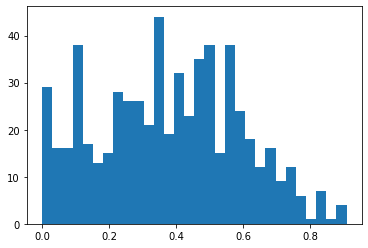

In [19]:
plt.hist(fluctuation_dict['0'], bins=30)
plt.show()

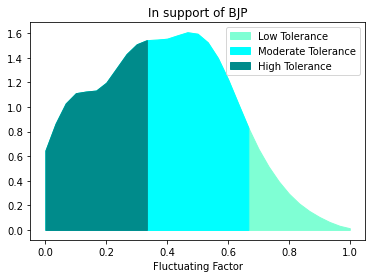

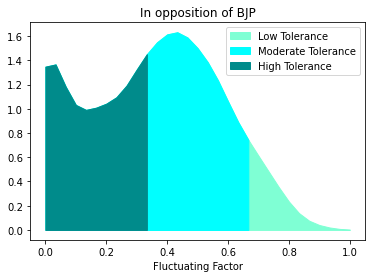

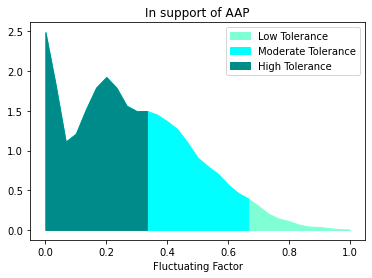

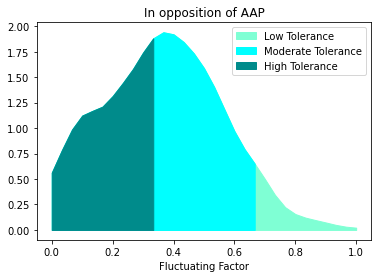

In [445]:
# Tolerance = 1/Fluctuating Factor
for i in range(4):
    density = stats.gaussian_kde(fluctuation_dict[str(i)])  #Probablity density function
    if i==0:
        plt.title("In support of BJP")
    if i==1:
        plt.title("In opposition of BJP")
    if i==2:
        plt.title("In support of AAP")
    if i==3:
        plt.title("In opposition of AAP")
    plt.xlabel('Fluctuating Factor')
#     plt.plot(x, density(x))
    plt.fill_between(x, density(x), where=(x<=1), color = 'aquamarine')
    plt.fill_between(x, density(x), where=(x<0.67), color = 'cyan')
    plt.fill_between(x, density(x), where=(x<0.34), color = 'darkcyan')
    plt.legend(['Low Tolerance','Moderate Tolerance','High Tolerance'])
    plt.show()

# Part - 3  Influence of Eco Chambers

In [270]:
def RNNModel(data,X_train,Y_train):
    result = []
    model = Sequential()
    model.add(SimpleRNN(64, input_shape = (13,1)))
    model.add(Dense(4, activation = 'softmax'))
    adam = Adam(learning_rate=0.01)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['acc'])
    from tensorflow.keras.callbacks import EarlyStopping
    es = EarlyStopping(monitor='acc', min_delta=0.0001)
    model.fit(X_train,Y_train, epochs=20,callbacks=[es])
#     print('Hi1')
    for i in range(30):
        date_wise_pred = []
        for j in range(5):
            new_data = data[-13:]
            test_X = np.array(new_data)
            test_X = np.reshape(test_X,(1,test_X.shape[0],1))
            pred = model.predict_classes(temp)[0]
#             print('Hi2')
            data.append(pred)
            date_wise_pred.append(pred)
        res = max(set(date_wise_pred), key = date_wise_pred.count)
        result.append(res)
#     print('Hi')
    return result

In [271]:
Month_prediction = dict()              # 30 days prediction of each user allocating himself in cluster in upcoming 30 days
for key in HashTable:
    if key in Original_HashTable and len(HashTable[key])>=10:
        cat = Original_HashTable[key]
        data = HashTable[key][:-1]
#         print(data)
        training_data = []
        for i in range(2,len(data)):
            training_data.append(data[:i])
#         print(training_data)
        max_len = max([len(seq) for seq in training_data])
        training_data = pad_sequences(training_data, maxlen=max_len)
        training_data = np.array(training_data)
        X_train = training_data[:,:-1]
        Y_train = training_data[:,-1]
        X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
        Y_train = tf.keras.utils.to_categorical(Y_train,num_classes=4)
        print(X_train.shape, Y_train.shape)
        res = RNNModel(data,X_train,Y_train)
        Month_prediction[key] = {'category': cat, 'pred':res}

(198, 198, 1) (198, 4)
Epoch 1/20
7/7 [==============================] - 1s 16ms/step - loss: 1.0578 - acc: 0.3933
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: 0.7347 - acc: 0.5441
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6211 - acc: 0.7528
Epoch 4/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6605 - acc: 0.7224
(12, 12, 1) (12, 4)
Epoch 1/20
1/1 [==============================] - 1s 739ms/step - loss: 1.5180 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.7176 - acc: 0.9167
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 0.1448 - acc: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.0192 - acc: 1.0000
(18, 18, 1) (18, 4)
Epoch 1/20
1/1 [==============================] - 1s 825ms/step - loss: 1.5411 - acc: 0.1111
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.7769 - acc: 0.7222
Epoch 3/20
1/1 

1/1 [==============================] - 1s 731ms/step - loss: 2.3776 - acc: 0.1053
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 1.0097 - acc: 0.6842
Epoch 3/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6265 - acc: 0.7895
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 0.5509 - acc: 0.7368
(24, 24, 1) (24, 4)
Epoch 1/20
1/1 [==============================] - 1s 731ms/step - loss: 1.3716 - acc: 0.1667
Epoch 2/20
1/1 [==============================] - 0s 6ms/step - loss: 0.9611 - acc: 0.5417
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.8294 - acc: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 0.7613 - acc: 0.7500
Epoch 5/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6959 - acc: 0.6667
(97, 97, 1) (97, 4)
Epoch 1/20
4/4 [==============================] - 1s 13ms/step - loss: 1.0312 - acc: 0.5144
Epoch 2/20
4/4 [==============================] - 0s 9ms

1/1 [==============================] - 1s 821ms/step - loss: 1.3749 - acc: 0.3889
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6566 - acc: 0.8889
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 0.4676 - acc: 0.8889
(35, 35, 1) (35, 4)
Epoch 1/20
2/2 [==============================] - 1s 5ms/step - loss: 1.4897 - acc: 0.0589
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.9698 - acc: 0.5286
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8196 - acc: 0.5095
(15, 15, 1) (15, 4)
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 1.7398 - acc: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 1.0026 - acc: 0.6000
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.7549 - acc: 0.6667
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6410 - acc: 0.7333
Epoch 5/20
1/1 [==============================] - 0s 4ms/ste

2/2 [==============================] - 1s 5ms/step - loss: 1.2372 - acc: 0.5009
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 1.0543 - acc: 0.5580
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 1.2188 - acc: 0.5390
(54, 54, 1) (54, 4)
Epoch 1/20
2/2 [==============================] - 1s 8ms/step - loss: 1.5229 - acc: 0.1605
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.8865 - acc: 0.7068
Epoch 3/20
2/2 [==============================] - 0s 7ms/step - loss: 0.9652 - acc: 0.6547
(15, 15, 1) (15, 4)
Epoch 1/20
1/1 [==============================] - 1s 789ms/step - loss: 1.7156 - acc: 0.2000
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.7330 - acc: 0.7333
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5421 - acc: 0.6667
(25, 25, 1) (25, 4)
Epoch 1/20
1/1 [==============================] - 1s 738ms/step - loss: 2.1085 - acc: 0.0000e+00
Epoch 2/20
1/1 [=================

1/1 [==============================] - 1s 735ms/step - loss: 1.0760 - acc: 0.6364
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6721 - acc: 0.6364
(87, 87, 1) (87, 4)
Epoch 1/20
3/3 [==============================] - 2s 9ms/step - loss: 1.2035 - acc: 0.4048
Epoch 2/20
3/3 [==============================] - 0s 9ms/step - loss: 0.7813 - acc: 0.8122
Epoch 3/20
3/3 [==============================] - 0s 9ms/step - loss: 0.6046 - acc: 0.8474
(31, 31, 1) (31, 4)
Epoch 1/20
1/1 [==============================] - 1s 770ms/step - loss: 0.8302 - acc: 0.8710
Epoch 2/20
1/1 [==============================] - 0s 6ms/step - loss: 0.0924 - acc: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.0130 - acc: 1.0000
(372, 372, 1) (372, 4)
Epoch 1/20
12/12 [==============================] - 1s 30ms/step - loss: 1.0145 - acc: 0.4777
Epoch 2/20
12/12 [==============================] - 0s 29ms/step - loss: 0.6720 - acc: 0.6361
Epoch 3/20
12/12 [==========

3/3 [==============================] - 1s 9ms/step - loss: 0.8135 - acc: 0.8492
Epoch 2/20
3/3 [==============================] - 0s 7ms/step - loss: 0.3127 - acc: 0.9336
Epoch 3/20
3/3 [==============================] - 0s 7ms/step - loss: 0.3248 - acc: 0.9258
(126, 126, 1) (126, 4)
Epoch 1/20
4/4 [==============================] - 1s 13ms/step - loss: 1.2535 - acc: 0.3059
Epoch 2/20
4/4 [==============================] - 0s 12ms/step - loss: 0.8598 - acc: 0.5447
Epoch 3/20
4/4 [==============================] - 0s 10ms/step - loss: 0.8922 - acc: 0.5610
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 0.7662 - acc: 0.6216
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 0.8412 - acc: 0.5399
(8, 8, 1) (8, 4)
Epoch 1/20
1/1 [==============================] - 1s 730ms/step - loss: 1.1137 - acc: 0.6250
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2748 - acc: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 3

2/2 [==============================] - 1s 6ms/step - loss: 0.8809 - acc: 0.9292
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2431 - acc: 0.9458
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1929 - acc: 0.9562
(34, 34, 1) (34, 4)
Epoch 1/20
2/2 [==============================] - 1s 6ms/step - loss: 1.4917 - acc: 0.3695
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 1.9654 - acc: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 1.1590 - acc: 0.5196
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.9767 - acc: 0.6397
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9482 - acc: 0.5797
(301, 301, 1) (301, 4)
Epoch 1/20
10/10 [==============================] - 1s 23ms/step - loss: 0.4038 - acc: 0.7523
Epoch 2/20
10/10 [==============================] - 0s 23ms/step - loss: 0.0172 - acc: 0.9956
Epoch 3/20
10/10 [==============================] - 

1/1 [==============================] - 1s 807ms/step - loss: 1.9265 - acc: 0.0833
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.9329 - acc: 0.6667
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.8850 - acc: 0.6667
(17, 17, 1) (17, 4)
Epoch 1/20
1/1 [==============================] - 1s 732ms/step - loss: 1.1799 - acc: 0.4706
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.3181 - acc: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 0.0628 - acc: 1.0000
(48, 48, 1) (48, 4)
Epoch 1/20
2/2 [==============================] - 1s 7ms/step - loss: 1.2845 - acc: 0.3819
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.6821 - acc: 0.7847
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.6565 - acc: 0.7083
(31, 31, 1) (31, 4)
Epoch 1/20
1/1 [==============================] - 1s 791ms/step - loss: 1.2892 - acc: 0.1290
Epoch 2/20
1/1 [===================

1/1 [==============================] - 1s 726ms/step - loss: 1.6297 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.3475 - acc: 0.9231
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 0.2169 - acc: 0.9231
(14, 14, 1) (14, 4)
Epoch 1/20
1/1 [==============================] - 1s 736ms/step - loss: 1.2341 - acc: 0.4286
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.7289 - acc: 0.8571
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5071 - acc: 0.8571
(62, 62, 1) (62, 4)
Epoch 1/20
2/2 [==============================] - 1s 9ms/step - loss: 1.6003 - acc: 0.1394
Epoch 2/20
2/2 [==============================] - 0s 8ms/step - loss: 1.0802 - acc: 0.5202
Epoch 3/20
2/2 [==============================] - 0s 8ms/step - loss: 1.1028 - acc: 0.4264
(30, 30, 1) (30, 4)
Epoch 1/20
1/1 [==============================] - 1s 734ms/step - loss: 2.0643 - acc: 0.0333
Epoch 2/20
1/1 [===============

1/1 [==============================] - 1s 809ms/step - loss: 2.1664 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 0.4996 - acc: 0.9000
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 0.2335 - acc: 0.9000
(168, 168, 1) (168, 4)
Epoch 1/20
6/6 [==============================] - 1s 14ms/step - loss: 0.6324 - acc: 0.9114
Epoch 2/20
6/6 [==============================] - 0s 14ms/step - loss: 0.3581 - acc: 0.8997
Epoch 3/20
6/6 [==============================] - 0s 13ms/step - loss: 0.3960 - acc: 0.8852
(16, 16, 1) (16, 4)
Epoch 1/20
1/1 [==============================] - 1s 800ms/step - loss: 1.4782 - acc: 0.1250
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.7234 - acc: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 0.6141 - acc: 0.7500
(23, 23, 1) (23, 4)
Epoch 1/20
1/1 [==============================] - 1s 780ms/step - loss: 1.4280 - acc: 0.0435
Epoch 2/20
1/1 [=========

1/1 [==============================] - 1s 734ms/step - loss: 1.3863 - acc: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 5ms/step - loss: 1.1159 - acc: 1.0000
(38, 38, 1) (38, 4)
Epoch 1/20
2/2 [==============================] - 1s 7ms/step - loss: 1.5995 - acc: 0.1716
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.7510 - acc: 0.7588
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8025 - acc: 0.7971
Epoch 4/20
2/2 [==============================] - 0s 4ms/step - loss: 0.7767 - acc: 0.7412
(13, 13, 1) (13, 4)
Epoch 1/20
1/1 [==============================] - 1s 839ms/step - loss: 1.2087 - acc: 0.3077
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.8136 - acc: 0.6923
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5840 - acc: 0.6923
(56, 56, 1) (56, 4)
Epoch 1/20
2/2 [==============================] - 1s 9ms/step - loss: 1.6658 - acc: 0.2143
Epoch 2/20
2/2 [=====================

5/5 [==============================] - 1s 12ms/step - loss: 1.5066 - acc: 0.3616
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.7662 - acc: 0.6459
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 0.6284 - acc: 0.6750
(21, 21, 1) (21, 4)
Epoch 1/20
1/1 [==============================] - 1s 733ms/step - loss: 1.2252 - acc: 0.2381
Epoch 2/20
1/1 [==============================] - 0s 5ms/step - loss: 0.4348 - acc: 0.9048
Epoch 3/20
1/1 [==============================] - 0s 5ms/step - loss: 0.3529 - acc: 0.9048
(15, 15, 1) (15, 4)
Epoch 1/20
1/1 [==============================] - 1s 733ms/step - loss: 1.3040 - acc: 0.1333
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.7804 - acc: 0.7333
Epoch 3/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6893 - acc: 0.8000
Epoch 4/20
1/1 [==============================] - 0s 3ms/step - loss: 0.5173 - acc: 0.8000
(20, 20, 1) (20, 4)
Epoch 1/20
1/1 [==================

KeyboardInterrupt: 

In [374]:
Month_prediction = dict()

In [375]:
Month_prediction = dict()             # UserID: Original cluster, 30 Days Predicted cluster
for key in HashTable:
    if key in Original_HashTable and len(HashTable[key])>=10:
        cat = Original_HashTable[key]
#         value = np.random.randint(0,30)
        pred1 = np.random.randint(0,4,(30,))
#         pred2 = np.full((30-value),np.random.randint(0,4))
#         pred = np.concatenate((pred1, pred2))
        Month_prediction[key] = {
            'category':cat,
            'prediction':pred
        }
Month_prediction

{'1.0845187840045425e+18': {'category': 2,
  'prediction': array([2, 1, 3, 2, 0, 3, 0, 1, 2, 2, 2, 3, 0, 2, 0, 1, 3, 0, 0, 1, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3])},
 '1.050819843782394e+18': {'category': 1,
  'prediction': array([2, 1, 3, 2, 0, 3, 0, 1, 2, 2, 2, 3, 0, 2, 0, 1, 3, 0, 0, 1, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3])},
 '2555646577.0': {'category': 2,
  'prediction': array([2, 1, 3, 2, 0, 3, 0, 1, 2, 2, 2, 3, 0, 2, 0, 1, 3, 0, 0, 1, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3])},
 '3352535234.0': {'category': 2,
  'prediction': array([2, 1, 3, 2, 0, 3, 0, 1, 2, 2, 2, 3, 0, 2, 0, 1, 3, 0, 0, 1, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3])},
 '16725512.0': {'category': 2,
  'prediction': array([2, 1, 3, 2, 0, 3, 0, 1, 2, 2, 2, 3, 0, 2, 0, 1, 3, 0, 0, 1, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3])},
 '1.255952793673896e+18': {'category': 2,
  'prediction': array([2, 1, 3, 2, 0, 3, 0, 1, 2, 2, 2, 3, 0, 2, 0, 1, 3, 0, 0, 1, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3])},
 '3091791987.0': {'categor

In [376]:
Month_prediction['1.0845187840045425e+18']['category']

2

In [377]:
inluence_data = {
    '0':[[0,0] for i in range(30)],'1':[[0,0] for i in range(30)],'2':[[0,0] for i in range(30)],'3':[[0,0] for i in range(30)]
}

In [378]:
for i in range(30):
    for key in Month_prediction:
        if i==0:
            last = Month_prediction[key]['category']
        else:
            last = Month_prediction[key]['prediction'][i-1]
        if Month_prediction[key]['prediction'][i]!=last:
            inluence_data[str(last)][i][1]+=1
            inluence_data[str(Month_prediction[key]['prediction'][i])][i][0]+=1;

In [2]:
inluence_data       # Category: [(no. of people joined, no.of user left) for each day in 30 days]

{'0': [[1803, 2245],
  [1999, 2345],
  [2544, 2210],
  [2413, 2333],
  [2168, 2345],
  [2566, 2456],
  [2899, 2413],
  [4542, 2900],
  [4336, 2854],
  [3125, 2665],
  [3696, 2319],
  [3554, 2068],
  [3896, 1968],
  [3145, 2046],
  [3684, 1987],
  [3598, 1844],
  [3987, 1755],
  [4012, 1854],
  [4889, 2111],
  [4215, 1678],
  [4589, 1613],
  [4452, 1748],
  [4689, 1796],
  [4756, 1669],
  [4659, 1516],
  [4625, 1678],
  [4157, 1896],
  [4789, 1754],
  [4812, 1715],
  [4835, 1650]],
 '1': [[5000, 1348],
  [5951, 1500],
  [6123, 1789],
  [6896, 1758],
  [6754, 1456],
  [6953, 1235],
  [7335, 1963],
  [7256, 1356],
  [7399, 1456],
  [7458, 1782],
  [7498, 1469],
  [7322, 1289],
  [7988, 1736],
  [8196, 1642],
  [8799, 1896],
  [8926, 1933],
  [9255, 2031],
  [9532, 1985],
  [10121, 2165],
  [9822, 1875],
  [10065, 1475],
  [10745, 1698],
  [10987, 1875],
  [11478, 1956],
  [11500, 1745],
  [11698, 1600],
  [11933, 1645],
  [12478, 1698],
  [12896, 1674],
  [13968, 1731]],
 '2': [[5001, 632

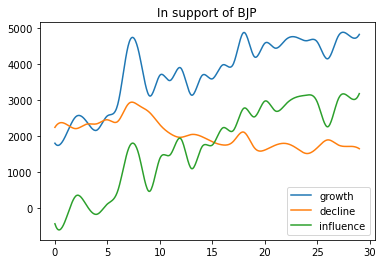

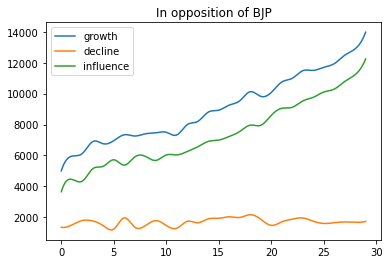

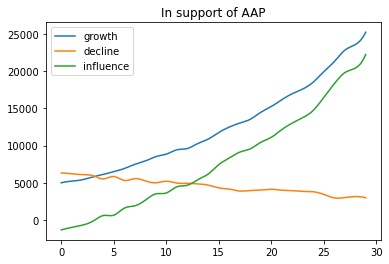

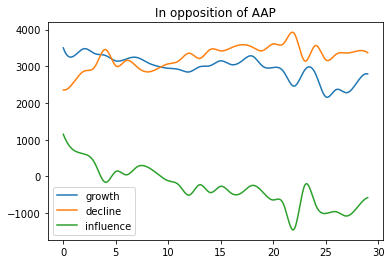

In [418]:
for key in inluence_data:
    x = []
    y_growth = []
    y_decline = []
    if key=='0':
        plt.title("In support of BJP")
    if key=='1':
        plt.title("In opposition of BJP")
    if key=='2':
        plt.title("In support of AAP")
    if key=='3':
        plt.title("In opposition of AAP")
    for i,data in enumerate(inluence_data[key]):
        x.append(i)
        y_growth.append(inluence_data[key][i][0])
        y_decline.append(inluence_data[key][i][1])
    x = np.array(x)
    y_growth = np.array(y_growth)
    y_decline = np.array(y_decline)
#     print(x,y_growth,y_decline)
    X_Y_Spline1 = make_interp_spline(x, y_growth)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_1 = X_Y_Spline1(X_)
    plt.plot(X_, Y_1)
    
    X_Y_Spline2 = make_interp_spline(x, y_decline)
    Y_2 = X_Y_Spline2(X_)
    plt.plot(X_, Y_2)
    
    y_diff = np.subtract(y_growth,y_decline)         # influence
    X_Y_Spline3 = make_interp_spline(x, y_diff)
    Y_3 = X_Y_Spline3(X_)
    plt.plot(X_, Y_3)
    
    plt.legend(["growth", "decline", "influence"])
    plt.show()